['cooking\\DevNode1_ex43_11.wav', 'cooking\\DevNode1_ex43_13.wav', 'cooking\\DevNode1_ex43_14.wav', 'cooking\\DevNode1_ex43_15.wav', 'cooking\\DevNode1_ex43_16.wav', 'cooking\\DevNode1_ex43_17.wav', 'cooking\\DevNode1_ex43_19.wav', 'cooking\\DevNode1_ex43_20.wav', 'cooking\\DevNode1_ex43_21.wav', 'cooking\\DevNode1_ex43_22.wav', 'cooking\\DevNode1_ex43_24.wav', 'cooking\\DevNode1_ex43_25.wav', 'cooking\\DevNode1_ex43_26.wav', 'cooking\\DevNode1_ex43_28.wav', 'cooking\\DevNode1_ex43_29.wav', 'cooking\\DevNode1_ex43_30.wav', 'cooking\\DevNode1_ex43_32.wav', 'cooking\\DevNode1_ex43_35.wav', 'cooking\\DevNode1_ex43_39.wav', 'cooking\\DevNode1_ex43_48.wav']
20
20


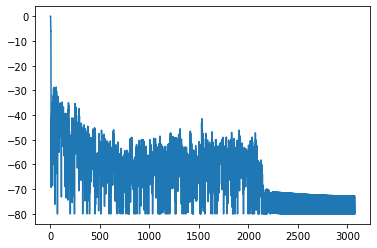

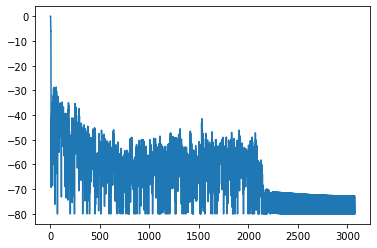

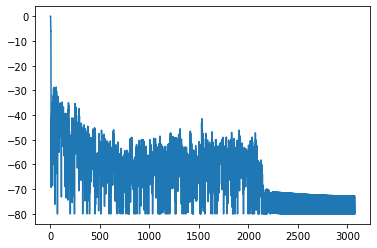

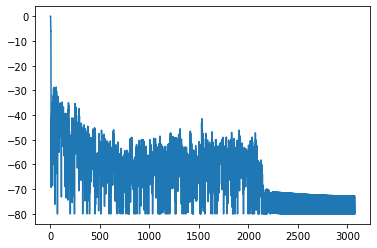

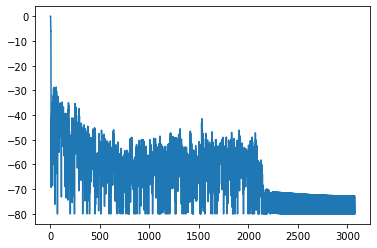

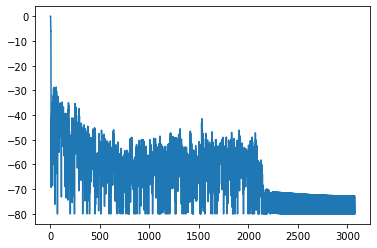

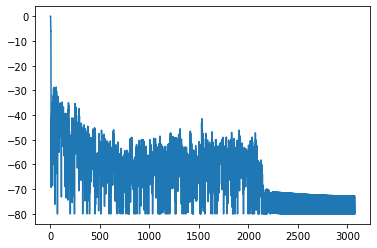

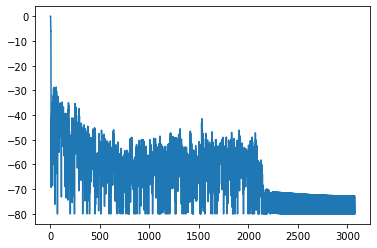

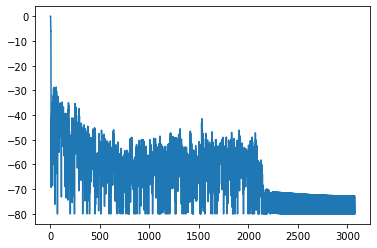

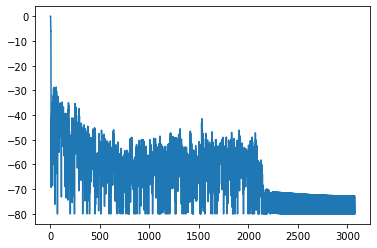

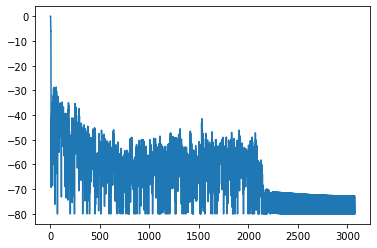

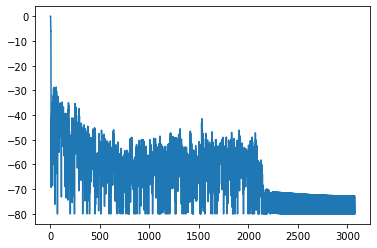

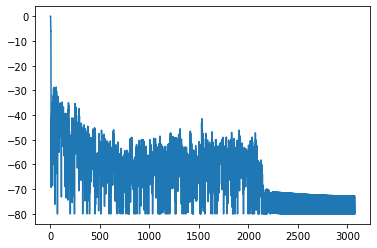

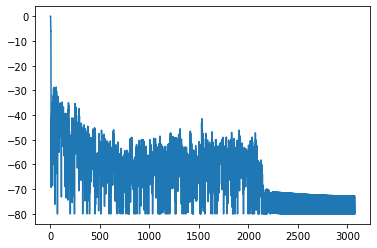

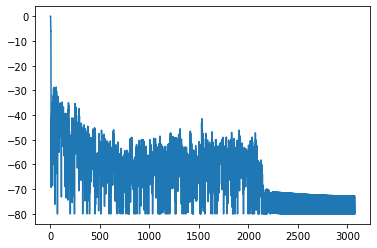

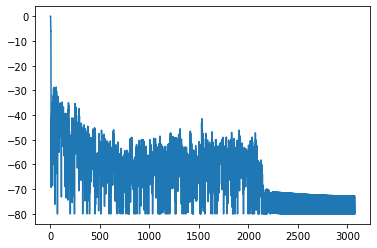

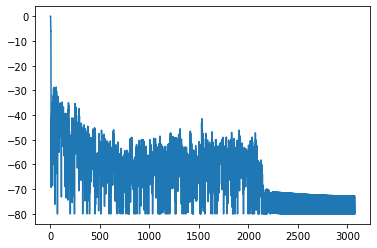

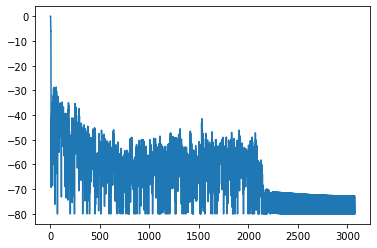

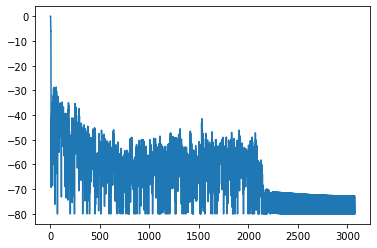

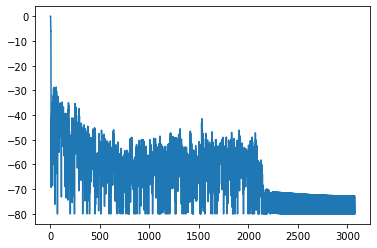

In [123]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import glob

%matplotlib inline

file_list = glob.glob("cooking/*")
print(file_list)
#file_list_cooking = [file for file in file_list.endswith('.wa')]
print(len(file_list))


Y=[None]*len(file_list)
SR=[None]*len(file_list)
print(len(Y))
index=0
for i in file_list:
    Y[index], SR[index] = librosa.load(i)
    librosa.feature.melspectrogram(y=Y[index], sr=SR[index])
    index+=1
    D = librosa.amplitude_to_db(librosa.stft(y[:1024]), ref=np.max)
    plt.plot(D.flatten())
    fig = plt.gcf() #변경한 곳
    plt.show()
    fig.savefig('Acoustic frequency' +str(index)+'.png')
 

    


20
0


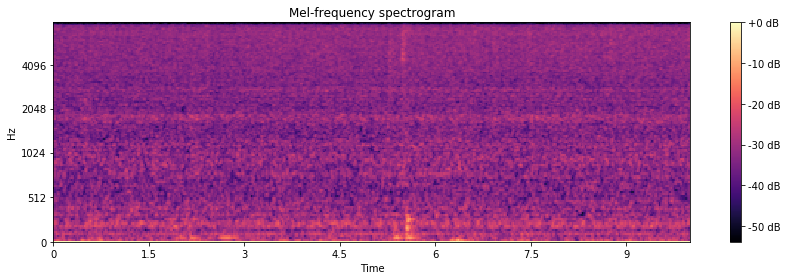

1


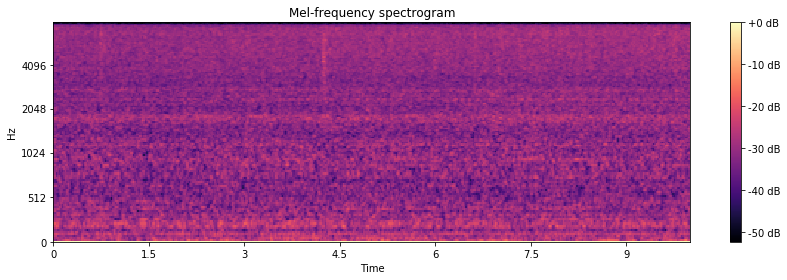

2


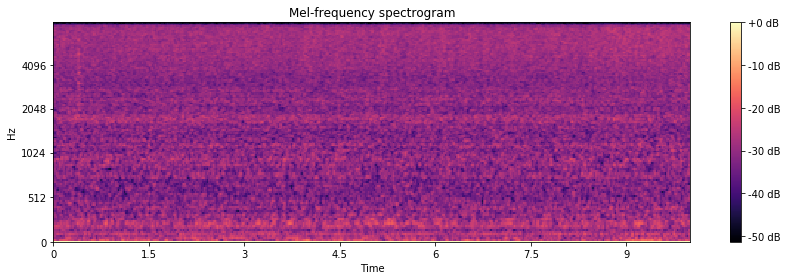

3


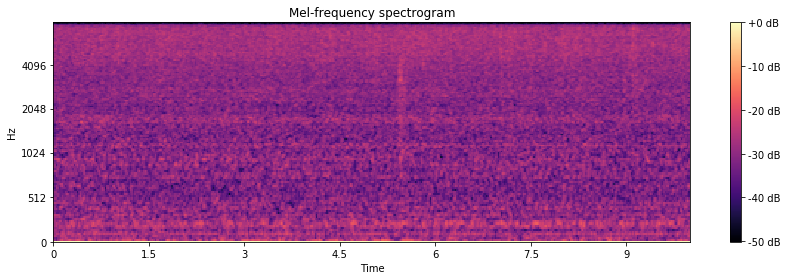

4


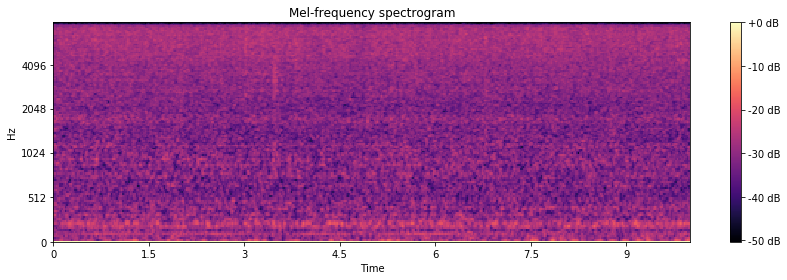

5


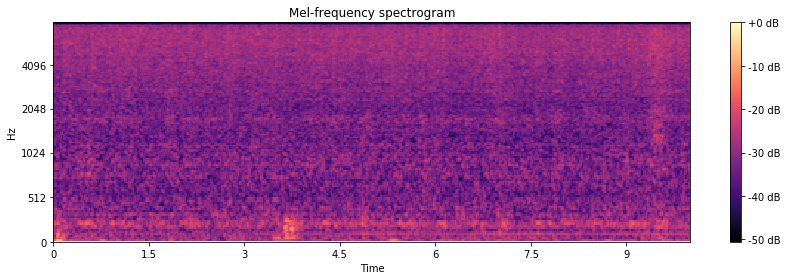

6


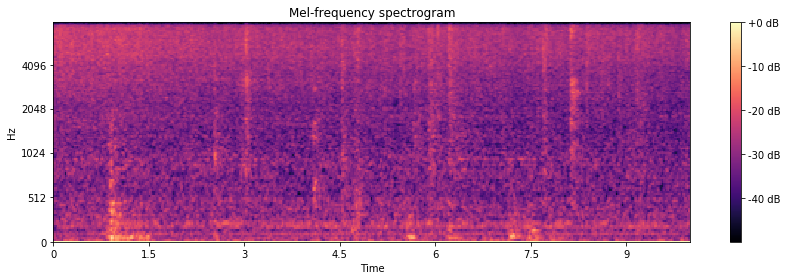

7


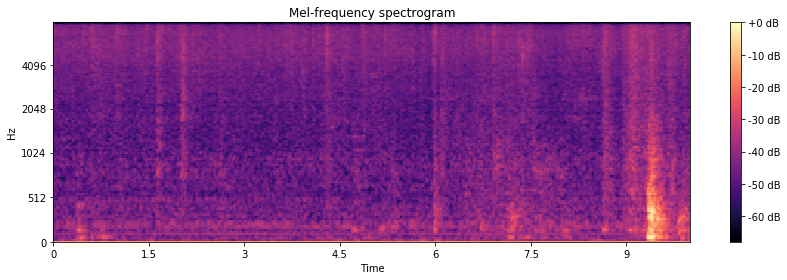

8


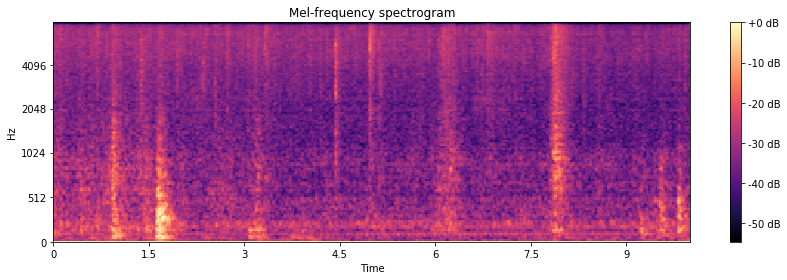

9


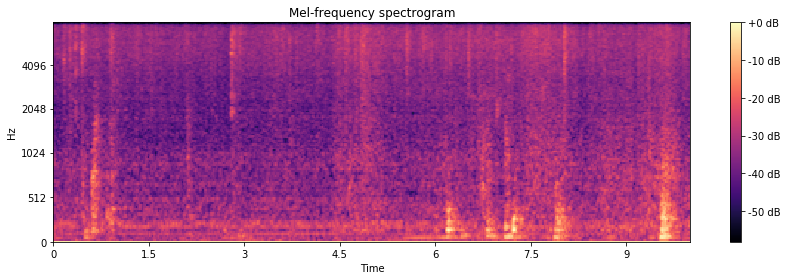

10


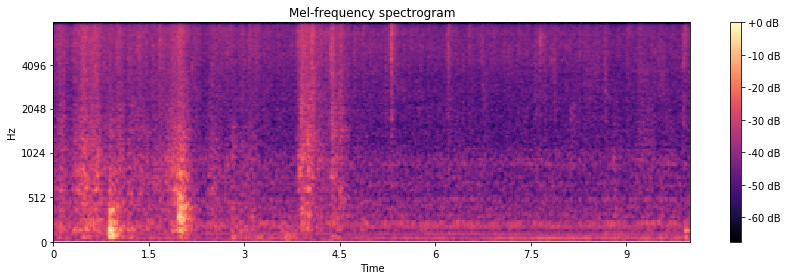

11


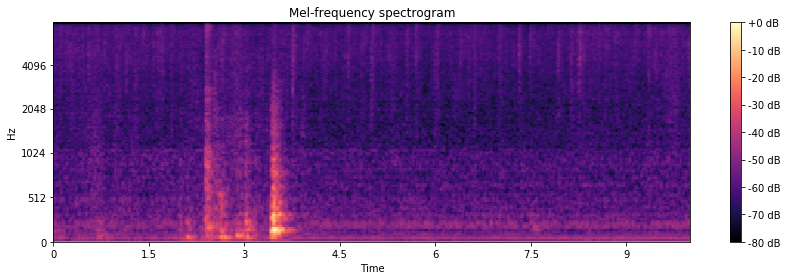

12


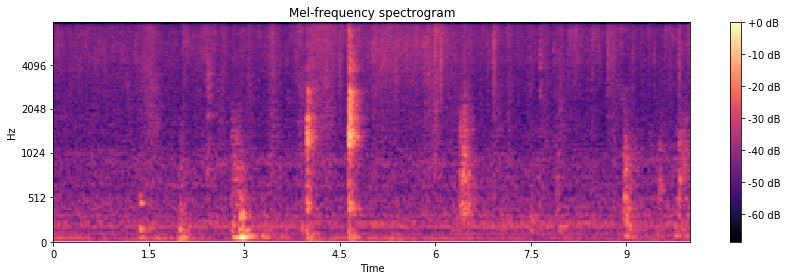

13


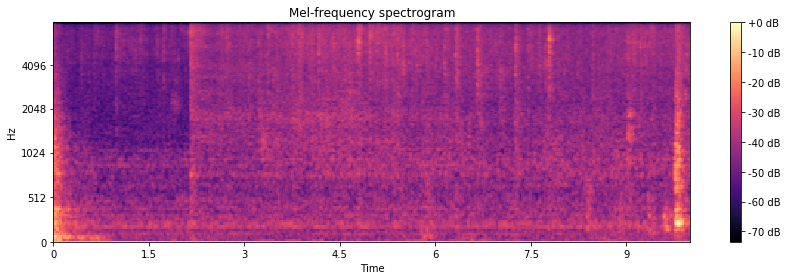

14


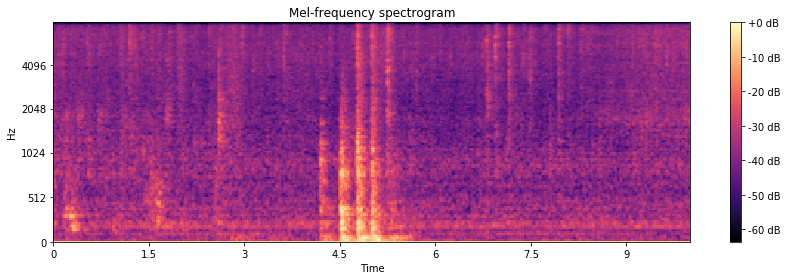

15


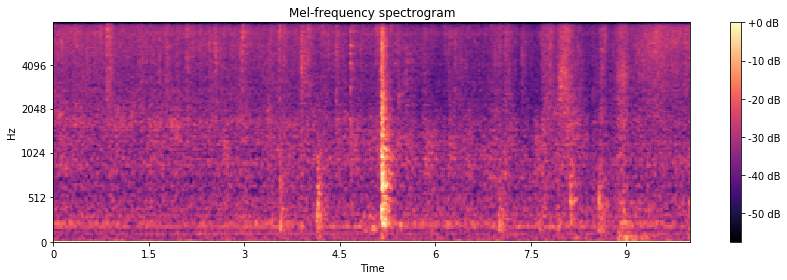

16


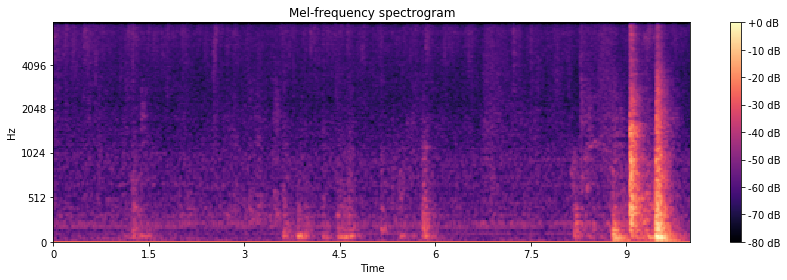

17


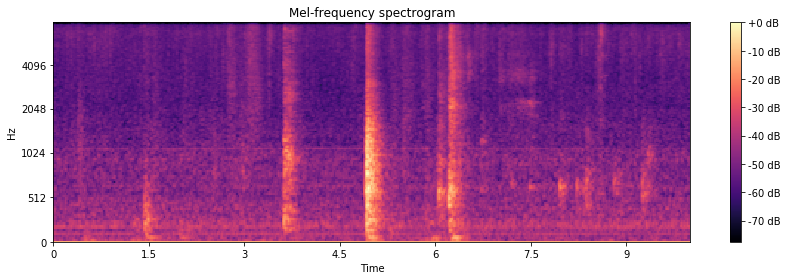

18


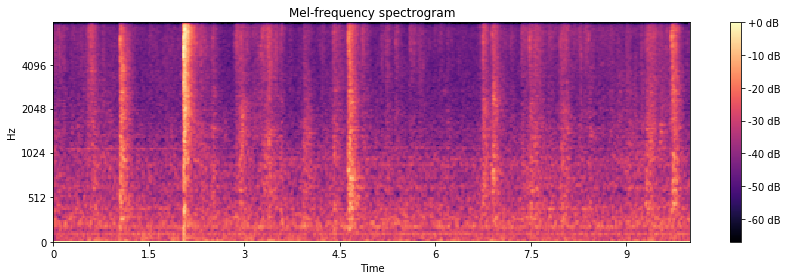

19


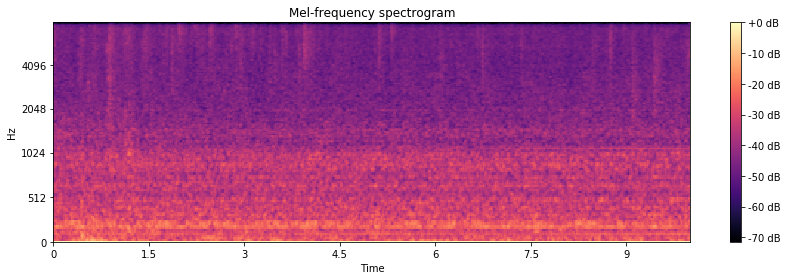

20


IndexError: list index out of range

In [125]:
S=[None]*len(Y)
S_dB=[None]*len(Y)
print(len(S))

for  i in range(0,len(S_duplicate)-1):
    print(i)
    S[i]= librosa.feature.melspectrogram(y=Y[i], sr=SR[i], n_mels=128, fmax=8000)
    plt.figure(figsize=(12, 4))
    S_dB[i] = librosa.power_to_db(S[i], ref=np.max)
    librosa.display.specshow(S_dB[i], x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    fig = plt.gcf() #변경한 곳
    plt.show()
    fig.savefig('Mel-frequency spectrogram' +str(i)+'.png')



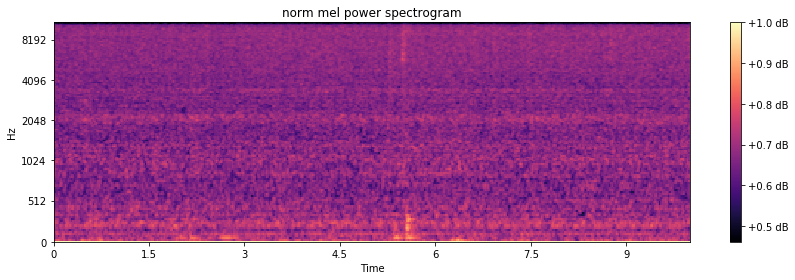

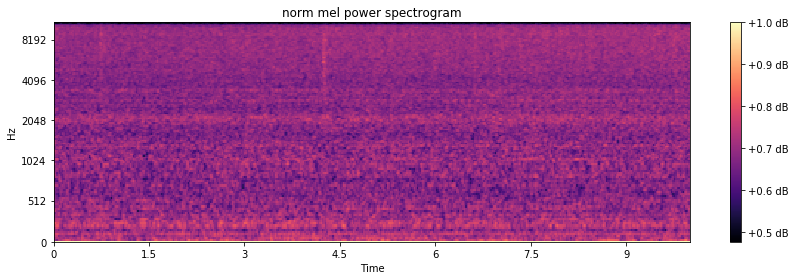

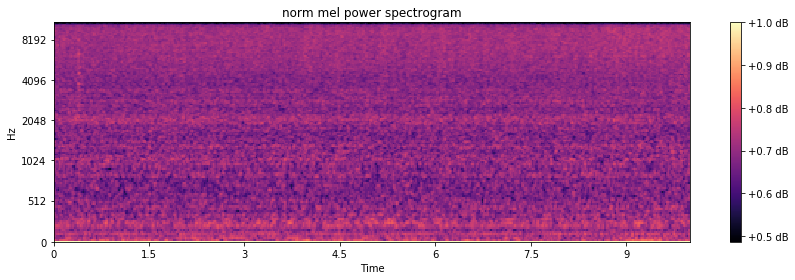

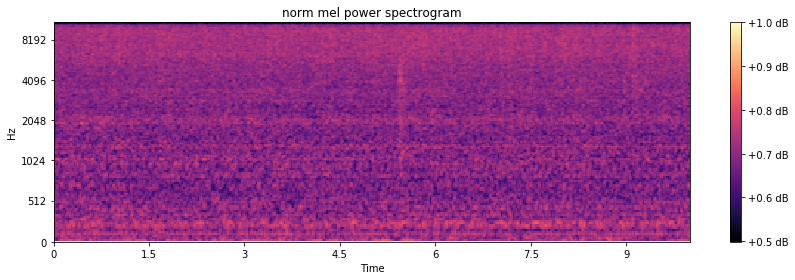

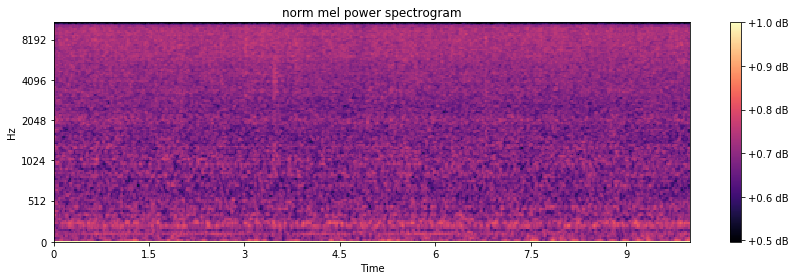

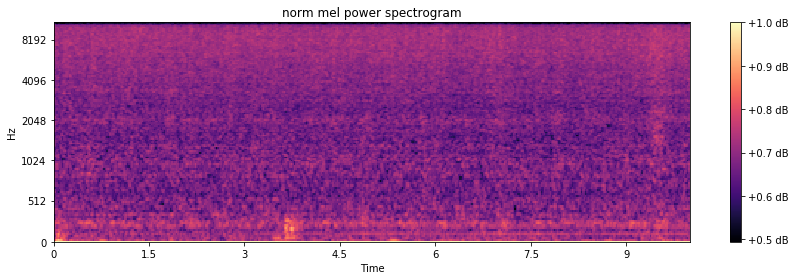

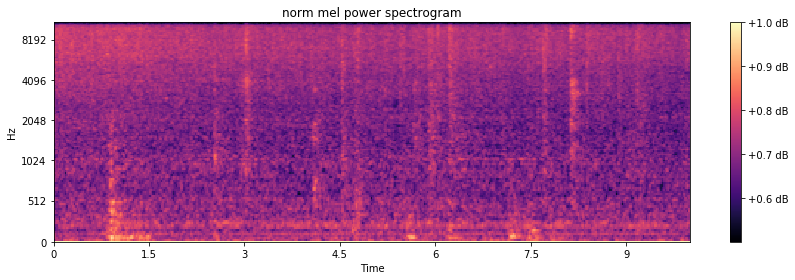

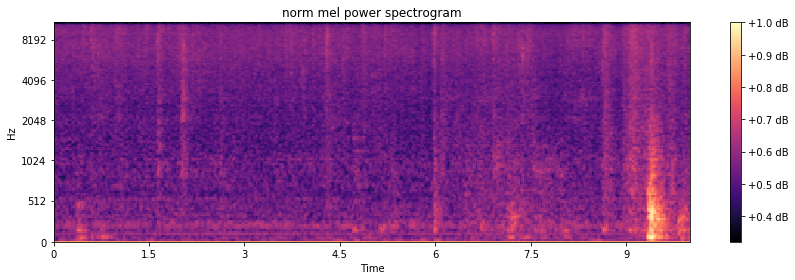

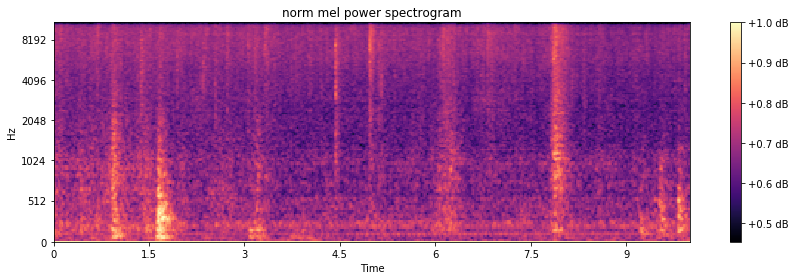

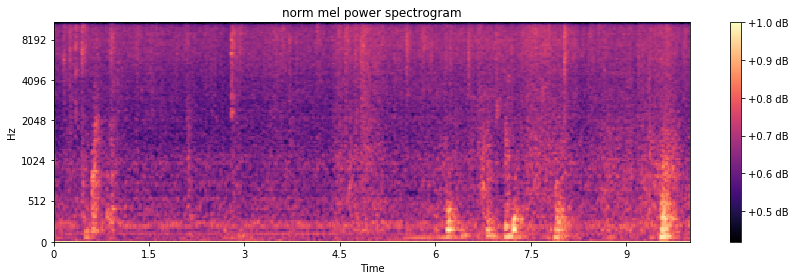

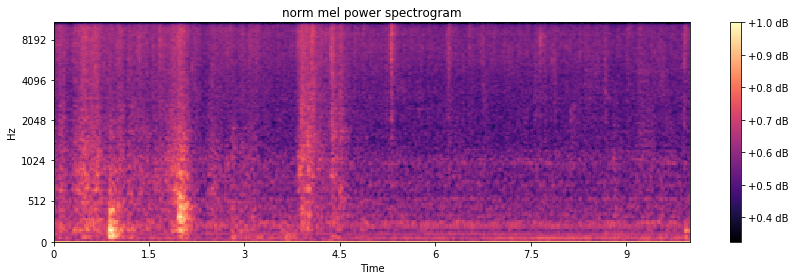

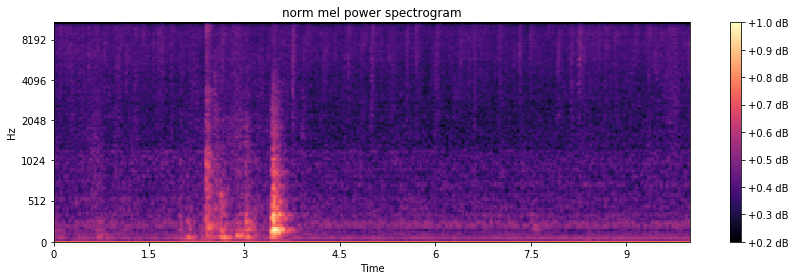

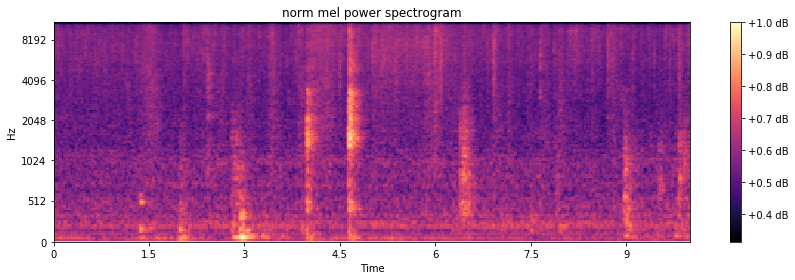

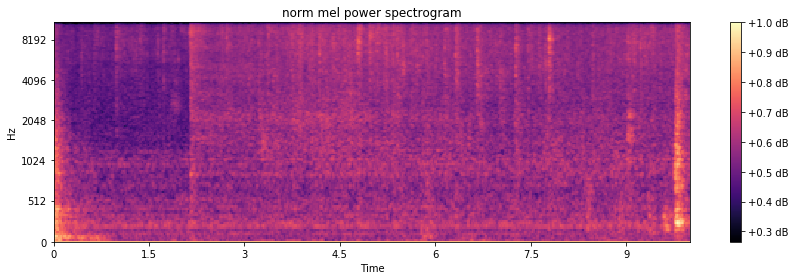

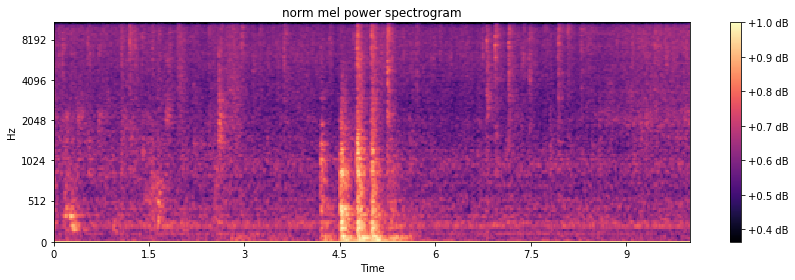

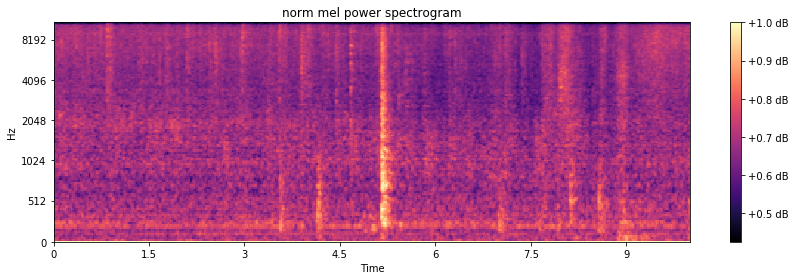

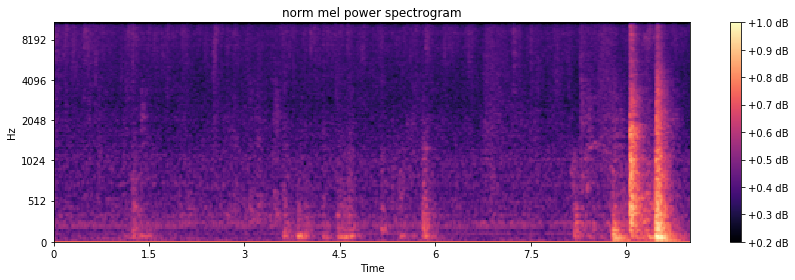

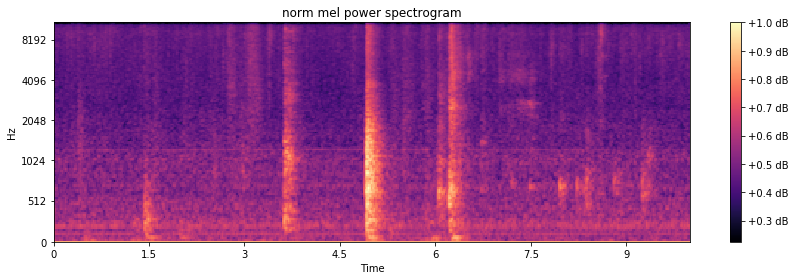

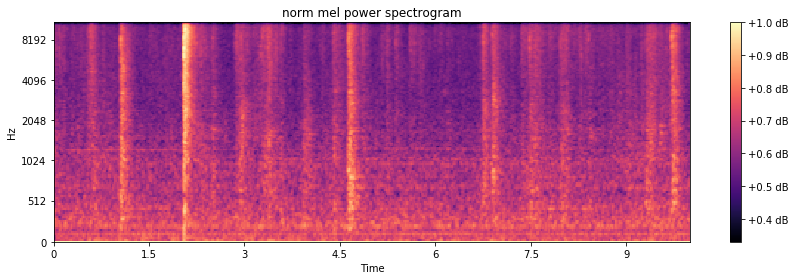

In [127]:
min_level_db = -100
Norm_S=[None]*len(Y)
 
def _normalize(X):
    return np.clip((X - min_level_db) / -min_level_db, 0, 1)

for  i in range(0,len(S)-1):
    norm_S = _normalize(S_dB[i])
    Norm_S[i]=norm_S
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(Norm_S[i], sr=sr, x_axis='time', y_axis='mel')
    plt.title('norm mel power spectrogram')
    plt.colorbar(format='%+0.1f dB')
    plt.tight_layout()
    fig = plt.gcf() #변경한 곳
    plt.show()
    fig.savefig('norm mel power spectrogram' +str(i)+'.png')
 


In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxsAAAEYCAYAAAA01etOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9edS1WVYX9tvnPNO9973v9I311Vx0Nz0gNNDQNDIpREZDdBkDIqRhYaIiIAsMidFAwgKCEkgImtBGxAEUF2qCQgKaLBoasZXGFmgapWmquqq+qm945/cOz3DOzh/nnL3P/bqquorur2vg+dX6Vt333mc4wz7T3r+9NzEzRowYMWLEiBEjRowYMeIjDfNiF2DEiBEjRowYMWLEiBGvTIyHjREjRowYMWLEiBEjRtwVjIeNESNGjBgxYsSIESNG3BWMh40RI0aMGDFixIgRI0bcFYyHjREjRowYMWLEiBEjRtwVjIeNESNGjBgxYsSIESNG3BWMh40RI0aM+DBARJ9DRE+82OUYMWLEiBEjXooYDxsjRowYMeKjBiJ6iIiYiIoXuywjRowYMeLuYzxsjBgx4mWFcZP6u8fLpe0+0uV8udR7xIgRI16JGA8bI0aM+KiAiB4lom8hol8lohMi+nEiarLf/xQRvY+IDonoJ4noWvYbE9HXEdFvAfit7Ls/S0S/RURnRPQdRPQxRPRLRHRKRP+QiKpnKctbiegXiej7ieiYiN5PRJ8ev3+ciG4S0X+eXV8T0fcS0QeI6AYR/e9ENHme9WYi+ob4jttE9FeJyMTfDBH9JSJ6LL7z7xDRTvztbxPRN8fP96b6xr9fFduJ4t9fQkTvjnX5l0T08Xe0+7cS0a8CWNy58aaA74/vP4n983Hxtx+Jdf3nsY3fTkQPZve+Nv52SET/noj+ePbbhIj+p1i3EyJ6R2yzn4+XHBPRORG95Y7+OATw7c/VNvH5XxV/OyCivxzr+Xnxt28nop8gor9HRKcA3kpEnxpl45iIniKiH8zl48ORpxEjRowY8ewYDxsjRoz4aOKPA/gCAA8D+HgAbwUAIvqDAL47/n4PgMcA/IM77v1PALwZwOuz774AwCcD+DQA/xWAtwH4CgD3A/g4AF/+HGV5M4BfBXABwI/F930KgFcB+JMAfpCItuK13wPgNQDeGH+/F8B/9wLq/UcAvAnAJwH4UgBfE79/a/z3BwA8AmALwA/G394O4HPi588G8P74fwD4LAC/wMxMRJ8E4IcB/JexLj8E4CeJqM7e/+UAvhjALjMPd5TtD8XnvQbALoD/DMBB9vtXAPgOABcBvBvAjwIAEc0A/HOEtrsc3/HXiegN8b7vReibTwewj9A/Pr4LsSxbzPxL8e83xzpeBvCdz9U2RPR6AH89lu0eADsIfZLjSwH8RKzTjwJwAL4p1uMtAD4XwJ+9454PR55GjBgxYsQzYDxsjBgx4qOJH2Dm68x8COCfImzegbCh+2Fm/hVmbgH8NwDeQkQPZfd+NzMfMvMq++57mPmUmd8D4NcB/Cwzv5+ZTwD83wA+8TnK8jvM/LeY2QH4cYQN5f/AzC0z/yyADsCrovXgTwH4pvj+MwDfBeDLXkC9vyfe+wEA/zN00/oVAL4vlvk81vvLovXh7QA+M1pBPgvAXwHw++N9nx1/RyzbDzHzO5nZMfPfBtAibJgTfoCZH7+j7RJ6AHMArwVAzPxeZn4q+/2nmPnnY7/8twj9cj+ALwHwaGzDgZl/BcA/AvDHYpm/BsA3MvOTsVz/Mj7j2XCdmf/X+KzVh2ibPwbgnzLzO5i5Qzj48R3P+yVm/j+Z2TPzipnfxcz/Kj7/UYRD2Wffcc+HI08jRowYMeIZMB42RowY8dHE09nnJYK2GgCuIVgzAABxc3mATW3148/wvBvZ59Uz/L2FZ8ed14KZn+n+SwCmAN4VKTjHAP6f+P3zRV72xxDqC9xR7/i5AHCFmX8bwDnCgewzAfwzANeJ6GOxedh4EMA3p7LF8t2fvePO92+Amf8/BIvBXwNwg4jeRkTbz3Rv7JfD+OwHAbz5jvd+BYCrCNaDBsBvP3ezbODOMj5r28Tf8nItsWmN+aDnEdFriOifEdHTkVr1XbGcOT4ceRoxYsSIEc+A8bAxYsSIlwKuI2xeAQhF5wKAJ7Nr7tRcf7RwG2Gj+QZm3o3/dpj5hWw8788+P4BQX+COesffBugm9+0IWvyKmZ+Mf38VgD0EShMQNtXfmZVtl5mnzPz3s+c+Z9sx8w8w8ycDeAMCneovPFPZI61sP5b7cQBvv+O9W8z8ZxDabA3gY57pdc9WjDv+fq62eQrAfVm5Jgjy8lzP+98A/CaAVzPzNoC/CICepSwjRowYMeIjhPGwMWLEiJcCfgzAVxPRG6OvwXcBeGeku7yoYGYP4G8A+H4iugyIw/bnv4DH/AUi2ov0o29EoG0BwN8H8E1E9HDcyH8XgB/P/CreDuDPQZ2qfw7A1wN4R6R/IZbtTxPRm6Oz94yIvpiI5s+nYET0KfHeEsAC4ZDgsku+iIg+IzpHfwdCvzyOYGl5DRF9JRGV8d+nENHrYpv9MIDvI6JrRGSjI3gN4BaC78YjH6Joz9U2PwHgD1Nw6q8A/Pf40AeHOYBTAOdE9FoAf+b5tM+IESNGjPjwMB42RowY8aKDmf9fAH8ZgfP/FIJG/IX4RNxtfCuA9wH4V5GC8y8AfOwLuP//AvAuBGvETwH4m/H7HwbwdxEOE7+DsNH/+uy+tyNsktNh4x0IlK70N5j5lxH8Nn4QwFEs51tfQNm2EQ4sRwhUpQME5+6EHwPwbQj0qU9GoEoh+q78IYR+uo5AkfseAMkx/VsA/BqAfxPv/R4AJlKevhPAL0b6Ve5bkuNZ2yb6VHw9glP/UwDOANxE8FV5NnwLgD8Rr/0b0APfiBEjRoy4iyDmF4uZMGLEiBGvfBARI1B33vdil+WFgoh+BMATzPyXXuyyPBei5eMYoZ1/58Uuz4gRI0aMUIyWjREjRowY8bIDEf1hIppG/57vRbCiPPrilmrEiBEjRtyJ8bAxYsSIESNejvhSBPrWdQCvBvBlPJrqR4wY8XsYRPSfEtF7iMgT0Zue47ovoJCI9X1E9F8/j+c+RES/Hj9/DoVEre+mkAT2XyR/xmfDeNgYMWLEiLsIZqaXI4UKAJj5rS9VChUzf20WGexzmfnfv9hlGjFixIiPBuKG/0ee4adfB/BHkfn1PcO9FiHU+RciJMn98pgo9YXgF5j5jcz88Qh+eV/3XBcXL/DhI0aMGDFixIgRI0aMeImBmd8LACEX7bPiUwG8j5nfH6/9BwiW4t/ILyKiT0YI1LFECE7yQYhJb+cIgUmeFa/Yw4ahkq2pEA5wAQQDisYchgNnYdgpRk103MPHiJKGChQUAqt4OHCMBunZyfUf/IzwPRHBoIzfh+scd1oOMvFZQ1ZGRmIBFFTLs12WdJfZyfWWSnlfeI6Jz7cIkSUBhoeJ3UwwG+VgeFQ0DXWFthOD4WNdHXr4GIXTUIEQ0TJchfi+ApVeH5+d3meolOsHH5IXW1PDooRHfC6KjfvlHURaLiJ438uzUhsUVKNCI+8cEK7peS2DzbNHihLq2cGQgTW13ON8J88tTCNtMPg8sA1L+6e2NVTDmFA/i0Jki0Dw0v4OqY/yNi5QwmGAi/WmLGongWBjnxkQBolCypn8MgZ08qyEnlciN5ZKkU7nW5jYZrnMpra2sR7MDKRJiv3GtUkO8jFlyAJRZj0PKiumivIZvk/PqWgqdR3QbcitZyf9FOQmyr/vofOmkfutqcCpnZnl+hzMTuSU4n+xEnI5w8cxn9+fXsiwVEl7Dqyy4tl90NV3zjde+tdIWcPtqdweICN9s2N2UZjYPp7RxesGDPKsXA4cd2hoBgCoyUoNfFaVAR5tyFkIAwMb5SWNFQCYoMHEGmlnx0DrwrsdGF0M8uS4zerN0vcgymTTZ/1YSPuDWcYLEOaN8P9SxoGHw8BrkcsgN0meqw15xIZsuviKPs5/oS9Su3p4bXN4KNmKs/m0AEAiw7lshh728jnv542+3CiZ9AZ0XbDIZUvme1Nn85WD516uY/Yb5ZiYHQBAQ4U8qWfGCgupX3p1eE68kwqZ7zdkMa5QQBiTqe8IBM5kraBa10m4bD0jmec9dA5Iv2nbpFbxYFlT6mzdog+eb2L7kNGtSk1bKOP8yGA4JDndHCM1pvospHHUymcC4FJZWfuoMBNYqNykdSq9L9UpyFlao3tpU0PZtoq9yAptyJbL+vSZYaiQNVuhspbP86lOyGSFYKWsPtvvkJQ99JeL66ohK3O2RQUX5weGv2Pv5FEiWz9j+4RrAvosKFyYbzKZl/qwlLuEylY+LxlYaX+Chcnmf5O98cQ9fZuZX0iS1Y8qPv/zP5UPDk6e17Xvetd/eA9C5L2EtzHz2z7CRboXm0lPnwDw5me47m8B+HpmfjsR/dU7fvtMIno3Qn6jBULeomfFK/awYU2F3a2PQ2M0EW5JU5lsV3yyMRGnyfKsv451H4RiWl3ExfJVAIAlH6H15wCA9XCMwoSFsncqE5YK2cRaU2PLXIrPthh4jdPheryuRm1CPrDFcAu1DWX08HBxg7tfPgwXy3c8PCYLWTucoSnDYrNVXIWJE8DCHcgzK9rCEAd7z0vMTEiSW/EEPbU4HoKMOW5xb/HG8CyvIfl76rGks/Buvo61OwrtYS9IGzC8HMT2zP1YIbTZcfcBmewKM8HcXo1163Fz9d5Qt+YRzOkyFgjP3cIFrHAKADgZHkc3hEXTmBK1ncc2K3HWPRXezR51Eb6/UL0KD/tXSdmfppvh/+69KGJfdG6B9XAc2q8/RlVsY7/REP9H7aPy3IuTEM104BZHq/fLNWmR6Icj+NhHk+Z+zKt7Qh3sZZQc3legRkdhc7fiE9ncNdiSCfuSv4xDcyRtUJIemCwX2POhz2qUODKh7AMGTHga+6jDbXwAALCbJYp+yr1H5HqruCoL4OH6tzEp98Nz3Er6qHMLEAzmdajH4FtZcAZuRR6JDM7XIc9cHeUPACblvrxv2d3GursFAJg190nbrIYDWdTvrT4BRVyoDvgxLPtbqIog/+vhGG0ce1v1VXn3efuULODWNLBx7O3WD6Dj0M7Ot1KOfHPWDmco7CTcm41PQ6Vsqnq3wHo4gffpMGXkfZ4HbDchd9xOcS+O+sfi9z1W/ZG0Q7q+Lubybks1WhfGUWkm6ONhO/UBAPTDOQo7xaTaAwB88fQ/xl4d7r+1cniqWwIAbptbWMYx5tGjjik0DodH8Vp6CwDgkck2+njKWA26mTx0S7zfvCeUj7aw78OYvE2aL/H30Rvwut0KVTzoHHeMR8/CZvLEr/C4CWPhsPtttMNZbPNON42mQmGbWKclhljvprokbe65F5kAwrwBAFf8NZyYULdzOsZB/z6ZAwavB4/t5r6NjSxnqUBWXeiLtrsBG+eMutxFU+4CCHKe2nxwS3kOc4+qCG0/qy+DYLDsbwMA1t0tFPFZRAZelBIGTeyv8DztSy2bB0d59L4FxTFV2LnIr+cBzof1Y2/6Kpmv1sMxFu0NJJaz8wtYEw6U1lR4/eQLAQCvLi+hsqG/nl63+DX861AebkW2F91NKdOk3Md9xSeEsmabQQMrG8sj/zhadxrfVcNzDxvn+Uv2VTKXLXCEk+GJcD8VMs8v/QGWw2FsWx8PcGFeSW0+uCW62MbT5kFUxSw+p5Qxz+yx7A5Evib1JZGDR+pPx9W4r+zZ4ZzCGDkxB1hykAPHPV7Nb5Q6LuJ8fJMeRRfXMCKDRSzH4FYyhi83r8cMoX/XdI6F18T0nnvZKzS0DR/b7Wy4IeN7WuzL9QO3qOK6XFCNpQvPWvfH0t8mO0jlc9fUXkBJU1nLw/OCvPR+JW01L69JnQZuUZow39W0hSKuK0t/JPMjkUFNW/H7Y5ytwzxQF3NsV2Gu28M1nCLM5S2fo6KJzDktn+Eer7k6T0zo7xI1Cg51eQq/JXuTOV0WufFwcBT61KFHy6HcV/gRlByuObQqs1Oe44zC8xveQsNTuW6CGltxLP3k0Xc+hpcwDg5O8M5//UPP69rC/oE1Mz+Xr8U7EcKLbwHYjxt+APhWZv6Z51mkZzJ7bGjriGgHwC4zvz1+9XcRaFcJv8DMXxKv/VYAfwXAn362F75iDxsTmuNTzedit4oTgzVYO4/SaBunhXnwLFolZxhRuQ1LBBu/75lRxs/NjLCMi7kBYenCxN55j734vtZ5bJVBe1CaoCm8uUqDHSiTNtfmWmZgGQfi5VI1B13x8bhnGjURDByuoyYn84WsakJURMIxY1aG51+ZGMT1CEctozTAWf+GWF7Gmy7EOlnG9VW45+YaWPRX4pNfJe+xREjN11iS53oAnYubnPJN6OP1s8LgQqPt/XQVxo8hoDIkkt06zvrlk+RZi8FhHTeAlbE4qeLmkxYy4dxLO3j1fvi8WzFutw8BAM76h3DehQY5GwYsTFz4q/DseZykDAh2+pbYHtpn08KgrT8TAPDUWjeJFVms0wYLhLkNzykNYbsK904sIVYBp53HOnbMdmVxsUntTTjvd3DQPhDe7Rg7tY3PhbTtdkUoTZjkBw9p/6OWcXMdNm5XJhZNVLTeXj8o/bUa9N1t/YmwcX6pC4vWB5k9LM5gucCFqB2/vFXKuHh63cJE5dt2WeHUhs1Wy0400ZfiRgEA+sKjb6KmyhhMbShUbxnXZmGqeWQLOOlTWR9C5xmnsZ/awmOI/TMpLCY2HhimHnX8fNoPWDndcM6K0PcXGovlEO693bai/dpqChnDlghNkT4DR22ow9I5+JLRJw0pe1nEtkqLWZGsCMAxvS6027DGpIgHIDKYFckSpeNy7TwGE5655gEmdl5jCtHIDeyxX1XYqsI7vuCeDleasKG4sW5w2IX2PRvmeCLsqWAJ2Ioz983167Bfh2d98t4azOHz7a7A2RAPLetdvKH99FgmxqxIY+0yVlFQt0vCa+YeJYW/b3UW06KK91R4YB02qSvz+7BwoQPPuZX+NyBYkzSOagM463vMyzI+x6HzekC4bxIm2llJWLsg4527F4/7R5CMgMyMIT6tx4A6bvRqsiijxrixBltb4fNB24vcEQFVFODz3uGpeEjaM1Nsl6EBT/tBrpkVFifdgHMKcl7XFqtsrE+jVWZqrYyrE7/CtemWvO+01+uT3K39IM+ZZFpvAqGLh4LGFFJuFMDV/ULmkM4xbq6j4smt8HATDuefdYWxVYRyvO98gocXnx3q1DmZQ33JWMTxsltWeN1u2vwDJ52uH0kObq0fRkdq2SjIyJx4z9TKvHR98QAO+LUAwtyQxggALLKD7mII7z7w56ijJavHgGk8wNzbTDArKZbbY8hMcodlh+sUFBzbfgeTeP+b97fwwNTHchNutUF2HF/GWZxbSgPcN01lABZDUJActlew6MO9HsAirrezokAX+/TKtJR6GoR1cu2SVYAyiwKhiRcetE7ut0Q4cUGGDBHujXJeGmDRh3vPikGsa/k+Y7uymMTxedJ6FIYwjX93nrGOc5zNjCKd0/V+q9T1Nrdudl4VED6zWtaVQUYMwG6ch3YqwvkQ1qZFz7CG4OIDO8+42ITrJpYw8AUAQO8hc8tBe036cr9W68zahX9A2HftxbmrNiQyeNrty1xSEuBxX+yjUI/UhpUlxGUFP6l6n5cmGID3H/Ky5/Uo5jcDwWcDwFuZ+a2/i8c8AeD+7O/7EAJt5FCT54fGTyLkyHpWvGIPG42xeN1ug0Xcl1xuCPOSEOcZGABt/PzUKgg1EAZr2tBVJjsIgGQz01iC43hqL1g0EQdtGAwAsOgJ90zD91cbj7UnXJmECdYxy4AzgJRp5RjXbNo4E+L8AUuMKptc0sarMrRxENDDE3BlEtvBMizphmLtwkQS6mTw6q2wkd6pOjRRe3apNihj3Y97g7M+asE943KjbbMY0iQItE4LOMQyXW2AWVwMH1tYPDyPG3kb9O2d14nxrE/10O/32aCO7WEpbHpCm82F7lEa4KFZeMde5WTBPukJp2UqdwUTF6qBgfNeN1w7FUl5t0tIOw8eaGM55uVM3rddEo46LevDYZ+BecE4i+2xcpDNf+sM1i5SvgywW6Z3OXSe8PRa6RgXqmjeJ6CJ7T+1Hp0PhTrs9eA4L4EH4wbr4VkvC8vZYHHYxQ3WYGWR7D2wV8mrcNKHdj1qa6wHxk7Upt8zCbIOAJcnE5FNz8CDW0GoKkM4l7EAFJQ2zizlaKyOo94HOQSArcILTWhaEBaDwXaV6CNWNlizguRZjkkOo1e5hIsHzd7roawylI3XWt59/8yi2OjTcE1tSBbm3hfZBjwcfpcuPRe4FseSB3Aq7aabwYklxHPmxiHcELCI7XTUsqiS0gYFgNx3Nb7jY7bPsFV3sT0ITTys3GpL2JmJ9SBMrM5F9zRDrOtCnrvd1jjoQodPrcVWkWTCoLYqv+nQc7nxeNXWUua10lRwUUsZ+i9Za6x8f9xNEHUgG6ScWaF9cT5YLIdUbyvzHgC8ep6u97ixDs+/sSJ84t4Uq3jPWc8bNJJJrIcBMImr11HLouG/3JSYx3692Kh8HLQFZqsdabNkwdnc6BEuNBU6pwPlLA6AzrNsxGYFoZY+rEW2DQHHnZU2S5vJzhcb/Ok0NxgAB3ERaqw+83IDvGprwHFvYzuHcgHA7XWJN0bF+ZW6l3bfLS0wC/cv60LmqNYxLsRl/r4Z4U17UTPOhPcvKilr79OYrGTsOB8Op2nsXap1zdyrDS5OgtBeqFVNetiGfgbCPDaJa0fT78Bn/fgx22EcXay1j9bO4Cgaj047xsVmgteZh+TvNB9YCnM9AGx5QjqZWmKcFKkewP2TcPJwTDiM/XJ1Qjhok1wzBh++HxiYxwPobsVSJsfAclAZmZfA2sVDpAvPBoCLTSFz7eCBxaDzejo8eIY85+Kk2tgDpHlguyRZr+elkbkVCHKzFZ91PgADJxlmnMZDVmV037BdMnbLpHAzOO3TAQEY4pqydIRplN+1J8yKOK8Yj4ucKFjh/2m9d2ywF5VCJXkZ6wOTyMfUAsu4J7hUe5mvzgcjyqbOG3nfbull3T8uDQrS9SWdXQuTFJXh79p46YuXPhgYhg992UcP/wbAq4noYQBPIiRm/RP5Bcx8HCNOfQYzvwMxmeuz4DMA/PZzvXCMRjVixIgRI0aMGDFixN0AI2gfns+/DxNE9EeI6AkAbwHwU0T0M/H7a0T00wDAgZ/45wD8DID3AviHzPyeZ3jcVwP4a0T0SwBWd/z2mTH07b8D8JUAvvm5yvWKtWyoJjr8/1LtUZlwegeCxiJ93i4Z83hdZRinfaQDEDJtCotGMrd4NBYo5G/CcZeeSdiNp/+zgcActN9A0ALeO9FnJI3BptaRRUNRUmZ6ZAhdardh0Tw3GR3ruFOLR0mMebQuTC1hMZBo4C2xaB+22GBeOvk+Ye0IfdJeMommtiNC/Ii1U/fm/ZpF45vuAYK2KK9DYyEaFQBiDvUMaf/VwNiJ/TItgIM2aZT0HVdrYF6EB7dONTOOCXXmw5k0VWd90Bjl+pBESTEAzgfVQiXsVEFDCACnPYs5+eFtwn6lpumkhZoVeopvMtlyrJYeS4zek2hwrjReylQbRh/brTBKy2kMi8Vp7YzMS/NiwLwM6qLbbS0WoNNeNXLWQt5FkcaW2nW/puxvbdvWqZbNMcScP2RWkt0qaLcA4GZrRB6nVi09wWoVPh/12vaNYbRZR5QGaBKdkVW2Has2mEDYKrRMSSN7qWGYOKYOOivasJVj9FGTNi9J5InBonFPcpJkhEj7r7aqQXesckEwMha2M+pC3n6hzBTbEhkFEfJu5kCJSGPjyfMZrsQxWVuH3qeSlDiP48IaYB3nmaUj7Mb3n/cVGhse3BQOO8nPyJO0U2V1/uo8ST33qwEXJmtMohzNywmmNvBQnliVot1eDoxVLOuFWueZic011GodmxU6tiujc9pZT7Ckjrqpf3eqQK8so3zNykBTA4CDlrNnqYVxqyTpA8eELnbScQdcalL9gNIoFTWN53tn6nDaOsZOBUQjH457IEnClvq1g6F9uV2ylP3WWsdLma+sPQntxXmdvz1B/HOuNrpmGQprQZL/ygIX4v0EI3STpTOoTW6lSm2o7Xw+ENZR1mYFsFt10k63oob/bDAbFsV8LTntSS1FtRPts2MjbXC59jCULJcGZ/F9x12wIALApUkh9Q7tFv4/tWq1byzEihuoT2rN2K50Pn9g6nAh1qP3RtahzpNYoy0haxsv69zC6bp80KpF/cEtwm6VqNFqXZ+XHvNC18yDVtvnkZmT5x73hN0os2sHXMxWmNSPa6dUIecD2wII4yK1+HIA+njvXsWYFaq9XzlIXQGItaA2ysw4Gzb3J4lKCeg4DHuC8Pkiedxs9ZpS5ihte0MMx7qWLAbG1GpnCgOaITTMzhCmsValyec+HS8Ab5Q1rXkXKi+fZ5aFLeIRxley+hvSOeelD/6I0ajkicw/B+DnnuH7fwLgnzzD99cBfFH2908D+OkP8Y53AfiE7Ktvz9698wy3PCtesYcN2YjFSW1iGWtPsqgzQ0yBFyqWCaT3JJv/vYplwlo7QpyX4Bmy4Wk9ycRUGsgkv1sxZvGZZ0wAAYmpcT6o+bVnXWSmhS4SyfwJACe92Xh3op3kdLqzHtiP9alMMP2G5+gGddEbLAaSwV4Sy+TeOiOLVc+6CdktPcrIae49Nsy1VyM/f1pAuLKe1aReGN14Jb+VhHmhE+xxp+bX3md0mEI3lhPLWMRyd16pKARWsz8j2+gxJqltBu33lQsb2XTAqHWehTXAhFJ/6wQZ+pVS48i7O68HMwMt99KRuK6eDyTv2i09dsshlsNi7QnT+NvSGZlUJ5ZFfvcrL3JkqMDSab8u4ucb6wpnQ3jQSW/lmnmpC8ba6eF6YlkOZQTCac+4Fjfq1yYDjjo9paXDcz6nt56FCtV7xsrrIVA2bh4ZDUoPw5cqv7E5aKzSEgZW+kLvdSxl6xGmhW5O1g6w2cZoLRsNxiSOe0OEgzZtrnWhs6T85sqEDXSihpUmbHITEqWn53AAA8LGNKOmCz49tDkAACAASURBVFVrVuSbC/08Kwj7dWpzYJ3NvI3VkWyIQemwzyQUvKUzmZJA23O7ZGzHuWKvWcvh/mxVYeUS3dJjGne7a0+yoagLPeBeqlvMJ+qIWhiPaTzE71cGiDJx0hnhTJeGZS6al6wbDU/SNlsFy9y1HHQ8W2Kc9ErTSPNsY8Mck2++0m8XaqWozYp80wLZ7JYEkf9ZwRtKg9Rma0dCPyqIMI1lmhahf9N8uVvqpnjtCNulbnLSQZM5bKrvRKDT6RhLh5uq0LlrMbBsUHcrlrHmONCEtnwaY4TrGd0yzQfzwkm9L9XAVpEopEbk4HzQw3JtGNu1Fna+Ciex1pNcv1OytF9lwjyU6EEMSNt41vlxar2sZ5VRiupexTK2b6x1nQu/q1IorQRlJteXm3BAPo3CMyu0n+6ddNiN9TjtKpG7hTdK17Qs8tt7ks3xwhCOo9wVRNiLrpErR7g/Xn/vpJPD+coZHPchSlkoh67RC2fkcMOsG99caaVqlrDupHu3skNdTgVqrF4zKxiDJ9k3zAtVSuQb+MIwLqZ1sjAyX4U21TGZo7EpqhXhQpXGnhPq3tIZkd+tuHand88LFkWhZ6UbF8QyD3oA8WyPS/Ug8+ZWNu+d9HrIrQxjp1BfGp/8Dp2O+e3C4WwwWGSU7Zvrl81p4yN+2Hi54RV72BgxYsSIESNGjBgx4kUFYzxsvNgFuFsgCtqepP0aOFCZkkZ35UjMcYCaGx0D1yYqFOlU3VhG26u2ImFmvWhUB68m2plVU6PjcIJPpsGVI6EiTCyLeTgLlAWCapEYat6sCsDEEngAC68apVSO2qqmb2pZtBgzT6DKSPnPBpLfDKmJdr8ahHJz1BWinQ2m6WTFUapPTptgsEbFMoRponBBo3l5BEfh9O7eF/BD0uLl1hMtk2PVMs4LCAWjNNp3llSL1GcO3gzVkidkhgrRulxq1GTbexJn4u1S+6LILDSVgUT/AVR7tFWodjB8F2447g3WTh3eUzkBoCoYe6X2d9I0HnbFhkUooWegizJ0fa35BJaDasp2StUqH3XYsN7lkdgcBw1oeJ+VMp10et28zClESslaO3VULAhCAwz1UI100rBZYqGSLQaLhVPaS+eRab6B2zGq9KTQaDlV1v6lwQbVKo2RNZSaaInF+dplNECCvteUFCM8pT7Lo6OFmqT7U+081KmToeVgVnpgsNxouRNyi0htQ72To/V+3WJWhQFwsJrgbFDn1xSB52xQbWdlGBMbBGF7usZilYJQkFgtH1uWIiuF0SAW80LHV+8NytKhiFRKPpuKZcSQjpf9WrXxnde5yJLWcbtkKd9xr22e+eCH7A2ZTCQUFKyI6Z4LtVIjAd7Q7CY5OOv1moF1rO5XSp95eqU0nNKoLA+s1ldLoX3Sb7dbjfoTnHBzK47WJVknPWvQDJ9pgpcDyzWzQusbIvOoVS9ZIHofLLZpzlpmmty8L7bKAYNPMlvipFen34SdEuJ0fdITPnC2FcsxYFakaGxGyt2z0nAYQcYTPbT1aoEqTKAGAkHD/0zUFmaVtdrQRqCGVMLGsshgrsVObZLazTHjoE31KDCxKeqjkedanWrRWI/KuHh9jfNsjUhy6rLyEYBbbcrdpAEC2khBTDJRmk3qTtLGN4bkWY3VtSPUHdJmad0vSTOdBIp2+Hyh8jKfLl14b5ov2szau19quxmozF8pBrRROM8GDShyoXI46NJcovTTEHwjWjAKjUa3dAYHXQqwotYbIOxZLtUp2hZwuy3lWUm2W28z66RaSVqnVLd0DxDGwWmUwZJUBq9N1CoCAHulxyr7+837ceF6TtfklwJ4PGy82AUYMWLEiBEjRowYMeIVCWaQe0lFo/qo4xV72KijVvwk05Lb7MT8uvkKxzGM5WFnEcNGb3Ab9ysnIfN6r9xhx6rpOM4csArSkKWN9XKCDz4Qm1q5pK3oMj+Sxqovwe3W4EIdLtotVUO3GpT7GrSxHOvLoiUYeFP7ov4hwe8kadP6jFe/XXUoY5jNo67ESR/DW/ZWQt/NS4hD9H2TPnOOs3g6cicfPVdHtNc2HvtVGGBrZ3C7i7kIKDhAphCtQXsE+W2eqQ0fmQUNynbpRINyu7Oi3bDE4nhfmdxpzWKe2aAOo9ZvtwzauuSgez6o9asxLJaKeckoshCHyWK1XapG1bFqKT20X3qvVodpprkrSOWrMrzBey5o049H3YIhDv7zwkX+cNBMpTJdqgdMo3b7fLA4jO181KmmcLdS7e9yYLGcsGFsW8JO5P0XxDj3Kfypalc9q/9TbZLzbGjPZOU49yRaqIEZE7HY5b4SLA79hoL2bhZTdRx2mp+k94SLjVoIJuK3EjTZQBgvaXzfWKkv06xgkGjrkPnSqMUoBGDQcUBQy4/J8skUpBpncpzNEyHkKhCcPVM79ZVOqgYQFS4zJJxuqh8QxlNVqm9YZT1slONZ2eNSnXJJFHhsGTNukzqHMsLYAoDluhKH8oI85kUQ8genEM3uaW/EH2xeOrF+OCYMg8EQr/Mg7JQpSSJBEl9g07Kbx/tPY/J8oA1raOLwbxUs89XtVtuMGVkwAcKFelNetM30XYsBIl8XarVIdl61q8e9Ee37tFD/gdy3rsv6ZLsMFoUkgxeb3HKmljBLmhR98GpRy2nxhjbnifSesx7Yy/xckq2sMeqDtXLBopn7C85knkdmeSw3rEO5RS1ZkaaWxep8tfG4OtWAMik0MhCsoECwfggfH8m/J8oaAwuxEDCuROf7a00vfkYrZzMLi5GxultpwIc1a9ssHW30a95+F6pNy/a++GoZ3GoreUcSQUssfP7S8AZTILXHGkDuoJzG4U7mn5nWpfCcMP+me1aZlcmSWo4NsThQN1YT8xnwxryerCq5A3tyfAbCONXAK9gIcjItdH/Re/VRIwDrGMI3Z1SUBClfz+pTeLF2Um+AM9+6TYtDqvM07mWMsBd0HvWs93kGJvHdWwWJhc0xZX4dwE60ni4GK/Xus8FjiWWd7L3OxekZkw0/vTsoCy9ljJaNVyYKClGANMlPENA0GT2+bHQgZnSHeeHFvOlZN+M+c5ElQkaTyR2zlT6zckbuZQY8Ea41Hyxsx70RCstWofHDF4ORxXFWMHbjAD3uLE6iWfxiA3VahMZAB3QTe+50o9B7wuA1DndpgK248XOeJFdG57Xsu6VG3AgUh/DD2WBlAzOw5oi4WOth5rg3WAwxoZfXpIOFAS5mG+TbbYkn42TpM/pAZYCDuHG+vi5xu00OrywO8H0ByQ2wXUKSXNWGpXw96wLd+rAZSvWYFTp5nQ60QY/IF8Fkwp8VOrnmkx6zUoXOBnVALY0uKnmAgiqa3TXKkpr0d0ul5q0dSSbW88w5rvfAlTo8bF4M4iB+0BV6mGSliKX6AiGCFEviOcAaDZCwzuRjmjkkHndKAchpXeuMYgCoo3RDSi8x0ChchQmOiEBYoE+s5taYl0pFWA6MO50aQ7sBfRbX/Z4sqluKLNNlUb5arzSvtduMgJaiyDECJSSVY5GFfLncIDsAaX8FSl9aQNV5FQCejskxlwNL7oSdUjc/YaMcri9jhLFEP9vbWmK+F4TNHDBuLiex7LqoNpYz+QA+YTdsIPd2l2ij5/nt1QTL6FzusoAP26UXWeg9YRnHyH612dZNMcD5ROcw4sydU9dsRpmpM/maeJW7C7Vugs8Hwu0YfswQNsZaUhgkaktq57XTA3pj9BDCyCP0kTgxe2aJrFaSUlQrs0lrynMcTIXftSlzhnQzmhKRpuvSLSsGKKPQ+UyGcuqmRg3MAk+QbqafWht5l16bqKIsG63j3spYLY1XelvVy+eTQSPV9UwyX02tz6KbKSyxyOPAem+YGzaDQ9yK/bcYWHIGDQysI92v80YOJIedrqsrRzI+e69tedxla0qveSiuNIwiy+VUsLaVhx5CHZMo/NZOD5EnvUVlUj4ewu1O17B0L7POdc4DS06HBR3zlhkrRzKHhGfo/HPS6z2iMPMkTvx5EJHCqBLJsSqndjIqNgxjJkpNg+UAXKp1bAg91Ogc0hiW8nU+HPgQ2ygpB88HjR7WOqVP957Qx/VzSh5FNi/lc05JwLFPhwoSCrVjjXS3XQ5ysPWsc+3ASjeeFU7KQcTonR5eZ5KriFFHhUvrScrB8e+kfNuvBpz12WnspYxwQnuxS/Gi4hV72BgxYsSIESNGjBgx4sUFj5aNF7sAdxMz6yX79ZMri4u1OkD1nFMqgCdX6kCWaEBN5gRtoJ8B1aDcWANPLsP3e5XBTqWm9mTyLGIIQTGPZmbuxqrWamBIls/8XYsBkoF2XqrWzzHwVCz3xObOdFmIPCLYqAnYiWFsJQOqJ9F0LYcCi6gdP+utOA+e9BZHsUyegWtN+H5WONyIDnWLQc2g81LjYOeZsHONaM9Bo3oiYfbUefDGWhUAlSHJ2sucWxo067dnpXZZUlpC79WZN8Q3j1ragXGpUU1ebmo+6gjRJxm919whQcsT/jpoWZxiUZFopDyT0CC6jFoRnN20XxIbxflNixojC/VKSp3yrKbi3MydZzh3TNiJIXXPByMabYJq6LqMLmZJNWGNDZrC/NmSK4AIy0zLmTvGp/CdjWHR0HXZXFoapS+d9oQ21oEAnA9BW29i/XJNaOr7OgvPe9Qhs37kmr783SSOmANrWOXaaHbr80FDLxYU5Da1QWmAleTX0WzfK0diBRqY8NRKLUKpvyjT6gNKM9oqlSJynGltAc1V0fsQqCI5eU+3Otgoz+wpswJpLF6fjYXSAFvRobzZ7sFRJvbqNU764AycO1hyluXXsc4Fu1ULIoaP/XTWVXj0fCrvu2+SnIlJ5tQOmmfDsY6Xs17zCRx3hFNKVhjNk+Hy+XAj9OemRTlkb45tRcBSLCwZbdQHOh8Q5hyhO2Vzzs11aPdUn/TMealzSciDo9r03qsFlKFUJoOc3kMS0OJOO1xqEQOV0zx7fG6JZqisTAvGXuWEBnerrWSMrB3wH107AADszVc4PQ9cprO2knFfEouz7cBK2X26LdDYRt6ZLL8hu7SW61KdApsES2wqZ1nlzvoktMC1M6LRHlivN5SHFmckEe6ydu0z6iVDLayWQtjXpyLrazezvNWGcbkJ5v2dcsATMSjCAVuhq53CoDaFlKnJKGbrQdc/ZS4AV2O9rzWdUFGPs/UvlAtCJ8rpymunNMKJZTwV7zlseSMPTy5PQl+qdf446pQyyrw5j669rpPzzJIa5vzY5lBMCn1HsASGcpwNFi7Rrgpt8xvrQvYdtWGx4HQ+rHNpLa8N48a6lOdKDh9jpH7HvdlgADRWZSpR/3LH9tQH6X0JeTj7tKfKg43kAUle0mCMh427+XAi+iYAX4vQ1L+GkI3wawH8eQAfA+ASM9+O1+4B+OH4/RrA1zDzrxPR/QD+DoCrCPL4Nmb+Xz7UuwfeNB1eKD2aLGKTJWwMxJRz46mVyQZAlqSJgkkVCAtumpzbbAGdZnHdG8O4fxomxLPe4vq6kEVsUmDj0JMOBgDA8RSSL1wOupD3PuO7Dvlin23mN+gefsNkmlNgdku/YY5OvNvGeplACgK2C53s0rP2KjWZHnVWIldYUsoZeyBWGZ4hJuetSEVKlLPzLOnVJItPb7LEho1hif4T6hAnRat5RObFoFxS6IbAkJq+r07C5J3TaVJ3N5aE491Y3XScdEq5mRXaF4PXSDFltkHdLjVyx/mgB8fd0st7DzsDazaTRs5S7HMoT3VWOCBuZg66Qg4x26VuqPMJu88WBVNo1DND+jn5MwHhgLB2hHVGN+kyOdLkbIz9SPG2JhzagLC5Swtu2HCy3JvGyNoR7p+Gl+9VDjfWaSEnzApdZKaW46YQeGLBuDRJMqgbzoNWo5JtZQvuYys9SDBIyhcihoXvPUOev1tpG3c+HCbzaFsJVxuP/UhtXA4Gjy4TJZFxmiWVy6k4eQSq1N+3Wp1XLGluhlSGRH04O20wc4FGVRQONt4ztQ47cadxMpgs4SfjNPLXu/NCfC5K6+UA2nkjG0sDpV+cZxv5wnh4b7Bch2eVxmO/SokiS7mfAYlGZaCLZ2Nz+S1EbvLkpJ5pI5FiOlAzgBvR56tG2KwmWSVgo93SwW5aAF2czC5OvGxQHl9qBJ7d0ouPTWkIT8eNa+eQRX5Srn3rgrJEfMCsztM31iRUyoJUkdFl1IgLFbAVqUUrpzKYb5hOO8aFRteg1DY7pReK2bVJ6LvTTBkjkQYNMERZ8Z6EnnLc1TiOG+TOb+aESge/zgWaFABMrBOFV4jSqJ+dKCIY54MepnpPokybF7yhXEjKqdIYnEpkR878CpRGaEnpzSHyW3qGtmvyh8v7JlEVrzatRCM8Gyrp+0Bditd73QRTltj2oLPSNoPXeazzwYcgPLORXBXHffANSgqOWeElFwXzJhUwPStEewrfFaT5eyqjc9Taa7/kuSJypRwjvDsphphVkbFyetjLE2fmStEr9SBr6cIZObR4T5hXH3zwDhQuPRSkKI/HXah/asNZ4SRKXkmMJipHDrsCq5grJvcRST56oV+UFjWw+tIQMYao6DBG6YvHPcnhN1Gk01z09DpLhvRyAP/ePmzcNe8aIroXwDcAeBMzfxyCTvfLAPwigM8D8Ngdt/xFAO9m5o8H8FUA0oFiAPDNzPw6AJ8G4OuI6PV3q9wjRowYMWLEiBEjRnxEwAwM7vn9e4XibtOoCgATIuoBTAFcZ+Z/CygtKMPrAXw3ADDzbxLRQ0R0hZmfAvBU/P6MiN4L4F4Av/FcL/ZMGDJz/NkQnJouRC3lw7MVzmI0qpPe4lbUCjVWaUCzLIIJQzWwW4VmD75/pu/MtcKtJ9E0hcgOjEXmqLrKHL0S/WntNn2IkoZjXqqGbcEkZWosZxFgWDRQu5VqZ+eFk+gUSxjAATfb5FDNeGQWnYyrHodns/hewq5EkWIMUZNjoNqfOtM+MFRzZxg4aFVzl7TQjMzR03pUxsNF2lZhNONq5zUaDEHvb6w63yeLAxAsHinjdR5/GwD2o1P9QWdFm1JbxtMrI9SJq42a/Y+6zMmPNIvptFCz//nAWCeH/pKEUrXOsibnht08LnvvCU2VsjIHGUl1Oe6NRHHZLb1ob26yFY3SpUotUXms8v9w1ogGnaFOnAzNVxAseVH+MssGsJlpPGRYD9fl+QFKQ1gnx2DOI/totnNALWqlUcuGIZVHzyF6VihTgbNBtZmVVWfdaZZhdzGo1nCnUq33kLXBTqnt3jrgQq3lkMhgBWUWPy304IHLUy/331iTaObvnbSikbndavSU7VItIwabwQRS8IJJrZrdYJFMdAMWua4MwxLjdqQkfuBoG9uLYPY4ahuJwLbOshVvWRatpmPg0UWgO81u7GC7Cer33qnDcesIx1G2GsOilVwMJJr4RV9ix7Uyx+V9WlvGwiUNvxFN65BRFSeWxcncee3vg1ajyzWWYUg13enePCpbL2Nf55DUF8tBrRyd26RdpLkljzrlQaKhzoNChOzeiO3KEtWtsWHu0ug3nFmsdI5rrNJDT3qtydIpRS23IhvSOS0EbYj1NhpYwBJLPouQg8hluR0YWCc5IPzG8TYA4L6uwnmfAkOUImuVYWm/g1b7cq9ikd/TvpCoS2cDbVBVbqzVSj0vWfrPZ2VvLPBAExr3gdkat1uNbJXW2FutFUvWUaeWqMpmgQVssAiF7xmHbVrPQpCVlOenye4xBKH/3m4LsS6vnUaqu1hvUneSlv6sV2tSoDCnz2pRXw2aQ2c3vvuwS3OZwcVk6XSEW3EtbayuVS6zFuzVav1oPfDkUusq+X+8RrwLkdkg7T14iMXrfMj3BEq3mhe6LtxsrTint57EYupZx85O6cUS5RkSkW6dRfYC8UYOEUawqKb2zK3pyVpWZ47qPqMSz0uH0yinT67sBk09zeWV0fbPI2mGCGhxraGwh8v3Hc8UyeylCR5pVHfrwcz8JBF9L4APAFgB+Flm/tnnuOXfAfijAN5BRJ8K4EEA9wG4kS4goocAfCKAd36o95cmmMPTQtUYhgcJ9/WsL2XRXTojh4TNkLHZJpp0s1ASb2xWNFQgZPLZLZXes4z8xZz6oL4gyiedWDUr9j4kxQNiVJBCy6fUC6X0XKiUGmDAUo+T3soBIVF1LtbaJrt12JxUhRNzZ2lYIkU5Vv8SIEW3AnxXyOb/dqvRq7ZLj5QTaWpZQqqeDxoG8aQnFNmkfdQbOWxMsmgteVSQm2sji+lyUPP6OotOkSPnc+6WXvrOEmNpgGnsizxR0l6lBxbPwHGXFh/lXDNrFJHS6CK0csA9cfEIk2jckEHlI4W7DdcTbrZGIpnNCy/heRdZFJCZ9XJYXDsjcvPkyggfOl+8u2xTm8qY6uMyGmAqU89hE5fub51y2PcroGcdAOkw1UM3a56BTiKN6JgwUOoaoGEa0VspX+rbw+xwmifDSmN3t1LaW9jcxbJ6bERyUzoXNigbOdLidNAqBXG/ChvCtGkxpKGRj7tCxrGHLqC3eqWFXJuG5IhA2OxIJLhh8+V5FLjkxxNCtWp/XJisUUQqw6J34quxdEZ4+DOr4/uwI1QmbrzWE6EirF2B8zjue9YxslN6OdR6ELbie4+7Cnt9sRFqNg9LmTZrnVd6xF4WGnYxBMpDQqK4bRUqQ56x4c8lEf2cHk5KE8bGvEzvVjnI27Cxeqg+6/X61mm/HrRa1tbrU3qvB+QiOxQzhz69tQ4/1kbfHSKGxTJQNh9A56LdSg8Vy4HRRhmirNyXG6XrGVLFTEkka8oDsyUeunSEm0dzAMCjZ1siHwSV7ZOuFJk97DRiGEOVVrXVz0+tDXou4vs03PBy0IP9rAAuxSh3axeorqkNgz+jykeai877QpQ5Z4MRpYahsOkHghyk/uq9KgNC2OJMrhvINZ2H+DsY0jZsnYHjlIAPG0hj9VZLUtdZpqg67TUSVqBPxnYywFa2bsm6Hw8hKeGnZ5XbpTMi/12mbAJ0bls79dNxHA4ZCepXqbSyPErbdsXYrzQa5GlvNsZYkoPT3gjNd7vQtWfd6cHDUB622OM8Hl63Ci/rfn7w8FAa2ukQ6MUpPPLtzoi8XKwctqNv0RN9JTJoCbhYKX07JUzsPKHJNRmpLTyJcnBaeEk5sF3qHL50Bj0D98RDrmeNVvmywO/xw8bdpFHtAfhSAA8DuAZgRkR/8jlu+R8B7BHRuwF8PYB/i7BXS8/bAvCPAPx5Zj59lnf+F0T0y0T0y2fD8iNUkxEjRowYMWLEiBEjfhdggLx/Xv9eqbibx8LPA/A7zHwLAIjoHwP4dAB/75kujgeIr47XEoDfif9ARCXCQeNHmfkfP9sLmfltAN4GAA9OrnHPkJP90hHOBxKN4sFxLfdNrGoa5wXjOGqrFwOJtWDtNEEgQNiJJlMP1XQYUhpJnWmxj/sQ1SNpojvQhqY8aUAbiw1qQbq+9xq7vzCqXfKcxY53hEQEaaw6exekye4MbdJvkiMfEE6dSatxsqF93kzOk3J8cKWapq0ic1YmoIzl26ucvPuwM6J9nNiQfClpINdZDPaJVSfEPDZ+69WxdWIhlLHcuX5iNapP55VG4qFa2qWjEMM9/p1ydwChvVM+iM6TaOjOB+1LZBq2eWbdClFpwt9cbPZveneTJR1kBFlLmqA+s07kgQwMbSY2Sxrm2mSJBgsnGthbGdVn7QgTqxq5HLeis2tjCfNCzfjzMstBQDpBLAaN/jO9g16YsF0oTYOh0ZeWTjXol+o+i/QSLFrzLFdMCsxyoVJaIGfaxHnmE3jUkWjbGDr2DDFO4hjerzWwwNpnbWw1V0LrgccWGq+9NCz0lutrq3lHrD7rUqPRrNJ8kdovd/BMv6yh2ktAKRcFEZbO4mqkls0nrYzdWV9gx4W2Wjsjibtyy02QIxef5YXSsFV22CrDYP2t07loAAO9J9xcZ3LWWIfKOrg4B7TOorYpnn0vmmvHRmgNnd9MCNZQomloGwQaYRp7qgleOa3DhVqzGD29NqDMMhuKF60TrHQpSywa98aq1rU0SqW52vjMwquUqtdsq9Qe9xrU4FYbk07GvtktIX2xdpC8EiEaW4qAZ8WqVRml4LbOyBqxyqwD81K15gAk99Da54EnDIiAeaTEDadbMo96NqK5rgxJfpNrkwGV0cALQvEj4FYMivCl9x7i4vYCAPDE0Taur4Ip9nwwQtM96KzQqFYxaEJab7ZLFq17oIZRfF8h81JJwDLWKafuVJYympGWe5ElgOwyR/jKhP5NTRWolPE6bzCNMj8vneYg6XR9mmb5kxZOnfsBTZTnsjU2Tzh5qR5Es54olfMsilqX5ZdKa8xJp526Uym17ryHRF8KFg6tn/R3Np5D8uDwee0pJtMLmBUeRbzQQO+ZWK80scxKtZUFT1k5Euq6Z3W2zp23g/VI65Hee7X2WGQ0zv3Ky2+tJxx0GpkqjZE8vwhngXa2stxNlQlym8qU3r12ah3bLZ1E4DrqLGrDG8l7Xz6pK3iTm/p7EHfzsPEBAJ9GRFMEGtXnAvjlZ7uYiHYBLJm5Q4hY9fPMfBoPHn8TwHuZ+fteaCHSxL5bemwV6u9wuR42hHghplHdKHYe2E1mf2jCssETno4TuCXN5Nw55XrOS4fdUncXT64L9R/pc66ucs8XAwutJndpqe1muLgUHao0LFGglhkJvzFqmvZZ2LmzweKos8L3vlAxmjjZVMUgg7g2GrZu5UjM7cEkHO7tmUBCQ/HSriunk93N1qKOFI/SQDj/zGGjk0o8eMimuDSboXMvVHpASSEIT3ul8cwKZAcrjaK1dpqhnGgzlPBxRxuZRzdN22kjtRlpJg8rnJ503IVsx0DY2EjWUwa2JeGSLkim0E3KDgiUGRYnVg9AlGW3zg8oKRN9KDNhO/bdA7O1JGQcuJYs45Y0bGIOBnCp1robaFK2xrDwoadW6X45laXNrBbRswAAIABJREFU6HsTq+1UGpYaHfZmIxlerq9J9LZteOyWXkIoM9Q/7rSn7BDOuBjlYMjmbILyeRurh6TzQRe9eeFl4eo9UKdNvmGhz1gC5rVuAj1vhpZM8rxfDXhiFWlNIOHYB/+ecG0eoacymzSudLjxUPpR6h/ZHBov0YYGbzAr+vhu5Sq3noROYQlCB+28Acf2CKGi0wbESn8ts76rDUu/OCactxWO2yAYh10pB4zGejns+ezw3Do9bOYHoJNekzNWRiP5NFm4WkvAQ9Ne6p6SC24VQamT2me/0g3TYWc2NmWpbaeWhc7oWPvisCOJ/hOymKvCQZ+jFLZZQTjvWeb5ZZa5e6dEtrkG+kxmL6f6WS9Ulc7rIbq2evhaDjqXWAJKm+aPXsbt9VWD7cM5DtaBU3TaF+JjddwbfOw87JyvTVc4ixu9w66UueWS0UMZQHgg+hVOygFlpKoQaUjkzhM6pLmLkPs0lEb9BauMHpoSwQGRFpworkwbypHcZykPE5v0XLXRcbFVMlLe29aHvtSoVSFhLAC8ZvcE0xj69uBsitYFutkHfCl0opAYLs5LpH5UBSmNrTKqfBxYQ9CfZ1SwglLEvXTg0o12zyS0xd1KlQ7TgjNFHLJQypt+J8+UoNIxCTV0x4Q6pDXpVmvknv1Skw+Xd2SPP49zw7Wml4zejy1roVIaqM/ezbaQ9h84WwesR0586b36QM5LJzTr88GKP0YY3+H6O+mriZrXZsqOklQ55djIAa/3KkMLZzCPkccu1ar0SPVosrX7JY9XsNXi+eCu0aiY+Z0AfgLAryCEvTUA3kZE30BETyD4Y/wqEf0f8ZbXAXgPEf0mgC8E8I3x+98P4CsB/EEienf890V3q9wjRowYMWLEiBEjRnxEMEajurvRqJj52wB82x1f/0D8d+e1vwTg1c/w/TvwwfmSPiQsAXulz/5mnPQWlyNd4cHZCqtIUaiMlwRzB50VLYEhwuPLcB7LNZ1EwOXoyLYcWEzhldXIN2e9xcyq4GxnVKOdUrUVS6cJs3ZKl2nPrGhgdksv0WQs5dpTjWaUxyEHNKpL50kcxI86C8q0sAtHuB1N6ZY8yqhFv1j3kkzsJNNwrq2av7cLh6fb0H7n/WZc91TWvUoT8PjMIrAYwvVJS0OkDqWtV8dFA2A/5mfIc3+EOsV6Zg7RZ4OV921aqDQ5lCXgqGVsJapEpe2x9mrZ2K8Y0+jwfdipqb82ublXNW+nMBv0tiQ3jdVoN0FjlsoUHN4r0YBpRJGQRFAjf6jVweNmjOB1ufFSjjZLqnWxGiT2/jKzSt1cq8zm2srFECLoqMVKHdrXXvPJnPUsDvCBqhI+M4BpvHeR0RTzPDa1VevO2WAlTn1wSCTR6q0dYb9Wi1+iLaZEb0DMdxPrfaXRyC3zLMcNMpoioE7/jdWxc55pvYlCBJqU6yVEhAn31EajqJ32GnHnpAcoI5El6s1e5sx+2hsp32IIVqBUjhQ4belC/4pWdalJ14iAxRAefD7YLIGkUi1aDwkgcKlZo4rWrt4ZLNaaPDHRJnZLjb1/2GkSr2nh0BQOdVzsalNIWx10hWhR107HyIVaA0CEsmijpyB9x51q2Qmq3SoNRMYtKZ0rlEW1wY8u0p1BE52saNNCrQ6OCdeiSvzcEZ5eJQ21WlsKYuxV2v6Jopfnq5lHy8sqqX0zamObaaXzfAcTq/NBcIRNFl7O5it1SN+rNwMj7Edt/ZBZCpaDweG6xlnUGK89Cd1yVjDedF+ImbJzX4ujDwR5OTid4dGzkMTx+roUq2DrNE/Dr9zew85JiGS1zIJNLAYj8/fEKlVq7SmMBYk8t7kMa8JKI7mVwljW69L80WUO+rsVS+6E1hPWKS8Tq0V/pwxO3SkfTT52b68mmMRIkqddJX18qWZp/9st42ocSrVhXImfDzsdzyHaZPg+T6Q6L5zMj523WGTUpNqwRApMdUn1SBbbPL8OQGKxzgNGTKxq5aP9HUCQDaGemdBPy8wClajHM6uUs1PWHBq5Ez+DsMosASlxcZPRxi2x7JOI1erce5JAEo0NwXZSBKvGeFxqArWj6ipspTknYws8sapkPmish8sm5DQuepAEQyEgyyXDG3SuBCfyamN7GqHKveTB+D1v2XgZufKPGDFixIgRI0aMGPEyw3jYeGXCIzjTavjNoE1PYeSOu0q4znkc7tOesBu1lPNM8zGwaqRyJ9Vpod87Vm76yWBgW71wr3KSDyJwoGPY3YGwiqTJrYJEG9BmmaAJWTxpA8mK22f86Z0y0zRlGvN54XGpDuqh2paRGx1+zHndk2rAYeQht55QGQ19mzRKRx2JdrYyBrtRI7Ig5ZDvV5oDwEA1lscdZZmigWFQbXWfhZ9trGrZOx8sTeF9VkJ/tk6vd6x+DY5JtOaAatUaC9RR/XXUJU5q0raqZiTP/HrcayjD80EdVksDLDMnxEuiieeNsIS587jEK8+sM6ld0lW3WquZi42G6u2ZRGYdEx6YBlW5IeXqz7OMrovBiiasZxKt/qzYdP5bi5wFDVjSIHoop3m30nwQQaOND8Jxp/HeCyIg+RMRg0nfkdB7Ur7w2mDlWLjY85I3MmsnS91pr5asq41ysdeZpvC4I/GX6jxJPx93Vpw1g0No5GKb4HwIANvlgCdXpbRbcNZVTWF6X89q6ekzfx4D5YRvlxD5B1TGQ+jhD773+hKorYaSLKxDUwe1u1174eQvnZH5wBLj+jrxm4OVFgAu7Zzre73BURvUuXm/32hLGS8M9QNZuxAUwkUN+9qrQ2hJksQejYVopfPcN8yblo2kbR6YxLrjvMrCTqkyuHRWZCuE81bn7zbLHu9Y595J5qPTk/oQTCzL2Osyi91i0Hm696pddawhmmsbLB1p7jSk4Y1DO+r/bSbTT6/VLy05hc8KSI4bQxoAI0eThVgdvFobPUIG9+3o83ezLWS+YgZOzqKJ8QngycNgqbi+moh1Pnc4Lg1ECF+zfY4rUUbOVjUeO53HdiKxZjyxMjjqUh2CP2LyfzKZb8Zpv5nVXHzDrGYcJ0CsRMHvIXzvGaI1Zy0elk4tyAtKFjFtt9RWTywbkenbrVrgCsPii3b/VLXjB50Vi1pjIX5vXRY6uzK6B3BciO9N68M6W2XWq6fWKYgCSWjfiWXYaDlbudwPSJ23e1brZkHqe9YU6hvXVF7G0a01gWsj1p6QdyP+1m6G/c1Dn6c+ur4qNkIVJ7neKz2uNKGTznor7bRfOLRxP9B7K3PdcR+CiCxdEO6LtcO0173NVCwbapFnQPY7U+slcEtjCEfxvuAvFTqvMOpDZEizhDdW22NqGVuFFx/NZZZL6KUPHh3EX+wC3C2UFGgVT6e8FxUHx6m0efIGu2WYaZbO4HYcGP8/e28WY+uSpQd9K+Kf9pjTyTPcsaqnwi2wDRjxYoQxEgJsyUYI8YAtjGxZlhDijW7xYl5abgNieAJZyKiNhCwESPgF4baFW0ZYSI3lBnejHqrr3nvumTJPZu7MPf1TxOIhItaKfbuqXKWuct17vEO6unky9/6HmGN93/q+fBEjosPNVkYpyZP8cu+EtEHNE5ccU/CiiP9etVYmzpOKZdM+eBIKjGOFjR0b2cw4Bq7idwm6+HooPLwddZM4cthIpOtvnB4enAfu+pRMrKvnyEaThAuHWVHEemJVfSGWSfR+0KTTN60RKPYbi0Eg1t9YN5KEH+pHF++w+Ief54Uuuj1INuCN9Wh9eI5vrTWp+6OZHiB7r2ZDU8voo3rPKvNmeDYJC2WCo0cm7GNjdNnzjf5QaUl0+YkAm77LuBHlMlVfmhUsie29V2jakIoMLIqQdOulvdUQrDR0kFCdJ2cnxTAipajV1sth4/neyHtMC5aDQG10E+xYN2GWgv+GmltpP/qttarlLCvCozop4uiiV2Y0o61XgYTGellAaxOS+wBgWTrcrxupj1xHvSTdLGwdyb2t1Q3gdUcoTfKNydTKHOEkJYQaFsqYIaU5Xnfq4zGyJkkmSlvqj9tRaTYMgin1+dJzVEY/Ew5y4ef9CEziLmA9KuXIEKON/Sy1ORDUshwzPpiEHd6TD9fS1/oXBeZxw2nQoE0bU9ZxMXwhIXe7DxVojceHy4f4rDO8jsnGg7fSBzejJkqnOSwJDbxpdWk4KT1m8R6rwUqfrwxlB3rtpYa0Twweogw2L1j6XTi8Kq1DE1zDsyQa1cgs7VQZTS7djJAN/EWt88d1qwfTRZnR70xuBqr1teo5Jo+HfrN3lLUT5PB7WevmLqeihkCGtkU+btNz3HUes1LbPKllbQaW5O154UWlLSV6byNlsjaMh3ith5GwiQdQ90B4vguGjrkf0phRE9eDUs/u+wqTSNNbtbVsLHfOyLOOrMaXQEj6Tc9TEuM6Uo83Iwn1lUhph45xQMM6q9OhP/OVMPp8J5Ue6JzXQ1Lvw8Ejtc3esShKLYpC1szQ9/MDb/hMF/1rgOj5Y9I8yFjHo8eu17HjmOUQclo6eYeBU7Av9Tulwk4L9VsZDoIJwJtOA3qfBQEwLCuIoV3nA80SCH3pSRPXICYxujMUDzrZGE1j97ziA9ETnUMByhP8EzXXsuwDRiZZRxgqmhOS0zWwleb7m97EQES47m40ci1LjNvo2fGyLfEk0tTPKyfvF4xfY7BvUBrtzPqM5ujhTTrokPQ5QP1BCgIaO0pw4LQchVL1pS+MI7Lxo36AYzmWYzmWYzmWYzmWYzmWd7Z8dXR6fyjlnT1sjJzL/4Wols1k9u4Hi3U8YROxJLy2TiM2Bpq4WRtgiNG351sWzeqzSpPHOgeJkp9WeeIyHUQhGgtJWO4dcBbDKJOMljB44CHJmWYH4lnBkvCX7gmEiEcu6Zeidwfu36M5SMglaFTui34O9zE5cT0qBD216gux6m0mm6lyjgxFVfKog2PVSW9siPikaJohlSotjXoquCxZfDUUErU6r9XletUTDDSRTSQYAVxEh/KzCvjmppDneNxobLNzGm11DJQCsWtE0DNQxs9MC5UVvmkZ25RoWmm0eVlmLq5O2++0HiWqfdOX2I6Kdu2yBOIuc2wuieX9poWX+r/trEDkw7aRqFNlDml9KWplS5bnW48kbZHqfycJ0ao3P3jCXRejl4Dcu3VKPzirVO7Wlko3yMHttx3htAz1Py+cOMfnFD0gRELTtWaWsYNGzVOd9xkNK0eQbvqAeAFB5z7RuRYFUKVZrsvGCwG/tUnUm+DGniKCllSqFNB+uyhJIpPbkdC7FPGljKpEgp4MnkTTnwCJWDLUA+C8OqTqDDsDnwQZxgK7GN0usyTygoJvBxAixgmFHJ1FHyOObzdzQSnC2NG56DaO7WWhL3k/FLgcrYhEPGlGoeXcD0bqfzcqShjQ1/CvyijKuhuVmjRmPaH1SicKkt/h92e1RrArExDihDxWRhGnidVxddsxzusUkdVxb4gPhBBSv96OLHS6m07R02WlNMDShPp8iGjGvFSJ6IEBxPbLUWSAYZKfTJaQvh2DxwIQ+k3qsw8D4OO7FUYFDt50Ba5jNPyyBm77CteRhptLni7LgFAAQGW9SJD+6kMjCcieDyWVHyKl8FfupxKR7jzhKl4/Rzq3o7bpxBJe7g1OK0Ux05x92SgScFk7ma9WgxEkMT0LEOZ7Rf8USb3vIR4/syLzmHCBYZBLqKo/g6ItwechReNVgGA9EvbxXWcFY5X5KaW+WRqWNgKUjVAbxk1s3+c7E+ikMrd7mQNueyOoxVml/XRqlU592xEm8bu9A34j2hGfVro2n5Scrb10sCddD4q+jMxwsf9/a0syly1LvXdtNBHdscF5dPHO52NLjOtOEar03dPSyTM5Vg+qLjIP0t+GQvcHvTciSW+gLIPWqR+MoULaZWQIHTSg+Wl9LzNklAXNWJZeEvc3o8GbrsaPzfpYz17a+EtfmAN3/B/h8s4eNlyEVNPG/EnlDugLuWbz/aDGXYbUuKs0CsuOrBvUk4pEmeNxo7zb2rBAt71n2SiXBhicblrOK4alBGEzPtuFG/7kfBTVmIGNbMAZOoE8DCReHAAkT2BWqJFZTuF6vrN4VKdnChOC8jsJz/dh4cr1rwksmu/rUf0S1oNuXk9K3aQ3mWrL4IGrNm6ouwKLuEsvSQ8krQv/TsQLz+oXcmAEZXSBqsAZ3AtREpoWjGVGQ8tLUroYMnj+IXuH8G/VRH/cKE0Go3pdXBzUN4RmcVbnev1Ky1mPJIsmkULfpWEkokVpigC9f2GzDYT2Tgu5h/qIbEblqJYm5NAAQFmrItFpyQfPVMWFrnVKI8m55UGlTeuDKNd8ZywrredEdZlazXnpPYQeFyiIqQ8pHcNQXjeFwOi9PzzwBgPJ8LmdOwwWpBJyH8LP21G55hML2XwyICZcVean4Vg3tYus/6acoaSTb4nxNNLizyovi+PDaHDb6QY39ZuTSikGrWOcxjrLTfMYhLNKKRtpQ3HVBaO7nQs75LPnl6hjvtR6KOUgcVKO8FzE5zhcYF/sw3dPNn1mQmewGXVjmfrNZe2kf4RNfeoTwV/lYhKOMcE7pI51bqUtTiqWTU6eA7MoWQ73jTHSJwpi5OkKPz7XTXCa005LL/P0p61B5xjLStsibXC7zB+jzhTKciqrJfUk+nCi6n5vOqM+CJYxzfpBGqup76V+BKjymfdZnlO2CWajyn97p33Tc5gfgLAWLAutj7QJu+t0vViPJjtoezxpWiyKMdZnneUXal161vXNEKR/5Qfl0jBe7cLPq57kAOlY8yPWgx6egtmcvv9Jpf2cs818OAik4IORucGSl0NTbva6GYHX0e3v/ZmROfG2YzyZ6JqSyqwIc4DOWSxzznk14iRSoDuvnlCvWyPzjCU9VMys5tz1TvvdyJzRPnUuASAeRo+boMglazyCh1CqgxRYM4QD355l8vkpWYIMI4frhfdjOVB3HhgO8gvjO5iwHiUzyvse+GiW1kb1limN0ptbp8EOQ7qxX49G+vdtr3kaF5l6XkFBzU3qIF5zNYQc0NQ6q8FIzs1J6fHBJJzYem+EOmWJJXg2tf6AFpU8dV62hRzUqy94dCRz3dYRekprSgggpn3b266QsfSVKEdk41iO5ViO5ViO5ViO5ViO5Vh+8IUBPuZsvJOFKEHDGjUtSJVsAI2ErwYjSZmeNVmRkLkHl04i5WeVqvcEGoNGl9LVd6OqqPxYM+DjwuHTXYgUdl6h+9MK+NoshBwsMV7ExMzgm5GeUyNpi1IT2AOiEN8vi953Tl3NH1X+INozZNGpi8rj950G7smsHEWnfTMaLGJkxwCZOoaRaAyR6pK7DDFCpn+/yGgaL/ZGIkeLIkQuUj3nUPh9r/XWWI3SLUuPswg7eCg9IqdODayJ3IaVurAaSJRhzqpA9Ur3qC2J+7olrcM8+bgpNdJSGCNtnKsKzQuNbDGUhhOiS+Efu9Hii9NNohBMrZf62TgStMYAQlGYWo1CDUwSvZ9aj2mmeJWGda6O9jCoSsx5pYidIYqJdxFFY4XLG6v9tLGqgb93Shm77XO6mbb9NJtZciWm+8FqMmlSJyq0LRfxHjtHuKhSEigkKTm5GqfnSMjeReXx08sQArwdrCSwr0dNvK8MhNaUJ8Fqf9PIcB4vU5qNE5rSmL3TyBqhLo3SHpKyUmgL7ddlRnVrwNEHIHS2i8le1KgWfYHb3SQ+kyIVlhgziUYaUXoBgu9AeFePMiZc7ntNal0UDidVuP6rfS3v8N5kj0ezHe6i787brpII4rxQT5e9MwfO02k+6B0kCXRgkmRez0EZKNV/Qh1KAma1zh8p2mwImJdah50jQXhHZqHvzQu9FqAiDLm7/f1oDhLV876ZxvbDQKIo97gOdZbQq+3IKIwiLClSTlZR2c2oc+3XZhptbjP3cUDR2sYw2kyMIb1nYxRVvR0sPt1OZa2aFyq2sHcG60itazJFoGWhybatU78PQ8DXF/nYCdc8sQ6LMkXZC4lI56pzhQmoQPJSWZYjXsdk4JvOIE37AwP34v6MgyIomA+IBhBENmLXxIezw8T7hD6NGfICAMj62uu2yLyRDF7ulSKV5rjtqHS6h0F9dyib61ISOhAR3jFF5a20y9QGj6skDnPdKUr4qFbxAseKBLQZwpWjqfsMlsrFZGrLMqbWAwtN6zT+P60RH8wURetGRVNPLAuC4VlR50Wh9KzSsKwXi+IwuTxdswLjJCr0VUb7U2mKSAPV7yQUk0FCR3dMgrTtHGUKYIeiA4lqdVJ6zCLiscv8QAIrJSGBis6cViNKYryJ9L+p9XD8VaFR4Yhs/Kgf4IdVCFEJKPbhp41CfQAwtU74fqVRKkcu3/ikGeTzg8/4hZlRVetyOpHSI0qDAyUlQmZyZhh7SguAmrZNCy8brOvOSB5JbYI8Xio3o26uE8VgVughaTPqRLYonUDO39rWuOpUQhMAXkUKxnxwaDNTnkR16TIevSFdPIKiipHf5+odiS42eIXXTzOIXBfO8P8kJQgATyde6qMyepBYjwY3nW5yJhn0q/K/XtQ0CtK2nFh9vtUQ1GtSKztWyswuk8ecFoFiBYScg/Suef7MIlN72mZUgkmhi+7UMi7qTr6TVIHueouJ1cOvJc1VeVKPGcUMAlMPrDSI2qj6z6xwYgqWK2ptcynJkfB+3PTVRulOI4cFOI2TeclCXSiID9T60s/LIjddUsW2khjztDHM2gg1cNWlBZCE/7x3FPtqXPwpk4zMAgNhQbJSB4lv71jHlGMSetE2U1k6LRk3rGNN87GU1+7ju/WSI6L9gFnlkZlVhrIAxOQwGPYpdSE9X1D6Cp9Z9ZD+W1ul4hWU8jpifkRbY9KESEZReJw0oe+suyqTqSUxzrxugQ8n8SA932Mxhs9vugqIfe3WHG7OENWMeq90iCdjidlQitRu7zWf6E0mL+p8xr3PqDSzzJTSEuNrs/TeStUypDKWW0+yYRmzPraM/S+9a+cZ0/i30kCM+RYFZxRSnb89a97bovBianbVUsxlC2aEqual92dpMz2UnGWqcnm/lZw4o/lEn26NHCjzjehDRlMsdarDdgxzEQB8PO1lw/W6LdA6I8GM3huh7gweYlY3eJV2D5vi0Idar5s7S0obelyPOI8Hze1YyGFyPRo5JIXNsc6tgPb/ifWiNuS5lPb+YNKL2tO3tnUm1X2o6JcMb4sik8qF1v+Yrb0FMQqr1M/WaYDovckoFLOdU2XHl3sj/XRZEt6LZrnr0ci9g1FgGqsauBg8ieRvbVT2ufeHwb7LmnGolKRBjfQcvSfcxFy3WZY0OcsCcetB8w6nFHJgwu814LUfDyWDR695c+c1yyG5Moy3va5PyZy0dYRFdv80DgvDmCX5cE8ikmRJg4x7Z6VdppZRGY/eaxCrFyUzzVcj6Lo6tRpw6z0JdcqQ0hEfVe5gT5R+7zLJ9tuO8DTOb0RBnjtRhkvDuM1ybr705R9xNSrzD/7IsRzLsRzLsRzLsRzLsRzLsXzfJSEb38t/v8tCROdE9ItE9Jvx/2ff4XN/kYj+fvzv3/wervs1Ivr78ec/RET3RPT3iOj/IaK/QUSPv9v331lkI0XGiiyCMmSJkrd9iZf75B8BpDN57xUVGLmUaEtlOIuyaFRiUWok6GFQtZUPp0ojWvVFVN7RKGC63+CVJkPQSD6gSbw7d5h85gQZUDWk1gVTwPDcLNGs+8EeUDmWpUYcgklZqIPc4Ct5jgAhyp4iZqUBYoANjWVcRUmc0kCM2fLnvu1VMzzQkpSSUBnCeYRsL2s6iEZyRhlItdF7TbrOI2adB6oM/UgiAFunkaaCgBTwH3yIliRIe2KVsnHXq/oMoJroNx0fIA3pu5UhnFdKp0jPNHCWkOhJFGAW5YDKKN2JnTlAhETxJzMrGjPt8xwJATSq9mJfSoTOZgm5i4KFlrAoFGqfWo9Zpny1Gc1BdDFFBwdP2GSTX4Lnv7UF+lihjxsImtFkUd7bnnAeo9CNYXwcKU6n5YA3bRXru8B7Ey/fWY96XSLAJBqhIUk4dl5/n/sxhERkOqgX4LCtl6VSKFY9Bc8UABd1iLinPthkvh4AcB39D0riA6Qi1YclHQsAMC30y7km/1bESDTKXpmQ0C+0AeMxxDF5vZliElHJwnicVeHn0rBGj71VMYd9jUmpob5dpoX/EMfwi70Ritsko+V1zmDV1riJNKzdaPAkIiwGwHWcE3Ze55+HnvF+hB0CRVMRy0TF2Y2ZOhcbaRvPgI9ozkNmoDktgqFfmisCLQTyHPeC9h56jeSR+fR8jjXqvSwVcX29V0rbk8arWR8dChAAKnbx0DM+mqc207m99wQkBK7QeenQWE8R73wvkXvMAErNqkzoD8+alATtMbAKdqT56tl8i+vos3Hbl4JEXVYOt0NC+fT6gW4ZftE6KxH6Z82IOnrXvGlVnaj3gYKaItq1ZZmLHkbCMs2PfSmR6MErXXNZKqJMpPUBqJpdQSTmnTuna0RpgpeVek1pMvaiGMUj5G1XCJ2usYp87R3j0200lctYAXnb9k4R6MEzJlZRitQuloCWIbTAG6KD8Z2Q/kDN1T6bnts4pXO1jvB6n76p93vbMh4EiSKhY4X3UDS2MAHRAEIf0fVCx8/AQCZshduIeJSZkAExoTZJSU9FZrajogaV8bCZeMT9YOVzliAqV1U23kwmfuAR+iEAPKp/55wEAJ/v1S+lIEVFFoXHbZ/mBvU0MzCYRJQl1CAdoGFf7sLA+G1ccX8XhYj+EIA/xcx/6gt/+lkAf5OZf56Ifjb++2e+8N0/AuCfAvD7EXQPfomI/ldmfvg+HuFvM/Mfjdf7CwD+XQB//jt9+IhsHMuxHMuxHMuxHMuxHMux/DAKIySIfy///e7LHwPwC/HnXwDwx7/NZ34awC8x88jMWwC/AuBf/uKHiOifJqJfIaK/g3CY+B2Fgg/EAhBz+G9b3llkwyNYjEIsAAAgAElEQVRELVxyQ3YV+ox7+aRWt9dplvx6s2WkFAJrVPM6d7mtTc4z1ejIbtTI58Aa6XMcXDDTPe4HI1HUWRZ9fr4rsY8XftRocu9Ve+jknPiuzybAQ2zBIF+YuMYarV8NBq0LIaHWE3qn17WMzOfBCGcyj553WRJdQeqhcVqxIBiONVG3Mgyb5bCk6ON1p0mqvQde741EJYpM9m41WOG8zwovEf7TkmEjf3o7GrnfKksof1L4TIZSf78ftb2WJYRPCxzKZs4KlV61hsU3IDiaJv60IiaWSCJ0eZJwqIf4ew+JFjMIqxglv+ltlKM1UlepbnuvzuIjQ6I/hpQ/PXgr/StPxPcZ33Xw6lYMaB8PfPwYtSLGLktorIw+e+Aqx2sxIypUCuIDxPyg+N0nmQz0smTpW1tHmMUk5lk5wonLdeiTlUSGSfIaLmu91k1vpS2XlXJ7p4VGLXejOu1OLQtveWI17ySfxnNvAcdB3jK18Xog4VDfD7m8sbb3Xcc4q9M9SDwcPGdJv1nu4m1HWY6NokyWgmTn05QgvtihSMn+rcN9F25SGSeR6E3mffOo9hK97J3FvO7jOxnh5E+tB8cQ80dTzQe6HzTyvx4tpoVKilpiLOLPBJWR7h0JWhxkK39n1NhnUeiS+KDeNSFa5+KCGLuEbCBEORMPfDdmXP/sO8vSSxTWEuNN9A34fKdO2j0dulknhKXIfFG2I+H9yO0/rUbcDrXMd4taI8al0bEUfF80oTqXeM7HfRoXg9f7TTLH8daTJPpPC5XpBSzmWQ6MIe07lWF8PA/mDk/fe0D5Jjz7bVcJIr0a1BG8NCqj/evrUryPGuuzvASdI/J8pdYFlOP9SXKFHtC60B8bw3hUp/7BGCL6sXIk4h2ONcet+kJYM825IxQN9RliPS1C2ydhj9zLaVaMoJgkPzCwSbLpUCRnO6pM7GmpMvSDYfEN6T2Lj9DoQ54HEFDgxAy468MeoI+VErxb0tjVcR8YBrFvF/q+m4FxUevaOJiE/rHkBI4eIsE7eEUHLDFmheaV3PWZ4ITRfrfqdY5aZKjIWeVk/bzpjXxmZr2O5wOZZEUpLGle3l1vwdD7VYYlt2Ni1U8rrE/hgledwcs2/P5J00tf/ua2Vhnt0stYrYxHctqwpEjgotS+ctsTZgXhpEzj0IuQype/8PdDkXpERL+c/fsvMfNf+j5u9oSZXwEAM7/6DvSmXwHw54noP0OYdv8FAL/2bT733wL495j5l4joP/nC3/45Ivp7AC4AbAH8h9/tod7ZwwYQ2nYWFz1mYJoNxMZ6lHFC+WynlApLLIvbN9c6afCEDkzsUiKuY10AS6OD/aLyB0nnF5XDp9FPg3GYzP2oTs+lG6ztSHjb6oZkFifIZambp4cDQyKSe3tWxaqpZVxE+kXvDV61VmBZz8CTCHGWxgvE6RmyURmYpA6mhSa/Ti3LJmf0uokIplXh8z+1GEUpZ2JLSWoNfiR8sIHvMoSxFtUMNRnygKheDBklrXOcUTB04jFQPfT7gUSHvDSB+pP7qgyyIB4arGnyMYQm0zkvbXRW6+JYGVW8AihrR8btbXihy6aQupx9gapjSVU3ziutjOuuwPNI98sVa4as3+Vbvvz32+yQtM8oA1QAbVyUH7IkeiAl1oefe6/a9oEGqBC+j5+/avPNpjlQUEubDkPAJ1GJbdaVuImbous2LHaPMn+MlJxrSalo95k3ylAiS+rUjdHIJBsCIj2cb+NBQn7P6V4km/fg7RKCDkCA7tMcMC0U/vVWNzME4LNN+NCzqRUKY52po1G2ET8p1cgsqB0pJaHzmSmdYZSx/S+WW1yaDQDgk+tTvIqeOOvRHiz2aSzcdbW8a+fsQdDgXjaQRpSbwqKu7RvUxAb5W3r+h7GQzVqVHaCeNl7GSDAFDT+vB6VPNoalXivDQh9jhijR1IZUO78Nh5OUOD0tSPrYmG04W0cYYic8r0Z517etzkXfONFxCA+5t8/GiDWQeWk1VHgY9GAw+nzjrRQWx8C60/ZL436eqVwFgZDw802XewApFakxLF4539w0ouSzGQmWDMpIbUqfT/X26SZk37tPCDdd4Oi87TWJv3Uk/bSxJGIEv2fp8NE08IFu+1LGwtbTwYEwKS3uR8azaa4kV8gBamK1fyxLlx1sKekPBCPX7MIpSOGYZF7JAyibAQdr7HqABN9KE9QQAeBNWx+oe23iWAoGeOH7F7UeWIPBX/j9tFBTRYyEy+h78TDkfhPaRq1jLEqSfrfI2vh+UAPInA6Xnh8IHjzqPaRUsolVda2m0sMCgbGJ73zTMj6eE7p0YHZ8YDCaPHUYOrffdhnFu1AacrinrrfJu6PIhGwA7Wu9N/L51h96Hjkm3MW1uCANROwcyRp2WXuZW9qMOtUYpQJvR4PH8cBaW8bLffjcbSbAoytDGEO9ZxFJaZ05mOO+9OV7P2y8ZeY/8J3+SET/FwL1aQ7gPG74AeBnmPl/+15uwMx/nYj+GQD/J4BrAH8HwIHrIBGdADhl5l+Kv/rvAPwr2UdyGtXPAPiPAfy573TPd/qwcSzHcizHcizHcizHcizH8iMrjB+YGhUz/7PAd83ZeENEzyKq8QzA1Xe4zs8B+Ll4rf8ewG9+4SOH0PV3L38NwP/03T7wzh42SuKgxZ5OxaCDRMzrzh4kKzpoNCtFIEuCyKIODLyITqyWNPLWWHXv9NDEyNetyiCelIy60ESnVU+SVGhIIyWVBapMunRSpKijRnm3o0beqkyv/6LRRNvVqBGG1qlc6siBYpDcUYtM994x4fkuhKSCFKr2sfSTJQj9ZjuqpOKyZMS8PDSZzOzogYE0gpUi0h4Bmq5iBGbVE17Gun1vCnxjPsTrDlhFLfk3bSnR1YLUHfajmWp+e9YI4rIcJalyW2gCtPPxGU2qz0NPBYlis0rznpSM2qYojX421zSfF0qDmlovNLndCLwX+1CI7Go0qndGor6WGGeV+q2k6GygSEWZ044EgaizqOgdLB5nngUpqmlJ9dt7x6hjn10UHmV0sH+xN7Hewt9mhSI920GjgLNCE2wZhNtIP9iPLE7JrVMk5bL2aGP/fbk3gtacVwN87C0DW+xGRS0MBVnSUFfa7xYlBI07qxTtetVaieaelqxUyE7pj/MsandZKy3v+U7pZouC8bpVmt/gGS9jIudFfUiTkaRwA3wwS4n/SjU8LbWNt46EItmy0rSeTlie+/U+9KlPtqE9Pnl7isezMBiaesB6GyLXn+8mEkE0xCLzuxkJH01Dw0zsiCImT45s0ERU8U1bCeXlTVuKXGRJSqP4lz5+g4uPdnh4FTrJ7cMUd1E6N0eZPANvY7JsZQzOk2s1K3LQWJYofZfNp7UhcY5mBEf2cB2WdnrbhbZPfWI9MO7jQz6eGMyzFStRJr+5KWW8TTIflsZkVL5MNKCxnMm6auR+54BVz4KK5fPEWZ359vSMfYRTTyoSqqHJ6B+tw4FstFDMMg8kQIU/HjJ51soCj+pR0ILVoP08956wRtGF2rDMu44g9eRYUTqD4PANhPXxPqNRpbETEuzDz8uKDryEauPh4py6GQ32TmWSd9I3tc5K6Hy8d5r0vx0VnV9WKp1dN8BtRAo8Axc1YZuNvRT93zmDeXyPR/UoCNDAVuTiu+FQZjjvT6nc916c6meF0uwS0pXu2zlFZTqvgjAeirR1ThPdPWv9G4JQtSqrSEjrWO5tCYJGFKQ0wEBpU2n89RCQ/PA5RaCWmUjN205R3c2o8zFw6GFyINVtUr0SnAi6sNTDZgzCN2nPc1EpOmEIeBzZEQ9DIfur+8EImjRwKX2zNCyeLjunogi7USWy83UkIF+pMRgPA8Q/qMlEe74S5R+ez8ZfA/BvA/j5+P//5YsfICKLgFrcENHvBfB7Afz1/DPMvIqKU3+Qmf8PAP/Wd7nnHwTwze/2UO/sYQPAAVVngsD1ToPkcT3gJvLnW68w322nXP1lRtnY9iQHl0WmamOzA0zrdEI0yHw2TOBhpsHuGQccXF0QDxeTPuucE5svUOH/BJ0ErzuFiucFZzkKHueRRvVyX2LnVF3HMTCNCRYz69VsjYHHcWIxpHzX3ahwsSHdcA6eZJN43yt5ZOcKqb/7XieFJ00wqfpkq/X+ZKKTy1XkX4+sfNDAIU2Lo9Zz67LFYdC8mHMoVW1ZAp/vID9vM010gvL+G6uHibtOqUW7zK+CoGotnlUv/q5Xc7CpVa3/nJbVe5I8C0scDbTS51SDvTaEu8HItdK9nzY+8wsxskE7yXiru4EybwDl+DLUvHBlrLzn4ENfTs/5MJBQF+alboymWf9bj7oB/3CmdZNrxLeZ4Z4hiLoIoOZvlsJYSs+1yUBcx2rkV5n8cKj+D6PXg+288LJYVUYPijunOSFBGUwbRPKxDOOs4oNgwtOZ/pyXdNDPTR+ZtY0uasIsbvg/qBwu4obirlejsEDzigedkjAr1Njz8WyHMqq0dX2BbTxsLwon31+PVuaiymg+zGnTKXWh0/q+rAepm8t6wG0c/3unFMnVdoLJ2x7363AyXvcV1kMyGCU5aG4zpZ7KsJjHWdINT+uUcjf6QIUCDg0ZHwalojZW+81ZFdTD3uyV4vZsmtTYtB22Tg+Unde2LA1wFb+7HgiPJ0aeL5W7HsLbR5ZzV5o4nrPxnagulTnsCOKjU2hgpzDaJ7YjhJ9/17MEMZYVHdCdUptus0P3qWFMrcPUahAlzdm7EfjtbZicHesGLah7hWINMIhKEmEe17PXnUVtwwGyIA1OpWcI1zdCR3zoPR5PjNBla1NqrgVD1wVXiFKgJZYcs9zI0g56sO09xIeFSDeMN9naO8kMeYEwtyQK76u9xazQXLe0/uYqUKXRNXZkzXnpvc5dZzUd7P+S4lTY0MaxGv+Wmr/3kM3y4FnoSNbomrseNMcjHSjCtQizGJiclUodfsiM/LrsECJBHAmgATb+7aRSqnSX5Q2dVnngw8l7OLYyJ3YuNzLV3KLe6Rg+r7zkAJ2WjIlFlkui9MnXbYF5Rl9OfanO5uCSNHi5cSSKcosS4vNzUnoJGlZG53hmDXD2Pux30nq3HY0oIX7pC/MPXI3qu5SfB/A/ENGfBvAZgH8DAIjoDwD4c8z8ZxBiAX875HbjAcCfYObx21zr3wHwl4loB+CLFK2Us0EA7gH8me/2UO/0YeNYjuVYjuVYjuVYjuVYjuVHWvgHezBi5r8F4G99m9/fAPgXv83vfxnxQMDMLYIi1T/oHv83gN+X/eo/yu598v087zt72CgoIAvp1B7gPidRian1aGOC4qwwEnlnViWVy9pL1Pyi5oMk2hx2TmVRqkvwecWiEhSIMIdOm3W8Vq7rXhmAMvfWTZZgmyIGpUGWrMaiL/8wqHLQyAoXvzdRmsCs8CgNCeTdZv4inVdlmuBGHqMHmdeFiZFoICpaiGOzuqgvShbVljxqNC30M0TBLzlFP3uv9CUiRTMeRiNR6Twifd+rd0JjNfreGEUUPtkVcs2RDyObgwdeRtmpk0opVq/32i5nFcRptjSKZuSa+Re11pPJVKQ7r3Q6z8Bl7eS7v7Eu5Jp5BPisUk30eaE0j9owyhi92TojlBQinbsGrz4UndOE4dz5lqC/b4wX1O2iCvWcq0i92qd31e/f9EZc4E9LTWi+apGJK2R0LKviCq3L1MCKEWnaedMZvO0CkhOeV/tOjoQNGZJ15XR8zgqtg5z6kEfr8j64HkkoBnUWZS9j0mLSzx+8JoI3RvttZRg9pXpWatFd58UFvbIF1mWK1hlBQHOn6Zy6m/p3Svg+Pd2hbMIH7q6nKE2i6/SYRgWk7TiRaGdQSlP63Toqn41sMHgVeUjqSXunyON55aWefv1+gd1Y4K6r4ueMuNL33ugYy9CFgg5phak+asuCsoa/J9RSaTm54ACgSa29CyII53VCPRSZKo1SuCZeUQFLgI31PDLQFBoZ3o/aAQZBFHQMn9eKys5sQKDXIgKgbRYcrMPPE0uoonfCWcWS6L4ZjfSpHAm5bEhon5xdc/DAebzOvPB42+m8vBrKOFaAs2oMzu8IIgYJZZxah5dR2W2XzY8uE2dg6Lt+Y+HwtVlQsnoYKlx3pXxXPImMRuNnDDybeDyKEedZ4dD58J2CgMd1eidN9m8zJb3Ok9DE1gPjIcIOy4qEArcbNFF6WarIiQFw02v/OqC0VSz03/VoouBCQDmSpwWgzII3rdL3nk10LlkP6iaezweVUZQ5tYeqoDFe7+M669Wtu3f6fJdN7jOja8qsYHEpN6Tu4p1jGZNEivRWJrRLjryltt+OJPNxTh08LXXPw8g8ucagXBfeR6m22zHsTYBD8YeggqiD20D9wAqCeP4AkP1EQQG5AEI/SGvEWaWO77YrMUYmSZEJsrztrSCEp6XLlDwJJanqXO8NFvG5LqpRUNovfWH8w6RRfSnLV6Slvv/icUihmFqPzumGn6GTTmMYlAzIMum/XbbRXvWEzZAmJp2MGquHgmBWp1SJBO/OCw9DjEWhXEXlhyufODcfCvfRhTltPh0rPAnodx96xjJuCE6LIC0Z3s0LHH8/WLROqWTTWnmZF5XDedzEdZ5wEgf0onR43YY/XLXKr50XHmdVgrIVbt47OqDSpPrOD1Vho6H0Cow62daG8OE0TC5nlRMDn91o8M2tdte0qKwzpaJF4ZHWmgUr/NyQ1tmrHWNSMJZxdt6NLHD2siLZ+AKM09gndmNm0EVAywn2B6bR1OysUrpZ6/VwYgiiyDUvHD6cxk16F2g1IiVc6gJqSTcPeVt02UI+zWSBW08HfO3XUTmrscBpvP5dz0J1yHvZVWcO6BxrJmxjP99RpmpWKJUvNyCsjFIKCYcKXqnOLEEMHGvrcRdV2dYDwTPjLi74zKrsUxldjM9rpSl1Tjes+1HbeNWrpKXPrtNYkjGyzWiA973K4+7GbJVF2FAIv9kTKhmHkE1LbbWeHoYR3zgJm773pxA5U0ZQQgNCXSSaxqudx6M4QJMJmajRZIfionDoXVLgaYTDv3NG6EvhvcK46J2Vw8k+M4ZsnXLqpzY72UMpbY4J7WhlvI1McirqvJVD3WZU+oclnbPu+qAEFa7F0nbLCngaB2VhvMhdv9wrB3zwmuPxwdSDWY3GliULD/+uz7nwegg8K1XKc+8IT6JG82XNeBNN+d62XnLgHk9Uaee2Y5krZzZJpms/SmMlVx3cjoyPZunZgV/bxLot9CB306nk6cRmMs5doN0Bke4Uf9963RB7H2hOi2jQuB5KocI6JqGfrYZSvj+wUoJaT8LtnxaEPt4vmC0mszR7cOiUdwbLBvX1PszTXp69xE2vfPk0p84Ln1GB9YAdNqtJOQioxAQT+GwTN8qFjvNUn0CYu540GrzLD013va5DgYoZDxX7LN/SAD7W/2lGOQI0kHHdZuqFpJRCS5lpbMzFkJyZng7W5bQnmGQ5bUHJLR7YCg2qve0gRn6XDcsha9Wrkd9F5bP1PQTP0rxRgoQ2ZJ2+KwA8dDrPSM7YaISaNCl0r9BYDRrm/dqxKn5tRzoIDhow3rSal3M/aj7Xk1oPHm+TFBkC7Te8Uy9mkiOTGE4GilQo59nB5mG0sqda9UrX/nge7v06PseyVBn0L3/h42HjR/0Ax3Isx3Isx3Isx3Isx3Is72z5AalRfVXLO3vYCDQqjXg5JnReFWgehlqiNA9ZlLM2GrloM2+C84olAfimp0wFQSMuvYdE6F7vITSEi8pgVmh0xTHw6SY/5SaagdKGdl6pQuuB8TRG6wrig8hiipp8MMtNyjTie9NbUXzYjoTbnjIvBJIg52rQ6G7vgToqfHReVVimBYkR0V1fSvR4qcEMEJReYkhRjtJoZMVH2DdF0+86xqxMkCtLYvDeFao0BU2G91lC7knFeH8yxFokoaMsCsLLiMgMXiH1wYeI+CqGqgwBFB+yHYEuM9KaZhHqBG0XperCB+8Kjayk9n21h6AiBMJqSAn5ilBdVh47qwnje6dKUyUpjar3JMnV69FI9Oy8CrS48LPHdZdUYkgihY6VVjZ6RaI+3x0qp6T2AYATqxHjXHmo7xkXSXIMimTd9wxfKjK3lARPjZA2VtWTiq4SBOdrs2Bkltp7N2p/AZQy0DvtzwyWRHJnNbK4HzUJ10ON4GaFvltjNBJ20SiaU1CIkqUo8YsdcBvDhk8mqlLVsoo8bAcvkeifWNbqGwC9zjZ7n4llnMZ6sjN7oPJTGtW3f3W9xJOLNQCgbkbM96Fvm90hUpoQuLe9wWf7UOmWZpjFCCKz9v8yq1OGJhUXxDiNEfN//OIWF5dbrFchYrnaTnDbRmWqvkBMJARlXkB53VaGMGnSz4p8GQqGkKFhSKKxo9e+FcZy6o8Ggw+KXUAYU6m9e6ftOik0Efa+t4Kgto6FItJ7HauLrBJWPWMFfYc0Rm42ATlJ85olndscKx3GklJ/Wgcxd9yNqio0K3IkRO9tSWkutSFBbbajovCWAn2y9+or9Mk2DL7NGAQ2AOC9csBdMvLrISar82yteb332MaKKk2B4N8V+rxQc0lpaOvRaNIzBRAsraFNpnj1fEeCTJ9VLMnbHhBqryVNSr5p1Z+oc5D+/35tDpTIUhR/WkSRiFbn6VRmRYaej/odawKKDUSkv9Qk8vT5nKFQGV1jQ3J0nCuZsZNrMgqvqNF5xWJqWRlFCCyp2tObvcdFHAuUPXvrdF246SjrZ4qE1MYcUL/3TqmAjjWZfmp1nV2PuQcSCaKwKJzQjFa9UqoMqamogfa7l3uT0Yh1rrxqCY8bFbHYjCajrxLGSK2rMg+N9Ui4GhONcyr9I1fHaizLOtJl62jn1Uyz94xlrDOO7Iic4pae/UtfGEdk40f9AMdyLMdyLMdyLMdyLMdyLO9kYYacoP4RLe/sYaP3hJveIuYBY9VbzEsWGTWTMdetUUflusqSqhzEfdUxJMnyrtOogiXVhG6dRkpebT2WVeIWhshVihSsBxa+d2FIEhrzE7tzwKMYMVuWypdvHSQy82avzwGQJCUuS5bnfr4jQS3OquD1kTirpWE8aWLEwWjOgfN0kHCbnnv0QCM9hiUxuDJ5cp0mQE6tF0+Pm159TfaOcFk7LEUL3gpyYACsYrTvYYBE7GeFvmvrlJP8uEEWodb6yyNhD4NGsUtDKCvgIst0Tfd+27JE3M5rK3x7x+qkvRk1ClVlnGsDRQRC4nhqFUW+gnN6ShY3AAwWZUycI8anuxDCueuVL/u0GTNfFcZljPIMTCJ2ECQww+/nhdbDOo+sZzryJyUkudBQyCHKk+nTtSwh4zFrUmeesH1S6XUd51E4TTr3rM+Uu2ozQh9MTssGmv/kOOSPAEmAIHzvx+fKL18NGll8vlWvALDmPrxttd88yvqKJY3K3/eEzaiIZmmUv917jZQDKrxQGuDrC+1kidM9skZXnzZOkio5e6bcZyGNu2383NVugknk6ndjIV4X+TJ1P2jd1oYlD+KkGlCZ0L+uuhqPozDBzDq8iijHt7YW701SLgbhTYyYfzhrcDrs0USUsL2f49NdE99J0ZCTEpL7sx418bkyWs8PAyRh/qwGltm85rNk1DxfJUXigwyoysnux0OJ21L6o8qTOiZBPUOfVRQsJXUvSh2HV62KbJxWuhY8xPyvhDA+qlnWjzxJOEdptyMLajItFM1LdZLul95vUSoSQlAxhlkBdPFZL2pGY51ID//2tpIcnf2oQgaGWPxTrrtS8lwmlvHBNNz7tCRcRxnkPMpeGY9ZfL43XSGePa0jvI1oAsUxkvpwSVkenNU1aT0a6YOOdS4ZPASFX5TKvXfMuKhTbgDjtkttQZjU2hZnFbCN73TXORk/700IH05CpvVqKFCbUE+vW82bmJU6941Z3gmDZQzPSsLTSRJBYEEaHtXANCITq54OhEeKL0TSU5/ImQsXjeaUPAwBZQGA89rI/DcrVMrZMbI9hM4TiVnxJPo0BdYEx3rTNaI06v8z+uCdBIS2T3uKaaHS584DN7FNnzVeRE5GJlFnrQ1rfmsd0MZYzWis7hVy369lJkPrmHBeheu+7RQF84AgZ44NLivN1Uj9LJ9vS6MCMMuC8ZDto5YF4zDb7std+IhsvJuFEc2b4sx30xGGXhelfZYUWxmCiwPmvmfMs8UjJdhaA5SZepIugAqLz7MN8ZOpkcV0UYYF7cVD+DcR8I3T8GAEiDHWzqlXhiWlK7SO8HofF+9KE1aReT4QvphcG34fNmYJpg6TRloEG6vwJUEPO7OCZeCHZ9F6Te8akujSwqDeDrXRBXfVE+7jgvn/3nq8NwufuWxC/aUDzW5UmLv1SlE4q5ApehGuWt38n6TkbUf4zU34x5Pag2KbrgYrfiSGDulOg+cs0VqpP401YsB0YO5VaJ0NXilIqx74dBM+U5jc3Es3F61j/NgsXOjpZI9dTOZ9ua8xMvByr4cpUeOY6NbytrdSB9vRZHQRksNQTtMojNJCWqfJtbOC8I2Fqhaldt+MBjcdyQJ82egiuB3VvHI9AN8K7B48m2pS5k1mIvXJ2uPxRJ8l1X9ISExKW16Slfu4GckFBXo5uGgy5Vmln7nuTLZxAEzSlK+U9jayUm/y+b3WLo0uy5MuY5+961IdqvfNelB6xXZkWbAnlvA6bhQNaeLyXa8CDBOrgQvHev+Bldp02wdVslk2E68jfckaRmPDiywKg1WkRAysY6H3LPf+fNfgSRM2YY/rToIjr9pKAgB7RwfKRZJ029X4mmE083C/9/sHobu92U9EuWg1mGzDqZuO0iBTXILMoY6Bh6wt0qFsVii1sTSMF5Fm55nj5iw8++u9GugBkIP+4IN6ERAOKKvsEOIyicncmyPVwbKEBIXetqooVJrwXRPH8WdbpdE6BlysrHmpc8DE6oErHELStXT+rjJVt92o/akxmmj+Zg9sfdoYJo+oMF5H1iYzmPcAACAASURBVI3cxKrfxN4ZEQ0oDVBwmqN0Ttg5koT0YECbaKajzM3hb6m+GGeVzt8XtZdxsh51zVz1ECGPj6cddjHx/Lor8HKfxrdSlqzJTfZI6tyzBntGr/Sq0zocFpJCkgfwpEmHJo+tU5pvKrtR7zGxqtbUeWAT5yLHEMrufsyV5kjG0ZPGZdRDE5Lbs3k3tWtIuE9roE4unWNs05w2avBmUbL0+fy5g9ok4nWAIfNoIuTBHz4QhzmNm/mCGKtIp7vLhDJuWYUWwvfD/+clYxb7xE1P+FYMRg5e1f2CmlSsVxeCZ/meIM35l42K4tz0Rn6fm8N+OHXSZ6/7QvZkleFMdUoPsr3XMXVW8QEgsCj4wA+sz+rxS19+wNK3X7Xyzh42juVYjuVYjuVYjuVYjuVYfqSFcczZ+FE/wA+rFMQhmTpG907KEB1J7f2TiwH38UR/2xuJ4O7GQJUBooN4PGG3npAO0bmM68QSTiqFQFM5q1Q+z4BBpBSkZakRz6s9SwJ3YyHR1crqqX1RsKAkn201eThE3BWZSNSPzagUp4taoymrAfCs8CsA0QyfFRBN9Maq3jkhd2XVe88KhgoDq65+kBpNdUmS/PdkagRK3Y0BMUr+E45t5sirqMOyVI13z5DIbusg95sVLIjMLnNEvqxGnMQQyv1ohCawim6+d/GGFw1JXe1GjWgvC41adS5YbAIhGvZqF36/KAknMYo0MotevyEIovC4UbnU3VhgFR2hH8bwzhr5zpEsc0D3SfSeRTngTVvK7x/VGm1L3gDtqLS+7Qjcp8aDoiLn1YBN5mXimMXXYFboczwMWs+V0f5bGe3rvdPI8KxUdGdasPTNoBUfLupZvUlcFFBICZ7MLH2k9/ocp4XSDO56Eg+Bh4ElWLSstN8EJEvbwkmEjgRFrKy20XnFIFLKzazIER2NshVEGKKiyOAZk9iwF7VGOzV6GyKB6wxdSxLNvVfPnj4ieUnicz0WEtEujcdNl5K0S0HtmDXSWhlFTDajwQdGw4ApCroejdw70D0UmUhUh3/i/SvM3nPYvoxz4nqKVV/HZ2fRtm89YYjPOoCEIjIpgEmss5Asm+bQXFKU0XwbmtGzZlDflj1hUkDmja/NgKsodbkeWORrpwVErKJ3KppxUimVzzPk57et0pemhbp456jtfR+oVrMyPZ/2bedzbyVFDAFGkZL194xVzICflSTtsh31M40FPtv4WGeUIR4sjtGzAmidFWTqUeUlmjsYRaZ+Y13JM910uhY0ViPgN526U/+Tpx1+/OQhPusEb7tM2QPp3RTNCXLN+h5EKgyxLFWG27F6KuT0REYQLgHCNedFFv33umYmSux28JjFL3sO75QSxC9qK9ftvcr/3vVWHKx/fKHjzTGLGIElXfev97rhW5QkggO9U5GY684IktSYsM4lpHTv1MPEkjIIOqdomaFD0ZSEpLxtgSsk1Fm/uyyV1pekdlPx2XjxWdtMLAu1rjKK6valjqvQLuHzpxUfzE0v9nrdWTavp3ls8OoQH57RS7/rve4hRtZ9w7fWDGtSHybZswxsdR/l9B6PKsYy0oiTmEW4l4p9NFYR/1nhsBrsQZ1kNjpf/nI8bLybxSOoaIg5lz00HSOwTFJXrZqlBV1shVkfWDfztUDNygftMyOywSu9pDKaD/SmNTAEyY8I94yLcabw0zmFjRt7qJue+LWLUmlGjoEXWy+/TwvPQ698y8bqBuuiYjg2md62bpAva6fKJrKQHk6uYbJKG1nl8DdWVd0+3ermvTRKzWos4Y3o8Aet7NQ2Ic8g1UuY+IGQJ9D75CEA3EdDpKu9xzzuYJLxUainjCfdFdBttubeBEqDTsKDB5BoLwWh4vR+yvEuTeCOAsCY5acsK+WTbkaSNp0VeojYjKo01JhSrrlzYaORntESUGY0IJbfsxw8Wmdkk0QHm+hDmsZVpPec1YRn03Dvty3j16Oh4Hll5bBw24f2mAs1TKkP+SZpVqhyyHbU97NG6WY5tS7fxG0Gpab0vjhQuzopswOGAybxOa5bEh38cK/0faUsLUvdrOX68ozM8DBboGuPzLBNKS93PUm/AMKmM33HZqZ+s4JxEvvdbav0kv3IMm4ro1z20ii9IVfaaixJQCMZ4wllqS1xXoWObkGibndZ90JVaZ3JqASEZRke9qxyeBVN3gLlInx+70jyJrYZDWNReNkEAIDvgfu7QBDf9CVuo2b+q7aQvIac/kFQA7gmMxY7q4CPYs5A77WeF5kJ484FX4vws5GNzEkV6ikd8DaesB11jkv0LEM6T+gWOLTdLn4+Zy0EepSNdaNtMS3U4+CyCSqDN3Ec77McNQ8gvio2QzhchWspffW0IsxjXy6M5ifNSyOHr8oQHkcOfpv5LX0402fyDLxuK9mILUoXc7zCwXET+8QiU1ALJqHhH1MLXMcD/Og1h67zdJD7k9a/674Q2pCnw+ASoIeswWuAY+c0X20zWqEOonB4nRu5xGJIrxe+o8/3eKKfT3Uf5gLgo3los97rmPx42mMacwEHJpzFg/DOGbQuNMw8e4SR9SB20Wh/rKyqmzkGzmIlnJb+QOlpn7XTrDikNaW18b5nrOLFDEhyTU5rOthjprlyP3rxuBm8HmY6p3PlrAgUpRQcuO9ZxsKkIDyd6HVTH269ZqN61kDVdtQDzao3MnYeN9qXATVnZKiq2F0fDr/pHkG9z8c6J7yKB5cPZiR7nJ3T9zbI1CCZsI6HpOd7g9OxlN+ntug8NADrIEp4lwiHLw3qEj6cZAkeX+bCfDxs/Kgf4FiO5ViO5ViO5ViO5ViO5V0tfFSjejfL6AnXrSrMJAgyQcIhOhiiJptRlRoAVYupjDoJN1apI51Xh9wPpuouetXq/R0j86cIUXJV/NDvt06jI53jA+3ypFTiGKL28WLrhfJSW0KKgVujB+faQiLSjtVLw1CIeiWKSWUCRA8ETW6NgBlBaz6aOonMf7bNEyD1fp5xkGiX+xqcxgjIajB4EyHsj+YGl7WXOnix00i4JYI1KSqqWuQTq5B8ZQ2u4rUehuA5AQR0JvlszAuTJSJTVt+BZnEXoazHEyMRs8LqO1WZwkdOA7JGvU0+XTusm0SlUTWSEEVKKId6f3hAPDemlg+SDT/bWYnmnleKTBUErCPdj4glaj6yqnIYQJxltyMJDcSxUoNCsnL4/XWnVJPahshuUnUafOaz0dKBX0UaO51XVadHtY6L3157FBQjsCBxBs89B3pPohgzLwLdL1GI7jqWKOqsUFoJoE7o152iPoEGFBG/gkVwoHVpbARqQ4pwXzYsyfYv9lbeM6EKiZbTWKXPbAbGLNI/TitNvgSMoHFF1lcWJYvbMwCclEk5SBGW1pGo351UIeKYaBfvTXosI7JxPt/jrAmTyl3bYLUNH3JZkKwglggkUODrsy6+a4sh0nBmRSOUHO7Vnfeut4IG/d3nT/DRaiPqV1dtJVSVhEQCgS7okwN2RiMJ9Rc+nyeCPwwZAlcYmY87RxhjXb7pClXyqRlvWuBXVzES6lU8ojAQAYfHkyBUAARcI829zIR55KjdtB5nsdOeZxHm7ahCHjk1xVJAhW8iJ2taGKGFlBl1kOhQNECSoEkT2JFFZwEcIOGprVt3iL6kuXU7Bp+g15FasnM6p+7HkHALAMtylMT9zaDUlsbqPWYFYRUR4dVQYNOFyXI3Wpkfa6OCEbtB+1ai4VCRUHUVn9iOwFQc4AnbMXkBkawdJ6W23U2nKkTzkvC4YfluGsPrUelYicaY6nw3QhQcO0+YxVmgNixeEm97Re1bYvG0mFul+fZexRn2o1LmaqPIUhJtAEK7hf4c7nffq5dKqPfQeZYV4ceirN7ILPPmdgDWg24yL+J68RNLk1HPFL0oMjGS9RCwsVw0IyGJE6t02S7zIQpIeLhXlSXld07HYWUYZ1Ot39TvliULxbX1Cg01FnjceKFqrUel+ZZE6ope++gaH+brl23yfgIorQuDro2BtqWskDQv1VbRfA+I4tRqMChJFTTvBzp4zi91YRyRjR/1A/ywCiHAtokP/v40bJYKoVoQmjiwDCmNau/UHGk7qnlfQUoTqI1KypUE3MXBuh50MZwUpBsTDpNA2jjftCqLWxugZd1Ypg3hVUsHMptpgZ+VugEnUrOqnCv7tvUCkz6dFHLo2TvCi72SDqYFhAcOQBYfx5nh3mDURNBAzMQYSmN42yoUm8PdswJobNooA+9N00TJeNsR7uIiWBqlxkwL5UN/uvHC0X5/emgglqgIswJi/DcrHCaxTUvDmRkeZZNa4OZK/Vul4ixKffaRCZ9HipolneTbUTcUlVX6V1hMQ308mxpZCFY9i3zvolDqDSFSM9IvCsZZmfqjUhwImtMzeMIkwdejGkAmRan0rGkj9NAz5rEvL6vcREo31kuEPn+b5QpNZNOi82PrlPqzHTLJx/IwV6nO+FOLjLec6uNp4w8kDokgSmatg8huNtbIBr51Kj2ZP1MwPIzPUajZ1qYzsgEcWGWIr1rghqxcMy2SH00ZD4PS/+56xkPcLU8LHYf5oXM/al+prW4mHQNn8bBxPxTS795rPF62STlID3evdoxJoVLE7033mNfhpep6xDrSou66Sg79gNb/ZgT+sUXitQ/YxzHcOYvrmO/xWxvlatZfoLIkysavrxuMTKoa05UyBywKj108cP32mg/G4WWUCG1dJoU6kFD5bKbEFPJ4EK+pGwpLwNNG5xsAB/kLaaM4zw5lvacDCphKf7L0wWfTXOD8UF400WosaTuuRoqBpPAM789UqnTvdKw/blTxamIJPz5Ph1Qvh7K07gDhwJqoIL1joc/MCl1HHGsO0egZj2o1NpuXylt3bORg0DrNxRkZSFT/214PGOcVJIAV+m+a43VOPC0dnkdVvOdbxmWTgjShn6b3NtDDQ2XUDO5xM0j+x6e7QsaeIaV2bYY8J0oDGttR883yvdhdH8Z6WmN6p8avq6EQFa71aIUamO/nVr0a6HlWZbzKEMb43Nte88IAxnk8mM5qzdu0UfExUahLUvrY51uWflAalQCvDeE09ueXewiVtTQk80ebKVmF/2lwai8HunBoSakuk0Llok8rn31OzXYt6XrGODS9S59fFColDlAWJCM4VhPAdJ2njapCAiHnLvWJk9JhG8fqdUeYWp2j0r29JckNtYSDnJQ0B9SGcD5LOZxqJFwQ8Ok2BU1CcCr9rbGaz/WVKMfDxrEcy7Ecy7Ecy7Ecy7Ecy7H8wMsxZ+OHf9ggIgvglwG8YOY/SkRfB/BXAZwD+LsA/iQz90T0MYC/jJAHdAvgTzDz5/EaHwH4bwB8iHBg/1eZ+ZPvdl9DIXqSq0w1FqLrbKBJlo1lvB9hxVWv2tTzQqN4ndcEq0WpAPlVp1Gkx41GjhrLmnQ7EEpSqtGiNBLZtKRJxuuBJJHwog4qN+FdNNG6dRCY+rIBriN94LZjrLqkGOOwKMLDbseQKA+EqOayVMWr3Qi0mUJIrhKUEJ33SwcWpMcKvWdaKFViPTAqiUJDdN0XJeFtp9BoGmqrPqhdfX2eooYkRoNAbozFoqVvSVGqu84LTcwSyfs51kj3ZjR4EaOrtVHFsJtYXykxf+80wXkzqnb/olSFptYpovPgvSRBz0ulYDnWJPSHgYUy5hn4/aehXc6qEVcxAlgawDhVxckNs04Kj9No7FYZL4m+d70O18p4/PY2qXORRL+2o9IHPpppouh+VEWzAIuHe73tgG5UzwlrIIjTaaVKQqueRTXmofdYjyEcufE9HML7nZgJlnHATAqdW/djVn+5WaQjrAeISMGHU4jZ100XlHSAEA1LwguWD5PPU7Tuxd5Iv+m9qopVRumMbQ/xZ7msgbNIIbzpA8XmslHUMyV41laj94NXlCPcx8dnAM7qlHwMifLeD1bmkuELJodlFq18tfMSTTZgobowUxb9V8GCgQknsT5OSo0OPmlaNImyxxBk40ntcB1RvtJA0L8Xo5GI78enDu9N97iL3ykNCwpyNyhC8MFM28+QCl0MXn1RLCk9BcDBe6fr3PaET2LE8nGj/a/1BOfVeG2RKZw9DEpZHTzDVXq/dI/Xe4fnXTCEaajCNDqRPZtWMi9ZIpzX+g65T00+h29HxjYTy0giAHe9IlkPvVd1IqPGqkFRSlFuWUcyt9HGKqqSJ/AWZLAovNR/lSmMbUYjiM55NchnTksjz/S6LfA6RqvvB0U0LyrCbV/FuizwfBdeqDA5dQp4vg1fTonbm6x+Es2xNNpmb7tS1o4Ppx5tnK/e7L2sSY01glbd9YqkPgwebXy+D+ZKTTyrg6DA812qe43YP98ZSZgvjRr55Uauowc+38lTyxzfsho1PmoUPbrp/AH9N5GPg9iKUu3mmVHeSUU4iTuB8+qQypT2FotSEbXtyLIfYVaVsKnN0WFN+rdEaM2hql+ifLosUbo0wHtZ4r56PCkd7LJRJHE9KKU7eCCFz696fc9AGwyfuR8YjdW1LtQo4nMYQd2uncFvbkLbP5t4nEQ0pPf2YM5OTIl8P7YdIUyEfH+1yYQ15kVA/FM9bwYSRspXohx9Nn7o5d8H8P8hMDYA4C8C+M+Z+a8S0X8N4E8D+K8A/KcA/goz/wIR/WEAfwHAn4zf+SsAfo6Zf5GI5jg01P0OJUwKZeyYNx0dcJ2rJnAMgUOJysaqe+3olS/ZWHWtbp3mggyeZALYjMphzikengGySr95PFEjoyJb7FY9ZyopaiI1MhRG9yQGRTls/KghTGy4uWM1zskP0wUxLiqgi5vzwQNDHABTKI0q5GDEzXlvREniScN4GTfwrTt05WaZICEr0m5UZaNZmStThU3g3OrD3ce6ue2U4/p7TgmNUdWLRO9ZEQl/N7UNAFxUwCxOcBeVQxMh3c5r/T2eEF7tdIEavR4CPVRZJnd+DdKa4R5EugE/rbQO7ntV7doMh/kGiRJ1WvWiLrQdLRwDN12sc1JFkYEJv7EJO9xF4cWIqzBBGSjUvy4GpxWLjPB2NPjmJi7qndIGBw/JAVqUuvkn8AHdKd9cedaNLACR+bVk5bD3zFbCWy6MmnUxkMmiKsXgTUuZAlpQfUk5B/MiO/SQHvw4O4ASWJRbdqOOTyDkjwCBNpI2en02UzDrgXc9qiniZmB8a9NhVuh0mMbeRVNI2xvSDeF2AF52YTfzrJpKvV0RiaNx5wkX8UAzKxjXsa1XvdIeShM2dSmA8Ho/weNJOBHvh1I2vrmh135UhZb1QEJfMsRiGnm1b2RTelqNeLFXVawPJmmzqjliH073eLzcwDyEv3VOc57mljDGz21GlsNonnNAlOU1EfBepDl2XilFrtBASaKIAIGGmTYyvfcxpy3c+64DrvYp50mpON9JvvbxxGJRnsQ2Yp3frNbZfa9GrHAkHPwwJ+Tz/OHmOs0TBP3OpCA5hOQBh/enyoV/GIDXO+2IyeDy9T4PQKnEcu/D+JnGeWNiHT6JTu+bERg5HRwryQcrDERN0BLjJxda/+ldSwNMo6zy4EkCA4ZUZeyyMQemiG2mKjQplOr1ayuPf/5J+Pnj2U77XVcoNawmVHEsfDzXvnI/aB0vS5JxPi8Al+b4Pqne6bOnPDtmI67a+UHRMfC2SwERh3kZLjYrVP1qyHI2HjI66FltRLr25V7rwJpwyM3zfdJ683iiwYerFpJrOLGSuYPdyJKrYo0+b2NZ6J1tpuwV7pHeJ80R6bROeBEPUKeVGunuRuBX7/Vwo3K3uu75bO9jCAd6YckgdDuyqKnNM5rj2zbkYyV67mXthe5I0L1CmF1TEMtIvmtap8I7aZ8vSNcnZ7PDE2nANw/M3A9hr5bnuD5q8JUoDIC/SgejH0L5oRLeiOgDAH8EAZUAhdn+DwP4H+NHfgHAH48//zSAvxl//t8B/LH4nZ8GUDDzLwIAM2+YWWIWx3Isx3Isx3Isx3Isx3IsX8rCCJHN7+W/d7T8sJGN/wLAfwAgxllwAWDFzEmu5XMA78effwXAvw7gvwTwrwFYENEFgJ8CsCKi/xnA1wH8DQA/y8xZWmooRPRnAfxZADgtTrDqFYIrTWjHlPjVDCFCAoTIT4o4X7VZEmOpEYpEbwJS4nN8ocrjKkYsX2y9fD6HdAkBVUlJZred0rMWmWLH4DUiG3wXwu/ftKTeH061tgtj5JqNpYPIYor6MfTn3gco9L1J+EVlVIPdkCaPlqReI3kZWFGEVzsvEZTLCWVIgcK+jdVIZPAj0fq76QjrGB0JEdZI2eiBnzqJEftSk4lT/QCB6pCiIKNXNMmx0nSWpc+Szw7Vcc5qNSPrvRqFtWOIiIW60fuuxxEuRhOrrJ7vOpLEcWtY2mJWUEYpYcyKUDkh+puiPSFynCJazufGWNrX1qPSg0z2t5MyT5hn+e7WqYLUw+BVjaogSa41dKioEqhMETkoIWhUbqx32WgUMDSvifUBWBPrxmQJ79Ak394rYvKoAU7KRNcjfHOjFIe7XhVrTiqlK9x2GjVfZCZxTa31sR01kRLIklqtJu4XmSfLemCcxbb7iSXw9UWNz7fhb6/3DmWEaDYDiwjDgWJdTTiJpneO1WfDMwQxMQQ8juhpUOzRsZBK75JQQEQAixFlRPPWfSmUlGkx4v1JqMTPdlUmaMF4sQ/P+qyZ4LwOMMJF3WE7JoTF4GuzULGtM0JDaL1SUxwbVJWT5PR2M8ebTpeHhJ4MrHOqJeC2U1SriZVeGqUcdV7H3nZUHxZDAY0FwjyR0I+r1qMyJMIGpSH49B2QzD+hfyC+kyqfPZ2oKtOk0L41LUgixI51vgoJ0AnhcnjodY4zBDzE9/PIENTaCFrQe/VqqKyOyd96UKpmO2qSdutYxDQmVumPs0KV5jZDiA8XFO79/7P3ZrG6Lul50FNV3/SPa9prr732dMZudysOdBwHopBgk8gCoSiMwkJI2BcMNyAkZJTkGiEsuMkFVyZAIiEki1wQIgRSFGGhSIAw2J223XafcZ+zpzWvf/zGqpeLqnrfWqfb7W7odvc5/Zd0dP79r+//hvpqfJ/nfZ5lIjRwXIpi0CyzbIbmBUJiuxKluiZRITKKMM5iOzCJ+qBEw2c5cTuNKkyx7y46EQKZZBrb0JmUAia5KLDFu5jnEqU/b4RmV1tBtTondNVFLxSb68bdQVhWw4BxEBt5d66ZenzbyVzcOYmeHpQGTydxHBOj2UID4yKiiGIel2tpB1qB2QN7hbqDnNWDXM+rSIW6aR3uBdpZM5CgwFqeqVSK0ZM+uaeDghCtRm66VDTAz1MRkSZyjM7dtIRlQBinOfDW1H+eZYSXtTAXIhtgk7AuDguh772oRYnTI7cRDSWmz+Xju+1LKUGH4n36/4vYhyURvSi0CCcAntYJCIUqnoOT+3thDKx66XdxHRUptbNkDvw8lB2y8UMqSqm/DOCciP7v9OvvcGgcUX4FwM8ppX4LwM8BeAFggN8Q/YXw9z8D4G0Av/ydrklEv0ZEP0tEPzsxkx/Ic+zKruzKruzKruzKruzKrvx/KgThsv1R/31Byw8T2finAPwVpdQ/D6CCz9n4GwD2lVJZQDceA3gJAET0EsC/DAAhL+NfIaKFUuo5gN8iog/D3/4HAH8WwH/13S5uNCFTEmWsjE8Yj5zrQiPRpxckoh4c5iHMcFQSRxw3g8KHK+HyjjiSKTkeB6VETi1JJGc7iNQfADwYCRd12UvkJHWtXvWyay+N5BK83jpMwh8Gd1dHO93lx+jv4HAnUnXVEmbzeI9yv62TyIJD4khq70bJUt7nvJD6i0GoSSbu3ItO0Jx5LmjJiy3hqnE4qiTKHyPt81z4vBslLuOvtuIlMcslmnLZSLTna/uOk3k+2mT8XgoDloYFfPJpRBQOSsVSx56TGvjQSvjas7zg45edxbL3N3Xb9Xgy8dHtw1JzdKl18r4A4DdvvPrAw8ryfS8GDSJ5T0SpDOPdeo11Ps0dt6PrxCNh2Su86CUSH9Gxo1KS+pSS6Koj4ZbXg9eKH2dRXlDx9Vsr3Pb3a8c8+izhr/fubsQi5n/Mc6nz55uBE6gdgSNvlQFOKvFn8I7l4M8RlTksCYuYE1FLZJhI2uB+TrgIfO2rhvj7epB6LZJk0vgcgPgMxOTxVa9ZrnK/IHbPXvXARwGeW9keDfnQ4tSVWAcvlD91SHg08t9ftTkn4QLS5zsr7WOUKRxXChJz8ShXLHFcen814c/3y4GlStNEzgfjGgcjHwb9ZDHHWVOEY2RcGWcOCGjhVkn/fzxbYXzQYQh/2897zg9Kk1G9V1FEAgmPp5LnFRFNgiQA15bucOQjT700inX7HQSp3C809gpJtK4tce7VKJP7nedIEGGPqAI+DyImHFsSjxVLmtGxde9Y0GI7iCt57/zxz1t/8+e4wYw8KD9WOYzyjfu6Jaz74HVRmDviGLE/Z1red5UBNgoFOMdRfUoi91cNWNq1d348tkGZYzUo7iO5FpdyQBCxT7aGc4vWydjTO+AsNPrDMkOu/CC1GETufTMoTvT3dec/H4+8gMO9Ut5rndTti61/2IN8wvlEH6wNt+1JpvgZz7aO82dGRjMK5q/v/79oHaNY+4XBYSlRd7shrAbf927aDI9C3tHe2OE69L3aAg+D0EvnRJwkU5KMTZDcmLERxkJhFG7CIE9EuFdF0ZGQ08JJ1yLB+3wjcrkPRjJX3Vp595lSeBUa940CHoxFQCbek5eijWiv4VyHzeBl2sMjobHioeRI5tzKyBh32ysWphklIi69U4wqtk7ynbzLuP9caMVoUu/A/VMrj8LEdzzPgQnnacgaq9SKBSdGhliSONfE665PNsA0Ezl87iOJHLhR8myUoCWl9owQFvxI/Gc+F+UnHNn4oW02iOivA/jrAKCU+nkAv0JE/4ZS6r8H8K/CK1L9EoC/G465B+CaiFz43X8dTvV/AThQSh0T0QV8zsdv/lHX+RQTmAAAIABJREFUt+STVSPcOsl8kulFSIa6HGTR0liBQx+OTaKZL4P22BDemMZJRSB5Imn8gCz4p5lAktct4DpJpOqdUHEsCY2qSpLIF51AnfMCiSIF8cQ6ODHvOy6Jk3O3gyxAigw8+PgEecUL500niWlXneZBeJrJveZaJoPGirb6G1NRulj2xIN8riUhNNeSvHrdCq3gfuUHsPhMWoFNzurBsdLIeiC+9jQX3fTOySBzrxJaR+vkeiNDDEe/rjUrG90rFUoNpl08HRMOQxLvWWtYWUwrWThct8QLmP3CYF6I8lAc60ojaiSZIjwICYwAcBx8QFJ6VKm9d0QcwPcTOl2XbCKNJj7v0BlJ+INsuDonk0SVASejALV3wHkTrw0chx1CuhEwudeBFzUaQs40ONGnPyo1v+PLVhbt90eyNSJInTVWqBk/tWfYELAwxAZsN51syAHfzuI/00mkNMA0ttlezpspSUKfjL3CFADUg2LVl6VW7N1htAJb3xA4uTNT3k0htrWjKjFb3NwNNr05jUZrOYzyFXLdWF4UeSqkv/lx5vBkTOFZDU/wk1wWltPMUzfj5s37KPh/HIwa2JAgvugz9mvZDIbrcNERHk/8uZ6tx9gE08jVkHGC8asm443+g3LAPFBe1jbn75UikFXoB9kcRQGHxSCUj1ILnWKvuEtNigGK9aB4cdYlya/WEYpCNpDz0D+NItx2Qf0nGJlFukljwTTHg0JoKItexoxci7cGETiIMTKaF95nW8ub12kuykhNot5jyW92Tse+81arjPvVk2nBbYKIkAfq4OlYVMZWiZfE4IQq6/1jwoK/yu4sGKMvU+cIJox7BwXwJ/c6HBa+8523JdNDayv+GIDQMlPjubS9dpY4Ufrd6YCHQXzg/fX4jjLcg1G8b4WXIZn9xcZinMmmZGRE/ad3YEW0Qju4QEme5bLwTYUy3pppVk5cdLIBtZAx9Et7YnQ3zgi9k6DBtDNoAh/sp+bEifFRxADwG8dP1/7704nG/ZA8bJ1s5W9amSc3g5jrdlYCJSOjeaENBEUvJxsoHrMKoQVuUv8lnY7lxHN0ax3O6zAWjTULZZRa6FwTQ7jl8/i5bZlu8IL301FpmKq4HnzQBvBj4llY4xRG6nmaeFv0TsZvr5oWNwUSRD0uLb+LvjfBmFX6K/dpkrn4uKI73jdxs7G1Mr9UBvjW0n8+GUnAYJsE2CojY3GbqIo9Hiss+tTvxn1+gAAi0OfmZn845UexL/yrAP5DpdT78DkcEaH4eQB/oJT6FoATAP8JAITcjF8B8A+UUt+AX9v8l3/cN70ru7Iru7Iru7Iru7Iru/J9F/c9/vcFLX8spn5E9BsAfiN8/hDAP/Edjvk7EJWqz/7t7wP4x76fa2oQ7pcWV0EO8NnGRyRiJO5klLhkdxIZJogfAQH4+rX/PC9E+i31UQDEGXucSUQv15IEVxmv798xHUnk89YtMV1ncISDEJEtjWIpvUlGHPH96r5h+bsycbC+7pJEcCvO4JNMogezjDA2hP2QoNuTJCXXViIihCQ5TEu0OXUjtSSJxJskojfLRQq4SJKmp7kkv08z4N0p4VW43kVDHIV6cyKUkoEk6jIrBKlorEQ+cq0YhbGk+L57J7CvVpLQ1jrCbUtYhJfzzixjGb/zRpKAFYArdr+12Ct8V9kOxNGsSaYRGS+OpJ5TcYDrVqEKEcu3Jy26EKlunIIjaS9bDXbJ9tLD/vuHlcUs9NI0YXdqRNbTlArrcNHVIHB5oRVOQqiqNCLNOzLSnlbBuyBN/haKVUrtAuaBYlNowLEbs6B0yx53oPDYpxqrGOXTAPaj1G5+N1F93QusftM6nIc+Ni8MI0vjTPohkF5D3vE09xQ+wCdoVgl6EqNwXeIiLZHtiMJJP5wm1J3r1mHLCIt4vWRaMbUREMf4NLH0slW4DlHsaQ5Gj2rrJWtj/2msxiz0z7bPsOp9ZfVO4Ta00xdb4JOQwaohNKBvLAqcVP74SovWv0tcgj/cZHd09WM5W09QXfXYBOrV1hoeQxqbjl3yzkotkqKbXlBIo4if9aoZMMpiu9EcyVfQiWSvvIuxEd8bwNMq4xiSKcJllNFNot6p/n/qe2HJMW3l4cQwCmaSDkokLtWxxOj9vDC4aHwlnW0HfCnwLbUSP6TOyburB8J1QNGmhVAYL+qBqZ7rzjEtTAMsPnBeE4+nRim8bHJEt4H1oLn+HRSvRxw8Iu2fVTHiPU48brZJUv5q0LgNPhsaHg0HvBdPpGBlGjgJNOLnG++tE+eIq8bdodH+1rVvVIu+YI+asQFcIkQR54yLRpKugRS5FOngTzeC2mfa09riWHTdt5gZ0eiO9/SqFiRuvyCUe/7f162IDkwy8ZbKtKAcrfX9GAAa6/Dunu+39yvHPhQfLAn7pVBqVz0xupZpdUe+dtVHFFn8O/YKheOAct+2GvuJJHp0v36/J5ZyP6pE4KC2hLOtRRnay4OxQhEQtVVPCOAORkbxM60HEYCZZCIAc9trBPbvHa+gpxNBKjunEgqXzDW59sh7RNjHhlKib+JzBUawF71imeuTynE97eci7PCgcjy/f7BWOA31dFxYHEa/q0yLV5d2yJS6w8awn5fFOQH0mXHmJ618YR3EO6dw3spAlCkVeOD+31qJWsI8F/1wP1DIgPfWTCglcZi67YAnE1mMx0GtsWJCly52lSIQFPNdAaGemGRxN8pEbWWaEeoE3o+DxmYQtayUapJrhUXn+Ph4/nmuWb3ktlc4b4DTsAAdHPBkHAzZcsJ1Fygig9AVpplieL4exKxrLuM+Fp1ltSav4OWv/t7CYh5u9v5I1DCWvV/8xM3eUSmDpYMsWnonfiZ+8SoLtPh5khHenfofVNoxrL6xWeJNAnTJ/TaW8CCQSB3JuY5KPxgCwFUnE9ok1zwprXsrC8XB4SRw8YqQIwT4TVKEqQneK8O/I8fXckHV56SSjdVpJYZsbD6p5D5yRTgq/Im3VkOFYw5zi1JHFS7hd5/Vwk0vjdAs6oRTvB0Iq96x5n5hxMMkfdbNYLENFJuj0rDOfeeAKKPeDNL+H42Itfufb2UBeX9kcRs41r0DFq14FkxyvxH11zOsdEQkC8vjShYwjRVq3W0HnId+CICpEr0DLwY3PWEU/jAQcSVMc+8HExeZh6VQ/K5bySOZ5kInGmWa6T1EsrFwUJhH7wMFXLRinBaPaZKcjc56uqQLz9E6jSyoUdVDJr47xuEgbELyiUZjfYM+r3tenLw7tdgPFKnbPsMmbA59TkSgiziheOwXov71e8sJJnnPf9sMBnXoS0TC1S+NKLntFXdzYNjorpfFrvcpiYsZh5uwyb9oFI7DxihXsgD09aT43TdWxpztIIvD/UJj0cmGJpbCaFThRoZB7m/TE1oblcEIi1bx59vBN5z9rERjCTdbPxlMMsM5WYBX4Iv3GBWUMiUeMvulYq6/Vomnk9a8MZ0XioNZWvlcNF9nAzIthp9jIz4HY+NgA02pt4r58mVC13m5lc2vV8UKFJZBRBsvWoNc+Q7WkwQ3Vr1stGmQxeiDsUaZKLjVWhb/uVY4DSvIyhAvUh1JwOawvDtvxXVha4FtWI0fVWJGaBQwCuNHlSEYa/rjxjaDDvPKRSvz5OnIsofMWEsejFYyp3v/E/85IwnK7ZeKFZ1Wg+Nzjo2DDfdxOvb5hNHDh0IeC+DnzzjOZARuX4XWuGKVtiRZEzIvV0YoyUbJGDXP5V3ctoTS6Dt0vEgRnCR+Gk/Gshm6auXdKyXUlULL2kdBfH42g2wQ0jnMkgQSTkfev2oZ6vnTzuBBJQFLWV8IXSrXMt8setlAVQZwbDipOTh4kAQTAWAdA28A7oVN8VFhsbEaiz7mlbk7lMIf+/J52Rj9kMoXdrOxK7uyK7uyK7uyK7uyK7vyoy4/6dK3X9jNBsFTWGIS2yQj0CARDkCixykMXw/EkflxstNe9qKyVBmJABBJVG6SSbLydSua5Eelj6bEy3RWXLInucIs/MhoQTkAuZ6CRA1PRxKxWfZCJ/Ku3BK9jLA9IAnslfH3++HK/3teAG8y5Ul8Kay6q3gSr+0gmvLnVj7vFYapCakXwf2R5qjwMvEpuVf5aG6E8W97QYcAgaDHGeGwkN9dsroR4XQsiFN0zh0nvJVZ5hjZWPaGteKrzEerYnTrspVo+pBofZdaFLluO3DknyD0iHogprAcFo4jVbe9ZnRhZOhOEu0m+CZ4qpni6JFWPkEdCO7nIbq96A1HjtKkxVITPlj7Gz8qNat39CRRrodjjdchIbG14tS7HYCLJkbhFEZGovSHZVRH8k7Xt61cMzofV5kkjmtFTMeZJBB5rn0E0tdTgjgNmo83yiNqsZ9YkvY8zogTSqe54sjiegAUH6/YzXo7EF5sg0JQrvFoEpSzlFAJzhtBFHwysNACAIWDxG03JhZvBpdE6TXTubaDZSpNphQOK39Ts8zhpOy5bhwV4b0YbFgJT/F9HFcarQXTUL56cIu9mVeU+uDsEJdtgc+Ws0axAMHY5DxenVQdDoLPhq4r7vdj47AIaNKrRurfK0v5zy9rjaumYp+OSWbxspEoeEzAvmycUDZ63PHDiMmvBBkzRkb61MRojoYvOvHdyVXqGROU/LJvH5tnOZiCZAloQtusjChNVUax6pqC0BE1FNNRlFKMiE0y72MB+HG10EDvIvIrkXyPWvvf36tEPW89kNCzlFCWIhUJ8P3iKkw8+2V2R8kttv3Tcc7o3ekI+Op8jTaMFR93Ix5bcuWYTkcwXLcHpbrjExHr4/7I8Dj9oHI4qfzL31rDyFdKY9svJFl/0RFURjxWZlrBhoi4SjxMKgOmzlon6kaXLXAbIvzjTLGvTZcJzbFLEvRTH5wm+ObE+5plGStYaSX0qYGEQfB8Q4y4TjNBxS0JWrvsRE1qkgm98KjMOYn6tOpQBii8Hswdd+9UAcmLpwiSMg4qS8t+wHElS6t0Tow0wnoQlGJw4GRxL8oR3kXp6zPWib/fiOYR98P9QjFLY5Kl3jkKl13sC8S0vMPSj3f+eZJ3R+JvkWvxZ9kMvu/GufxpafE4KO5ddxlWAfFurSjpVQZ4FARFvChPQOkyML0qFbvxf4v3ZPi9jDMgDOt40Xi2gni3aO7HP/aF8MeGbCilDgH8OoA3AXwM4F8jopvvcNx/Bm+6rQH8fQD/AaUSed9+/M/DCz39ZaXULwP4z+EtKnIA3wTwb343w+0v7GZjnjk8GBFe14HqAMI0A+cGdBZslqMgsPhVQwl1Qfi7qQTyLJcF3WZQrODgoUmBMJmTHO8pDHK6AF4F8vezVY+TsR/YJko6eGeFN95ayUvwhn1xISubk2VHiOOb7RWbClWGcBlMB1vrj4+mgL1TvKA4zB1zuTcD8TN1Trj+k0zk+iwp1JGPWwPLwFc9KLLEuEjMvSI9AvALskKDOeVXrbwXgHAZDbeUbJQogXWVSvjviUrGatDJQAs2EjooCHuF0Gf8fcT6FBnAWF+AHxAjRFto4PnG8n1EuU8NxYv2zik2Auyc1NNAihfa95SXFAUAR3kwRTN8v8fB7OjLsw0/01Vbog95Hi+bHPPw/SyzeJDoKa+sTB5xg7YZZKG36BzqCFmXihePpQb2Cp0s9ognru0guUytc4gteS+Xd/F6S3zMg7Hm789uxIytd8BlEz/LImyceYpSrP9Fl0pHizHWLFdMKUzzg+qBeIKqjMKjsJBtnbQJrQTO309oP0ZJztHLLeFeJTS/sRGVmr1cs3R0bQlPw7u/7YROpJWnMwHAVZdjL49qZYT9QHvLNWESTMk+3ogKl6cOSGDh09WMJ/9J3qO2CXc6fN85xbLd9yp51kJbjEL7mvQZ7oX2u1f0MKoIv82RK6HbMP1rACpjMQ4KSKdUYxQ2uTddhusubmwVj5uA8PAPSzCFaN0T17nRYCrf6Uhob3UpuQfz3DHl7qa7S3e1kHF3nkhe3yaLxlVP2A8r3NvWco7IKBODS6OBA15kpjkNCjetDADeJDT5ffiTdY6vd1bL8ZWRxacjmUccgVXQ6oH4ntY94SpR4YuL6eNEAa3SDr0TM8+egGchsKBVIptsNC+QD5I5ZZorpsdVmbRzr4IY1c0M5+45aDiK4wpxsOemA56tLctWNwNha8OGHhqnYTF5XDpchw3KRSubh8vGcl2ueocXofNVxqAO9K5pLup+695x3sM8zzA4wpOp/xvhrilsLLkirIZ4PcJlE8c4aSuDS+i/hfQ1L9fsPxdascIbocI1S6X7TVfcFMYAFHCXhnjby0bzqMw4CNVZUYysDFglb9WDc9I8bVPuKdKJFPw7i+uRVOVqP1dM4bJOlBBnmcwjjnygLZ4rtpWBhJrUk3/ngM/7jG1wPyccsfqjD27VUc0tcyjD2FAa6esnFfEG9qiw3L9zpTmwu5c5GOWPeVX78QsIpoEq1qUEHBsrJn7HRWyvMcBHd6jkP86F8INHNsLi/5eJ6Jc/86e/BuAfENGvKqX+Wvj3X/3Mb/8cvD1FzIX+h/D+dr/xfdzCrxPRvxfO998B+EUA/80fdvDn5FXtyq7syq7syq7syq7syq58zkpENv541Kj+BQB/O3z+2wD+xT/kjioABYASHp04++xBSql/Tin1+0qpf4jgg/cdjskATAB8G3qSli8ssgHEBLoII3olqrhzn+ZCNXq+kaiE0eDkKe8FESI+ufheFDqBOgvCPCQAX7aakwWNEvMgpTyMmWqIx8iHUjkrNWglURACcVLnyBCOS3+NWeZYKaKxAplOMkE/7ldgXwl/LwLR+kB6iPiXQueYZWDa0SpRdRoZgWtNYgK27iXh7/5IYRIg5ElGeBmAtJvWsh69BqCj50bno4ErNroipsP0LjEzTOp5lSSZnY7El+CmU4gq5UeFY8pR6xSuuwhrS5QqJjCmikYx8vfGVKJypZHoZ2sF7nUAPgla7pvB4tb6MO/PFnvchnxCf6RfAA8quRZT0sgf9/ZUPDgoRH8+Wo+TaJbDQBIT+GTrw01DEpFKRS4siRZ+riXyY62oMhmlUGqJcjlLTIuqjDe1A7wiVEQObjrH7d9H+kO0aaSSBGyhBsxzwrO13BgrrpFEzADgvaX0q0kGvMuGk/JcD6uBI6c3rSgBefpG/K30r1RfvnVgesl1S7gNoe5xphk5eXemcFTKKO8NsOL9islkSmN4vRWjwkwrpt682gJHIVJ7rxjYc2M9aEbyci3PUFuvnNeE9vy7yxFHI+e5RaH9/aZCAQ7SR5a9wulI7j32dUcKlfG/bazBRRtUqgzxOPGi1pywWhrv6ZIb4ZkuAr3oRS3qCp0T+uQou6u4lX6OEfurRtpQ7zT381VPrMS0GoR2eBPU+YL4G5SSaHChwb/PNRCblyVJHM+1wrO175OzLMe9APce5ILybQZiWiVACQrsxTCuAgr3fNNjHNAoB2JK4SRXjAL7ZFu5j/ism4E4qV4psFBGrgUNSj2CBgduZ41TsCSJ049HHSbGP8eHmwwuVHSmJcnbC5JElFX6VOfAz/f+Gqit73zz3DFqXGihGtZWcTttrYN1hGV44ct+YPR21TusQjudZaJilFKq9gvxMzmvgcaJWtO9IA7QWcIiSPIdlIapar7eUpVIiYwaRSL+QYrHwZOR5iT+VGntqBSVPK3A9MxXW2mbReLtYGtBPFpLmOSCRGol40znRKHJkiCuB6XQSTcKOAnXrkyCHBSC0JxUjlHEZa85co/Mz+N9NNTUouq3X8g7gxZU4H45MIowzRy+MvPn3VrNY35jNS7CeHrVirdGZcA+ZIDQnCtDd+i5760zvB+QtgeVwzSsf/pB82cXrhPrPEb1HQSh/ZkDKwij1dyW93NhlDRWhHxUmCMPc8vneh0Hzs9BcfaPPiaUe0qp1Evu14jo176PS50Q0SsAIKJXSqn7nz2AiP53pdT/CuAVPPD1XxDRN9NjlFIVvM3EXwTwPjw1Ky2/qJT68wBOAXwLwN/7bje1QzZ2ZVd2ZVd2ZVd2ZVd2ZVd+GOX7QzYuiehnk//ubDSUUv+nUuq3AfxNAH9FKfXb4b9/9nu9HaXUuwC+CuAxgEcA/qJS6p/+zGFfAfAREb0Xcjn+28/8/deJ6GsAHgD4BoD/6Ltd8wuLbHQkyAMQdPiTrVXnFHOxq4w4Sfi8kR3YdSs+ESbh146T6GCliSMG05yQWYlsfZREdg9KidI8W4sj9ShTGOJ5tcJeESOTIoHXOYVnG38jh6Xm+1v2xInB40wSp1I339S00pLCQUk4r+WZToOE3Tx3nGh9VBJLCMZoA+A5yDFyXRpBVUojkXGCwjaEb+6PDCMIz1YWJ0HzfpJ5rnR8H/tFwlfOgXshylzqxL8jOMD7exJUZNVLfkS6c84VsazvbS8JZ7Pc519QeLGTXPJKLhqR/I3ROcBHEO9VklsRk/t75/AnZnv+uQkcLd0rFCcF3q+An97bAAAezlZY1J6kOjIDln2ObUgCXQ+ao9JNktdwXEqIzqic0ZqxIU6MvGg1Iz2zXDjXRklU82ppOZG4yiQCe1h619ezkN+yHYhlR41W3E7fmJbiyEvgHIplR0kuk+KIY0/SX1L39/2cOJemdz66G5NZc63wqhZkMEb/LxojIgy5IBWWKMkPkiixgsjppp4ny85xZPagVIywHBQ+UnodIrWbQRLgHREOQ2R9L3ecKzEvDKOQb03BrvcXjUTQWycIUoz4+XvSzPUeZQoPKsfRTO+PEfp60aMwkfefiVM7iVhA5wSRvGhLHAWH6P2yxYvNBIBP4nxR+/t7OrYYKNafcKMrQ/j9xRS/t5iGZ7XsvdATeKxMNfpnubzjyzZB/0iS7x9PzGfegUT7o8fM61rj+SYKGThMci+5Gp81RulvO7C8914hggfNoDANoejOEiz5UPJBaRhhfLUVb6OePOoKgH1oAD9mHxRAm8cxXKNzjs91GLLpjRKvkevWcTL7owq4Cc/30XJAf4ek7QepeRLtPyxEbnnphIP/fAs8HuWYBJSpMg6nISH3vM147ln2ktALLYnxRGABjd7JHFAa4Mm4C/Ws8MnW31PrRBq5toQ6NIrBAT+1n/P1epcxEj7JZI45KiyjCx9uRIzjXiWJ+0eVQmd9R3rd1hBMDTgKg9c0F7EVcZyObRXYIs7lCvcKXzep91ChCY8n8bkF6dcK7E11Vls0Ie9EQ0EHtQmlpD3tFzKXds4/a2Q4dE4lbUpyJh9PJCfzd24snk4j0q+w4NwwmWtOR2CPpvWg0DrJ81qFIb+xPvE7sgwuGsdoRppj0ljgnVn47DQ7wy97ze/leS1zyoNKxFPuJ6h7rohRxMaCr1tbn5dKfJywfV41mkUbRoaSsciwlHuuCV+/9X3yk43mOmhcxihHTyLp3JDk8e0lkvWd875gT8a+gREpRk8+D+UHlbNBRP8k8F1zNs6UUqcB1TgFcP4dTvMvAfg/iGgdzvU/A/izAP63z17ue7gfUkr9PQD/PoBf/cOO+8JuNgpFmGeWExst3U08HBtJpB1IFiWLDkxxaixxEtfxSBYRq0GSzxoHVBRhVaFfzHLgp/bC4jgsXka8OgeuwoGTXPHEPMnEiKhKVFwaS6w+o+GT8AA/cTc2wsZiLPYg8bTwmv4yoBRJ31wnC4fB+cQswG+4JgkdIE4Y+6VoxG8GgYRnmUDQjSUe+F5sgY9C9l7cNAA+0bNWxDD+TSfmVg8qh0lYYGkF/nzbG56YO6dYY99fM25CFJ7X/sHjgiqWmKDsAOwXhifN88bh3bn/Ta6JE4gzLRuPzgpFpHOE/SIuOkr+Pk2G7xzxomzZAz+zH1R9rMFm8KPnosuxsYY3DIAk+b2oDY5CMtyn2wrjsFDdDpqTzXtHvBG0JOaOPcl9bBP1tXlheJGTKWmnr2o/SUbFrNKISdx5I94Ep+N0kSOKaNuBcNP14T4KViW7V3pamq9X4HXY4KaTw5sTh8YpfOMmTtgKeViEDE4m79aK8WVlVKISJu9oZVPxAhEW6CxwOvb/eHsui8/eeS8VwG8KZrnhd99YxeIOBElO9+o68Xtpf8/WYjR1rxSjtY3VOCn9SRe9wesm9imZrJedp2XE9/RkovDlme/g9ydbptbdtAX74Jw1mt+FAngjoRVwFTazWoFpVJXRd4IOscUNDkz73Msd3p5uOYH4oi3wOizkNoPQxzor7euq9RQwwI93F0nieFw4f7q2+LT18ndPqxmrhNlkzNUqGX/7Hr3LcFhGqih4UQXcVfaJG52TsSjEdVZUgQot910ZMY+baJ+kDPh+HX973Th8tBpwUPh6nuea33KZcMQ6d5daGmllH60o2RRrvkZjxWfG00f9UZcN8fOMMxFt+DOHFj99eIM60Ng+Xk+536QJvYMTasuztcxtB6U8t002a6VROKnacN8OufaTykWbcfvNlVCDPlrF78L/g2pbLFdtnCcznktnuahXjQwlyeIOt70fJ+ZZwQnzB6XmecQoxUn1542nsEVxgau2x9PgebKX+Cuk4h4DKabA5Vq8MVonm9xZrtG7SLkTqlprCXE9XtnEI6KTZwB8Ij77pyQMHk9p9n+4VxneLI8MwcW1wiDnuu0UB0IzBRay0UqCeFrJ+wV8cvvRd1BfGmdgGhugORCxn1usB6HvieKj1PlZLV5iKQ2ycyLC8nQCPBn3rGhnyQe4AL/OiHN/axUOw/2VmlhdcWLEQ2OeS19vLLAlWXNEtUMfrCCuv7guMcr7HJ23Ff8tVWj8cS9/uM7TD7z8jwB+CX7h/0sA/u53OOYTAP+2Uuo/he/UPwfgb3zmmN8H8JZS6h0i+gDAv/5drvnnAXzw3W7q87Mt3JVd2ZVd2ZVd2ZVd2ZVd+TwVgoeyvpf//v+XXwXwC0qp9wD8Qvg3lFI/q5T6m+GYvwO/OfgGgK8D+DoR3cm5IKIGwL8D4H8KCeLPPnOdXwz0rX8E4E8nmyPCAAAgAElEQVQB+I+/2019YZENB4XlYJiqE11OVYjgLnqJiEeNe8DTGmJUyLtkx4iDSMftFxKhaB04eVUr3EEm4m6+cwqPxpIwuEk0tsuEY7DoFMeNtoNAuWn0rbYShT6qFEYmRh+JkYpXW2Jn2r1CsXScgveDiNHLZQ98so2+DyZxhxXUZ577iC7gZU6jDG5nHUd/zmtxdN0rJMJTaDBqUBlKEjR99OL5Vp4vRqV9tF72wCumb9yVAIz0oDbRwu+cYkk/QOg6jiTx+LzxSagRrSES6b6jUqIutwlycjqW5FzV+UhSfI6o664VOCG6TSh7jyeCRqy7Ai0nzREUhDJDJMjSUeE4ye/jrcb9gEgclwOqgPTEiBUADE7hrIkoh9z3oiOOlp6MJBoOSOJ47hS2gySnZpqwlyQMbqJbuiXcrP339SDyoseVhiVfIUZJ5F9BolydFZnHKkkqjq7IkaqoErSgc+Dfm9L3DX/n0he0kpbSJdHj1HOgA7GM5U1H6BLX8IjeeY8UsFDDWSPSvtYRuwErKHZkdgROEO+ctO0nY8Jp5SO460Hze0oRrEnm6x3wbTGN8h/kDvuF73CFsVg0Poo3z3u8qH2FXLfS/o0CHoQE8cejlqOojsBIyHWXMT3zstUcxSakruYKL+sKRfB3KbQIAniUKdYz8HIjAgkno5zPFdteigJYIhxlXiP1dKy5n7/aAivIGPPGNLT9qsLzteXxdZQJOqchtBqlBE1SSXJ1YURGtHNCc5nlipHlFB0hkohjYx0qY5gOVlti+uQ2SfgGhIb1dJpxhPu2k6j0YSnU0EIrXCbh8fiuewd80nj44CvTOT/Di9rg1XqCLIzzj8db3HY+TH/ZGabyHRZ0h+Ya5V2XPbGc7zzXjFQeFIRVL8hvFNPYzy0uAgPgtlc8L960FpcNMWLeWsJRJeNOrA+tNF7UgoRfNZKsL8gvYZL5a4yM0NNS/6X9Qsb4F+4aj3CIeUCZCq0ZDTwqBqYnXrSGKYqzTPG8Z7S0D6OAd+YqvCOgNP6cGsCyj8yAAQr++/uVYrrSOPPtP+M2JeiVl7X1n9e9oNmpyEmmhYJ1UAoFK0WAtJJIviURQfBUavk9IG71nRNadirv7VHugJYZx/W5HMRbaj2IyMO8EKwqV4SG4rgi76WxwGWb8RiWCgp0TuSANQSxVQqIwE/nhAXRO6HUGnXX5b1myq6M8ZtEBIfgEdR5FsYfK/LQP+6F8IOXviWi38B3kKoloisAf+k7fP+bAP6t8NkC+He/h2v8L/C5G5/9/m8B+Fvfz/1+YTcbRMDIOOZC5orwoBJIzpsX+WOfb2TRmGu/YAB8h9uExeB+QXg88o38ojV8nslnjP9kQ+Jw08lCbdkL9WqSaJ/fJNSud2YCC7/agk2Qci38/Hul8DYbK9cfG9GHv2xEKarQCm9P/MqpdQofrAX79YZs8X4V0xK8z0YYFDOLwYXF5ETLYjZXnPtRD6J+cjKSBaAfVPzxtx2YCnZSeng3LhwGJ8Y9jQVzTp+OLY4ZThXFE0uy8es6WZT2BEQPwMoQ535ctgIbO/Lc/Ujrenuecb6OUWICZkkWObkCqjCgnjdAGxbUnSX87k1U+7B4PAlKL4Us4gpNuA0T/P1BulvvNMbGYS9MlJ/WhjnyeUnIk4X3g7B43csHVgia57LhWA1iXqkUkklMsYkUkeQhjDPgpJL7+2jlcNv5NvLuvGC6mt8sBo+PLXGuyrwwvGh/uemxV4gHQFzAz3OhhSkQvnboPz8a9axudN35PvYk6PUPJJPSOFNQkc/rZIGWblqvWoIN/3g8EUoEIIuYwoh3ivfZ8AdlCvjpPf/MD0cttoNJfFUyfBj6yXVPyLUs4CNFp3OO73VeCL3wrUmNo0BV6Z3GbTDle90UnONRasKij73E0yVjwOMvPT5DFd736+sZm2SdTDfsuTHNcr7X1incC14e90c18rCAtE7jMNzHRV3h2da/8Eo79ta57Yj7/MvaT+oPQg6Xp536vy06yVs5HUv/nOY6oejIRoAg+RiTXKNwErCJlJx5Qgfxv5N+vlcafByI60YpFIGT9cbU4KAUGlZc3BEJTbOxxAsprcDHx+cA7qpLbnrJNYkUwJet+FLNcp/30gzEvjGRow54Hn28dqaBuHae5+L5c9M6bMIm9fma8HYIwNwfKSw7f/5V7zhXYpTl+HRb4V4ZPXmA9RDziWQhXGlRMeqnhtvjgwqIo/CmFwpi54DLoEr2ojY8d+RaxobtIPSeN2YGy05+f1gq7guXjeNNzKOR9IXVoLh+Cq3wchs3r5o9SAYC5+g8a5d4WszD/Yk/1NfoBJlWPM4Qgfv62DjMgp/M/dIwzfR1k3MfcwQOMgxEdzbLsUmseslPmecZL9gvG8Ubvcr4OTpSLBeQPMLCKORxUTzIuFRlig3tjCJ8/TrkwCmhTC+BO/kRsa0YJYt/S76eYx99NJZ5fTPQHY+QOH54JUR//Cd1znPmLBcvq8tGTDP3CzEozjXw9sSPGRtrOM9imvuWH9uBJQkMzXIZsy9axfNKZQgHQTVqNUiGTq5lI5MrYMLHSw6KJdms+TWYBFaqZC2UKo792BdScElg4CexfGE3G7uyK7uyK7uyK7uyK7uyKz/q8oNGNj5v5Qu72bDwsZ0Itz7beJfkCEmue8VwZWOBb97GCKnsPhe95gTUtgYsBc31JLI+TZCNe4XDx4GWdNOBI9WTQAWI1/bIhv9NnXg+/MFCoPDCgDW1t4PCGxMfJTguB7wMkeEPVqLnPc8F5dhkEtlddB5699fyEZEYl7vtxO/jnenAcPSqN1hHVS2rE7d0QTByLc7Alohh8fVg7tAEJowaKI5ERkfRWHdbq2C01ONh8e20kMZpHIZwx8sm46Td65Y4WnSQCTR922t2yDWKOEGZCNgrDUfJ0kjQq5qYflMZQZz+0Y3laFauFT/3JBcFqqeTAvNwH70jVn5a9cA/c9/zj948vkUd3l2WOazqEnYxD3UgLt7XnYgDPKjEZ+OsKfBpLYmzEY72wgLx2qLEZEmSaL06lD8+UwrnIZGS4BGxeV6EcylW1LFOfg8QI2f3K3FXNyrnKNk8V0zpIfJO2QBw1RC+HMQSztpM6GKlR/zWiYBBvPZBAUR7lOtWEpnnuWJUcN05HAZaR0ptvGpFbWs7EL616MP1Mo5en7WWlYhGJruDihhFXIcfrGvcL30I8qDUTIchErRllovyzW2fJ94fPdPhVskzbq2+g9Sc10LNO1tPcDD4EN+07LAOyMhtXWE7xMRnh2VAuF7WGqshvrsKx0GNSilCHihR+2WH57V/ho3VHMl8OhF0IFPAvdJyW1v2miPcgMKLraBDx5XQ315s4pjhOMHTKPEmaQZCFS54XhNu2lg3Cm9NwzEOTH9Z9g7LzuLdAH2URrE62uCA503s00JFtQR8sJR3HPvnpqc7SGUcywut7iT39hTHfoPOAnWoz6VrcdtGRR2FNoxxm8FiFihBPuGY+Jj4+bqVaH9nCYdlHu5DvJ4A4F6wpt70jr2KppnC43GLeeEnqHrIOBq8l4uLdOsUlgHd3AxCX104oTPm+q4Pz2FAwWZ5Kp4i4iW33d1IMiDiE/uFoKbTXDHN90WtcVQKlSaOia96y/4nB6XBRSPCH1EA4HR8wMhSqQVVybX2SeUBcbUkCOOndYE3wrNmGujYFV1xP7JO5sPGKvadWvaCRJ03HR6N/btWSuFs62/8jak0jmXv6XPROf2tWS5CL5A5+rIR9bzBERZdpE8KZbfKZQ5EwnQQzxePHEbEo7Yq+Kf437y/EnXB/UJo4JYkyt9YxSikgsxt3gfEfz/NFft2NU7oZnNNeNXk4V0Qnoz9MY68UMttWEc0TgQn4rMBHkG6aON6wjHd+7gc4ALVtieFwUVUFngQFKtOtMIsEyZHXCtlStZd8VkjYr7o/Bj2eSgEsNjHT2r5wm42iBSuOpPwkz1tKkK5fvEkn+NCcTsQnm/jhCvSt9NMOvcsGfDfW4mEa6GlE5pEKu628xx5VkQisCoLIPzESS4D/KYXXuVt50CIMLr8TgMsXflsTcwj1go4DpPYUSU80XitCE0fVcKH/NYq48/7BTGXsrFCBzhKZHM7K5SI/bHmhd6yE7WOwUmug1Yil/q7C79JijKk40wgYSJREvpwU/Hg9dluGt9Fax2ehVyCDwn4UuDm7ufCK51kcq9XHZA7YL+KmwoxX/TPGSbsRgb5SaZ5kTo4gd6nucZhFduEYs5paYRPa5TizVrfG3TRkHHwVJeo8LGXW5ZP/XSrsQiTR2k0bgNtZXCyMD8s6Y7MLIUa6pzIEB+VCi4sgu0gdVclCh43XTBgGuRcshm1DMPvF8KZfra2MoEazc9dD4RMS55MVPyqMmlnY0N4M0gSLwaNZQ88C43tyTTDUSntJQYDlJIF02YgVjo6GQsV76MVITR5jIxsuG47wlEpi6pvrRYAgBwZvnk7Du+ogFaeTgn4jRwvIJXGso8LtALzsEqNRmfxvcS23VqFaaB4jLMBL2vPHTypLLah7z6vFaulXTSEZef43f/2zQx/7thfr8wGppKtu4JlPhurmKvvJ7F43wbNEGleBkb5N/Z8O8IqXPumU9wnH1SON6xfnjb4yvE1bjf+fn/vds50hdQU7bwBPgoNrDBi6NhYx3KmWzvw57NhjarzF5mZHPdDjofR4NyDygi1qbWE9TBgCIuTqU6oeYXCXrjf9SDjjHXA02nOn2MABQBLDM8LxcaJi9Zx/2ydw4NRNDxUuGkdts4/30hlmObRuBG4Z749R2eSgwMLZ7XjsbV1Dl8NlasAfBhU+SqjeZGeKwnG5EpzfsmiIyz6jA0dz5uCN4H3yx4IuQVaEWIKRW9EpWo1KJ7PPl33OB3nfL24IbEkssyOgMgHWvaG56PLxsFohUjfjzQWALglyXHaL6Q+rhNqS6pASACr+PUEllavDLAJfeH5xrEh7DT37ywajA5KlLsWvcbLsHm+6DSPUY7AuSq9I85NLAxhExYCq96yUeM8z7itLDriPDSjiPtz74DDSuMk9M9HYy+H7etK3dnIxXd/UGochs3XZgAb2y47L/Ud6yzOmfdKoe+WWuqysT4IEdv/uhd60VUrtLJRBt7s7WUWi9DX9zKH/SjjbDXC8gPHpeM54KLVnNPZJxsPrfzmzdeZp7fFfx+WhONCcrtivo+CzNMva429cO2jwvJ6Kd1Y+SCs0CLjHHHba86/k4CHVz9zpHASqJ57hRjY/tgXAugHk/z9uS1f2M3GruzKruzKruzKruzKruzKj7r8MUrf/liWL+xmo3M+YSnuJbcDYdkJIvGgAmalRLRjJGOUKZRh13+kRUN60QEH4fiHleXoQ54occxy4sTIKok0xag9R/kBvK6l5bEizCC0hlku0amTETALFKerTnGU/tFYIt3XLbE5kje8imcX1GDjfCJ4pCadVMSqO3lCY/poJQnz40wS6ZdJVGJeSJSid5LwPs2VJChDzK9WvXS2XEVamf/3g8qhDXVz2WpMKEZsHJ6MQlTHSsLqiy1w2cSE5ozVMBrrdcP9vQot6ba7qyRTaMXIzUEhykypDvSyB/YSU5KYXLoeiPXil53Gw8B7m2SE6A+26EUZyRjg0xAt7qxmastlW0IDnNxYaIdZFs2mclyGKNvDasBBoD48r0Wf3sProW4GiVhWCe1EQRSXlp3jJMdJptknwigfIYvt+SjR6G+svhMl3nQxAkaMShmVKKE44FuLiAJIUv7IqDsGhMteUJjWekQDCAnEWiKCMSpdGeAr81i3wHuLmEirUIX2MclF2eSst4w87BUSvWwt4VE5Dc/mmPr33lJjlClMQ12NM3DEjFAwJWhepKid5u/Pasd9dW/PclL3RV3h0dg3yHWfYzuUfP6PVpE64uk7kT5WaEKZ+Qffm9UoW3G1ehBQsc5pRkleNmJYeTKqcbLnYb5tU8CEtrYdMlYxG5uck98dhCLTOo22yxgZMUq08S0RRyDnOTjB+bwmVuNZ9oSrznOkZlmOkwAz2c0E38A3AQBfsl+CUXm4pzQRVnG0ONcKY5PhZRh4n28Ij0JkXkFQu/NaEqotEYsUpGjt2XaQZGUjZqgOhMMwVnZW31GnOm86HBdV+I3iftI7UdkqjWJzwVcb4iT0d+eaqbOdI36+gYiVywYnNNaDUt3x/4mlyryCWBXeX2M1e54se8XKbk8nCkeBDrPoFX5/KfSn6Ft0UGa4DX3h440B4J9NKelfDuJlsu4lIdlohcpINL1zQg0G5N1ftUK37BzdeZaTwGtatA7b8L4qoznCb5TiJOHNAJyFhPLOeNQgUvNe1z3GAd2vLTh67xPmfX1Ejw3AU6Hi95+sLVOwnk7zZC4QZOJkpBkJv+lS7xWLeaHxZCKUpUjJXXaO2QulUVgNvkJfth2MnoZnlXNNc0GVt4OsLZ6MxbD2061mCtFV6+fMWP+HpWLa1jwX6pRWKaXK8Fxw0QlKldJurzqN+6HdvDmxd1DSeJ6pIV6/bAZP691jE0fHVKZCixfWO1PpLx+uFY/ziz5jJLe1wMORiFDE+jMKLKhz3YHf14ut0CX3C08FizRcr8KFz03Z0ah2ZVd2ZVd2ZVd2ZVd2ZVd25QdeiLBTo/pR38APq1SGMM8JnwQetlHAV/cVO05urWL326MyjQxIknHnJB9DK8JB4A+etQZ5wn19ECIzSokfwMdrx9GQ/SImKIbjIIlse4Vw7297xcmUCuL1sNXi1prKws1zMN/y3bli3udNp/DxOkR/jSTCV8Yn4MUmXxmCCrzaMkE2NqVocs9zwiTI+KVu5Ln2eRGAjwKPjORfRK+RdS882P0C+GYIxbw1y9FZQQuuWs0Jm5uBWPK3c4qjJmNocbKdKnbntSQIUqZEAnZrwZGVg0JQpdYSlr1jrv8nG8m1eDzRHFmf5eKTct0mTsSZwn1ThHt17HKtQbgJUde9XNpTbYkTMQ+LPvE48d/t5z681TiN65CAt7Wa38dyMCxVmmvPrfefiROGb3rDz3fVaU4iPKsdRzgnubojUyo5NoRFJwnwqVfAyUgzMrXpgdpKcm6MYC06x4mzvXOJs3aBcXj3V63ld3F/pBnRcuQTvqNQwOtGvEqMAqMFpVa4DXWbKcKbsyjCINr2pRFJy4UDjqqo6X93gD8NRPOrRmScX9c99ouMI8Zp0VCcAG+UJAA7kgTxZe8wCdz+nhQ2AYFY9BkuYoJ3b/DeSoV6gjg2h+tE7r4j4HLrkTAixY7gyz7nd7zqDUePfT/0/8q0Fx0AgJu64mhp7zSuAkLSOcWRxY83EtldDyWm2QyjiKrkA1/PkiBTjgSRXPY9CyqUWnMb6p34PKxsh5+f/EkAHvWMUf3Ggh2KD0tBPde9hdEiw22J8CIk7l42kozdk0OuJCH9vGlDfZTYD87109zgk3oTzjPi3KlHE8PI4/NNz4nZZ+sODoIyTDJpI5NMfUb6U3Ed9CGBtTDmbsJs+Pxia/m5nyTJx7ed5BnlGngd8hVa6+VCP94Gb41W6n9kCG/P/HH7ucOGfXvAEtKAT7oHPJId547L2uErc5lfrpLfxmj4l+bS/88bPzfGd7PoRZyhJxEhcQSWit0rFKo8Xluz9PbjqWZk9ay2WK8iEi4u4a+2Hb/TkVOwEInWp5MCt11M0FeMIvdOZJbrQcaioypndL8yGueNn3smWclz3stNhyFIBD2dVpyDcjoSbyldGVSZ+Gf5vBBBeGMeSq7BuSAaJT4K0s3vzArOXVt2Dm/OwrhfSE7h79wSHk/A338SchA3A+GNqeRYzfLUkV1ykypDfL+9uyvNHFGSMmFppEwC4wTdvO6kf26tYnGLxnrkJcrhf7oVQYA+idZrRYya3rQO+yx1LF4h8xx8bUDQzVITn8uvC+K4rvj9dtoL5zwNOX/TzDHC++Nf1A7Z+FHfwA+r9M4vPJ+GBf9V6wepOGhfNaKSspfLwmFshNbkO26EPRXOg3Hacek4uXGcgTvhZhAK1slIM+QZTX7iBHpWC1StlUIR1CMqIxN5mniWQrH7OfFC5ZONqFHNcllANpY4EX6/ENOdSjvc9JqXg8+3QnXJtSyoB0d4HXZGjyYGj5NJLC7Mr6wkqN2rhLJkSeBarRQum0gTUpwE+3xj8WhscJDHwYjwqfe2wrp3eDcYfFVaTO9mmWUTuBR+Pa8dJxXPMscD87IXeL2xojG+GRQ+XTum2axdj3t5WKC1srlUinDRxKcm3pxY8psMwC9cYyJgpYl9LywRv3utZKFcGYvOxeTEAY3VvBHJtWw69/OeaSutU2ywWGmHm3D8xmqmw3VOoOVXW9FDH2WKk6mHRMvdkbSVWI+RVpLSqBYd8bMqKEnwTKDr1dDzwuvNacXfO0jCZK4Vq9L8QTvgjalvIFUGvLcc+LyjTPHmTSkxvBxnoqRiSah5k0xg9N6Bf7vqxQ8gT+aiZULdyzWQh/s+rgo8HMsC45O1xVXnFwtf3Rvxb85qx+pE90cZ9x0F2ehvB82b8NNRi3Ufk9MVHoXVzDdviRdRAwFj5Rc4APAXHlyiCHS6RV3iaBQ3lw7fXE75WeJC5apVmITKWXYFmtpfozLSXy7anGknlmRsaawsNBoLPN+WeGsaFWhksZErwmlIytxYxTSSymhOmG8G4kT6KjFt289Kph9ZB9wmNNE4Bk4yoU1Y8rSfy9a/jPtViYOg5LTpCQehr28HoT8SAIR3t+gsPliGhNx+wCwEBopk0/nJ2qKP91dkrLJWDxlubIM6jDlLpfg5XmwtTkf+XF7swoV7N+zt8Gw1sJDEJNNJoq/Fxoak82bM7/6gEOW3Z6uBAzO5VjitBszDxu9BJUISN51hAQ2CUKEAMB2mS4xOjQKfV0OoN+tBMX1slKlkfCMODHh/EOmTtZXN0Z5WuGhks35cCd2PlZEGGSi2g8yxL7sVyrDNdlSyaaBR4tHxdOqpO3GRX1sxF3Qk7fagIByH+fPpxODr1yGItLZ4PAljWqXQ2ZzrYxUGjcMy5zb70brGYVDkm+YZ0/o2A+F0LBuw37t1uD/y9zHJJKl/ZPzvAC8EE8eDw9IbDANekSsKznRONgL3Ks0bksYq9qDJte/n0fumJ4X3l/E4ggnz6UASVGms0J/uV449ca47CZ5lirANfft1o1j8YZYR32uuxevpuNLIldDjHAGPR8Kp/n9u/AtY9oTTkf/NOJP+NjJ0R3kyti+jCJdhI5wpzbS8h2NPnwSAhyOwUuWqV+iJcBLe90WbcdL656G4XYL4ruzKruzKruzKruzKruzKrvzAC+0SxL+wm43aEj5cy6491wpHpVCkhkLhshWKSKSeHBWOIeXNZyC6SME6Kiwehh28T4nyv10PmiMJn/ZgqL4y0fMgRpsk6l5b4FWIFGZKMS1KwydHAT5aEaMpnRMZ184BNIDPE2kMx6VEoG474Lzxvz0sCPOMsAkRsNe1w5sBRUipNQ5gCszztcUf3Po/jDLDUehl5zii98Gyx5f3fEWvenESBihJqvSuuoBPjPza/sD66M9rjeNKIoLROfeo6NBYHwpaDQavNzFZ0CccAp7WFCO1rRMN71km0aUPVsDzEEE8b3oYpfB2wNiJcn7ueZEgG4k08k3rqVeAf4b4LowSWtnCKZbKLRN0rNDEWuIHI4ZKcHOzh6suw3E5hHMRVoF+c9bm4kSfW6bDbK2gUqtB3JvfWxKmTBkAoxkKgqa1lnAW0Kplp/E4SC/frwBHGUfcbjuB2wsDdm/uXYq2SYQ519UdulM6nr7YxD6iOOJ7UubcNgnAUWn43jeDJOl3TtCkeU7c9xqr8LoW1CKNukba4WZwOCpjdJtw3foHIgLmhb/YvUpj2cfIoqekSLs1sCsfXkwUbrHsLEe6X9c9U2zGxsAFKs0ks+zyrgeg1BLdjc/21kyQEEv+3cT3nRtJMG9sxo7gVWZxWvmQ8VlTMJrUWOLESksab8w9RDg4zRSsceZwESh6r2ppm7NccUQ118Bx2XP/aZzGRxv/HPdKx5Hk7SBt6qA0PIFWmcIQUDujgUjISCW+lx1hEt7XZWOxF97R+0uHRfBTmDIdTRC12CdLg8QfQ+ow0+AE8XoAO90/GufcFzb9XZGIN0Oj8z4N/jujFB6WY452Z1rhIMgmbwbDY8AscQe/PzIsLNA5nSDWwPtLgR32Mx+O7SzdSXiN89M8zxkF3gxeMOLB2E8ARWbxfOVRrVzlHAF+ts24DowS9G/9mXccEcbaEj4ICPLpWOEeA5GEberSHPrao4nGqqc7VLJIE7tsZXz8xw9Lns8UFJahjxCERrvpHW7COz40Y243PQkaraHwMLSXWebFIGLxDu7+vA9GGbIotFGLZ40j8Nj84bLHewvfed+cFYwmNVbmpMHJAlAD3B4LTSiK+F48shxRqscTw33m+cYliIIguYVJKKCG2DfjthPa0H4BPB75+xsI3NeKRPrWkW/7kXaUaz92xLqKDAdLgjLdr4QG+LrRjDJ5h3P/295pFgSY5YpFFwanuC5vlb4zRk1yQTZuOnXHo+VRoGUelTIXl1qodZaEwjs2hKKKDAphZuzlFtuA5r+qweOEA1DFvlY5nJQDU4xzTd9Gk/1xLYRdgvgXdrMxz4F3psSqCUeFw8aKktPDkeP8indmXqEE8Ao/sf3edKJxXWjR999Y4fIaJVxDr1Mdj1e4Doufw8JrYS/Yu0LoKReNw88c+RnnuBR1i96JGtKUFFOhAA8nAh5CjhudZUcowiTxspZB1BLweEL8DMdlDxMGiicTGagbK5uNByNgGiYJGmkcl6JQcxY2Lq0Fnk7jJkZjEUa+1kmuSapk0jvwAnW/8L4QEfYvDbAJcHllxNBuII3Dsg3H5HjTxoWLYVPETAun0zqBigGFIG0Po4Gj8OJHWYHOCexMAM7DIrx3Ytg3zkRP/aZ1aMLO0TpgGugpRDixJ+UAACAASURBVIQ3ArNlZETBqLVi8jbLJR/mphaaUam9QWKkR5Sa2AuhczLB3PaG62NsCPM8cuo13l/79/h2snjVEP+CzUBYh4lx3RNTRwotm9114yk8cRgstKjl3LQO0/ACSy3PFxdLAHBYCl0QIM5VcSQTY+8UPg4c7c6JaRiRn0ziBDU4SjwVhJ//fCtUjrQ01vOEAa/kFjcx90eGTc1mucK7cWMJ4VvnWtrmsveeL5H1Mc/BFIwu6RfjTN7FyvZcT6XWTBt4PK6ZirDpM1Yf21oDh7iYkY3H+yu/OIkLoGeLPc6baAaDTT8O9aZ5M1oZh6uweSAC0yzeObpBGTavbZuhC3Sgxhp8KdCjHlYGt6HNXbTybH/6oMbD6RrnG389S4q50YfFwO30sjWI5LtZ4jFhifDOzD/VeSM8+o9Wogi1X0jeQ+sccuXP+XhiWNFpkimUBniXfMd6tXW84dsrJHi0GYSuY3uS4M0gQZC9QvHCvE7MBSdKcb5IrsGbiFGmMS801n1YBDri9lJlijewlohVkhxJ7lltCee1v6mFqzHTvr8flUIxyrXi3IWP1tL2Zznxhryz5I0lQzDmdlPitvfnOG/F4G9iKFFv03cohTxXDYSQvoTaAn/6COG3A1Prbjupp1xLm5jnhEkmSlXntePxcb+Q4NYsF/W9q07mqau2x76TZ09LzJM5KA3ThlI1qfUAvNwSTsf+xiqj8Ts3TXgmw+OEJaFnrQfCVdiwtU58i+pBAhe9XAKFBtowp9wfVUzHLQ3hupW56flWFtGWiDeX6UJ3Lyem9KQ5MLkSH5GDgrAf/Ck0gFeNjP1pEbNQuvN8z9ZCYa0y2VDu54QvhTyenpKNZuaYYvatlRgUA9KPvjS1PNdYko3K41HP+RC3vcHYEPs9HRSE12Ed8GhkMTa+wXxa50wFtgS8qv0xpyOHe4U/Zms14nSxdpKvlytREwTARr2PRgOrNHrPL8JNH8c+xT5En4ey22zsyq7syq7syq7syq7syq7syg++kILlYOlPZvnCbjYGp3DTicPkSQgqx6jvLAfeDdr9+7lwJWqrOQHvfgVWrDIaeFQFqD9zHOmrjMNJiDZfdQVHmnpnxA18ADB4pAXwUdQY3X00Nrhf+ut3TnxBjiqLWSbKJTGSsBrEnZqc4sjbXiEa3Oc1cXTuFx5qpuq8rHPU1mAvPG/jFFOsZrm4pb/Yit/BNJMofZNE7P/EgSQYZpo4mbcqwY6uk4xYdWvViyLU2EgUH/BR9Ri9eTK22Av1uR4MeudDM60Tpai3JxY2OAy3FjgPEbEnE+DhaAj1r/A6qDgZBaYJHJb+NzHIUxli6N67vfrvT0fiqVAZgxebgCD1A94MFUUQlQ2CJPlaIrwKFLiD0t+vvydxvi0N4aSyXCeO5HoPK8eoT+/kmdpEOq93ggD5ZOGAnnTiyD3NDaNPlQG6QEn78p4oe3269VSwWB/LjnAVwtI+YdN/PzIKJlzw2WrAg/BiixzsKh/JE4BHhi5DRHQzOOyFyPXgCG8GNKjShI83imlbvRPX8WVPuGj8cxwUOVSIcB5XhOPQl69aj2gA3mfjUaA2bq1iyp4jjx76OpdE9duWOLm5qLw3zKuEthgTljMNvNp0oQ6lP+7nBfKoatNusR0kETzSFa66Ag+qJjyrSyhiQHyVlfHXiNHux7MVTp4sfR1cVFhvgxpVW+BZUCeaZQ73Q59e9BlmoT87Uuh7zZ9HoR+5WuF1k/P9xTJJRv8nsxWODjeoeznuJqAnL+v8jmdKTGr2dYhQtxIRVxBk9abrUAQH5Xow2Fp/UES1APHoAbwYwHZQOKuD34IlhK6OywaM5BZa1ASNUay6NhSax7HWEdNLeifUlnogpm2NMo0m3NNZ1yJvDTJO6BUlIV8n4bk7odxNMoWrACm8blrYQP86ySeJwtvAbWeea0YdKuNdpQFP5Y3vo9AKL+oCF218F4J0OkhydOcUCwV8vEkV5kTg4EFVcl94ONaMbi5I8zsiiLLUJ2uheUWUMo7zlVEJjU36aufAqmRGiR6dJceMgXuVQbMRAY2HATn0HhH+eKNVgvR4xDZGu+vBiwUAYSxSgtiKEAjhaVD7emM64u8HB57T60SJ0GjF1KkHI5nPNoOobl00ntYUUflCy3FNIrphSdTH/HH+/+tBkMfGKn53hSb2ztIJdW0zaF6zrHpPq47Kl3uFYpRJQURPrluFl0FJb56LSE1nNZ6OfTv/2j7huvM3dVQIhRkQtGdshMJlSaFxEWlXmGSO5zqtgP+XvTeNtTVLz4Oed61v3OOZzz3nzlXVNXS7bXd7jBMPQP6AkAApWCCEYpQoRCBCJH7Y8Af4hQkSQvAHReAoQohBCUNASoxBdsAyidN22kN3dVXduvNw7hn32eM3rsWPtdb7fqe7qrpadLWru/aSSnXuOXt/w5rX+z7DF8elbwuDB4vUPztw7jfUkQJu9cL7WTxduc59kLUs0nOYN7j089Vlo7CTyp4j7FmGUcsiMe5ZRKnxpocZfj8UB6P6k36KP9nyA3vYIHJY4wvfmX/7pcN83h7IBjQoeeynliVIp02E41LzZ4Kyw1lFeLz0xlGpYUnWxgq8YSup8dAPPGdQJs9TGGIDPeDqwhw2/4tGlEZqQzj1k8MgsmJcZ4hVdBaN4Gn3M1Ehuj0gaHLPdFYChVfiWDSE80rjMJdNf8DCa5IDWWMEG10by4eH80oWxGFkkfn3qwxhLyhmGOLPr1qZ+G73DOat/B6tHARXrRyyYgL6HkaiCIx/f1FEmPs09UnpMN+AW7wDfKZsgacrSduHCZyIsO3T19OGcFaAoQWpAmq/sTxtDKxfPc5LgRYMIzmIPShf4jVzwz1rZ3EEBN42ii1vbIaRxdC/Txa1GPgFphe1KFuF09YbpJWaYX2NUQwHW7aysO6kDV4Wbnd3UmleuAaJZYheRISxb7xRIgeSZwvD/WNWg9Po13tOQjbAjjJ9FTLwxHfaUSKHZ/c39/9JZfGH0wkAh8XeTILqC+HAq5hVRuHhLEhMKlYxO6oULisx+3pWzlHB3e9WsoENj8O/OxR43NHqqpFT4FpdVBbfqAOk0PC4uDuUKe7+rMRG7J5vM9dcHxelxaoRbkBtZVP1dC7qWddy4VFdlC3DdQ5TkWsbZyV6nnNUtBqJnyfaSmB9tRFYZIBPBcnmNGlg/JxVVREiD1HoJzVu5m4DOWs0K58BwHO/kF+fDnBj89K1yyLD+7Ohrxtpu75uWUr5uBAozLxKsKtn2B64F1zUEavs5dryBmEcWzaia63lOfTpomOgp8Q0cj/LWBmvscDvTs9d/WNwxdwubAyfLZ361cQfBs6bAlHpPnktzfnAPSkFclo0lttiIyUOfMwbi4XfSY1T1eE3EEo/7lINNgfciXL0Y4UTL5P6ctWw8tkojhCm781U88byxbLFbS/FPIhznh9PC4uLMshat3zYiJVAnBJF2PQwl2BwCbjDRNESct93KqOYS1Mb4NkywHIc7wMA9jLCfQ9V7EcKo8RFPlpjea7MIo2Rl0nuaYNnq7AugJ9jMyUxgfUKUhu+jxyvTEeaXQ7u+7nieX5ag3mAh70e81ZWjfA3ytYIHEiD22VeWzxfBJUvp/YWDkFZJKpORSub4r3cmdCG3wdeTlcxb9WK3PtF2TCEayvT6Pi28rzSg2zA31lc4qe3NnDdB5IeLyyv0aMEzMcgiJpdogi3PQSRyPI46gaLTirNksRFK3ybVwey1sdKYdEId3RaWz5gKBIo5mFu2DRPEbCXSgDs3XmYj6UOthMwHPdr04Tr4Kwk7Hs+xbxRbCo5yA120wqPFu7mhSE+CO+ngn1KlOyXGisBSwVgy6+/s0axEfG8USzbfTOvmAeiCXiydG10PZdA5NOVxhvDip9r1UbIdWdT9SkvZg2jWpd1WZd1WZd1WZd1WZd1WZdPoqw5Gz+gJSaLraRBeMUv7yifkhUC03bq1UWiFuPERbOGcY1MuXDFvUXCqcNrmWUIQk9bjuT0dcspyfMq5ojjRiwqG5km2I5ZYKIse1FMKuJo/A+PF+j5KPjLVX4ljRmi9Dup4cyBI5G7n2edA/4wlsizsZLx6EcWy5YYwjSthZR1py/RlVVLWAbStRV1osbgikGgGP+BU71aW1z3gd4XK8XqJ/FIsTrFrCYcFxZFE9pCItG9SGPLG49spyUb1x0XqgNrAmvjTyqDLJDZgSvRokAiPC5ECcu9n+FnLxqBIGlCpw4sgpDQEuAI6evRAV4s3R/2coWbPYGYzRg6ItromkSV49WDM7zhIzzHL4e4LFLMGufmtBkbaJJnDFG8VAHvzRP+zFklJPIQkbqsxdAuVpYzJIkSmNdrI4V7U3fv89Iy7CRRDpbQ7wtkIsAMuiZZJ4VBYXyEVGlc+DCsAiEj93z9SOPVUeibhKNViN5b3BmKsMCx73Oz2pF5Xxu5MXqtHnPUMNXAoGN4Ftr1sjLcroNY1NsqI/10O1NM3txIbEcxJmYisvPQgX9ugiZidarGWAR/v0GsmTj+eOGMwACnzNaFTYQI56qO0ZoAeYzwj87dYHB91n1mI265Lzt9eSHlz4sEqX+RutV4MXf9Y9FEDN10AhUBxiMZVAWLqYddTcqU7zGKDc9Lk1pzPcVKxDC+cTlEFjXY3XKOYofNHJuZC9WWjcZ56dWUTMZE5rJqYb1YwkEvvgKZDG3k6ja0EeHHhrvuPWvDxn/HhWVIWmstBrHC0KtSrdoIZ3CTyC3d40h3ZQyTtE+qkuE6scq5TRa15d+fFy2mlUAhA6ThsJ/grk/zhWB4a1x/HiUKR6vaP4dhQ8jaAL0A2zKKoVBFa/n5Fk3LEfSxinh+OylkrutmC1eN5QjutVxhL61ZlW9Sx3hZBLUzl8UAXCQ9RIlbC84QxorglwvM65bFLaaVqCVaS+xxcLQ0PG63E3vFr2MUAxs+CzqrCb99fgYA+EJ/i/vXaWnZEA8Azn2EvzQCRxzGolSnSKHskJXD+DovG7zlF8bD3ODJUrGR3+1EI/LPcVFZhiT3NFD2wugRhTki8YR6uFhiO3Hj4rVRwtnEykidO7Um93NjgNc84XoUb+DposWFz64RJGtStgLP/fxY1A8vKjAqISLgyH++tcCe33NsxAZ+2kNjCSdlyNoTQwVr47LMIatrrGR4hx1VSQOwgeGycVBrwO0t5h3IV4DOFm3MkKWDTOYGax3ECnAojaozj11UEUP5kg6h/aSMGQrVWoGpO5U8Ufd6beDWi52k4f3OopO1n9SREOM7fh+lIYZNpcr5GLW+/ealApDg+6FYrDMbP7CHDUUu/RwW5UxZLEhgJduJ4XTcslXo+bQ6oWvOJhhn1TGg2U0N9v1CPKtFHSRThjeW55ViiNKqJbxYGp44v7ytOV35ZEnY9KnERBsUbTBt04yx3OrI8U4qhSdeUvRGn7Dt0+gG4pj9YAa+126m8COb7ucA15r4dGVPi9vo+3PCph+3u6ksOF3nUGPFsM89k/u5MsQLNSBysARgJxXoU3B9fb406EWEJAl1S6xmUhtZ9IdJjf2BcwC+NUjwtcnYfb+Q9HdrifHCB1nLMIEHi4ihagBw7jc25PtAOOhQQrjmYWURgdPRjQEfKIuW2LUacEZ0gJucwwQ8ig2IghoPXVHhCsZuRIDSApdpVxmu+X40rWPkOqgEaVb1UGQZshcrUQR5tpS63c3EWVZZYM+/z1lh2bV+FBMru1RGUvri7BrwsuANiUvvE79rX3voiZJD0V6uMErchnpStbz4xgq8+cy1QNpyLf306aKBsUBrgsrPVaWrADssGogamAXOfFtupeoKXCI4KBMBZ2WAuYhTdZAlBdyzBejYayPHGwmbhVGsWGFoWwTEcFlZlNbD9yhiZZ48Iu7zTxY9XPMSx8OowU4qU2xwe66NmIsmypmoBRiitYTZ3PN6koZN/RazAcMSEmv50NkYcP+ojOZDy0Za4ryKfVsY5EExZpngmp97po2M1et5gV5Sow4u9lXCEryNVXjh4Xu1JTb5LBrNUsBla6EQ+opF7ueVnrYc7HixkgDDfq54I6oJvEn86mSGA/Qw8gP87iDHdRMOUC02PJ5xN9fc9n0dXVEeCkZrw1hhLxdH4wDW3ExiVg/LIwnMaHLjNcik1sZi5I3azssakzKMH8MHzdpYKAoqYYQd338XjeIDeaqJD7mTCnjpHdETJWaoiSauGws39+x6vo8mi6crrxJmJCByty+qQGel5QPUqjE8bp3ClvZ16bD3AK6o+Ly1QQzjC23m6sn168AtGMUKB5EjOhI6am5Vi0qLmljfb3xrI3Kw56XlvtKLFG/4R7HANme15vmoNA5aF+B1RyuRmVVwcFhXh+5QA7jNvwT0BH7T1zEfTBMtXJNUC08OkH5QGpk3+xFwa6CvwGUD3E2RzCEEcD3Na80b5EVDrIgJyByQKYueH7fWyOF8WhOioGSlLIYdo19j5blaS9zexhJ2/SHmUilWeOpp6R+1EWivImDX80QTJXDEy1rxPqM28jPBmetu+YPIyzLi9SnThsde0Qp0ai+T4KozYpX6CxzZWKkrRoFh30UkwctFq9gUdxC5gG+o/6JVuNUr8X1R7Dqz8QN72FiXdVmXdVmXdVmXdVmXdfmTLXRFnOOzWH5gDxsEi2HUcvSgtoTWRhxlazsEphu9FbZ8BPHJbIhzD1fYS+X755Wk+a73Vtjw/g+aUmQ+anhWZkiVq9ILQ0zs2k4tMkU48cTzcXzVjyDAraZVjNoExYgKiQoqFgqFj4gc5gaHHilgrOVIfGskvXt7ALzuH/bZSiLV47hFpgxHKI7LiFOrmSY2GdrPKqTKRTLnrURtxzEw8VHp80ox6bo2gPFwiv2swWte0/9lEeGBV3GalBY3PFTnzoA8MdDV/0VFHGkP0DbAqWnURcY/h+issZozLE6P210nInBKvhuJShU4kkkANvqEma+TWIEjSakGUkiULJTWWix8dKW2wOd8/ttCYGWaJN27mwIvixDhBEofmb1+MsK1Hac0pMji+sYMJzMHk2msZAs24ob9GWqj8NwrCV2La7w2qPy9E4bAHa0kMplHLvLt6okY8pUo4Jb3W4lJnvudS4tEO017wEUpQ7TvoBdhEAeVJct1epALrKm1Frd9fxxVmjNIy8bih7d8tFNLpkyRmEANowjnFTjC3TVdezpvOXOwkyn2r9lPBY7xYiXR3M2UcNMrryxb4uyLAXDXq189WYq/giYxjnJZOsVp7mVjMfVhuUUD9hrpRYRt7/ZVGYOzKqhlJXjVZ77uDOYYpL5ylz3c8KTuwijMF+67F5V4zAxjp9wS5pleUiP333H15TMsdYzYZyomdYp7rhuBCGy0OU5LJpRPFj3seRPAxhBOSnfv84oYnpYooPTX38pKbO4uUXjvltYQzkrXbx8sUjxcuPczVsjseznBeu+Q1oAFFbQRNakb25I9ezQXfyKAOANxkEvGNNcjPJm3PJfdHYFhGudlI8TgTOY7hZgzI4NYsqStFdPHro/KtLZXfCXOfN+f161TRDICcwpeMXt5wn0n1eqbIt0h0yy/Py8azi5oIvaQ2EgJo3HIOEkdFC2YSO/8kEpeC14WCb93X1ucVSETKzCUsrVMVN9OnZAC4ERQ2g+Qwcm1GEkuGmIYJpFE6JetM31UHXjntTyYYgqE0VjdEQWxDBdcNq6uXJ03mDRuzdy1OSKvUHZeivpd1Rq8c+mu6YRcLGa1G2O10TjouXu/PpLI/HmlcO/Sjft+pLGTi/peiCRnWnPGKdeyNrQdIRRX75IpDn32tHQGjgF2NKkkA5VFrj0B4J0pMPKCFoNI/KimtRg3ZlpMFTNNuNMPggoCo9xMZJ7NlMVu2jBxOkvBc9+ypY64ixj27act71NmjeKMx3ZK2PKk8NIQ+pEscGEPsJtaFiVItcEsmJOS2zuclhF/PuydKqNYFe6NYYMz/6yPForniUFsWTXttIo62RNR7tvPaqQqGHqSqDTCovYZyWtZjUwZTBvZtt7zWeBPe1nDqETQ4LteiOgmEf0mEb1NRF8jon/b/36LiH6DiN7z/9/8pu/9BBG1RPTnOr/7a/4abxPRf05En+1WW5d1WZd1WZd1WZd1WZfvi2Itfaz/flDLJ5nZaAD8O9ba3yeiIYDfI6LfAPBLAP4va+2vEtGvAPgVAL8MAESkAfzHAH49XISIfgbAnwbww/5Xvw3g5wH81kfd3IAwqSOOhp9XGoWhK54WQb/5tEzR2hBlaDlC3VrijEKsLG76iOzzZYYj7watyWIzcdGXZ6uEMZKARHBTZTGOwHj75yvFuNHjVYvtNERhUz7RD6OWiWIXteJMSGtxJQo19dHtaS2eA8MhGCd6tLQdp9MYh3mDLf+8j5YxR+BjJTjeeaNx4jHhrRES4qmxjB+NCHi2EqJ5kOQbNuKHUXf4FLWxHE0fRA4j3+9EWEMEZhSJz8Z5mXJEdtnSFafTENXskuBipcT5HMSf2Uolsle0Tp8/RF0iJTjfs1KiW6aT+WotmMy6lcn73Z8ZdpoOzwI4p+2AZ77eA3Z9JunxbIDTlUsDDGNXGc+XPW6L0EzjDqFXk8XS98GvTlLs+nfZS1tc99j7Z4UM4542nFHrlovSYstjdomAsw7RP4/AGPvaWJYCHcTEkr+JEnz/vAFjqRWB+Qe1EY5HrMBE9SwTrPFeKjr8gOsDwdn2aNWi59tvM9UsaXyr73gwgMOyBzJkZa66zga5xH5kWbryyUKkOEcxOvhiEUQgOHzzxI+3SWUZY39rAMYnP1sJTnoni7CFIIVN3MYdWgj2+guO+j1c9JlP1FiFzP++rx1JNfRtUhbZwF2rWmlcLoU0MvfzVWlEmjfXhDs9l5Xd6K+Qei+g65Yw9aTuotE811WGMIqDj4rFhY9E3p8NkDxvGUNNZFl2Oibh9DxdOI6Vu5ZIcU4qYKvD1Tzxn+nrFpmPlt4dKjzxXgvPFwY3BmH+IK63XuTqPrT9pHaSq4DjDe3nIVtmcN5Kfz70fKTHc8PiB92ylYCx37ta8f3OSotp7eosVQpEQB4HKVuCT0JgO5VsdEQiX3u8MsyFCnXi6paY+5FHgPbf3cvAHLhVC9ybhr5f49VhwvdaNhEWPoJ7fyFZ9VQJ923WgMfVFzcJJ36MPFsKWXmUA0Do/+LZ8M3CIUGGvDJgYu+kcmIfIdoNyJh+sTSossCBAa57T4WLinDivSAaIxnljTRG35PcG2Nx6jWTWyucnsfmBF9UB/xMjSV8aTvnZ5n7Cf35SiEJ49hQxxOHmLvWjwivj9znr/c0r2GZlij7WW25HVMlbtbGgj8zrSxSLdcdJyKznCmLMyv320wkS3Xbeyt1e+K0UVhGYR6TdUeRcBqsFT+vcdyi6PhLOen6MNcSDscho9Pipc9+KxJn8nFs4JMtGMcNIyXOqwizWtatcP2dyPDz5lHD7urzKsIwNpylPSoS3iM593B3k5My4mttpxYvi3Atwq4XO7isNc/TwxgsRHMxTZi3FpNFhTDHEMZx4KQpL/xTczv1On3z0166/KDPYvnEDhvW2hcAXvifZ0T0NoDrAP45AL/gP/Y34Q4Nv+z//W8B+NsAfqJ7KQAZnOwAAYgBvPz293eL8qoNfhOygAHA3X7J2uWVUSi84ZloQbhOHzYBx6XChl9wPzdaIFXeCGqV49xviE9Kzd9VJJCjurNJDv8PP1/rKXxpw2nbD+MafzBxMhhfn8as8X49t6xTfVYpPFz4e3Te1wCY+R3W1ycyyW2lxEoQgDt0hXRoooDPj9yEFSshxt8vYvYT2M2Aa3kY7ITaBKiQDPJlS7wQn9eaCau7SYMNv/D3I82E315knXGS//colsPDOG5xY+hyzWnSYOPSYWB+/2KEiyrAEoDn/vm0sgyViJVlwnyiDF4Uoghy7jfXFhZDEpLlpBKTpl5E7CHQj4UwvJ2AjckyLapkrwyFRFe0QgTMtWW98URZ/OT+KQBg73CO6ZnbAP7us30UrcCDaku8KTMW2Excm13LCjz1G86YNN8vVZYPwrNaVKfKzsJYtLKxn9UGR34R2kgIAYy0lzsBgADnuDvUaIy8a1h0e53F8by0bHpVtRaLRvpXEBwYp7pDPBRhhkkth8DLGrjVs6yespdrJh9PKiGOVkaUYgoP7QBcvwmbwVTbziZOSIS7mUzyW4nFcRk2EWDhhOt5hXmjURh3sbBBAtwBlBDq2TJRfZRoJhwPI8uLaR7XbIx3vMzZxFGT7SzQlqFMuTY4LjXfoyhjFHN3rW6U66JM8PVpgHARw440WYZxNo1GuwxBAjFte7bKO0pulmGVtZWDVGsJRaN5U/ts0ef+tZ3WTLAFYiYZA8A7l35MKtmALxpi/4fSEBatzDdBtau1in8uW4GOLBvCrYFlaMfDhTOFBNzmOMD0Gkt8CBnECta/7G5OTNp9uaox9sp2USzBDU0WEz8fKAA3PKP5aNkgIsKyCQRWjbedbYlTdvPzQazEJ2k/V3zgsrAMR3Tv6P4/ioGsIzQw8P10oC2SDVdpO1nKYzgm4GUZ87qxm8rheRwZVhNsLbGy2+MOGfusbLHjJ6+iBU59PW3sKjaAVADeGrpKeLyKua/URhSPcg0/N8ghK5C/Hy9qVmi6PYxwx6FBMYyAF539X4Bw1UYOlEVrWKlrkIjB6Gq2idfHYb1wh6ZwgM00UPgGOMgNk4w3YiDZ915MKzmIFa07lADAq4OW+9qsUTzXVa1F7s2iNhIx2TOWeK2Z1Ra1kUOdWzf8oSQSgZbzyjJ0bScl3O27a/V1y54UibI4zMP62eK8CoIgxEGkvjbY9/DHonXzfRB2aa3m+jAAnnh/nZu5HBgSZfjes1qzt1WmCK31ZrSWEGZsIsvP4RQOvQjIMuW1Zitp0VrCqpUDSuiDxgI9X2+nVYQdLXPcG0Pr67/g7xWt4rnBWtdf+VlwbwAAIABJREFUXJ01vCatWhFIyZTld2gMsNUr2buoMcRw4097sXZNEP/EYFTdQkR3AHwJwD8EsO8PIuFAsuc/cx3AvwDgv+x+11r7/wL4TbiDywsAv26tfftD7vOXiOgrRPSVafP94y65LuuyLuuyLuuyLuuyLj+YxYA+1n8/qOUTJ4gT0QAuW/FXrbXTj6Bb/GcAftla23Y/Q0SvAXgLwA3/q98gop+z1v7f33wBa+1fB/DXAeAwu24fLzVHafqRxfOV4vThZqw5rThvFGcwlq2kLRWBo5G1kUjVqokwty5a8XSV4LgM0AxiSEiqJLq3kVoosgwR+cppg4knl35hM+OsSqoNrmWBECeR8n5kOcoAOBgSADxZtOyJECnCrYHITYZI2F4qacfGEkoTcyp2GFl+12tZiaPChX8swORE57Mh0JgA4aqN+GzMGmL98HHc4onX0Z43SiJysXg79LVBEQvx/KJyJGcAKEyKXuSyOxtJiWWHDHbLu7KuWsUQtUWj+DkGkeE662mDVzwh+rTS8MEepMplAgK5sRdZnBSS/g5Rr0gRfFATuSYmLzsPAX8tTbiW+UghAdNadPhDRmDREuY+8zWai0DBflYii1qs/PvFi4xzaltJzZCZoyLjTIqBRKL7UYuJv99uajhDUhnqaO9b7PrI3bVc4UYvED/Fw8LC4sEMnPWrjfiTzBtwJsvJGvrvWJFqVASGIN4eaoahhcxHeKYQ1dxPW+5zuW5xVkUcgdxORS7Rdq7xdGEYnrKdapHDNAJbemNMnKkkCJHy1X4j2aNO1Padou1AJw2GEfDW0LXlH08znPsMyEEursSP5i12vPV81YKJrb2RxGzG4xW2fSQyP6uxaLYAuAh/yEDsZwbvzryca+2ieGF89/MSvU0X2azmEUfuLusIrw+9m3vUMLRuWke41neBlc3dJabn7rq9rIIO0t6TEc9jbw4rdo6urRDV97MSO6MFtA7zncKlzyqelTGPqzBmAdcfBnH4vcWslvkq/PzHl4qj3rUVYQIFITFbK+RyC4uzEldI7Pt5iLxqjoI/mjXcFhuJjM+jpWFYTWMNTgsPHSlddg8ADnqSwWmtxdI/02E/Qqwc5NA9i0iIT+oKQ+3qLdMKNwfumQ5zg0v/rkVL+PwGfLsoHHuzlvszgy9vizzoE9/fr+emI2stmd+LinCQu/kMcNHjx8vIX1eiy60FDoIMcUsMM7o7jDj7VxswJHBag8nGlSGG7kxr4kwPAOgm9AmXjRPyt4yfL22n7CmiyIkvhJ/DXHK8EongfqxYaIFAOC/dmtQVc5jbErPavxCsvy58nYNhSuNOZq22QpLPtEhWJ1qI6qtO1vnFEnjmsTvBqwlw8MAwpm70XBYHcARwgqz9waMGcPKuIcO1aoRo/f60QS9yNx9Gmuefk0L2BCelZoGU7QTss/HSahQmQLQduiLI5RatZK21AgshHBURnvuxdLOnrsjaDhnWajuka+lbiTLY81nZ8yrmfdAr/RUyTyKf15JlA4BLqzgLl2rJjExr4nUrURafHwnGNfhlGSt1+/Up4aafGzKtOFtyI6/5fs+LuFPnGtkqw6IJMKyW59RPe7EglhL/rJZP9LBBRDHcQeO/tdb+T/7XL4nowFr7gogOABz73/84gP/eHzR2APwzRNQA+ByAf2Ctnftr/l0APw3gWw4b3dIapyoTDImuZQ0SFTG+/A8uE06BbiVizDeptehXwylqAA5fGCaHl0XCqc5bvRLTxuFK99IW1z2usbGE9ztKCYGvAQA/tasZK71sLF54vGWqDafa+pFBz/9cGkLRUZ3a9Vj9yih4xAViJalUQGBCs4Zw7NO4rXWGfkFFSpHbiLv7RRhGguUOw+K4VHjpJ7LayOK2m4ppYW2JJ8TKiC57TMIDKVqFAOpZtMpxTFpJVTcdrPOcJyZJ5b7Sl1Rs1zxx2crm+rJW2PJtumwVnq4ClMDywn9a1PiJXQGXv1iCVbJmNbDvPSqmtUzmrQIeeHLAz+zH2PSbSQuZOAHh6GgSSNrNvMHhrpMOGt2q0fjr2FPCtEqwmbr3OswJ781dP2rKq5N72BhVhtj7Y1J1tM4VcMkHN8Kp3yy9OQIGvk0fLDTDlQDp15UhjBIx8itbZzwGuMNU6EfbnVT9diqL7j8+a3izEHWCBLPa4tD3FQvZWL4z07jTD2pULQjCqQmfCd+65VWk4qXCkccxzGpzxUwvwEWeLsTgsjIW9zyZaVIJREQr2cQaCCxsKy2x0StwvnT1/2qrsO3BzsuWmC+ynWqGCmkl8Kx/fFZjGLkNwu7xBq5vu2NqltYc0HC6/+4L01ozNyJsNsNm6NlkxKaAWVojicRkSzZVLRatu9+8Jbx/6bwPWkvY2XAYy8k0xz3vS1MY4g1Irg1vGJclcZuWrcJileLSBxweLXo4qzRfN2xyMm0ZYqkI/EyXleHD23EB9uxJFHDkh+4oDupxztwsHHSmHZhd4IEEbsEgEvO51socvJ9HfPBZNBaVf77NVPEh9a2NDAdeKe20FChkoog3pc6bwUNeIme+Fzhu09owlynTKfIoBHPk4P14KZC9iATP3xiZg8eJ4jpbNU45DXCBrC43K3zewB2Mn/n56/HC8YLCu4a2GMbAdf9+cedQcG/aYNH4g2kcYdMTrzSB5/jLWmPieXmTysENAcchCpDTWeN4eS8WsrkPak+xstyH91Ng3webHi3F5HAYi/pYqonbftVYVpZy9/frBSI88ieuG33t29t9prUOJuWKZtiRJsuwtFMIBNICnSCS4kNn0YryU6IlODiICeMkwO/kEJ0qF2QoW6mDAKU8L4Q7speLZ8QgVvzc55VInmqSQ8uyFaPe3bSB9l4tmiweLGTD3lrCdirQq7Bex2Qx9hyHVUvQ5H7/ZAnm+uQR8IaHMKXa4J2Z6ywEUW282ZN19biMcdevs8Ok5s3xtNawEOhtr6Mu+GgZi99NZHHog2+lIT7YTqqIoVaxshj5Pvj5sUCuJ7V4op1XshfZSVoOEKfKwkI8vY6KGPuZPP+nvfwgZy0+Tvkk1agIwH8N4G1r7X/a+dPfAfDn/c9/HsD/CgDW2rvW2jvW2jsA/haAf8Na+78AeAzg54ko8oeXnwfwgTCqdVmXdVmXdVmXdVmXdVmXT1NxvI1v/9//3/LtFF/9Z/4JIvpq57+CiP75b3PdO0T0x/7nXyCiS//dPySi/5OI9j7q+59kZuNPA/hXAfwREX3V/+7fA/CrAP5HIvoLcAeJf/HbXOdvAfgnAfwRXMDi71lr/7dvd/NEOyWgEEl4fx4jj8CqG9uJRJKOigiHuY8gxi0um27aMpxGLc68T8abQ8sqSWUrkXwAnLFYtIojcoPI+UcEvXhrJSq6aiRiXBvCqf/+WaWY8NqN/FkAQYAhUS4qDbio/LIDnwmEuKIV9ZOIWhgbMfm4NoSYQsRM8z1OqojT6pkGxj5KGStwNuiyVuwEnUfiCloZiYb3IsPRkNqIE3nUEjQRR1c2EuD9mfvScQHc6fnolCas2HVZcaTkeaFwfxYinMRkbOPrDXDKK+HeERH2fARwJ0tQG8KkCvVm2W+hqySUKIl63Zs2mJvaP1/MKh37mWFS98syYihY2nGpPS1j/PCFyxX3tid8/UgZPJjnnMWJSQiKiq5CKLpmQEFdbRRZdqt/vEw56le1lh3RXxbACUl258UytAsxFCmk9YPjtvNMcZ+zFoiZcCmRuGUjDuS3BjEezFxnuajEaXc7ExWR1hLu+QzcSVHj0vtFXPQTZBoMuVk0okkPOCUp97wO+gIAL5Ytu0tHStyKjZX2u6wsbg1EneVdH2rtR5ozIV/a0nhr5CrtlTtn7jmPfL+b9/HYK6ZsJha3fKr/+UrgWRelxb3iAgAwU5f4yfYV9/l8xS7xplLY8J4b78/6DFGY1IrrWMFFOUNd9aIGsY/qWUuc5UiUwTOvgGfs1Uzpez6Dethb8mK1tbnAzSZkZxQeLIK3Q8zRxEVD7E/xYJFhOyu4rymS6H0MUaH74wkx5Gk7BfepWd0yLMVFcENUWZTqjAUr/kxrwmPfvsvGsJ9FpoGHc4G4jGPL2bxlI/r741Qi/IOIcBqcqguDgX/YVdONhguBvbGi1kREmHtS9/HKuSlPfKpiL4+w7+eNolW4P/NiGpnmOTvrODxvxIbbZdFIpm1aW/YdaQ0403BRq46Sm4D/ZjVhO5F5tDXio7CXCYxz1YDnAGOIs6x7mUY/DFyAvXZ6WnXESojrABAlvULLOqLIQYX2PBTzwUzI5vs9xZmKa1nD995OhQT97kzh0czV5e2hKGolmjjKSSQwuUz3WG3s8yODy0axn08/EohlrMDiH7URqGesRBhl0QgcVJOomM1rUb9q7VX1wdCO+zk4O3x/WuFz4wS7HorWdDIst/oy51zPGvbnWjSE3UQ8oV6sZCyEDNJ+2uDSf/68ijizqUkyYkVL6EWWM6tPl5rFD/ZzUVTLtcGf3XeDqRc1OPUqdI+WCWdTNRls+Wd6ZxaxwMuyifDEC5CURrIweVzj5aLv2zHBm6MKmc/SPi9iPPL+WdPK4qZHBtzstTjMS98WBpUXGnl7muHh0s0/d3otv+vNvELfZ27HdYy3Z4l/VtvJcihcy2QdCaIVALCX1sijDq7tU1wsvvs+G0T0CwB+yVr7S9/0p1/Bhyi+8vNY+5sAftRfZwvAPQD/x3f4CP+Ptfaf9df4jwD8mwD+/Q/78CepRvXbwIfmjf6pb/PdX+r83AL417/T+2uy2ElaNtKb1G5jFSaBWaMZx1wZSSsayObObQD8JGPEnGrRKgxjt3uaNxEfSIjAAyxWljHyYfCExbEyoh60l4ta1bNV0plEiTdby0aw9/Pa8kZWkeV0r4KYSxmIWkovAmMqI1IYRCKrGpHAN1or6clMWbzh8esnpWYp1bYFXviJbyOWNPq7U+DALxgWArG5nhO2fX1PG8Vyq9a6ZwyTe0xgFaJeBFa9KFrFG5vLWjG2f9HhEkwrOVgNI4Nzf9g4L0VlysAybjzXToL31Gdft1JiCAYgC7mFwCl2Mo1E+Qm5BVZKYFuh7YeRwcrvzuYN4Y2hqIe96+EsuAck/rBQNBrDWOB7adSw0dKTZcKKP3tp3eHPEB4t3YTcGKnb2hBv6M5LMa4bxrJhAcBSnI21DCN5ubKIFSHVstm70Ze+Fjavk8qyzLKxUk+bCdDfdA1QGcspdQAsA328Ah4u3Ap9p5/xBu68EnUidy1Rmko7GyFNhIE/FC0ajYW/Sdm2KH1f2cnEIK0fyfvECtjwkKhxonhTpBWYN7H/ZBPDvMTLueskX5/GeOA3Sc+U8E10BybWGOALfcfHIGwxNGlRJaC5+0zVaOz0RKjifW/guJ20fPA+LTWKFjgI0MhWIfbtmuQtSn/AjpXh/vGV85TlnjcS4UudlynyqRtI/bxkGERlZGPyYgVsJqLAE6bo01LhtMix6c1KD/MVMuUa5+uzlPHo/dhhzAF3SKo9BOlGP77C6QnwzkEsUMNZIzDA2oKNE7cy2UCsWsKqMdz+BrKIhD4LuKBRMN+rjaToD/uKoTSDyHJA5NFcBnltLJS/aqSI4VEh6JBrV+e3Bp2gUCtQw0QDF66aoDsb3NYKf6y1Mv90yzhVfLAfxnRlgQzXrw3wcCF1spHKpnZWE0sof3mz4A3M01WCnUw24Jd+rj0vLQ57YTCJjPaiJd7Ia3IKT4Brq6/7ufFk1eJn9xUHQRZNhK00QOu6QQnCC89b7EphnxUWgX+pCTgKUNZVw3W+mwn8aDNVPMc8XSmkWmB6muR+qQLPfaelrCvGysGqMgbXgyy5EdicgRhI2hY8bruw3sbajnqbP+yHoEtNfJCe1sR9/nkR8bpXG4LuqE6FAOTzRYOFb4tlpBjWelF1AnRago/GEma1BK4yLYcmC1Hb2svAMtWLJsKFP8TMOxyK0zLGURlgTcB9bzB6I1cM9TRQeLFK/L1ynPug0E5qrmzyU2Wx6Q+aXxhZ7GfhgCGHhGUd83cMhFcTK8sBupMyZqUuA+GDFa3A72aN1M04NoiVRdPK574W1tbvg2K/dzCqj1J8/aDy5wD8XWvtt6gqEdGPAfg1AEs424lvKR7FNIQ7sHxo+Z6oUa3LuqzLuqzLuqzLuqzLunzmij+cf5z/AOwEVVX/31/6Du/2gYqvH1H+JQD/3Yf87W8A+CvW2j/1AX/7WY9aegzgz8IdSj60fOJqVH9SpTGEl6VmIuxF6U7dr3kVkUVL7INxu9fwybtqFHY4BQrEnkx92Sg0ncju0kf77/aLjnKQEHtfFooViTQ5ZYwAEVk1khWIlRjTzBqNV/qiJPHcE8dfrAjvT4OilGVjsrtDzRFmY8FE7hv9bioWHOFsLOGtUYvdVHS8A8Gt6pgHjaIG00Ay0/aKp0YgOS2aq5GmUPpRx8OiJsz8dVrrPAsAF83OtGRf2g4EpmiFtH6QNZyVuawJtzuZomEcfFGAUQfGFp51PwVHjgzEs6G1LvNwWrj6/Nw4ZihRX1ssfNTERS59fcSEV4eiJhOM5J4uwRGe2hKr0pStZTjXoiGkPnJUNRpbIxc8uBMZ3Dvb5OjRrIkY9tVaMDl3K2mw5dtr1uRMClcdv4/9rMaTZcAfEe7PXEVvxDFDRwDJBg1jxZH/+4sVcopwe5D455WMU6QkS5UqYMtnITINPPXQk6cLwx4Mmq5CR0KWY9FYfHnLRdw3EsmWLOCI3SGKNUqc1wEAjBNRnQIUP9PrI2BSBbiCupIZCdC6nUwgX5UhvDGWiO+jeYDMWPzMnnvW3znewsOFwr7PLsQEfG4UslRCpl82luttN6crcLOgInewO0XiTfmePtpA7uGFe/0Fej7lf16kOKtcfRsA1zKDDW9kuTdaoPLZ2KrUSL1ZYD+ucebhEeNETBIb4wibgINQzH1/WtQxqlYgWGHsbCdCxDwuFEMFd1OLZ6uE57LaEM8/l5VAp8rW4thHvo9WDcPSog7842Vh2POhMoojllVrGDKXaTAc7rwwnClYNQZ5pNjD5KwUsnlXyDBVhBOfRiAi9tl4sbSc2dBEaK0Qgzf8/QaxYuWmsjVM6gbcfHzmycS0EKLvZWVxUbq2IMTYzSViHzKjTrEwPLf081t9sK9EYy1OVgIL63p/hO9up/bK/HpaADN/sdZYhi+1ljhq/mwlWQFNUlfDWBSk3psJ/PHNMZhk3ViJ6j+aA+/PPEk4jvF4SRj5uTZTFg/8uJ9UBrcHogoU1s/nhWZ43LRqYfycdrSULPWybdCPpf+/9OpQiSa8NQ6EfEdQD03z3tQy5Gkjkd/nETD29VS04HaZVor7o6JOZqIFE9gjBYYLX5QWj5cr/56as6GbqVMuCzCzRWNx7t1zezpCQDM+nlvMa09qziLcX7jvDyKZ34hk/rmoFM4KyViwCWMMnBXhmg2GseJ5uzHEdXCYG7z0meN3LgmLxtXnRiyeNd+4tHgwd2N4K1WcLbzeE5K8g0u6L7y/EHhnYXq43XODUpPFw0XCEPRpTZydU1BwFmhungnXuqw1oyZOChGiuL8QRbnaSv0vGmBRh+yjZlK8JlF2vDfXvIcAXPb7Vu9bs4efxmJBLKDxMcqptfbHP+yPRPQPAaQABgC2OjSFX7bW/vqHfe9DrnUA4IvoGGl3/jYGsGGt/fv+V/8NgH+685EujOqXAfw1AH/5w+71sQ4bRPSzAH7HQ5rC775srf39j/P9dVmXdVmXdVmXdVmXdVmXz2L5bjmIW2t/CvhIzsaHKb5+UPlFAP+ztbb+gL8RhKb47crfgVOe/dDycTMbvw7gHxHRL1prg3v3fwXgyx/z+9/zUlt3Ag9a4MerBjtZgm7dBVfu1hKTtQJ5GnB46hAhvaiIIxEA4cTjHyMlpN3LWnEEBABL6WXKoh9ZlnN80mg+rWfaMrEsVZbxk4BIc+5lwF5H3z9ISc5qsKTrfq5w0JOIWXAfb61EHBPlorESTdfsfNxaIWyn2qCpQh0JASvgPAGvk1+Ez1/tkXudTEjA7xaG8OZIPhWRxQWC9KIQllNFuO7J+ueVZv1xY4GHnrRbtld9HNi1ukPQrFpw9shY51YNwAv4Wex7MfiitejrwIERUnLb4SU01nI246yUSFU/AkvtAlcx/aHtdlODvdxVlLWEicfUZ2mNXDeY1i5aHTD8gDf/8f98tkpYV7yrzb4ViwPtPzhLOPr+dFHhIHftZOGi/KEOghzsRqK5rbfiFA/qM9ybO7nWN9UdZN5PoGgF35xpwqWv8+dL4N2Zq6jreY5RwPB3xA4aAzz0xPFIETbT2NeBRF1HsYtovVi65+rHMW74Sn84r7ldny8aVCbyz+HI/669hAe1aCxHAAmKo3umEz1rjEha3i8qTHzdDyPL4wX41ojbtEPqSbXHrBvR6z+vS/zQhuN/zKYZrDdoqRqNtoN1fr5wbX9Wxawp39MWW0mDwvNytg6XyF5xddWc1Wj8taK4hfZ1e1FvYMO/x0mpcOqzaL8wnmM4cn2tqTQaFrqI8LJwjRSTZdGFxoqnxPXciTEEftYwMpxxfWUAdh1fNDKfKBAuqyAbq5B35pmQ2ZjVBsZH9G70FUfZny3RyVwBr46Ep/UH5yv2k8i0xhMfDS6NwfWeew83PoVDsfAZk1qJVw5gMfJZt+1Uc/TYcZfc7y+NuTJuZzVwWbnBpCkGfBZhUhnsZLH//VVJ9JBJmdb2yjuF8nABrNiVnLDhZWxfrGR8GSuE/EXj5hkmiHcuWRtw5qAyGaPAYyWf1yTk73lt8HQZMiaENz0XL9OGSbtFK9nMLHJ1DrhnPisU8+mcz0bglSgee12n6llNLBObR4rrw8Ji5uePF3SKqNzzzy2KEAc98WXSHlIS1klj7ZXs9InniMxqiZpHSjIEO6lg/e/Prspw/8GZa7ykQ2g7qyrEpPxzJCyvPa0MxonGc88FeXsxwVt9Z6ZyXlrOFvQj4kxia2WMXdYW7/jJZBBrlkkeREDuuXHPl4b5QtOacOJJ+Kumxa2BZvnllyvDgg4biWTrYyXrzaSW9747BJ4sLH8m8EQzZbleHy0jXPOy2JuJ/P7JUoPgM6lxi43YcBv3tMXrw4DGUHi6CoIpQOnH4eMF8bjocjliJQT9RS0EfR1bbPr000YiWfHKCHIi0y6DGjh/inBFzv3TXr6HnI2g+Pqr6Ci+fkj5lwH8ux/0B2vtxCtO/RnPwf5XPuI6fwbA+x/1UB/3sPEOgP8EwG8R0V+w1v4OPpz8/akoETliU+Y78yhJcKfXst7z2AJPV+71T0rgi2OXnxtELd6eut6cKMubAkA8Jm73WoZL/b3nGptpgBwJmXQjsdhPwwJj8XgZYccfbq5lBm9PPXnKEn5ud+W/3+DZyt27bInTjYmyPFEMMoOBT2s3RkzlSmNwXIqy0cRvjn9o3LJpz0UVobWEhz7Fe1mLsV6ixMDw6TLlTXusNKfILyohtq9aR652dW3FoK+0TDDua8tkRmoUIpJNvbHgiXfRWIYu7OWK9eWndZewLYTLi9LitAh67DFPurNG8SS1nRqGl1zWCvec1QWGMXmlJPe381IOJVUrXdoRi/21ElFCmTfE2v3ub+4llq1iBZOdlPg5nq2EFL41FP7VfJmiNop9WVatwFsOM8OH30mtoCksXDK5zpqID0nLRhbZ3SzCG2Pi3wdoRWOALd9PiURi70ZfQy220VpHdt5MNT970VjsjfwiQQYj3yGfWeCNkSM7uwVADs5BqeXpokRhXBtdT3Nc83U2iizenQVYjWvfz3ucjLEAqbA4KmwkgYwqaf9FI33QQQfdw6aasJ2KglHg5k4qEX94ZSh9PKKUvQ+u9wivDw2TbZ2BmPvbu1PCUenJ7b0+b0JaS6yi89qoj4d+A/hHJ9t8uOxFDY48Kfy0THHWIUOGsdBat1k78QfH997Zwau1U8daXiZ8YMjyhvvRZtxyn501CfdBrQxmU69Y1VLnfRosvS9Hpgz70mwlFnbgfp43zicoHHpmjcJOGki4Yji3nQAHufv9rZ7Cg4WM+77vB3lEiL2nRaRkE32r13LwYiOOuR9spqJUZyyhtgZDvwmNiTBr3f12s5g3UovG8nVnNRgWNakaDL2h2ihRvLGJSAQSEmX585UxTMCtjMJJVaL2Cfy81ehb9x57mWYozl4mZNbWOigh4Oa14KGxaC0HYAjA88L1iS+Me3h14A9iDTGsJlGESkmfqA0w8RvLrc58MjeW+/PxinDX+Z+iaAVaNI4F6hYO1+65xTxy0Wj2tZnXFlt+7Cwbi+00HOwJ13tixPhgZjHyh68bfcX1FurX1aFlEjNBzBo1WTz1G99b7R4T9I0Fm/2dFha1v/7nhs7ZYVFYvm4wa3wwE7imIpn7pjVw7GE2XUPTyhg88qINFg7GBQAvmwKv5M6j5q1xznOMAaD4ICKCAwBwtxmzWtndUcTCHM+WAgvsx0JUVwS86ReS6z05FMxqunKIDNfZjFuGSR80KRprcerrYDdT7LGlyYoxpQGP6acLgycLVwk/vpPjTc+fLloZL8uWWDjBqYe5z98gUdN8DAksLhqNG72SSegnZcTt/Wq/hPb9+byKof0h63qPrhjChn7X02Dxk34kwaKiBd4auY5GsDjzz/HaoGGi+aNlhIMecKfnFrVB1OK07MgXfoqLxXcvs/ExygcqvhLRjwP4y9bav+j/fQfATQB//4MvAwD41wD8GhEt8a1Qq8DZIACXAP7iRz3Uxz1sWGvt/05E7wD4H4jo1/Dx0yvrsi7rsi7rsi7rsi7rsi6fyfLdlr611v4WnNLUN//+DB+g+Gqt/Qo6BwJr7UMA17/NPX4PwI90fvUfdO79HUmBfdzDBvkbvOf5G38DwA9/Jzf6kyiVIY7CAcDjpWZoRqaEZLlsiCFOgLjUHhWKowGJsggKgi8Kzbr4P74NhHNXbYVQ29MSRSqctihtAAAgAElEQVRbwntTi2gciLSW9bKROqgMANQm5WhFIBgDLqU89RHOi1pdSZ2Hz9eGmHw5qSyu+yyMcw2XZm4tMWl4HEt6cxg1HIV6WWgmO1/LTEfPW6IpisCE5lQDGz5r82hBDDma1cTwl1xLZGoYWRSGOFp6vQdc81EoIkcaBkIE2EfBjUR4Ek0Y+TBjFgnRfFKJLOGzpcIXxhIpDBG5VLv0t9SbyxABLrobCMeKBFpwXIpEZYD+hDL1kIN5Q+zyq0j8KyYV4cHUhR+rVvRc7/uId8iQzRrJIG0mLftstJY4Q/P5UX0l4xFIyTdy4LgUomhA/TgZ0QCzA3RIWZPIbBIsikx3+rlkAhrtooiAi9qF6POiAeY+RLc3VpwteLYEHs9dSLWyLe70XSccxMTEvkWjGHpzs0/YSAT2Yq1A8zQ58ifgYHIsOlAJ8XY7A8t9PlsYbHvIGJFIfzYGWPgXem/anewtDnvSx4NjLeB8d4InRqqBL20O+G8hGjmtLEvI1sbCI2zw+sYlBt6Vt64jHHlX8pMyZtfdvbTlKNc3ZjG2E8PX3R3P0fqx17YKke8HT442cF4KGz5A6zJl2dE+SVqQcp1zMU9xNHPPfV4mTACeNSLR2VohKB9mDW72VjgqXIj1/jxhaU0AnFXcz0W84Lwklts+7CmGtz2YS9sFjxIg+Eq4iurCPWIlEf6zssFLdYIf6t8B4KKfAdp1kEtkeNk4DwLA9ZUXSy+zXLScdcgiYvL3tLIsPrCTRSy92nUcf7YscJhlAu3oEMfPypbhVpcV4RWfUcg0OGI/ShR/18Jy3VTG4nqW+3d1rtLuOuCMxWFPspC5dhm/CyXzeYClLZoW+959+6e3a4a6PVomXE+lsUzmPcglKqhgUdswRiyGcYBEXYWlhsxoRG4Onnsoa6KBY79oLmrFcyoAziQWrYznYSzQ3FkLlsEdRhFnmfJI/EESLWT7+3NCrAgX/kVGscJOcDmPgMe+zq/lQt5+vmw5mr6disDEuAM5evtyxZmrscoxTgLMDpzpsVYyVJPK4iunBW71PaQoVah8NnUQSbRak4MMAm5cyZop0fvjgtgzYmIJxyuBG4cs6yzWnDGKlZPgDV5Cg0j2FPNaBElOCoObfpxtpgSijJ893FuRyIkPI8lyDCPDGYuiVSyNPIoNr02TmnBeSzpfAXjuUSGKItzqeThpJWtB0aKTORYvpRcri14U7uH6OnBVor+nLXuSXdbdDAthK7GY+blv2Sq2Nvh+KJ/16PzHOmxYa7/U+XkB4BeJ6NYn9lTfpbKdtIxBbC1hFAt8JFbA0L/9KLY48phmZ2wjvw+LtLEyoe6nLevFn5aaNxGHWcNY6kmtJc1pCVup4gmyNIRtP3EuajD8aTsxV8y6NuOQ6ieGRRkLVmq4qAgP5l7tyYCvmWm34ANuAjn088RW0oJgcFIEPDTBw86Rac1mX2GjBbgNa1igGkuIOkMmbBD6MTGu9GjZ4mHhMEuv5CNW9Ymoi720DloWdLitpNu3EoOtROrN+AZ7vlK4KF0lHPZjTtWH9DPg4G2hjV4UCmd+ETotZAO9mwGlIjz0Pgp5RHi+CnAT6kz0ojp1WVm85uFEZQvcmwb4Uosf3Xb1P62v4gq3fNtlihhWs9VbofIT5ThOUbSaU8RPloo3T+6AERYu4L15UDaRRSJVltWCBtqyd8owlgX7waxh2E9tI1ZDIxDevQwwNI1Xh3KAejS3vGg+r2bYj9yG9awkVi6zsDjsi2oMY8UVMI7dTUZJygeBB7MGN/qyKJwV4bQWwULxRnbRCOTGWjlEDmOICldKDL8zFszJOi0rWLh7V62oLLnF1y9cpcGT0p2eMkpwo+8Gxt1+gb3eEhd+o31eRTzedlLpt6cl4cTD/Y6LCpup24Boko3i2SqD9ryr0bDA3Xbqr7mNu313Amot4d7c3WvZWEwrwitDj8U+LJC/5Q9pswqXf+Su+3vnY4bcbSQVLv3iXxkC+Q1IXStoPy/leYW+58L87vmA22gjbtHz/3i00FxPxkY4rwYMUbvRM+yTcrSyV/gDF/5AuJlYKL+BvD9t8caG+/xuJpvMuoMdOCuFXzWKLR90ZrVlWEweafTL2wxVVGSZP2OtqCm9WBosPQ/iRj9iPkBMmg8Fx6uaeRbbGWHU4f2EojoHb2MzrBrDG9BpJYafP7SpeS2Y15Y3poe54xq4zzs1LXct4XIcJIrr4+1JyXNaZVtsJ64fXFaa+/t26qCbIcRRG/Fz2MljrptUWWwkrnKeFzHzYbo8hntTywpNm4moZc0aUR56fWQZsntUyOb/pHTBm3CIPFBgFcCL0mLk55PCEN71B/nGyHxwVop5Yq4JZ74SxqniwMw3m+yFOhvGFv3IcNvsppYPaZWRNjzrqAbGHa5QPwbXk7XC2eupCH4I41qe8Br9/lQOXy3AB4FBTBglKQeeTguLsQ90XVQy/+xkhM2OLGM4aBat5UNra0WlMOtw9FJNrDBmrMzfuSZc7xs8WYbDr3AgL2vC00Xo/xqv9N2cWlvCVy9kbdzPgkeKYvXNRUPcppUhNsudNurKPHHehAO8GyMhgPZsBUz8IXAzJZ4nHi+A1/06+Uq/xqGf/08qzWvbMJb5dNBRkZzUitW1Xh82DEF/fxEx5HQvM4gJzDNdtZoDxp/2Yq3bP32Wy0ceNojov8BHH8j+ynf3cdZlXdZlXdZlXdZlXdZlXX5wil0fNj6yfKXz83+Ij7Ai/7QVTS7dF5o31wbDyKXyAeD9ObHKxs28YifnwkhGwlhgw0eoj43i6O/DVvwtJhVhEtyYCyGM5drigSdiV8YplWSdlGGICiWK+LqJUgyZOSoUjjyMQZFTegCAG3nDUatnywQvPTTglVHEEd+iBevOWyjOlrTWxcoCxCpVBi+9I3hfGyaKGaQ48tkPTU7vHAAOMgNF4V0VvrDhI28WOPYQp8ZY/OTmBn+3m7oNWYdp7VRHAuF4GAmM5BtT8U643Ws4+lZbgU7dn62wmbj0xyjW6Pm2eN7xNkmUxdLDKc5LgdgY607PNwYBAiPZERfFCz9LhC7Tit1vayORTE2K09rbqSObh3cNqIREWXaRHm8uofyzxrpFaxQee4jVSaUZPvZ4QRxBPCssbg1CfdTcN7eTiqOUX7noMXREkSiU3ehrVg2xEAJ0bS0aT3wdxU4BJURenbqae78fHW1wpuf2gLieJ5ViqMRFJVCCUUyIvfZ+PyKOSF3va4bQGQsWVNjNFLYTg0EUIm7iFfP5TVEPypThiOCyEb39F0tp19dGqfgdWDCJsxdF3N9jpbCVOZjpZWV4DMfK4MlsgK9OMq6DAx8RfLjQOG4DXMcy4faNsdzPALjj22jVRph6uNPpMkff+2e8NpyjaN0N35/2OBt6q+9crkPm5uTRANu1T0sCmE3dhfezGn3v0/F0meHJSsLzYe5aFQnyzEW6tQY2PJzrp7ZmeFm4Z3pvnnC/tpAIriaFVwcd/wJl8Grf/a02EX9nVguk6kbPsqJfTyucV+F5LF74lOlbGxEGPqoZkWSlJlai7y9W7loAsKGcslXImrbW4mjlIpmbScrXujskrHx9vntZ43k7ce2SbbP/Q2tl/q+MxanHYD2qGla1yjQw9pnUnYxgoT8wW2asYghMnRKOC4FeVtw/BNb3fGk4W2MhcKnStpjBDfQxDXisnRQCV328ULjdMyxikemIf35ZEENVlq1Cz9fBtazGMAp+TxHPS++DkHJkHeh5kYFUWdRG+lCImPcioIOoQq7l2Z8sLJZ+org10Ayz+dpEPj9KZD41FkxEVgTOslatQM+OViVeH2f8mdC3ht55PmQUHi0Uzn00/Uc2gT2f3X+60qwSqQnY74V1ixDipF1/lnESwfj2HcWimDStZJ6tjfhotdb1nYQhbTWjI0aJZNjfC6kTONWpIJLSiyQzd1aIF8edYcRKgSHT755JMizHhcVRoXjNXTR0RWTl9bE84/t+r7GTGp6n5w2wYQJsTupgWlk8noc1QuEwD+PczRvumsRQ8VQRDATCeKMHfGnDvUdtiWGV/Uj6Sm0IQw/vPKs0j52DrMILjyJ5vlJXMtlhr7BsFC6bgIiwrPho/LveX7i57J1LEan5tBcLEaL5rJaPPGxYa/9m+JmI/mr335/2YgF8YxZh6BenL45LpNrgpAxqT840DrgqfZsoiyce/3sts5xSPswMS0zGCp2Ut3A5JjVYBUQTseHMzV6FaqTwshCDO4YlRJJGPi0VNvxmN1MWSRquJXKH0zrmgdtYiztD4USEzW4vAhut1QbYTYKE5RKnZYKHy8Rf1+JmWOSTBrse7gMAx6XbodWWuA6HUcsb3B/blM9+bZrhNa9I8XO7DSojw6rLMWB8ctYi0wbve8Mhl8oNaXjLG87WRvydcQwc+ope1DH6Hnf1tYuW6yBMXOHnID28m8lmbtoQVGuZQ9CPBLJUW/lcZYQ3s51ahiA9nOMK1CpsVHJtWXEpJsvY16IFnvoDhbWEvQMH44njFueXOW8UHe7YXfdOHwyJGMfEfJhFoxniNowalEbS3E/9iXVW1/jCplu8b/U7iiXWQSTcdURysLEO2xuw0bEiho5sZ4RBG9LiDfb9Rvbr05wPoMZKn7+sDO56daNlC2z4DcFuKlyMa5ks3IocLGzbKxQ9WUXY85CPg6xlU6iY3CIKAEgFEgcoloIsW8s4cE3A5tg12ElhGNPd5aPkkcKhH/+NIUzqiHHuz5bAJBETtlAqIxyEUSQHoK9PDI/bUVyxalRtFM48NOvFKsHUQ+j20hpveuWV2iicljG3040/tYK+sen+dm+CvdQdPH7+2gKVl37eORtgf+4e5LdPeyzDrZVB31/38iLHvHSd87xKcOJVW8axZaz3KLasoHOnb7GTNozF3ohlA2Q689VWahmmdFa6YAbg4CIB8pJpYOrH5yCyrMKXacKxh0o8mrfcD4rWsuHVRmQxjMS47qRQIEp8/UvApjCiYPX6OMZ2scOfuTd17TpKNCsMXZQtDvz8MU4S5jJFihiKcV46ccrwHl/czBA0pV6unLkq4DZGY4GS88Hq1ZFs8ncy4j7xhxct7lVOYaxnc7yRb3O9BijYnWHEgY554+baXiTmsqHvbCUiAavJ8kF/Wke4v5AA0ZnnWTxfNLjt58faAH1/zbMyvrLRC3BaBRnPy9Zx/wJEcBATepFAcANnbzsTqe5M2yuH/gDXuT+T+jorG9wauJd9Yyw42FlNmPqXe+fSKV+FgNRlJe99XhHD9xaNZX5Qn4j7Zj+y2PCbXQXgyPfrvdwpUwJubj7g9U/g00crUUFMveHe3PeXVdtwoMu9pxyKz1sXVIrVgA9vt/sGu34d/0qHUzivRdmrHwnv5KICHw4PcouTQnhiL5aGuSSahO/wdGlx3zsVHvYThsTt5cJH3IgNLJvKER8Ib/Ya7hNHRcpKUZosjotweHWQtPAcfW1ZtQ4QSd1cC2fjySrCfhpg2S5gBACjuGbp/V4k31UAXh8W/ukset709I1Bg0kd+i9hJ61ZVnhSJbief5/gqPA9VaP6VJbvxEH8M15V67Iu67Iu67Iu67Iu67Iu30mh76XPxqeyfCeHje+rUhunCBRUEP7oMsWPbBS4lgUiVcSRmZ42uLvl3LPmdYzKuKj+VtLg0Ef7p3WMk8qFA3aSlmEQANjLo+5g8q5l4vNQGQWCRFoKo/j7l7UoVwBCHIuUaJfPGsK9aeH/rlH7sFo/Amc5zitJCSv6/9h7s1jZsvRM6Ftr7Sl2jCfOfO65Y96bU2VW1tSutt02bdQCDA2N+oGHBoQlUAuEEC8Iu3nhCdGCFx54spi64QFeWrSFhKDbLWzo9tBVlZVVWTndzHvPnc48xImIHbHHtXhYa/3/vmVXuQwuuyodS7q658TZsYe11/j/38DqIl8b11hzkeOzIoaAQd9FL84Kifs9+7fdzhJZ5TMvAq90vf+DonoKJDB10dx9paGEI/yFms6Z1QqJyxRsxCXGLnL6j89TipDd62oYCIpWb8U1Nl0O9bxFlNxLGooUWnUob/rDsI6TXFH6dSfR5EPRVYbqOG9AnhRdBTzLBJ5n9mZu9UJKF9cGBB8DQFGTQguCZG0mAk/n9vg3R0ymnFcC6+55Fo2kd31hFFIHfxn0c8wnNszlVYZ8lOadUYnzgmF33juhoyQRy0Ytg8VP5wkR8wBD0JFSK6y7qGsg2PyqMaB0+Ysle2l4ou6tLh935FREpqUhiODrA2DuoquXJStkrcWsMjatWMjgqtAUue4FDM8xYHLn0wx4sRDYdCTerDYEkzkvJNXnSc4mfduJQaAYauG9UOY1Q90abUhxTRtg7u7JptztMbsRGxCO4gKlltjreJK9JGhMZV4m/vuI8fFSYuleR1Zpylo+yVJq/3vpEqXrI1tJhaHzi1DCIFFOGalTQSBF7pTKRCdgtQQNGPeedCOgXDvdHDPM6kaWYOjaWpqW0K7NV5XCufPsyWqFfUcuvywDCBfvXzYCay666iESr7no4q3+nNTTQtmn50uVQeWimt0AlCFMFEe3K/1yltH34WFgsGz5Ptx2WbB+KAhqcl7IlwwuG8NE8nkFPPR+HzEoo+zPAQCxknjiZO7mpaas8WZHkZrRtGKPn7h1Dk/q9YTeg1mN2DWknZS9Lo4WDUMBY0N+MG3vgzSwoh2AhcfekDZbtZ2GBOsDgJmDuM4rkDDGna4Vfzh3mamdRKOjOFvs4UuVFphUIf3sa/ZoARw5eO12GuCNgVdP4nMUmlWSjBEEV1o2TNK+3TPIalYE/HDK2ez1OKYs97QylCkaRoKe43hpx0sA6IZsGBfIAB3F2U3OzhhcOvZ2NxR4pWco63mZKIJkjUJuH598H5Tmw+uFq3OFr7iB8H6vobHv2ULQOx/HgkRRQmnwvWseA/0xkbQZFT+m3u93KCOxHhtCHGx1AryZWPjwea5xp2vvcSepcJJ7M0iBHYdxGkXsFzQpBR70eWx/5jKYZWPHxPOco/edwGf3NV64axsYEl5Yj/m8Wct/KZIa65GHlbEYzHpUYehEBnaSkLKeiRToeRhfJbAeaYo2F1q0TEm5TV2VBn60bAwgBcPA3504xSvdpbG8bJlJKgHyzPAZDMAaDIfuC5NKYaglhg6a+sZA4r3Jymfjp6X8UQTxGTijkQohpv5PsN4bgx/nza3KqqzKqqzKqqzKqqzKqvw0l2ZFEP/BxRjT/9O6kT/pUhuDQWDIbfJRFqLSknbM81pSWiuUGrXDM06rkEjT40jgwpE9nyxCioZ1VENY1IsihLfM6ChL4gUsAa/vduDbXRuCeHxt92bfOAlIQvN2T+JnxjY8qITBE8enOC8k1lwk4rIQWI/t52uxJAm6ioMK6AZWRx2wmRCPPw+lQSS9FnvsIjWM+/RZi0fzHslK+u8B9u9e13pSsV9CoVMMXaSsH7Am92WlKKqvTUTSrrECboacpVBCE0n5O9cRZWhCYRC7YIX1kqjpfirj9cA5ctoLQOTJQdBg7jxFJpUgecpXB4ZI8tNK4LpssJnY426kHHEotSC3XAGBoYuWbkQNQmHv9ZMZMHWg5KsypCisAUjnfhBq8m3Zjhvc27u072inxuzQPtyj4zGWdUBtsGgEbqWFe38BERQnlSQMdUcpik4uGkESyI0RlBHLG0F8ikiB+DaLliN9LzB47rIXH09q7PcC9hRZGsIV76SSsPO/f6HIWXhaGbx/Zdv5W2sRO7hXzG3phYI4RNcVyDU5khzh3Ezs/WrqP4I4GGuR1W0HLIHYR4Nrwxk/Y4BD946HkcGWi6Ke5+zz0A8FvNLuOGbcd6VZRrUbVdg0AovG4+IFab43RuDR3HMcWrKeFeh660lI/WUtqjGKfH/WRBCPtMaysWPJs0WMh/PYPbPBMGywn9oHWXxQIjy0+P5mCTSOJ3B4yHGdp9M+njtvHgNQ/wSAysloz4uI+mSiNB1zXUvCkysBbLg2pIRBpQWR0K/yGI/nttKzhiUxC93yxxCGxC3WImDuxsdpablQvvjMRq4lZRi/PJYkR9qOwPpIN/u+CJIZX4/tuwVs1tpHumcVE/crzfLm07rGdsc2yGVtiDew05GUPIqlwLXL3l2VFdbjkPrJfk/hzGXLjhcGhUtV7HUV9bdCs5u4fRb7+WHW4M01+1BfHAscOH7aOBbYTbwzu6SMUicAZQWVtFkHnwmuDWeXT5bA1ze8+IHG714w/8DzGzQMiWkoAcp8JZIFPsZRDeOm/0+mLOk8iCT6NLcJHC40dhyP6lY3Js+aZcNkbjueO85BYXCY+TGnwXnux0SW2h3Fgrgwn04NTl2KUAhg7MaY2z2BRGkiH58VLErxoFdjM7YDdaI6RNZXEnjq6jlrKnzz3POiYmpDJ0tNErWXhaEs7kaiwBK6wKfXDd1TKAXxeBa1IaJvN+A634gB00Ka+/Y7rQIcZJz58hmTZcOO6rupIL+IWDJnMasN9lIJ6eaeT6cFZdH6Icu0L2pQxqQxhvyr1lq8ok/mIe46edyNqKHsSS8IiDfYVZre41Zc4+nS1mUgBBojMHXt/PGM++t+V9Jc120lZRPxMmjI81ePc0lz7KJmftRaBBJ86AUanzhp8LNcEG+u0sB3riLc7dsH6wfmpSzoT3IxZpXZ+NzCqAIhUGomKG/GGod5iMjJAY2jmtJxsdLou1Ti6TLBva4daPY6ORZukq5MRJP0wSLCndQePwhr0qkeR4YgS1dlgEXu4U4VplVEMKsvjjSeLFhv25N+J1VAi6EbnYYmvW4PuOkMyE4LQUpTsWJimRC8wNIwOFrYY749ifCFAU/EojUEhBL4YGoHlO3EtIyZBMFZtuIKZyUv8j2h/CSXuBAeuiPxpZF97neGGS4cuasxgkjFlWEVlVmlIITBZmy/k0iFgwUPyP65hWClHSlYserxjBU71mJBEIOLkhcBaatuas3XDqVVk/KwjbA1GVdlgLeHbiFQMhlbCUNk5VtdYC2y9fF8YUgv/tV+TanlSgtclEzcPzm3e/aNOoNym4WdgYXC7LrU8Yt5lxZlV2WAD6aOMBvxouPDqcIdB3e61y3J2O0sD9i0reIJ7XnG2t61BoIBwwS2yOdF4SLXBIWSbnIFXvY/2U1Bm8iTXCKUzpytNLSwHLQgMh0FmuAF2MgslILutdQG+6kmUv7jTNE7fjRjb4duKGjD9TQTeNWtuzdi9qWx6wdHVAyAV51vRS/QNLGe5kz8nFbAX791BQBY35gjnibYGtl3Ml/EeOJI/Y+yhOpjM9Zw3GOc5wwNi6QhaMcXds+QOpL2Ysqz/eElbxZe7y/w8cwu5O2CU+C1oT1x75fGwNCSv4v/6ykat/DYHM9xdmnlcgLJk+xVJfEzY5twDkKNyMEib4YT6GML3UmqAKX25pOS+kUb6rTf0diIKzL1s9dx1w5qgvhljSQFqkILEkUYhRqBg+yNQlY0WjYc0ZMAEVA3lIF208+sAiauXmsNvDbgZVu/q2nEepwp8oCZVbxJ3e1YDyEA+HAqychvELJ53NmyQeQa1FVpiDg+r3mjspVEL0FaO0pg4F7htDR03kgKUnxLWsGOWPGz9kKJU/fuIoWWkptBILzSDm/CCy0wd4s5AYPN2OBOap/1UabwD0+t5NMX+iNqzzLlBeXJErRJAAQ+dtCbshH40I3xex2NvYS9Xs4KD2tihb32esgqSPFnu6k1SwVsP/KqgVktaCNwvEDLsI9dmU6WFfa6XpjEbkoAu3j/uW2GwvjF/yA0Dibm69zQRvO6UkiVrdDX+hn2HAxzViskO/bz4zykxfiyMRi7e12PZcvTiUUzrMABP/t26p/TBnL8WHS0FGRs+PqAN+GPZgYXrs7vDwPyUrmuJEGk8kYia/l2+WDHZswiMd+7FnQf2x2JjZjbnTamZa4pyBxvWrXESaQ1nQScuqLy83iDqRsrL0tB7fS6UjRvFVoQHPooD2nOvNezz+XHuL2UVaTudUsKKIZS4cBBux7PGlqn3O4HWI/8JkaTuMtnLdEAwAbpADsfz107ezSr8Us79rupMvh0zhDgZwtJynE/DWXF2ViVVVmVVVmVVVmVVVmVVVmVH0tZZTY+pyWS5g+QFAPB5LppFZCkWqo0nmY2otcmeZ8XEUUAduIa2jBJ0sMStuMKz9zO/t0Lg1/ctiGUUSvj8Y9Ohlg0AjdTGyHIakn3sZ1oPFm4FHukyddjUkmEAbdOH0EJBJPSEsVkvrQFjbnbNfi6VYJEZTRlW8ZRjcoIHC595oHrRwDY79gQ+lkREDHPgImEALuL76eaIvEnuSSi2LQK8WzhI03A18d87Y9ntm76gUGiDEVEAOCWq5u9pCRZvcsyILLtk0VIsKidVFCGxkoP+zrj0NTttEbpHINrAwgXOjpaWBlML/k5CA1u9WxE+6YRWDgYVjeI6f3NaoXXep6g3+Bw6cJkCHAztc8nAYrYb6U1ObdOygCZk/qrLvroRraOA6XxYtrHwGXUAODZwqWOS36OfmDw8xva1XlB7eYkj/DERTjHMUdqQ8leBoOYYQKlNjjIuG0TQTwSMKV1sQUcsY/OxQPkZqQp81UbQRC/FwuGjtzpcTbJQivg6sweBwDLmuUm8wY4WjIs8KrgyF0aCExLJov67ElHgYjgx2CS9iDkSH0oQVHbSaUoYnyRa1y4Z7vRlRiv2Y7Uuw+k2QLP329JFHeW7lwGeWOzEN+6bEkdB0wyLhqBt4cWOrV2v0CwYQ/S361w8GwMAJiWEXpOYnJW87A7qy2pPvdQqFgCI3sf4X6C2XMHSWwExgNbiXWjKOP6cB5gZ2jbb/9uA+2ga9mlwnrPHn9xvoYPpjb0+TRjzf1IihYcSOA0D0myORAgZ/Lny4jay3qkaUzMaiZNz4SkbEaieGKZtKKoaaBx7uAizxYCt12fHwQC35m4yLoBPpmxY/Z6LLDmxkRtQFnVo3UAACAASURBVL4qm7FB5uVaBSg6O6uAR7kV+7iXDClT8fpItSS1mQA8KQ1OHXF/PVak5W+fjzOoB7MS912aozYGXReMFxA4d1H6jhIkzBFKgS0XbZ5WwCOXEhsnAR5OnWhAR1KmrdTcj57ODdYTgbtdzm6+1rX+MEqwJ0ZjBGWZjJFUT0pI3O3zGHLknnscCZq35rUkwvCNjsEnM+9jw67YsbLPf9dl+m1f8NkoQ2NR3rBIxGaHpVt9XQHAvX5E8MmL3OC1oY9Ws4z8SS6wl3r4aY1KCyzc9ea1oOzEpJKYVPaXjYizIs+XkiBtoWTyMQDyMFISBPUsWkIGjQacZghmlcHSQeZ2U4XznMeyyljCv38XPtr/1gh4sfReFwxDntUSaHt2uGddNIJ8RwLJE/G8NCjdxY7qBmmgyFvjrbWEyPcXpb1PwMJ6bzi1hEFrzZA3LGjxNFMEedxMBLbc/FRqhqu+MajRVSxi4/vtsrEwLy+kkgb8HNqAxox53YbESiRuzL7RYXGCVGlCCWwmgtpQrNhyoEwE1cmNriJYb6WBe92G1gQvliE90096MVj5bHyuNxubcU2pykUj8XTBA/A4MrSwvywVKfv0Q0OwjotSYeA6ybRm7HzQEaRA9SiL8cSJwyzqBt+4sFX6zlpIKdPLEriZalqo5w2wmRj3N4aVDENAukX0KNQ4cRPzKNS4KnmC94PuKDI0YOVaOCiJxf76cXYtYvWYRDU4XjK0w+Kn/aanQt+bhi1DHDoFjaOlROWuYWCNnQDgF7Y0NkgdKcQnc3vejUi3MKOGvCAmJXueVAYwjcSW488UmvXpZ7XCiYNsDANN2PlpxYop49gQtKgxwKFTkHoyBxkl5Y3EloNpSWEnV8AqhWx2Aqqfb18JDMO+q+eK1F2uSvWSz4MfwpeNonRoP7SbKHsfgozWLksFAY81FuiHdrG6HpXI3PlnVYhcS1y5jchFEWLgYH3XtaQJ7bqyZnSAVetoq3N5aEYiWQVnTfBi6WAOenc7HYml+8N5zqnsSAooYfCFYWuS8ouCQtD3Cy0IX66EwYcTrz7WYBA66MJSEJQjFKANyVXJGvZrLbWUbuD4N+7eb3VBG81KA2sxe9/48+YNT/x24WV/Ps25zU9Kg3VnONlVBuduAX6rJ2hx0BiD6dRu7pJncwQ9YG1sF+dVoXA5te+syXniiyTXQaVBk2CiLDQQAK4fReg4d7vJRQ8Xhb3GIORN5Uke0XvsBwaFZvhN9e4Jwi/5XR1PT/Msxlnm7slImuA3Yo1HF1YFZ3i0hHBt4mrWQekhoFoSfOl+X9C4pIShzeGbwzm6YYWjzMO7QloglJoNvjqqwXtOUe35AsjdAnmzI0h9DDDUV5OWKpwQzPfYTjTj6AtF3KBlY/B83uCj+ggA8NXODVKEaozBnS5VSWuclqQQVzYGa9I+w2Yi4SDuCCXDwmLFMJ7TvMR67P1+LKRq120Slg0IjvoXtyJsOnW0vBF4OHPtK7CLS1tnzAnqtIxb80bgVef7EkoD48aG3UQTDv5oAUwr3lQNQ/YeSgOQedyyNgRZ+s6En68bAJ/OecPl+0IvFOTZsxE3tOG19+XhL4aU/p7mNW0cBpHEjQ4Iqujr0d4HUPo2HHLwIpKC/I0SyZ4us0rg42vXL+oCSWAhgYNQ0IarMWwSOY4qXJQRzbmhBLbcnDmt2NRPCEMKgt+9ashfahwLbDIikDZigQC1x1nN7fFwwf25aDSp+w1C633h32tPCUwF36+HAtv+a7+jIajOtAGeZx5ax8qT57lBqX3Ahnky+z2BDx3Gdz0OcVGAlL6uigZl18NzBQVp2D/DlkkLRtVzdfugz2PJQaaI99YPNXIHsXy6CNBzale304KCIse5QihBG1KATYYvywBZ024f9sS3enx/GsCpg1iOI/ay2mr5L10U7BtSGwv7AgAJRUGus1JiFDKvpBdo4rD8NJSVg/iqrMqqrMqqrMqqrMqqrMqq/IkXA9Cm6c9r+dxuNkotUDSCyM1HS6++ZMudbontxG6rtRF4zSnR5I3Cp5kNVV0WAqFgcqMn1T7oFQidwtMn84QgKLf77P8wrQVe69kIxZdHtSP92ui/JXbb465L4MtrNjpyu7vEpSNXf+sqpshHqkQLosCKP/1AU0ZmWrJKRmMYhhA1wKPMnnPR2AjYdsyOzT7tXGqJ5w4edLyUGMeGruchS4G0EC177YYUcWz03l7vMJcUvZGwmQDAkr5SFymd1xLjqMaFI0dflpJS6fNaUaRw2Sg8c+nvUcQeJKEwFNl6tpAUkQokO29f15IIcWst5ZrtjkQScKrfZ5jsc0R4vmSX95sdR2BXGo9dm0iVIXL/sgE2HFk8kppgIYUWL0WB9hwkZ7O7wGRpG1HeKIziEme5PW9lQITvrBZ4Z8SRcO+0PggE+o4Ie7CIMHPZnW4CUpkJBUfJ+6Gg4PhlYYhce6unSMnqaGk/9xA0bUCZqUhydPai5ChgYwTWEwclKASlyw9mNWVk3h5Lito+zUAqNt1AUYT4srTZlsMWvMVHw4S0fQMAEo9ag21TbUUpXyoN8oyYVYYgd5FkVbfGMFH9dqqhvB79JMLBwxF6DuL2Yt7FwcJe9HDJUcetDqjOe4HAGwNbUYVmqFCWRZg4yFIvLXBnaCE9//h4k4QICi1Y7U3Ysercqd6ZyqB+/8w+x2cCgbv22niBh1c2g7EWl6TGs59qdFxGMp+HOJ/Y0H9WhtQmpDDYSSpX5wH2nX/MopF4njmFsTJEPyqp727EFWclK0nZqKsyouzmRd6QO/UwBMGJ8oahMZuJgEv04HAZIPXqaLXERuxJoKxYBVhy9c8l+wCAeaVpfB2EwGczFwHuMgRjHBvcdyIYj2bAqx1bl0paZSzAqqx55ZtQgpyYe2FM0I9Q2qyfdzO/yDmKKiEIbpI3rMaT1QYuaYFKA9suK1JqVsOrDVND57V1hrbXM9Cu3WgAG4kXw7Bkbg8PvSwVZdQKjZeIzH6sDCVDFb81P8XXelsAbKbeP9+ilgQFHoY11fllGdC4ea8fYKfjs5bAWtTQ2PDBxMAZf9NzAjY75x3ILwpBc4pWLFCR1QaxGxu2ow4pxGkDgsIYgEjJ/dC2V6+Ad5obvHvBmQc4pa9+oPBo5mE2Gp9mthK+FPYpuzYKG4rkX1WSXLUnJSsdKWEzEgDwYBjgPOe2LAUT8RNlcOnbeavfX5aKrvdiyf27HzA8blIaEimQ4Cx8ol5WyfOZ4rVYYFkDRwtbFwtdIXVoh7BV/0IwnDFrBGVCjpcN3lrz6xpBEPG1yGDgMlz9sKFF8MNZQO9iFAYkrrPfaSx0z2XXNiP2v9qIGQ3w7hW70l8VDLNrjCG490dTUFb9Zqpp3SAFe4ZpI/BkwaI0ft5Z1AICkkjsNzrs4/XTUP6c7zU+v5uNxgg8yljdSeBlVYmH8wgPHfRnL+HUcqUFSboikYRvfjTjzcbzZUT4wuvSYL/r05mMh240S1KO4xKhNCQzOa/bWEUrFwsAL857rAATazJkO1xy+s2A1Ym2Y4M3B/aXT+ch4VI3u/yco7ChaykhMAgZcx1JYN0tkOe1pNTvODYkZzcIBXb79hrTShIcKZamJdWaEHZ+HBlamITC0GL3vA5w6jZGO4nGrGK1JylAC3UpGEM6qRh+8/C6JlWOWhvcG3gDPEOQCGvEZr/75tAQrMNKw9rzDCKBfmBIHvbFAkgVy0QmLSk9//5CyfX5KFN0ve0O8N7EHvOPrs7w17d37DMAeP/K1s3tXowTp/BTaYktJ3E6TAq8mPUI7rAZ16S89fVxRj9/57qDMwcD2kkkTRijUGPbtafriiGCHcXt7HkNbDnZykVtyLhvPW7oXReNXYR/+8JWyGYnIHjWrbTB1L3vgznLmQ5DQ1ATQOCuRUSg6ge0yGxvBCZlg6y2f9jqSHq/ibJmVL69HC+t0pj9G7d5L7cMWOiJb4NnhaANea0NSSpudyRJ6GY1K9F0pYV6AcDBQmFwug4A+MrOOQZxiakzUasMQxs3YzaGW9SCFiG3eoLgGJelJHjWzitzRDcdR+eowvLMBRzKCMoFKI6zFGfuWm/0S9SGuWQ6B6Iv2/sars8JHN1cVvj55Ll9pkmE917YxWQa1Gjcd9feqLEWWGWqy+8oStuns4ra2WfXA5y4TX4sDfacpPD7boM0chyiRR3QImIr5gVnqYHXLH0AZ3FIRngA8MbA0Hvx0LWDmcZJ7owCuwmGEUOt/KZ2N+X33g0EBhFDstZjVpibVsDDzGJWR3GfOAeXBS8ab/fa5oICFw57P4oEGT1mFYgPlASCTOH6IbCVSDKCHfQVcTAixRvNZ5kheOFX1iXBQp4tBD6a+I1cg4W2D/hKL8W8ZGlZDw2aVYrGewmGQq5HdrPy4ZQhM76eD7OKoCoPhiEFWp5MgY9mVt4nRvQSfIwMTYOGrvF0EePFkiGLvv72U4YRf7IQmFYBLtx4N44l3cfvnVXYTW37WIskfV8AtBi/0wP1T2NAPLm8MbjrRPVDwWqMj+cMiS10H0rwuCuFlVkFLCzzs6kPAPD7lhDYjmyDfjwr8e2JbYT7cRevj3hR6vv2dWmo/u/2GXoWSY3N2NeTQFYx7wVgrtZFAVK3VMKQ8WveWDUxwG5I3rGicJjVAr97ahvRXjekNr4Z61agUGJZM39JCaAybuyMGRd2lGl4m72zssCTud9IRCR7vB4reqZuYGgd8XCq8cRtaIQISEUwkCAlzkRpgjMfXAfY67Bx73GhiAt4qxtQIPTZvMFba/aKaQqaY2sDPM+8ipzGPRegCIQhaPUHE0GBqrjFt5mUAqdL7erGblo8/G/RRC+ZCv4kFwNQYOHPa/ncbjZWZVVWZVVWZVVWZVVWZVX+rMsqs/E5LYkyeGdUEFRnEFpfjRPnffFZFhAx7U53QYYyv3mSUipwHBmKqn11zEZth3mAOy4CEPSsCgZgDbI8OQuwEWcAeL5IcF4qMpsatqLSs1rigghdAj2vbd0tsefSlk8WIUWbuoGmlPBZoaDBPiKeKJZI85LywYaDTT1ZRDjOFZHwAM4iSMGRHSFAxL79jsZJ7iP89r4A4M5ghspFGE7yiFKxjRHYdVruHdWQwlIv0MjcjY+jGv2wRujeTU9LPHbGR7URuOFgHjcDg1B4KFRAMI1IMpmvHwp8ceQUNBo2DLqTFpQdeLoMKYKyHRskSuNRxiomnqA8bwSl2DWAwL37Z0tWwjpaNETK74UBLp174hc720iJrKnx9lrifjaUjr4sU1xXnowqIWBw6upg0QiMHYmxiQRFvrfjBq86nfPrSuF71zGd1/feXAuKpAXSkHrJbipI730nMRTRs2pq9ru3usArfYWuVxOrgQ8nLu2fSPJb6QasrR5IkGDBKz2NTUfms6Zw9uezIiSi+b1+gANHqD1dagjX0rJaYBSBItRZKEmNai0WlEG6yDVK19amlSRo14NeQ4pJH00Dur+uI1374iPV67HB6wPvg6Ow5drpeGuBrTRDce366+EIU6dUd1VJPHUEz8uCo89KsDlmLIFX+7aBRLciyDd37ec7M+Bda+g4nmfI3bueVOFL51mPS/LBiG5FwIb15JCBhH5hYVjVtUG86zKBcYGhy5hkdUhQreDVNWDLQq02t0+RfcNGuosyQOyEDO4YgZGD7r1/3SPi9xuDBdaSHMdEQhfY6+SurkL03Xt9towwdnCw7djWjz1GEGzrdqoJInW4lHhjxJiPVDFs5dCNm7UxeGfso8I2ojupPDRG4E7X3uNr/QZ3uzaNVhlDGehQGhKSGIaa1JrOC4mf3fTX4/bfDTQezgK6todKDUKD/U7V6q8SOy0hD59hu9kVdI1SA4mH60SCIDCv9QUSl0qZ1RqfOfL2jQ6ToM9LRRlhIYDbBFHV2IorPOh5GFWI717b8aBMQ2y4TMydbkNtsOwI/Gxo2828Mi0IkSYInQSw6aDDedMjjyBb3wx58VnPR7MCb68l+OrYKwkZEi05Wkg8cNmJ9agm872TnEnki5ohMF8da+qrpRbYSWxlTsqAznmnh1ZGvkZWq5eyPd6HoR8KfGoTeEgDJl03RlH2Q5sAizqiuiXj11DjyAl5HC8NXh1wm6hamXafbX2tb5W6vPHjfle8lHVlwQiGj20lBne6vn8qMuxrDPDzzlPEJogYTuezO3fSBrX2oihWlazUdi7ZSznjejCrsdnxAhodXJX2Hd/rB5St2Yp1C54laN2wkUjKUo8jgwdOafG6UgT/uq54vXIz1bgoBXZaWf/bPputOYv9V3YBr7m0aAR23TzeUdw/ny8CEhCYVGxqeafHsOXdTonPnKnfB1cNtpyB2BdGAlstBMBpLl/ydvqJLmYlffu53WwEwkKB/AAXCCs56aEx2oDSgpVmHGc3MJTm1kZAuMXuSDZ4tvSyfwIjt+BJA43LwmP4JeEOs5plJbWx8nF+wRtJQ9CpRBq80mX9Ns8xsQaE9ngJm4IFgFyrlzDGl86UyLqjO7WUFpb0olRkALaXVMgbhuKkSiONeDL2KcluUCN3XItuUOPU4cmfLgLaxJS1QuQWIG8OZ/idC4utKLVVsgGAfijRdwuT4zzEhdvY9AP7Hjzu00rZMQzIP3elBV0vVmygN6sY41pr0EQHgCT9pnVAnI12SZSFcPkBsh8Yuo9Y8obrOJfIW1AEb2B1I5UEY+sGhky5ypZa03Zc06RQaEFY/XFU4tBxNrQBdjsVcVouS4WFmzXfnaSkcLaRsKFjLA21r/NSovGL6Kih1PKyEbioeSHUdkf3PCENNs9bOPfmfmsk8Mo354WhhfZ12WDdLSC3EkPHLxqBj2beadZgz8G2eoHGqdtAbsQGPTcDVgb4dOrbmcTTeUPO65E0BLPpKIOGcNJsxDWvgP2Ur+0XituJIbnbFwteBADAdx1p4LVRSJvXSBqcuEX3o8djhEojdtyHi2VCjs2h4HNNioYUsoqGuQjdACRFe/3tBoPqBQDA5BovPrIrsm+dbZAyXqEF7nTtYmtaKbxYdnCra3EJptJA5gageYHaybUU1wpCOuf6Fx2cOWjevJbYc8o51QeXpFxmFhVOn9trF3WA06nlcjzJUurndsHsF+YRFrUi596NqCHOxqMspjZ/s6MxchuXkzykcbNoBD6aepgemyfeShusOZ7R82VI45IGWq7VLK+dKLtx8ZvkQWhoEbdoArpeR3G/PSkCvHdpf74/YOy8deV23CLBcp3jyJpJAnbD4/lLswp4DpbTnFUCTiwO8xoEqeqHvAk5K/jep6VBQsaqXBJpWGo61CTdqYSk+t9KQLyyWApcVwFt8ACWUlWCzTI7yhB8aRRKUvMxYMjXSS6hTeSeu8alG8vPSwXp2vgg0lg0fgHO7b0fBEiUof45q3k8eTAMSFLdL5Rt3bA0e9mAJIIHoSBY3zjStJm/KFlSNW8EQRY7SiNvJHZcoOy4CPCZgwrd6gK/vGcfsDYSn84dJAj8LkPB40E/ZC7facHQtV4oiGtyVjBcrx+wGtJhHuC6NNh0O8rGMORvI2Gp40oDW46L0wuYr1Bogcdznrdu9fymWuBBz7uUGzJqXIaGIKDGWBiiD249mQOlgwVGSlBgJlYgWWYD0HyfNQwxe7YAbWy/OtYEfVLCBoYAO576d5HVkjZ3lbYqficOBn24AN5w6oWpYilm+z7g6lmi6zf3ioM0pTYE65OtoKYEKxE+X8R0zm6gcLfHY8bBIqD+rSRITvknvRispG8/t5uNVVmVVVmVVVmVVVmVVVmVP9vCAeA/r+Vzu9lojI1u+53v713GCCUo+v/moCLN8UnF/gU7iYa3SHvQqzBy3gcnBUMfHvRr8ldIVYP7fa+vzan9jhJEiO4EEo1mYlokWyR0sI19bUBRx+tK4r1L+7MUrPvdzrxsxiCYS6lZZ30/NRSdupHUuJnaqOmTLEXWSHpWAeC5SynvJA1FiasqJMjYRRm14GDAqy59Goc1ioqbz4aLXkZSY+xUfaQA3r+2EIrjXJI+/FkpoQ3wWr90z6oozX1dCfz+hb2ntUiQWlSlQdHmjgLBhgwMvnNl7/t2j8293p9IgtLcSFln/SgPcF7IFizNUKQxDYBzR4obhAb/xJH5tjohqWZsxKzQNK0YAhRLQ2pbs5qjZIkyOFyG7n0VdK0PphFF2ACbCfOZh1d6Bq9aRAQOl5LECO73WNErbZig/L1rRan9SjMU4boVaQ0Ew1xsHfpIqY3M+mvMaxAJ9EZq2xIADAODjZjV27zC2f9zqvHa0CncRIaI6t3AUD0B7HGwHrLHx/ESuNVlr4DTnE0qn2UanYAH5xNHEhxGrEaSNwK/deIi1MUCHWcy8c64g5suE6UEsB57E0tD0J00MPjymoU+KWlwlSc4dRDLyzJ4yYRq14WMExWQbv3J0uAs93A1iXfunwIARn+pA7HmoEiPLnHtMhD3enMyjDwrYowim9m4Krs4LxTeGtvf1WtbwINb9iKHp8CHE3sfWw0aB+Vb5BG2HMQpz1Lqh2o9AhwR3yxrxC5LpKQhyOOLZUgRNiVAkKhEaoTSUN1qA3w2t5WowZkvIQyZgl6UAmPX/m93Nb556VWcDN5ac9k1Ici0tGzYw2VWcRar1CD4YyStPr+HJglhSbqAFd3wbWW3I5C5vvrJlLNxqTI4yPwx3BemlSAvjnkdkufMYVZjmrYFIoCbDv5xYDgDuhGzyls3MOS9kigW7LgoGnQbHn8iB6PqKFYzmtWSxtZSszlmZViJKRQ2Iu5hd08WkgQu0oCVDKsO9w8NQXPBtJK41eX724w5C/DBLHH3KvDVNXuiQICywBeFIIWr3Y7CrLKmk4CFHXmi++sjSXPrrJaUEV6PGJaWNzy3nResjNcYQb4vFmJjv320tPOmfYYEg9BgN6ndeRtcFl4p0NB557V8KbrtTez2OuYlOJdvv5UGwV1vpKCsma8rwCpwkSeLNNhIJBHdRxFQRAxHvekyZB9NJamBhUIgb7wBpM3EAMBxLvA846zIiUNETEoWAEgVWM1R2PltVjuD3Qq42XMZDAPqP8PQkHFp3FK2UoKhSQ96nE1KW/5VbSGPfsDeXoNA0/qlNi9nEHZT9s7pBwzZ++1TQWP2KLL9FbCqZD67MwgZovZ0wWIrAPChRYNiu8Pz2b0BsJV42GaFWa3wzSv7HB9OCtzutaQKf8KLMX/0MZ/n8rndbKzKqqzKqqzKqqzKqqzKqvxZlhWM6nO82cgbiaOcH28tsjv+hLCvrH2eSE14QUsOs5+/fx3iXo+xmh6ba4zApeNW5EpiHLFuvXfT7CqNV13kfi2qcV6EREreTUpETgbzJI+Iv7EVNxTduq4k7g+8VCDzPxoDkh29nVbYcFGrw2WM3zz2UoaCpPu2kgqJYlnZD64F/sKYiZXkPB025Eo8qSTJtG3GFdXZ6wODc/fco0UHI6f1/43LPmUUJBSeuUi+BNdZPzCEKb6R1GiMwIlzKZfCECflZtoQ7j+RGrsde43zIqQIadDC0S8aQZrvk1IQZvdf2F1SJPLpIqbomRA2MulJw9+4kEQqfHtYYN9d7zAP8daaxzoz4T5VBjfcMZcl46oHYYPnzpvhupYUMVo2wIOejS6NkgKxYvz644ylYkeRoSiUJbN6bgHI8fm3TyXJJf7sRo1XnSQxALxw0ebTQhEmthewP0soDHotd29ff8dLG216MveYd3b0/WzGEa07XUX49+tKUIT/Vk+1sOyMEZ5V/C4kDEVOp5WiaLgU9n1suv4zDplgHgjOJO4lmtpHJFmWeWYkpPeAgXQYeBtZ90INy5q9EpQASfB+ZV1h7LID3U6BfqeAvrLppKxW1D9TBeIdHWQRYcrtcZ4PYKBcnZtZAX1lz7t8XOOFI1x3g5r64Z1eBiW0e28hdpIaHZdBbR6eQV3bEGlzmiE7dOTSWqJw41knrtBx/X5SRMRLa65KVM8dF+R5hJnzzblcdnDpBAdeLHn8WNbA70/t+f/GnQw7/QzdwN7vp7MuRSDfGmbE4aq0JIx+riPsOfJxZQRSF8m/KjR5xiSqPeYKVK6t7HbY6XinwzytZWPbpJd3rbTBussKtOs+lvyON2KBPecNkShDLsjLhrOhvYA9Dk6WGsqdf7+nKJr+dK6xGQuclT7by6Thpwtu8xLMr5iUzOW41VPkSbTTMTjLfbtjcnpPaRqzE6VJICJVnBXcijW2k4bufRhGL2UifQZDgyWTj5eCJKtTxVH9xoAi2vtpgSvPb4vZ16cyPL/0Q4mbqW2LWS2xGWvK8nVUgBOXGeyHIGl2z9Gw70Iyybi0fALAjrkVPI8BiMiDgSP5N1JQ376ZVgiFoQxq3oCyUdtxQ95F24nEtnOAv64Unjp/hvWoRkfxfOj9qHy92ecTJGM7DHk90A8adFwG+lwovNJr2DsEAredYMF6VBNvpTEJPpoyt8DX2TiqWzylkAjNpQa+65ALe12J15xs9Diq8br72ZLnJbLa9uNBaGh9cFEyQmEQGgxCzqT7uXgzqokvuJMucbiwHf+sCOn5sprfV2VYar42grI714XAm4OasupFi6dnDAhBYP1IPE/GUKao1oLED7JaEJoiVQbaZ4kCg33h1zssQV9pFrE5zmOMI0MWBNM0wp0efmrKiiD+OS1KGrzRX1JHskpFAZGjY2mILJ4onlRiafDAmfF9lkW0wNpLauRuoPjWlcSem7B3O7wgE2DSeaI0jmkxbTccQ7dQ/3CW0IIwlIZSv1kdEJwoqy1hGQDu92qCMg1DTWSyg0VI5l6jsMYosoNSPxRkWPbtSQebDkYyraRT/LB/i6Qm85yDLKYB66IQZL7VmBAjN2AJsKFaohpMnQFhIg20YjiXp2uvRw0NuotG4p9e2muZrsDt7pLI0v/nkSLt/l6gaZOYN4pMeyrNqiOLBkSgDiRowEmUIbWsfliRv8VBJul5BuHLC+EbkjHJCAAAIABJREFUHYOnC6+cE9H9VpoH3suSiYD7XUEKZ7Na0CK61Dz4K8Ez6K20JljZ2aJDZpCxNAhC4A23YbCa8sa915gWdJUGqT19ZSxRuVxsGmg6vmjkS3hQDx3pBICT+sdWopG4az/KAly7fcpRplF2JPZSJk77jdJWwm27E7D60tHSLgwAmyr3k1JXcUr9n55pHLmU+o2upLZlYNuFrT9l1brc5BgIYCT9pNsyujLWwwCw/ht+I91VGl/Z8MpWXdK5B4CjhX2ID/Nz3JBW6H6hayTSts6LIsC5m3zjqEZdS3o3bwxnuC49pCrEMPRQhIKMLK8Mm1dmNXA1s+fqH0wQDt3GaAS8tXEBAPj4co18K0ZhhXWnCrQV18gbidoT/B/WCI4sdEpIIHEa/aePO7h2mwdjBCoXHAmlxoVr56ffTRC5ui2KAEt3vaKRtMC62zXYcO2p1sDEQ7CEgTFA4jZ7t7o5EgcrS1RDgYWsCoicDgDvOZWktchgw32cBgFOcz8eSLziiLB5JXDTbQoqAzLPe5qBxB+uCkvc9W27DfMoNUOZGsPtfDMxZNaYBqJlHCheOv5+3288QOT+46UdAwAgHAg8zXhT8/aIF+G9QJBBnYYhY0oJia+v+w2yxjev/DtiiOtFyWpIteHx10CQctz3riXBHJvIwnMvHTu9bXg4rVhVqKs0EjdePegbEuCYVYLIvZE0GLj2e7SM8KmDs2wnvOgutaDNvIChDUne2GO8Ulo/MGicEd1FwWPoL27ygvowZ/GJ7Q7w4YRFADwkNpSsfuV/B+zm038ayAB7SUWE47MCuJnSV/Dc9d1ZrWhxbYwd8wC7kWpvMK5IzEGgBz9u8vlqA5w6GNSyiSjgImHJzhe5nxsbfGXdi8yw8R3AY2IoWDlLClDwLW9AfjylBu4PFdU5eVUsQ4zcd/3c4ueeRDHUKxCGpFQvWvX21rCChBeZCSiQqYQhFadvXkq6182YfbeuK4F1p5TWCzQC4aGJth/5NVLW8Nj3eM6mka8PGao7q5g4XjQgGPKkBJkO3h+AxiJrRGw/f7aQLZECEGTxorCbXx+0HMeSVBR/Gsqf873G53ezsSqrsiqrsiqrsiqrsiqr8mdZDFaZjR/bZkMI8d8B+KsATo0xb7nPxgD+FwB3ABwA+NeMMVdCiH8dwK+6r84B/HvGmPda51IAvgHghTHmr/4o15ew8BlPuJbCRmCzilOd+87NeVEHWHPR515YYuLkAfOmlWLUglLZt7oCd7v2+KIRiEnSVuOjmY307SSCIm+LWmJRS8oQJFLiMOeoweGCo+YEUWgE7jlJ3JvpEjqzkZznS0WRt6dzYDOyn9cG+OrYnl8JQy7LqdKY1hyZspQze4KDRUTRh6OFRpWwTKQnIfYDQfCq9nk/nXWprg9zRS7s20mDVHlYmcINJ+mZ1wqFtuGUZwuFZZNS1PzVgSDy1KfzkOotUQYPHUl1J6lxO/WQsQC3nRzeVclQrVFoSEr201mXslhvDxludFEqlBovRUQmpSf/CWTu+2XDg8OdbkPHGwjKLAnBkaZZLSm6tBZqggP1gxqPssT9zNcstEBPGarbvGF4ymZcE4znURZT6rwxBhMHXfhoGmHR2LrJakNQkP1UY1ozbMh7lhzniqLhWS3IQXktlthoCQ2ctSKWt1OG1j3OBEWA7/RY7nMr4UjwrJVZeH0k8Z1L2347AUtFJy0ZRMBmMzzMZlJJfDS1/SdS/F6fLRja1Q04ir3XYUiVAN/3sEVCv9HdpvebVQF8PHCvo/HKtvXASNdKmFrAHNnzTosYsWKYk79fAUMyrr2AncyzRqBxddssBZT3PNkMMBrb9t+f9WksmdUBFpntP4EEDnNJ30+/mEDesQ7i6MQwn53Y+nhRU9ank1QoXfR5eraOU5dBXRxv4it7lqiulMbOyPpshNMuSgfn0gCRQ2sD3O95OGeCgcteAMB1yVCLj6c9uvdRWJOzcCwNtlyWqR80BNfZTHiMSZTBhoOa9AKJruKslodHKMFwoO2OgWkxKW/0NWUUBGyEG7DwwpjgWTbz4J+P/JPSiuCx37iQrXGFsyLjWNA5O8pgv8vR50HA7T9WgGk4Y1K5LLfi4DnVEfAyXG0QclTzqpKYX3OI3rflrDbk9/PhtUAoY5ovQgl86CA6EgafTu3nv7gtcSct3P1pjCP74N+9jojAayW5ORM7cYTcWEoEwsk1V8ANl3G6kbA076xWOMgUvcu8MVS3qWIRksoILBuf4cVLx3iIqhRWhASwEWo/v5Sa60kAuN31ZOAaGiBPksMFC348XyqcOCjOXspj1ydTgdi92CaRGHnyvQbB5hptcF4wdCfhxATu9f04ywOUhM3WeqGN6bwm+JmBoPdXG4E7qcsqaoHnTib/ohDkwL7bAT51fkOBBI1XlQaeZP7+gEsHA7wqDdIABBNOFUuR3+ky9PiiYGn2dkbnaWbXFID1x/Fz2BeGhoQaXixZgn4n0ZRNyRtBnjglgI9nit5xRwnyudpLBU6ccEVjgF33jhc1Sxr3A0PrnW4AvD20x2iA4MKhZH+XNAAGAWc5PBQvUVYi2JP1b6WanuMnvhhGhfy4yw9aZ/8hx90C8N8AuGnvEP+iMebgh5z3DoD/zRjzlhDiLwP4+wAewyUAAfwNY8zpD/r+jzOz8T8A+K8B/N3WZ78G4DeNMX9bCPFr7vdfhb3hf8ZtPH4ZwK8D+Hrre/8hgA8BDH7Ui6dBg/1OSdCI9STH6bJD0JqmBUVIVEPpv7JRBHfINW8KAsE4zC8Mcuw6hScABCc6LyLiAuSNwpdGdiLYS3N0w4qu8WLeBWBHh1kt8Jb14cJlCdI+/9q4YhPBZULqV5UR1Cm/tt7gdpq777L0z7QK6JjaCOKUPF1Y3fTAmxcBNEDuJgKnblDsKGuoZ+tGEy/htAgJAnOvv0DewvyyV4WmSVc2wFXh8aYlbrmJcS0McF4GNFDc6DS0oLuqJHqET2YTqRfLEFux5zSwstd6xHjVbqCx7YzaFrUiLPtaVOHcYdZ9PXjc6J20wdsjj5EVuNNzWPhK0QDebW3Y1qMaOwkvbHzZS0qapJ4sIqqDh/MOthxGey/NETis/ihPMKsVDbaVAb3joqV3nipNm5BUaUjBHCLvufF0IUhvfxA0pKZzVoTEK7jZYeOtfgj87Lq9p8jxlWYu3b5omPPxcB4Q3+Sf3ynIEPPJIsC9rr+GIqhDKEELpGUj8Rc27fByXQpSIruuBCaSZ/jnC4l7DmZzKy1xUXrFGYEdl2KX3ZehJwvy5dA4cwvf/Y7GvmtfRSOhhDdPFBg5XPDH11YFCbB9e3jTtpXoXgpTNtjtWKew8uEamQi+OViSB8HhMsQbAzuz7vdnxGu6yhOMuvbzZBdo76akG2HvblyhcPd6vWQY0qIOMK+7iB3URUQK5tTeh9gfQwztSmPznQtop8g1PQhxMbML1q3OEtdukT8MK8zcxnY0WKC/Y5+vOywxnlhg/f485bGuVjhcOI5GFqMXdLHbtceN4wJH7j6l4AVYL6wxdKpa81q2PGQqwq8vGoUz11aKRrwE2/S8lTRoqK9+b9rB3MUDlACkBAUWLkuFE8d9kII3AgArCd3p1hRUOsxDgl5Na0VckO0OL4IDAey7PrIeVfRsHiLnF9uXlcK8YojJDac8tBXXOHXj0ijU1KdjqfEX1+14fNLyFYok36tVQ3IwHs3KPF9aM7QYTAONrmpoo3Q+D/DlNbfxEIZ4gXtJa3NYBdSH254Id7oN7veWri5DKBG571aYuONvdAzBfp4uAhp7GiPwLDPIKnvt231FAZWthGGcgQB5YPQCy6kAbLDmjYE9l4ChMfS4Zfx3t8fBhtOc62MQVpjVAdXb18bMj7iuAoLXPugtiQc3ClN6lx3VYMNtnp8vEuIYAOzvspFIgsN1lG7xYgz6znNHG4FSS9pgd4MEN1M/XhXEq5lU4UtBtjV3Hzc7Lbi21FTnAD/rWtTgmeMjXpaC7imUwi36tbuvFnzVMMTwK2vs0zWvWd1vLwXeGjiYdcvjCeB31BiFZ45zs5MAr/TsGNoLGjKWTZTdDDyc+Y0B8I4zR02UxmHMm1kfvBxHBvedWSAAzBt77WUjyKcnFIYCgpdlQDyoO2mDHW+4GjEH9GAO3Osx5Ow4l1SHP+nlx5HZcAv+XzHG/Mr3/ekHrbO/v/xdAP+ZMeYfCCF6+ONz2P9vH/wXQvznAP59AP/pDzpY/qA//P8txpjfBnD5fR//NQB/x/38dwD8q+7Yf9Laef0ugH3/BSHEPoB/CXYHtiqrsiqrsiqrsiqrsiqr8lNTzI/470+g/KHr7HYRQrwJIDDG/AMAMMbMjTGLP+S4rwoh3hNC/A7sZuIPFCGEANAH8AeyJ+3yp83Z2DbGHAGAMeZICLH1hxzzbwP431u//1cA/mPYh/mhRQjxNwH8TQDYjgcotWy5YypMyoB09oGQoqKLRhKMZ69TU8RmM64QOu3+40JRwDKSmgjYZaNw5qL3i1oSCS6rQYpVF2UP+52SIqRHeUApcwB4sXSpVcFZiHktiagnBPtvbEQ17jp4VSSZ4daO+M4bJhFG0lD0pR9YEIlXcRlFnIpdjxrk2t7vOOSoI8BZk67SRMabFBFFSCeVInfSRHFm45XhFEsXdf3m5ZDOp4TBVSUpch1KgzMXKcxq9ieJpCGoVTfgCJESwKEjAO+lkiADqRKYVjaCUmiGuh0uE9J4Py4CaMMRUiEMzh00aRwZahMvlpJSxee5wE7HZ4oCaiuTFuH1/WlC/ieJYgjdZlwT3OPhtEtta1YrC79x50qkwbWj1o+jGuvO02JeqxaBT+E1J15wXgYUKdntCIpylVri3L3f61pSu6mMoEhrIjmidFWEWDYSA5e92oo1HacNuwMLGCK6TyqFR5knkbIC1TA02HTQha20IDfq212GoxzPQZmGjVhjK66pfZ4VIUEz1qOGyI15I/Cqe+5ZLfHc9WEDhq6dlRKLhiN3vq/Oa0HZxts9oGgC92yGfCv0dQERK0gX/NzbvUZ6YUOIgzLElcuGfvc6wmOXObCwN66ndaeOU02WSF6J6SaWzm34YtrF7qYVku90KiKUz1qeNgBg8hq+sZqrF8gPbJ3PTyMELuJ8edVF7p7DGOC2y0a8/XPnkAP7+ez9BtmZfaDj8wGUy/Be5TFle5Vg0v/PjKdIVEO/3xjNKAtxUSR4d2Lv97rqUtsuNTCrOWLsHdKntcJ24tVu2JOl7TmzaATeGtg2fqtT4ZG2xwjhHcTduzGCxoBpyWIakbRRTsA6iPs+Vhu0MgqG9PrHkcF24jO0iqCQm3FJGQQlbITfQ0nGYYM99xwHi4gFEvKAlKakYFWmvURTRNaAXaufZgLnLpq+3ZE4dlmcbiCIPK8NWop3DdKgRl56SK6mfvxiGZLrtUCIbacGVmom7TaGSfJZI2n8TpWmjJEUANx9ZI2kLHMvMATDqbTAfheYuvFkLeKMxKO5IphSPzDoBr6eOTh6Uih6L9tJQ+90IwYpZ+0mNX3eD0N61x/NUnx3IvDAzfqXlaLMbGUEQVKzOiDo7KRSLTdzRQItkTToh5y9fjBg6NpB5iGnAWXIQwlELiV5q1PROWydM9xnVHFmOmskDhvOyu51vKIXw5SmtSJ/keNckd/HGIYgozc6mhQRExXi2UJBu1Euq0B+GsdLg02XYZ9Uiubx712xB8xOR+LUzWeXZYCzkmG07XnnRuqzboLWS6WW+NaVd2YXuJlqyqoooXHsRFw244be2U7SEAriOA/x1Kkzhq15PG/YsTwUhtYKWS0JZVEbXjsZCOy7utyMBD7LeN7LaoO+g5j9NJQ/RmZjQwjxjdbvv26M+fU/xqV+lHX2qwAmQoi/B+AugH8I4NeMMc33HfffA/gPjDG/JYT4L7/vb78ghPg2gHUAGYD/5Ifd1E8UQVwI8Uuwm42/5H73nI9vupTRDy3uhfw6ANxO98y8ljRAfW+qsJOATHg24gYdN5nGUuPcdYBxVGFaeZlH5itcFIwvzOoOPnaLhd854wntbl9Q2lfAqlgAVk2q0JIM465KVnZYj1n9JwpAsKGywUvmW37CHoSMFW+MwGHu8Z0g2cU0MAR/6QYNxpEfvCIc5yEZ73znSuC2U3KaLQIe/CJOywLgOih5cff+NMHSNcumhVeVLfx1oyUZma1FDT6Y2jp+c1BhI65p4ZFrgYW7ZD8EIsW9su/hM4bVLSJpWmZdBjtujXlWMAb6VteQUsijuSLZxJ0O8PaQN0SPM0WY0Ma0oRkNQZB2EoFA8uLpA6ewMi1rPI7d88Vs3OUhGoCdnPx73OsUBNE7WNgB38OR6tZAFEtDUqP9oMazRUL1nzcMD/JciUq/jAf1A/tG1NDkK1v3tRHXlNKUsG3Vyxo2RtCC/7wwaIzfAIW04AmEwR3Xj3It8MRtPO50a3r3lyXDWWZGUop8PTbEofjCoEYvaEj+87QQ2Ir9hM8Gc41ReLyIXH1oel9HC9DC60YKkrg9mPNmoxcI7HT43XkYVaoMtPuuXmhcvhsgcgDufBHivTPLm/h4FhHWfCfRZJDW7s+NETiaWw7Grp5COBxDc1Wgrl2/TXOcXdrOVlQBCqfw83uXPdxIagjPyzkraMOgpzWKa7eQmqZ4OrPfP8oj7Hcs3OFxluBffvWZfS/3BhCpqyd9hebK3msYXyFzXJjjLEXm+uSTRUyBh7+SLrA5nGPp4E/LIiSYaSA0qYxZ4zu3cfEyqgDevYpQaL+wZJjGOHpZTclPuEooHLtrLRpBi7lFI9ANDMmEXxQgjHZW86I2CQUpqknBpmGTwuCOW6BGkqVUQwnaLHdVQ1ywp4u4tTG1BnF+Ix5Kg0nOCyMf1PhwYnBZ2DF1GAX48rqtnEILPHELrNNCkOHnOGKp3HHMY1cieWMPMEcpqyW6QUhzl3T3Zq9BhyNVGrH06kEMe+kGmmR657XE71zYz/dTlry+k1YElzrMFZkoavCmcTOxCnmel5Mo3oh8cl2h43hRP7fJ4/8grFucB8UGo5UkCW8pQAZ40yqkwM/bw5KgYDtJia2YF7/tNpSAYWLvXsZkmreTaN64BMw9KbUkqFvSgjguhSCorDbMQdlJGgqqfTKPsBG1oMHCBhIB4OkiwgsXsFiLmL+XKkNzVWWACzdH73YaGkO7ASsInhUhQWJHUU0Kcf1A40HP0BxfG458v7MG6m+fzQXNPbupJEjtMDK0cQmlhhCO46ckqUAtaklKf+eFILngfihb5rWWZxcLHxTiIFs/aEjtzD67U55rJB5l9jmWjaA+PAiZayVgaL4IpWkFeVkmPFaaZMIvixhnpaL67yhBvLKf9GKzFuKPPM6Vc2PM137QH4UQvweLw+8BGLsFPwD8qjHm//gRrxEA+AUAXwbwFJbj8SsA/tvWdYYARsaY33If/Y8Afrl1jjaM6lcB/BcA/t0fdMEfG4zqB5QTIcQuALj/iUwihPgiLFTqrxljLtzHPw/gXxFCHAD4nwH8s0KI/+lP95ZXZVVWZVVWZVVWZVVWZVX+vxVtfrR/f1QxxnzdGPMlAP8OgN8wxnzJ/fMbjR+4zm6V5wDeNcY8MsbUAP5XAF/5vmMEfnRk128A+MUfdsCfdmbjNwD8WwD+tvv/7wPEiv97AP5NY8wn/mBjzN8C8LfcMX8ZwH9kjPk3fpQLaSMoPQ4AP7deIg0azB0UJ5aafu4oTV4Bl2WIPWf2pQ0bIr091BQZ00YQmfCVgaII7k7SUIT5rGBvgWklEQjWjh6EQCh4R953uenTpcHJ0n5nLxUUKUkUqydpw1HorFYvRbR92r7UAgcuqqAR4H6PCWp3uwWuXIpyWYcECYok8NCK1yBvYrzuiGVWn9vuyPsB780vSoYKvTMsWlmYll/ErIf12EZg16MSvcBet9ICXWWw4yAAoTR45iLXo7Ah06tBVOEit9GYb01iioBtxA2+PLbPdJJb8qa/tieBhgKkgqO7HOn2pDQfKZzXIMhZGADrjpx3s1NSdOXFMqFI13qk8c/t2vtYNgqPM/v5w+sKu5vcnTw5vdQSw9DWZWMEqUy9MywwjCoaXD6dp0S2lcLgvUnfPZ+gbNxeC4qgATx27zgQhiKZk0oSkT4NNJlnXZQBQaVKLclfZSducDstKJp2XCiKyE4rgWdz+51hGGErYWU3/74FgHdG3FZ8tFSAo5GFFmTMVmqBi8LDoAS0EVS3NzqaBA8S1eDDqQ1ZPl+AjJwSqXHb1cdmJHFe+nOxwtAoEqSuUxmDoTfYCg22Yy8KoSkzJCKBMGpweGKhftvrM4ImXVes4z+tBMEr4pYh5iBsKIM3P4+gv23DnUFqMNyyP9dLicDV5dU8xXNHzPak1NqbYvYUhBsPTGMweNupIR1MEDyx368u19B10cQvjmZYuL6jTzNAWwManWmU1q4D2TRC4qAIsdKUKYukQc9FL59mKZQw5C+SNwrT2kMlSnxxaEPRdvyx57rfEzjx/fMqpndUa1Cd3UxLDEOXUQhrLN05n2YJ6f5PK0GqTuuRxnZcUSbrZCkoIhYpga67X23QgrWC1NhujbndlRq44WAwWa3IdLMfNni9b9vZwSLGpYNm7SUao6im6OxJzkIPWrMHwc9sCCwae38XhaB+tZ1UpFR0UQaUmbvXrfBKj7NAvcAbe0YoXGbpbrehMemzucBWokjZpx80RFDebGV9ny0DqoOb6ZLmp0QqjFw2u9ISm3FMdXbT9a/TIiaRjMaA4GmVBh70mTTdDxrUzg/l/euQyMtvjwN8NvVZQo27joQuYKhNvNYvKPK8Hufkz3KUR9DGKzoZ7CRuvFKcEa60QCwN9lxkfhhW1O4+nvYJprfX4Ux8L2Bj1b1OQYpyH05TGpfmjeLxIGIFsUqzyqBpqVElys5nHlYcypAy9JtxjZHDQ+eas3PDsPl/2XuTWNuS7DpsRcTpbn/fff37bf7/M7N+ZlZWFStVFC3SJCQYgggb9oQDwxMZ1kCA4ZkNCh7Ympmw5x7IgA3BAwMeCYYHNkhRLDelrtpkVna/717f3P6eLiI8iB07btJVxaJUVFVmng0k8v737jtNnDhx7l1rr7UYsb/VzrFHVlbrWUy7ac1twYs6PEtfLGM8J6bhbtc9b/3ngGnlwvUA17Hg51pbhRydt/rlZ+avny2Z0nh74B7wyzrCS1oDttMKbw98x4XCJo3lRamwSWO8lzlW3eeSFFrwePTiGjWdq4VgE5FYWtzvB/dIz4jtZ6GjpLYSER1hbgQ+nLrj+O3tCnvkYrmqImZYpbCQCN0AgHPH+zyUxb85Nyr8lM/Zf6b+JYANIcS2tfYMwF+Hc3zlstaOhRATIcRvWmv/HwD/0c/Y528CePSzDuov0/r2fwHwO3D9Zy/hVOp/AOB/FUL8J3DUze/R2/8ruL6v/95pTVD/LBqpqaaaaqqppppqqqmmfuXr52QtfkH1Ez9nCyHeA/B3rbV/x1qrhRD/OYB/TALv7wH4H37Ctv5jAP+jEGIJ4M+2aHnNhgAwgWNafmr9pX3ZsNb+hz/lV3/jJ7z37+DPOVBr7Z8A+JOfd/+1ddZoXtBWGIG8jFkoPLMKT5feKjBi4ZwSFqf07dxZvbpvztqGBNntrOD9VDZh5G09/boyYBH4SruMDt8/v56Ee1UAb5Hv9N1OEEwl0rBGZD1d01jgA0rt3U4t5yhIKEb4YwnuL77Z1ugTIjSrFeZ5jLPSsx4OCXHHrvE2CeeuyojP6TiPWZQWiZD8upMa7kMujPiM9WSwpdUoTMb79u9/Nld4oy9xvx8YJL/dsyKknt5qSxaKVUawBaa2IfMkU66X270WeGfgzqetNCMiV5XEbbq+uZb4eCpZZzMtg+ZjlGhmC3KdstjRI14A0I2DWH8QG2wSUr6zG7GFYzsyeL03o+0otkh9PG8zAugpU29HWBrBfeobcRD8lUbweG4loZf18SLDVrqmRSCAZz8z3Bt6uIoZ8VppwRap97oVdtaSW4/zhBmCW+2aEdZOJNGhSfyjS41cE5rYidkbf1oBv7nlLYktn+ukUtz7Pq0kixwrE+wb57XEvJbsPe9SpMm6Na6577kfB9/1SIae8nwt5X1dmCpTwULFVIVE5EFsWONxWSp8+mDbnc/FFFJaFk7PZykWJHyujODremUF/tFz956vb8asi5rXErc7bk3o7wdjBQCIaG6ZCugSA2SMxAaZSswqhVhazAgNFq0KctexWlE0hyDKNd6ocZ3m1ODFivUfADBnW+ccctNdmOpsjukZza0yQkRobiuqGQleasm9+tMqwqRMGMWurGCkfKu1gqa163jZDuNUxcxODJIgck1kYB1eLBOUtJNlHeGQ1tbHc4UR6XMmlWAdzkHm1kmPll7vBL1DqsGJ3pUBMxLtyPIaMNAuzRxw94UXD8fSwtAUebyIsZl4q+egsyuMY1H8HC5M0Nb1IsP6j2kdsdal0MFgQtsEz5eeObNIlUdtJVs6L7VALwqaQF9+rgNO+B6J0M9+VYU1ZKmDhm4vC5qsj6YdbBGjeVlGfA/vZNVnPuT4505tgth7qCxmJHreTi3P91S6vBSfjTJKIl6XtBX4q9vufUpY/HjS4b/xz6rLUjDL2o0Vr12RCIneUoC1dYkMmgttJSwsMpprkypmHdtqzRo8k8Ea/CRPWPv2cpXyM6wXGc6W6UWG16We0jx/XywVP+fGleS5XBjHYOfG3Z9tZfnZI2BZiF9XktfpsyLmxPi2igNjtYiYnR8lhq/vKDEhbdsI3CXjg72swstVjBlpk7ZTi3M6jwfziJm2lrL82WRSKZ6nhRH4F5cZXaOMc7tSFdLEH8wjXhM7UZhbLWXZ+MBal3vk2fNMWTYdeLVK2DbZf84A3Nz23SJ7WQ1t3fudoYJ73Y3C9Z5Uku9tt0Z06VpEa1lUwmmKaNz2s5K7Uz4PZX/ujqSfc3s/5TNIccTHAAAgAElEQVQxyRB+0ufs72LtczY5Ub375+zjewC+tvajv7+278FP+JOfWr9SAvGmmmqqqaaaaqqpppr6opRFkyDefNloqqmmmmqqqaaaaqqpv6T6kn/X+OJ+2TDWCZpvd4I497xQfMEXtWThVSIDfXijvWK69uNZghFlAuxmJdOeH0+63Haym2r04tCS4m3dppXArbZ7/WbPpZwWtN3SSPag7kQSG4lPQK1Y1KaEwTm1WpzkMVPyUgTB2NOFXKNcDS7pmFIRfOqvtUockNjqMk/xYN7iY7zeqzlltZ+UnITei2u2ej3Me2siM4ubRJnGwqJHs+eijODtw5Y6ZD50TMiqyKRBP/ZCYIvttMKKxnylFZ7N3fv22xLPKNH0NM9Y9N6JgjVhYUKb2KIW/J47nZpbz7bTIgh485hFmbmW2EyB5wv3N63IeYX78b/eEnRMgvMfXu9VTIW/P1Y4j2N6f2g5GMaaBX9AaFfYH8xRUAvFJ7MOZ6MMsgJPJn08mHsDghJDOvaH8wgPSXz53pbFdrrW9qK8DWvFmSCIAE2tJltpjQGJ5mqbslA3kS412J9nQQLXs0rBroltFYnw/DF9c8MN+oN5io/G7jcbiWA72FSFdN03e0veznkZsXXnWS5wSZ6d7wzBNqoXpcSrZcjdELDcFvXxLOHXs8rNGX/sZ5TJcF4IbgW5KCS3FFZGcMrytBZ4PPcGAgoFbfQsN2irPgCgFVe4fmuMGdmhnsw7KHwuSC45E6ATAa/13LVf1OB2jK2kRodajlRXIP6aa89CraFfujRwNakxeUwpxL0Cg6Vru7ojDQ6XGbdtmasScp8sQnsp6qfu721tUV5SO1GvRm/l/v502sXtA5edKmIFW5L4cunapwCgrCNUM3ctDkZTFmm3teI1zViBYRraQy/yDAMSGXeSEiX9TaoMjlauVcuutVrNaol/ckFrUUvhhLKD3hoY7FLb6byK+L7dzoLl95s9jWfUfvR/HArEMmbh+rW2aw0EKH+Djq8XBwvZjjJ4k0TNTxYRJwy/0y+5rca1XrrX1dr6sZtqtneWwuIwj1noO69DQnE3Cm0vyxrcInLQBraonWW2thYZC/zhkaLzDm1ir/WAY8qJ2c6cMBxwrSHnhW8btNhINadYX5YxHs0p36i0LMS/1wltld+9auMjsje+3bFYUGbPQksM6fk0rhRerlIaA8EWopeF5ByK/VbIWjkvFW62Kp7nhysnyAZccrqvaR3yLaSw6NCz4yiP8YjuqVGasL35IA72scM1kfZpEXPO1I22e2ZeFsGi2D+3XuvkGNFcrYzEBxPXdliaYIV6nCvcoZyl/VaBhNr3PpwmOCTb3VGqOBdrmFi06D6vDPj1tdjl/Xw8deN/v2+4FUpbgWkZWnzmdE632iGnKlMaBbVg9eMw75arkNtVWYmPJu4f88rg1zZDfk+uBb5DAU6/vp1hm1oPWyq0FI6SmsXiSy3xo4nb3wdXGm8N3T7eGZTcXvVgnrKF8vWWxoRa6E4LiT0aj2utEikFD52VEv3IYJ+eH7mR/Dy0CC2AKx1zG/K6gcNeFsw4HswUt55tp5qv/ayWiER4pvu63s7xcOb6bl8sJe50Q5bHUivO+/g8VMNsNNVUU0011VRTTTXVVFO/8Po37Eb1K1lf2C8bHWXxjY0FWoQOJUqjHA8wJBvGSRUxGrCdVujRz2dVHBI4M7MWXJWwUG6Y1KgsJXNWCi9WXuAWRHc7GfBm39lQtqIa3znbQFtZ3h9bXlqLb59SwmsU87f7vZZhgXlbGRbFXpSKA7N6kcRrHYd6jKsYd7sk4swdYgQ40Zy3mpvVEQTA9rVPFjGf38224kTkg/aKLWf7kUZByeLHueTjjmUIabnWqlgAKQHcIJvNr44mmBbeIjLFN4YOUhqlBS6KjIMUx5XC1zbctjKlGf05LwRIf43bnZKFhONKsWjudGXwrS1CE+GEp65azExMa4FXZFVs4Riv390PYUeeZTpcpbzvi1LgBqF4uQGeL8M19pbGk8oJGd0xBUbnxTLGBxN3Qn9zTyEjJOZgLZX9xayH3Ei8TQL90ki2K5YC+MqARNBreZ7DuMZDSuXeyyq2Dp5WIUX3JI9ZVP90oT7DWGwnHjmKmCnbTmp8PItxVRC6mIc5+Ne2ShamnuUCOy1vQGA5sDKRYGGkt1MEHFLlk193U8EIcyots4iVEbjWDsFrB62a53mmwvyaViEISgnL83mUhKCw08ILzB3C6Q0H2ioI0ntRsA7OewJ3uo5Cu35rDJUCKwpc7KclEuWtNTO+9v3Yoks35UVh8YhYqc1U4bffdj6z8e++BXuwCwAQr44gczcGcgsYbRDD+D2JnQ23Nhxd9HCru+RxUze6wFduu38slsDTDwEApgSyWxTs9lLjgtC+ykjEPlDz9jbQJsY0uYAQZINbBaQwn8fYbrv9/ZOjbRbF/q1r5xh0Vmz7GSuD/V2XeF4VER6/chBpN66Y9XmRx1h/hPzNA/f/SATEUiAEVEYy2BAvteT1EAhhq1elxOlK4zp5WJ8XlsM1tQWOlu599/oCb/bIOltYnvOxBB7PvIg5wRUJuTuR5XVJYh09lSy0ndUS/+9JjRFZlfZiFwoJAB9PY17bExkYjExZnNC9UBqwbXRlBW769XilsCC65eHU4J0NYghjgytClWMBNnx4vlQ4K2Lc7oT7xKPYw0TgPq0Z7UgjU+6cfn204FA/KdwaBLh1yTMVs1pgj54dFsBHY/f6raHiUDkJwC85vciwGQAAvNU3bC5wUkTMQswqxdamKhXM8EoBZg7aymJZe4bR4nf3fTK3YTb/+TLl9HaBDLNa4YdXXnAfLHlzrXBM7FptBa/ZuRYY0/NsXgt878qNwX0dAvTO10IiH880dsm84Ear5HXpR+OEmauOEoiFxT6tfd3IMLKurcDjRThX/0xSwnJ463yV8lzrKMPBuWeFZBvhraSGtu7aPZtLPCdmP5Vuzt3uZvRvcBhfpiSz1nEVsaXuzXYBC7cGvNaLcMAGMsAmMYyZCgGQ52UwbtlIQpDqZRkYwlvtGpEwzKIZBKvpnbRim+WzPMOxUnQejsXz7zkgy+VxkeA7F+7a/clpgj16xsYSbK27lQIXpQ/8lXwc39ioUGiBcRU6CDL1+fkE3zAbTTXVVFNNNdVUU0011dQvviw40+zLWl/YLxuRtMhUzfanp6sMxoJ7PftJhY8nzl6tMAK7xIAM0xJ57S1xFdu0zWuJJSEJ93pLtuT702mGUeLtai1/ez1eKWZVNntLvFWkmFHfc24kOoSOnBQKdwkBuNMpGFlc6vCeaRWsDG+0K+7lLYzkvup2VGObaIC2aiEjtOi17gJd6quejgfoRoaDcB4vUg6Sa0eaEdAXizYOV+68Z2v9k5m0OHLOrbjXs9iIPdIkOXRwXivWsPRaBSNjnbjCmPpvF3WMlqqREQpyO665L7ilDDqRO97LIsUzCvcqTUBych36Qffbki1Zcy1ALfXIVLDVO8g0sxyRdDZ7/roCoWd4K6nxghiQ759X+MjbjkqBG87ZEW/2AvPyJBd4dyOgXIfUi72VBnvElY4wJi2MAfBs4RBpC4GVFozqP1pEzBC0lGVb0HEpWIeSKYPOGvLkwwjPS8naEQuwduegZRipmtWS9SE32oav+6NFBGOBfuLtZy0qGrgni5THZl5ZkFsottMQlnZRRqwpAcCBV5lyYU6AQwODna5hZq0TObTPj9XLVcS93L0IOKMe9lS6+wQArqoWI+LTSjDL1I0Es1qHS40OXbv7A8uo5qIOjMcwttik8M6Lwy5arRIJIXc/OB/x31yUEhFdo+NVQEV7cQiPe74AkhFNtkhBnDsNBZQCVm6crLEQPTf/VbTCpy+2AACJMhi1VziedXgMcUSBr2kCddMtDvbxFNJPbmhm1C7yFOMTCgh8cM6bMDMN4a0qN4HZUzc2j082kGtC7iPDVrftpEKSarw6dW6GyzqCOnWaFgMwmwHEHK6W65THaSet2XL55Sr0y6fSYkpI5KxW2KHAzmfLlMMd73YrRovbmxHOS8XjnGlA0r17nANvkD33nW7NrKwUoUUhkxbXOwFB9yGfxoKDLPtxCGQclyE0cFEDl1WBk8pBy399Z8BsRj8W/DeL2oKIR0yrYE0tBfDIkUlIpEBNny4kgL02zafcob4A0B4I1jqkceiJ70YG2grsERL9yayFczdVMUgsZjSeB60VZoSgF0ayhmsQm88Eavr7KFMhbHFWC+6d70ZungPAdmLQjTzLpHCSJ8jpGCNhcZTH9DvBa8swqXGbxvDjmcQVSX+2M8HX8XQFFNpd46+NFLMfxirWV9UWGNG6dKOzwukqw14roTEPY5UbyWviSaFwkHlrd4mnxDR4pgZwOru3B+7f9/sWF8R2ufPzrE/Kz4vXe8EeujKOqcmN2+55qXgd3U4tz4/jNT3LZaW4K2EQa0iaYcs1e+MbLY3D3G1zWiV8jQwsrnKyko2dne6AuhS6seE1dRgbtmA3CHbNn8yyNStbp4301+5Px+7zTq4FNomVGsWaQ35PcwElyMo6Cp0VAhbTtU6QwggO+q2M4Ll2WUbM+CkRggqnVYQVrW/9uOZQvkMVogn6kcURzc3Hc6f7AoA9BDt1Y729unvfzXaBpf58WN9ahCDcL2t9Yb9sNNVUU0011VRTTTXV1C+7GmbjC1rWAj+e9HBM6EEqXX/fWe76HysjcZh75Fqx+1I3LXC8dP3JuZaMDEyriPvOE6lhf8LQtZVh5Oi9UclIfqwMdjpLDChU7eWyzRqCp3Pgr4zcN33vpAG4nl/vfjKMawwJ1JTCcr/lUgtGudpRCAGc1JJRk0GcsgtWJ6qRSMmokhLg1/m8xShlpgzrAXprTiMW4BCdo5XAyyUhmXODrwwpQK8EtKXzFiN0iUXZaq2Q1sTm5BkkgPPCI40Gp4Rc3+0U6KfeQUxC0TgdrkL40PMFcJ368A9agcFIpEVOyHUiDY5z7xwUtCbrTA0A3GzXHEY0rgJK/3u3BF/LF0vJvcedSEMQ+vOtTeAO9dtLYXGtlfJ2/bW4LOM1jUHJSGQvrjAuEx7brw5KRo4qI3jeXWuB50rPCtyi3tdnywzXWw5CvN2x+P7YIUc/urDo01xpRxLeW2o7DSjv86VCbfy8sdhdQwHXr8XzpUCH6JN+IhBGznLf7KQSUILmlzKMZt1qB7bjk1mEKfUzV0bifOX2d7sn0OuGcLMPxxZvDd3r2rrARQDYb4O3e1EIUEsyNlPDqNduZqGE2+6bPWBM+/toIjBIvFtK0FTtZRYL6gtuxRW7pQDuGnvm6zR3PcSA036M1zL7BjTOpRHQxPjho+fAr73hXscRRIdgyUWJ6qmDtKWSzPhZCyzLmJmK6tMpkrdu0oG0IY6vAADRfguWWJJ4AA7ZK4yAIGTR1hbSw6BLjYocjPIriZp64V/bucLTsw0aM4G3Bm4+raoIy8sYE2LhYmnwau7m1DAtud/7dJWhln7MNTO8najGv7x0N2WmgrvfZRl0NZXBGiIKXNBYXl7G6JHD2822xk6qmbXYSzXPtXElQMY82Ewlz5tpJTBM/P1p8GrmmZvg3JdFlkNPj3PJyPdlCRznXosEvDXo4CaRTHc6Ja+Jx3nE6P9+K/SKX5VBq1Voy73+25lFh95zUQq8pD78fiL4/lzUgo8jUwa58Tooh1p7rYsSwDdHQbzlWSCzFvaqreV+fmOBF8vAtngXru+ea2ZxXh9EuEeM+uM52C3rRiusBfe6K4yrGEty/JES7HT3Rq9iRFxbgT79PFMp9onFeaNb8TmNEokt0lTNa+B/f+n2McrUZ4Sz743c+xcU5naQeVdEiVfkWDavYmYJ5pVFqQNjtd/ybonOrRFwLOQuraeXZYSZdCf7rVFw9HuxlBy6VhqB8Vrw7XEedA3TEp9heH1XQ2kkNlPveCiY3R/EIdCuqqVbvwB0umGt/KOjAv046L9iub7SWtbT9eLAKEwqiTd7Nb1WmPpAwlKwY9VOWvPng1hanNDnnXkN5KTDvCwCY3ezbZj12YidK6XbZoR+XOOHY7cQPpjUaNFz4XonYtZ5UQM7tO9bXeD9SzqOlmRtxlGumL2+09Fr81fg3YG7Rsd5zO5cEhE7n71cRehGwQHyqow4oPjzUA2z0VRTTTXVVFNNNdVUU039wsvCQn/JFeJf2C8bqdLYSStGaRNp0VEGz8h5aKkFO0NkyuDFwsFZoypGZ00T4ZGtdmQ+4ybgMyI+Glu8s+F1FhEjF7kW7KxT0nY8CvtonrJ/+41O8Os/yRP2rL4oQw7Ib2xOoOj9Z6uMkXIlJKNcUljWlMQiIMGTKmJvdefkYxERAtyLNCMDN1oBWffoldsukBGaclZEjKaMK4kz6rk+6Ei8JEOdXgzc61KeQ1oipVyJJKqRKIfwvD6YQhsJgy5vt0so4HevMpzkgbnxyMftTsVMxXkueJxyDVyWns0IF+g4jxkBqWTI6Hi5BDpRyGc4yRXIBh3zWrKWIZJgF4xRatmrft2lA8Bn9Bi+ni0T1hXsphUGpJnJIs3MxhmxXqXx/byS55cFGBGcVQp/OibGaRTxfMy15H5VawWjg0oE5E2KoCtY6tDX/mSmMaCwi+uUBfOMUEAlggOWscDzuXepKrHQ7jxWKHG/49i/2lj0aDDv9iTfU4UOvbyZCozATgYsCCU8yw1GqcQ29Q+/M5SsSSmMQJe2+3Jhcc/JBxBL4JzmXTeynAGznRjMaU4IaXku9BPB2RrDJLgItZXFNrFSo50FJhctJHQv7bdWSAmxP81beECZJ18ZBE3Qsg6akqvCopgQUyQF8OQVAEB/coriKbnu7EhYGoPFNMHjeZfHab9VBqeXEsCjQwCAnRWYf9cdo64EDK0543GP3Xguygg5sTDTjyqs6D7MWgolobZPz4dIafutuMa4CDooYx3TO58rWITcDCksuwSt6gi18ai0xIwyQfy9AjiHoC7pZ3It2KlrUVtmCkoL7qnfSELORjcSjF4+mkdYaYsuPZnyJLBiiRTMdnnWEXC5O/56lyawBZM1F66lFrggLYHTEZBWJQI8Za2EwLVu0FudFTHPr+dLgS7NnUFs2H3peAXUhhy2asutEqWRuNkJjMlWFlyxyrXFwrPruVbMzgxjg7NC4Ih+N4wtlAh6GP/Y3s9i3Gq7k1ppiaPc/7xmN8LjFfB8rula1Hhz4DMfLOeDeI2X237EGohcK5wXEZ4sPJMl2FlJCvD+vn8B3B+u6TqI5dtIorCWIGjjImkREZx+nmvOX9pvS0x93/4iQ2HEmiNjWJfGVWCsUiUwrrw7oGSGph9bZp+UcLk/AHBWKHa2K41kpuBkZTjv59vHQIeOaZC4e57zoiJwXsh5IVg3d5FbePWPhWCmdFornofWgp8LL5aK5/XXRxlW2q+VAgPikIeJRc8CDyfuxK93Ip7b54Vg90IA7CpXGotPXTQPkqHiMVisuRruZc75z41NhGO6Xgsd8rlqGzoPLkoJIcL8bEUSG2lgKP31rgywSfNOW2BFWkoLxcze++MF3ui5BeGgFXQ4gLu/3RhY9BOvLbL881RaXJaCuzwKoz5zL/2q15f7q8YX+MtGU0011VRTTTXVVFNN/TLLorG+/cJ+2ZDSYqeVw0wccndRCk7+BICXC+Df3nFQ4/X2EodL1298WSZoEwp4uzfHFeVNvFi22B1kXCbs635/KHDpEc7SMpp7VQi0IveeN3oKV2VAO+51K+7p11auoc+hL34QW3Y5ebZos9PLaaH45yc5sE9Rp3tpjVNCIsaVwLL2KJxi1O+0UKhMyIlwfvNuf8d5zNkJz5YhaX07tZw8/e5wwQinXGWcvB1LiwczSkBGQNPHRcLONb4X3FeiNDMomTQYkk4jNz1OE15p4I1eQKG829N+235G3+LTpTcSzY4zP7iUjIZvJxrjyjtFOT987+n9dCHwgv5mXgGv9UJ+hEcpE2lxVvje14CwrbTAonbzQ9vQj36tpRn17UQ1jlaexWixE9jTRYLtNOQ+nBUuTRtwvbkebdQ26Az+r1OBVuTGeTsTzI5cFuBEWCEE/CyqDLCi7XejkL3SiSS+N3FagEIPSY/h54jE8WrNcYlQpf12gp0saFJ8DZOQOP5qBdZ4RFIyCrpaYzmc1757fbSsUOiYMxW0dToTwKGRHpVrt8G9+rkO80uJ4G1fmbA/AXAi8lYaUD+fpwC43uGCNFSXpx10ugV6193GBidLiFebAIC73QidyLvIfTaYSa8p/jQhstXDMRTlaYhYInLmTli9sIgdmYHeRoE7Y6ffeDLv4Okixb2ugwerqUBMqeNys4Xsmvubsw8SRMT6JLFm9vV+WuKUHM6u35+iR8nu1ZWFmlOa8ssMCTE1l5OI1562MuwutNAC/SikfSthcUYMY6Y0Z+JYCGb2llrinLQVkQAzibtpzYzdpJI8Zp3IpVADwMOpxms9cv1LLGupnBuay0MAAFWB0e2ptljU7jw+nUqez4sKnMVxt2vRIwbi+VLgwdS9f1pq7LfdOXRjfMZZ6pQ0RINE4unC9eUDwGYmGMWOJXDiEeBaIiPq+GhZIpWkS8gUJoXXsAi+j260LXq0Rs3rgB5DhFyOo1zwuvK0VLjR1tig333/wjAT2YnALlezWuCPT4mZqsDPl0wqRv47kcBcub+908swoG3GEqz1UULgEcHs7SjGBV3TT+cuTf0id+9LpeTx+GAc8b2+kQa0HwAzBMcrMKu4lQEfTd12j5fBDaylJDtWLWqLOd3PqVIYxJafVS77KjCJPuE7U2AtWqEBmh6YVeHn0yowbf21zwB/eCRhEZyfvNxpkEg+vkILzKqgdztZAY/mK/pdhuuUhbLTsvzsfrm0eP/SDchdL9ABsLH2CFxpgXnlNQ2ApvEz1unPALfWaOsyNfy5+n0crYBpGXRfu23/HoGK1s3jXDIb8WoZnmeZCqnfpQ7Ps3XNxbhSeEgMSStymV5+3l7vSP5MkWtgl+KVEmlZS1Ma4L2tkE11Srqo394NrnuP54qZZiBkWcVrzHShBQ5XgscjlkCn5TWuFuPqc/IR1jZfNj4nV6qppppqqqmmmmqqqaY+f2W/5I1UX9gvG6VWKLVkNiOWFrNaMYL2zjBoMF4u28xmOM9277LU4T7Tflyzg8zhosV9n7faNWr6Zv/jaYxcBy2G3/6ThcC9bsgTmFWK3Ts6kWDnlc1EswuRtoK/tb9YxZzHMKuDs8koDYhxOzLoG++7LUFAGDJpWU+gBNBPLPumH+cCd7q+n1fgklwv3h5YRuYLI/i8H81bfKyVDYjjRqKx3wp5Ex7pbkc1axoqK3CbEpsr49x47m46dF0pg+Oxs0YxFniHXCk6SmNK2SQnuWJUal4LRi/HpWAEsNBiLRk49ISPK8k91to6BOqQrK0EBN4mzc3XhzV7vj9bKMyJHSq1wP2Be51IYEX7aCmLK0JBX84NfnPX/XyUaE6bb0c1QD3yxoJ782+2SzxaJPho7FEsgw3KSbnd0YwSnxQKezS/bnYE9/zOauAFzYNIADfInasbW1iCsH48EezatZsF3/StTOH12mkulBDYSMDzRVvLiPFG4jQWwGedcxJpeZz7sWH9krHBmUfbcI1eLYGXC3dN7w8T9OhArnWcduk0D9oO75zTjSxrIvpxOD4lAnoJAJtEtsg1ndK1lsEG6UCO8gj7me8dDl73tXEOTACwOZpDCKCeub8XEtgbun+crjIoCqwotGOR3BgCb/cpQbmWKKh/XfUBb0kkeynEuZsg1grUxFydHvU4oXwjqfHJLMa3ttyGWzcEZM9dABErqG13AZK0ZiR6fNXCPt1LsTSYEPuqV4AhtDTqARXt793NS84bsuMBfkQI4k4qeT3sRhb7WYUB5RBpI3CjE+7XfM3P3qdeawvMK++OE1KuTwvJ134z0YyUz2qBq8Jn4mhOe26pwFyl0rmPbf2E63ovsXhn4Oe/xUNKCt/MAjN3lEucEqNgAFwVlGLfivEmsUzbSY0XlFewrIEVTajXegrGOrQXcD3ktyifYVqFtaUyFjs0p761FeOM5sRGAtYv9WPL7IyBwIyQ68tCMHK9s8YACVie46e5y4Z5re3mzmvtoAl7uYpZJzCrBUZ0r26mIb/jtBC4SanymQy6w0xZ1q3c72vOaehEFgcE3Vcm3Gu32xpCWCTk3jQunUYCcDlLnuF6NAsaCimAH56UtF2FrVaYK/stP66SmcdhbD7jksRaHe2yMnxe1GWp+Fm8nUlmaC4Lwde7NAb3KIdFCaytRWtsvggaSQvD136/HfQb22k4t2stjdNcMgJ/q23RjVu0jzDvtBX87H+tC3xr0zs0WXw8DevYJrumgRnoXFvWIj3MC/R2Urpe7hjeosT5ygQd4V4LnCV0rR3O9TS3eI0Y1K2kxqTyjlzhHBZ1YEsiGdbQWQV23RoXFnd77vVWajCtJTPEbRWYyI3Eci5LPw55Spk03I3h8lPcPk7WNDMtFZji0gDj0rPfFl+hIJutRGNC27TWaQ/9Z5BcWU5h/1Wvpo3qC/xlo6mmmmqqqaaaaqqppn7Zpb/kQRtf2C8bpZbIdYQtyk14sogxrcRar6hAZdzX7bvdHAm5Jr0/6WCw5ojTJ5eUzaTEMWV0nBQKb/cdFGeswAm5s2ymwVs9N4IdeDYSh6j4RPDKBNYi1wJzQr0Ko9hl5flSsBbhVrvCi6Xbx8tFQDxiaflYl7VkXcKscvkTgNvvhxPvqW1wvRNcsnYzw8hCZQUnma+04OyFWAr8YOzOezsN7MyyFKC4CWwlNbtKLGrFKNyijnDQdvBqoRXnINw6uIKuJcbTFh2jxQWhs7tZjUtCLpZSor2Gmnhf/ZWWGJdeG+AQfMCljl5rrSN6/jiCFqYywONpicq67e5kCV+z6RrzNUotI5AA+LwXWq71Qxt230ikwoMZsRF5jN+ddTMAACAASURBVNe75KChQtJrWxlGMqVwCKLv+b3Z1uxIMko0X6OXy5ApokTo2T3LgbOVO9e/sq0Y2QLA1+J6O/jAF0bgks7tZlvjWsu9fr507NhuGhLt/bbSYFKDaWnX3EIEzqgH99NpQKvf2hDYI81ALEJyt7UCsfQZBQZbxDqMKwWB4Mg1Li0+JKbnTk8wyzEuwd7xpRF4Qoj9G33w2C5qiQUxUWeFgBTh4P01rU1AiEsj2IEOJw593lnO+W8WpLN5tkwZ7etG4Tg+mQr0Iu8WZFCRn335YoV41+2lOsuhiJZqpwUWj8mdKNY4ogwLJVz/+sOpgyNvv7qEunQnGG/lLC4Y3DE4/9gdk7FASc5xl1ULncixRvkkQkpucTIF359CBF3NQXsZnK/W2NPCOGcYz/ZoK1hnNUhKvNYnpmfZwkbs9r3SgtHOWJKzE4CLwuVPuO1GjGS6pHrSVvRTvqdWWmCP1rrTlWPC+p6GQ5jDlQV6xO7c6xTYJeuhZ8uY2a5hYlhLcJYDt3fcOYyroPXpRgYj0u8oIbFHAgAlHBu6Q/d9LIJz1E5qEBHLd5hLZhd2MsMszLiSeDi1vN17XZ/ELViPda1tWeu20BKvVj4DyfJ69VrXZdb4rJJhXHMDRiSCy1auQ9ZLpiy+QSn2F0VA6W+0Syy1O8C2snij5/bdi2ockSZHW4eO+3P+iJD4mx2nLwlja5mBUiLkfeiuYtS2G1l8leiWyqy5OKmgr9IWvOaOK8n6AQH3LACc5urBXKFFCPzLpbvf3XgYXuOUAOs37rUFdwAYeH2Yey77sTUWvNb9W9sSx8RIjhLL2Tw/uDSsJ9pM3Hn7NTGRBq/TczLXglmLjSSwC50oML+HK4kF/SJPJC7pM8F2avHu0N2r54VCSWPQilJmy7dSt62NODx7PqFn3SARuN3xcxi4Kr1myfBc6UR6zRHQ4hVpHt/s1djN3E5mVcRaz4+mkp3j9luCnTUvSgmBwDDuZRZv9Nzfx9JyJtEnswi3297Rr8QhraGvVgo3Wl7f6TSlgFtjZkTV7LWAN/q0BuQSh0vfkSLZtetay+BaS/M1e7IQuB0kIL/y9SX/rvHF/bLRVFNNNdVUU0011VRTv8yyaEL9vrBfNhJlcL03Q48Q86N8gNMAFEJbwem3N3oz/ru7dcS9oedFzGh6rhW/BoBP54RYriFQ/Sj0LH46dW47ADBIIpxmEr3YHYuAZYehO50akhKYaxsm5LgE7nVJj6E0hoQm3h8IPKBeZSmAF4RWHC0luoRyDZPgzgIYvElo1jiTKAxwu+31IhqvVjHtT3BS6W4LeLxw6NSiButeMmkxWUMyve/8eRlhK3HbLKXlVNavDudok2+/qiwGlHg9m2ZYVRGuViHN/XrPocrLMkYvIpelMubskFktWcewnVrO1lhp4A71qEbSco+qkuDBrG1gelyORMyuMZkSeESAthShZ/hOR2NI53RZhnyLrUQzEnecS2alSm05YV4J4DolfW+1fbQ08HLWxfsTx+bUBthvaWwnoZeYvf+VhrHuemvjXMcA4LVO6CWelBZfHYWE4QWd6/OJYATq7YHF9ZZDoJ4sk+B2FQm8WHr3Eovd1PD5DWODiCBxA6BHzJJnYACHSube61wHF5yd1OC1jjvYWRWxt73zZFd83r4EHDraJoTuUClONR5Emu8FC8XJtp9Ogrbl5RJIqZ/8ZGUYWezHgvvAF7XAtbb7RSkEHtGt/nrP4q3NSwDA5vYC80mKD062+Lh88v21VomOcufRjgwzTltZxL3fP7hS+K3rpOm514KgoJPV9+dI4cZDJBLZJumE5AoRsQv//NUelAAj5U+fjnDvrQsAgLrW5QGrXy2gaZ15Pu9iO3Pb7SclpsRAqNggu00TWArY2t17o3qB95/sAXBZLx7tHCYlLihF/VY7xygreFuTMg75MEpzmjgARkVP85g1CtYCM2aALJ9PJFzSOOAcbWobetk9c3W7rfnemVUS2xmwQZqxjUSznm6lJZ4u3fHlaxkJH08s2pFHhgVrDq61AUk4bzcGZ/k8W8b4YOzes6gMfn07oOT7bY2T3LsxhbRvQGC1llXwahnQWX+/DROBN0gXsu6yA7hEZQC4KAQ+PnIHeK8fdFCRsKwXO8sFcq2YWTzMI2YOTnPwud5ua2Z+I2H4uZXICJbmZiQssziDWLPb2GWRcE7SdmpZC3ZeSrTohKaV68n3uRsXpWIkWQmLR5TzcLOtmZF/MAtZNActw/rAzcSwDnBShWfp7XYF1fGspWQtTSZdXodP095KgVgEjQlo3X29pz+TueLXiVwLThPfTWt+7h/lEZ6SZmlahT76XEscLd37n65mUKJP+5KoDPCM8obe25S8pk6qCB8Yt63CBGfHV8ugSbnb1UhVmPPbaRi/5+SC2FaWnTFP8pgZiAF1VXiXyNII9IlJL43Ft08oLyuWSJXXQQSt3AeTBAOffWMEu1i+WEU4oWf00QqIaAHvxWC3RG0F/tmp1+hJvLclWTOWScuMciwNKuMO6qpwOh03HhnnxBwtgSMa860MuNcNSfdez7WRaL6f73ZrPJj5j6aWtYYXpcS0ktxtcq9r2cHq81D2S05tfGG/bDTVVFNNNdVUU0011dQvtWwjEG++bDTVVFNNNdVUU0011dRfQrk2qi/3t40v7JcNJSymRYqTlW9bEZhWwF4r2BcSo4/zZQud2LcMhD6P3axEoT2FKXGt5VoXRonCv7h0LUAqFSyAfL5UeEn9LKd5iTf6jjO93nHisYcUMFUZYIeO4zxWTB/mazT9MAELvrtRhE2yxBUiwjAhqllZbBNFfrtt+f3jKgRvKQHc7rhWnpVWOC9iXJKY9bhQvM+2stjsh7Gz/PchjLCyAs8W7h/exhBw9LwftV6kmYrd7S6QUCuS1hIFtdW0shIPLoeYk8j1Tm/O9rqDrMCS7G4HsUCLWiiyIuEwsmkpWUQ3iJ29JuBarTS3YwhuK7AQeEXBQL3IIlNAEXkhuPBOpTDWtScBwD9dKfy1bfdzbUPIHhDEr5myjFYUxrUt+XGaVRRyuBBY1EF06ynu0gD7Wcn0/qSK2EKwMJJb835jq+Z2nZ20whWN4a9vSQxpzl6UEaZVsEH0No/TWmBSedtKwa0tH08FNlNvPmAwTGocU1+UQAjTy6TFIVHhj2eW2ytKAw7A2kiBez1vJWlZFGgsgii5ZZjC30xCmONlqfB4EXGLGwC8pPaUIxFx2NfpymBW0TxQkuemANieuBOH9pnt1K6JEC23vV0WAg9nS9pOCzNqsVQXFssy5vnyfJmiR3PzxSpmq+lWFLF4+M1ehUNq+bjVFWiTTam50DDUopeMAEs3oq00Fsfu/Q8PNznsEgCutzSH613rSFRzaoF5MWfrWzWIsX3XHfvXcYaLmVP0nq0yXFDr095ZB+lGaAn1lfQN9jrub89XLaS0xl0UKc/fV6sMqdIc2jlIKkyoxao2Aguyvv1wGuMrPTfvupHh+TurBa7RddQ2tKueFwKfUkuEBdgqtDJgEe3jWrH9sYQL5vPtqMe5RCwpUNACPx77tj7F8yORIUzyeBUCHW+0gm3m84WApIXse5dL7KVuXEdZEO3mWiCRwdigFws+Lm0BTft7uczRota6zTRCm/o8pqVdszMN67kU4bU2FveHYS3y7YwtFVpra2vxagk27OhIi++7jj9sZZLH8LIK1sWXZcT39LwSbPE81ymOVt6OV+Ik9wGVgu+jF0vJQYHGgsX6r5bA87nFuxsRXWPwfezMGNz7ZpXEHj0PdjLw83AYG5xQGOppLrndqa0M35NnRYSF9uubhqaloJdYvNEDr9uJXLcGlhxiutSK23xL4wwGAPfBzs+vl8uYRfyRcO0+APDDcTCESIVCTO3MN9Ie3qJrlEqLWAhc77h/P11IVIbWDQHskrXvKLF45FtqTTjWWFo2QjjLnakIANQ2CLDHQmAQh3YiL9CfVgLdSKBNz4zjlcVmGkw6fLDkRip43I5WwAMSVG+koZ16O7O4Se2kR7nEJ/Q55fW+4FbZi1LgCbXGXWtpfH3Tvb4qXausb2OuLfDhLOOx8y14741qfm49mis+7kES2s8XtcX3r0Lrkw82fHOg+DiAcA8v1ubc+cI9u98ke+OFFvjOWbiGv8plYRs3ql/2ATTVVFNNNdVUU0011dQXtb7k3zW+uF825rXCt0+HbIW31EBbgYN3Ci2wm3qr0hR97ZGqHOMy5e1skRDz/XGfRYxA+Lb9fAFGdbQFLgoHK7zRT9Fas2C0sFjRBnZaEpShhHklWESXySAA3kgCgt6LFFv9nRaKv/XHAhxWt5MZFk6dFRFbynWUwIN5i7evreDtvlwYRma22wabxEKcFRE8yfJqCYzpPA5aLgAOcMhkRMhFLwrhVEpYFqA+uhpi11vf1oqtNDurGvudJRJiLX5wPmIktNDBnng3KzkY6KSI8IpQwGll2arxrX7J12SpJQ5IjPrCBvSkrSweEwDyamExTAW2Mo9eBhbnrAjiy24MRldXWrAY/nAlcUFC+ns9YCcNArwhCSCntWILx2kVI6exOS0UzgsvmjNQImMRYCINM0KPFyl2SZQ5iGuckEXlVRmxoG4vq1mk12qVSAj9fbVSjEAtasGCy1wLJIRAGe0YDX+9Xq5iRtkOWsFW8ryUbB85SMDWt7EUjEjNKrABQSQMMyQXpWDEsRNZDvKrrMApWSXmRuBGWzNjtZdp3CBU9fEiYtvRe32JgpD1TFl8MvEIumThrbUA6bJxWQrU1osNDaZ0DoW2+LWRmzjDxELJcEPndYQuMUXGpnxMSjhmEnAmAH7M57Vkxu/lAjC0HphVQOdEJLA6IvFxYjCfkxXksoVtCs8DgMNcoR95ZN8i3XGvRSJRPnX3j0wF8gs6JmWw1Xd0S36lcEahkYPBCvG+G9vqqMLixF17IYAFMW2j1ooZp8tigA+n7j3f2Kjwctnie8+HUgLAx7M2brfd8b7VB7NlExuCPbfTEKRYGYEHc0LDK8vbjIRge2cgoJpbGbBFiG1h3Bh7e9hPZ0mwk5UCO7RetSOLgoZwURtE0oeXCWY3lbBss/xyGfGa+81RG0tCoXeyYCW+lxmMK8kmBt3IgjS8eDHXyAk+/tqoxahyIoMt6pOZRYfE0YsS/PqqsIzuxpGAZwQc6+yO78FM4uXCvd5MFbYy8LMLcEF2gEPNPXs+SCQL9K+1go15J7JsSfx4FsLmHkxq3Ol7lhU8BqU26NPx3ewEO+kLJfHj1QrDpE1jHhDqmx2w/fhKB0vcl3PN9sZbWWAnjQUWC398gZ1MlWTEVxu1xliE54AvL5w+XBocLt3F/8ZmC5uJv+eCffu4EizS34iDUH1ahfDa397pMpt0UYQPg4UJ4mwl3Bp8RIzQswXY7vZGB3x+40pgM4D9vP7PaslC/3YEfDrzAajgzwMA8GThJmEvDj8/y2vc7MbMyN3tWZ4TQgBtsgUWArxW+s8lAJBKwczv0znw9Q36/JEa1PRM6kSGmexeJPB04ddsyTbybaXwZA6saL5URuC+y4TFZmJwUXoTl4hDI2eVZVvmg5ZhU5vzXGNIC/WyttimDo+LQuCjMa2VUrIxQzsSPN+NdQz2eM36+bd23OL8RxP8ylfTRtVUU0011VRTTTXVVFNN/cLLAjBfcmrjC/tlIxLOttNYj0ABoxS4pG/eG6nFO8MpAGB7MMfx2EEi3z7dYHbh10fzzwRBLThIS8HSt9ReHBAiAeBmx6GM++0QIvVq6fp5vzKUfGy+T/iThcae94BMBK4TmlBbgXM6VovQe6kEMCLURQjLFofnpeS+4FFiuf//qpKICdXppDViaVGTXd9ZXuFeL+ExGxNieVkK/g5+ow08pLC6WEoOlSuM5aC2kzxh9H4Y19hvefvTmBGeRBnWLuRa4fb2FQY33CBsHi/w8HDTjce0w+jNo3m2FtomGPnbziSjiZNKsaWi61/2do6GLSmfL0P/6N2eQGXAY6utY7zccTn0GnCopLdRVMKFvgHeQtcjbBYjQmSHicWU5kciLWt/KiOZIcm1wJKQpneGLrzPo8QLrbBNiOCNdslM0T+7aK2FpQmcEHIuRhGj77G0fO0Oss+6eXvEEQjBVvf7lu1LL8sYx6tgnVgZwT3es8qyjaUU4Dk/r8A6F22BH43ZHxQJsQV7WdBKTKtgD3pWhHnqbEMVX+NuZHBFzE0kwH3WUgQdibFO1+COL6CrqQKOqb/+fGVwQO/RFswa9PpBE2It0CV2IY5rPJu30aLjsADrmhY1GK1rKYFu7LUggs/v1UIzyyF7CjZ325k+VhiPHSqspMHl0jGMo6RiTc+H0xjD2OImMQfXdiaQHbdva4DkDbcu2XmJZOrec3Sc4XDuKJ2rMuJwtbSjAZpr8W6EwcAdx+RTyZq0VRXhonAQ7GkR4Sv9oB2ZVApXpP352qDme9pYcPifD9wE3Lyb0Z+PS8HhXjfa+jMWxznvYg3hlxZDWnpSGfQKSgCTWjISPUwsblJAZizAyPezeQiZVEIwGmwtQIeKcRX0cFeFZUtnJYCaEOnzwlnWAm6u5DpYmF4Wluft10YKx2SJ24+DpW4nsqybAIBPJxWdk8SAtHXvDC2WNOefLyx+RA+h97Yy7GdB53JYeD1RFztC4HAV2AwfbHjM9zNwvKwxjXyvfziGWCLY4Cowkt+OFCPGi1pgSedwrSOxQdsfl8AFscLT0mIjSvCSBuSgE/FYresLN5KwhhqrcLIMrKlH/kdpsMRVIrCk26lhTdq0EqxvKI0Lu/X3/Sdjg8vSrVnvjjLc7ro5LIXFo7mi87McHHiy0hjQetobhHt1VgnsUCdCJwrnsZGEtfJkWeOEkgIPWm5N8vqPQQws/M2OMAeHseU14GgFbNJ4XhQiaDJri1dkh//GIEZM839aAg+mQYt0wCGuYV0FnKbFr/OrOmjzlADrXgrt2DoAuCotpqRBzJTA47kP4wzdBy+XggM0DzKDFtn0vn+p8Zs7/lmq8WqlMKaxKo1BRs/+pRZrgYfhs1A7cl0fALDbEqypGvYj7sxY1oLv++cLi1fEVt3tZczUDKXFQdu96elM46pw9xbg9HpvDz4/6RX2S85syD//LU011VRTTTXVVFNNNdXUv0qZn/O/f90SQoyEEH8ohHhA/9/4Ke/TQogf0n//28+x3dtCiA/o9e8IISb0t+8LIf5ICLHzs/7+C8tsMKJVetcLoNTAfXIMkgLsepQXMc5zBwecFwJ3KHRm3TGmpTRW2iPzAT04zQNK83qvxorQ5hdLiWczt51uIiEFcEihaluZYMRnr6UYGbjILdbDzzxyMalC//vtdskIYmmCA88oMYyEfToFurEPbQvOQ6/yCMPYYIv+/c5GioIRPsEBSrEMKM/tjsU75MwRScPBWIURuEVorEVgcZZa8evXR2NcLByMJIQLEfNjX9cSmpxDVssYV9R3XhnBLI5Da0JomA/fmleBbemtuXnVBuzk0YnkGlpqca0Vel0hBaPmpQGjjkqEftnKhkAva52TEQA8rYAzal7txBKKxmxSCYwJQXxjIHGQedbBMGo9jBWkcOd5rVVRWKDbRy8yOCbnlk6k2XFmXgMElqLQFpEMyKKksdnNatzrFDRmCh9MSBOhA/LWiy3rL8YVkFMoZSwsrrfD3Hm6cJoYwKGlfgwFBM+bfmw4EEwJF47l93FG82alBWucTnLg4cS7vUl0aKOv993YevefT2Yxox+FCXNwr+UcpgDHXl1vE8q7ktjNQm+1v0a/thUwlOdLgT26V7uRYUZmJzNYEbtwuWxhENfs0lQsUozX3M5yQuUqA3xAfcU7WeiF933zAABjUZ4TSjxuo9d1JzFfpBhQoFquI5wRu6CEc9zZI+FAnGrUZ8ReRUB0k5yc5iVqcoLTRiIjTUVpErzedw5UUdfCGn+9LCcFrpYJh/Kd5AnroPqxQUIucCd5jFFS4xoFls1rhQ3ScG2nBbOSnUizLsfYsC4lMri/CQTma0OFPvJYWkaqSxN65GsLZhBOczdH/JoYS2Bc/v8Rwd1W6PXfUZKPAwj3y6tVQOwTKXBGjNObA4E9chV7uhB4NHVjKQVwo6N43bUQuE4os7XANzYCnO8R5lgGNnEYC/zg0jsFCgw8W1AJHNHaf1Vo/FVKdmtHQaO31wLeqnv0t46184xmNwohgS5kzg3uRir5+CIB1qXFMugIKyPw7si9zqTFiK7pUkvWiJ0WMeu0BjH4meDyXiPWtOy3Q8hnSxl2l+oqy0zUdioYHR8mFkfkJrWqfbgncFFYXGt7BrTmENgzLZhp6MfAbhY6EzZ3BI5zd1I325rX1OfLlBl2AfA4dyKJCcHjj+aStYYWFud5YOor48c1rP39RDHzvagV6cTcgV3rKOy3PAsMfrZeFEGPtJGAxwMAO9jd7RrcouTdUWLYPRIABqRj2MksTnP/vHUOgKy5mUXYzrx+KaxFuQ4s4UYa2LjKhPsKAL5/4R6439hs8XoqBLBNc0IKoE037ntbEtupWwtqK3GtBWwSq1VZFfRBymBIz0ltgRvk2rXOwjycAm8SA7HSgjWFlRQ4pzV+vwVsJC2+Rl5fpQR4XLuJxOGiRKrcyWYKPD9+1cu5Uf1iWRghxO8A+NvW2r/9Z3719wD8Y2vtHwgh/h79+/d/wiZW1tqv/2scwv9trf136Vj+GwD/KYD/+qe9uWE2mmqqqaaaaqqppppq6i+pDOzP9d8voP59AP+QXv9DAP/Bv+qGhBDfFEL8SAjxT+G+TPyk9wgAPQBXP2tbX1hmozYup+Jm231r30wlHs0l9+F3IjBaN15lOCTHn+vt4OpxnmeMuq50QNAPMs19pm0l8JR6E8+KgIgMY8t949PKoTqe6QAUozzaWuwSCnWyAk5XbudvDkJfcD82OFr5fsuE+5ZvtGockkvGbmrwRs8zMREfx7Sy2CQUvx9ZzOqAGm4kFh9PfD9v6Ks8aBlcawetyxlrRwTsWs/viNCY6+0VEkKFe1rionA7TNYcbf70qo+DltvQKC0wXWa4fODQ1leLNiZV8H/3Pu1FKXBcB92EvxYXpcs2cMdn8WDmWQSB17qWz9v37x60AjK41MI5/tDX7DudCi9W7trP15xzamPZoWkjCa4j1gJnpYNjjkqDbyYOjdxrAbfItSjX4H53CeCq9CyTQZ+QwVerGEoE5GlcBT3MZRnhtPD+++BMkZOV5vcPY4Gd1F3v2oJzSpSRfK65di46APD1TYkdcr5ZacEOIpEABmuo8LxyvcUA0G6DEeNxJbhfvLKSHWAsgC7Nm9qCfeCVsOz1f7QwuEUN24vKYkoT8OFU4rWe4HupNKFnO9cCBbn/CAic07XYSi1G5DBUm5BbMteCHcr6kcFC+/MTwNoC7l3FjAUqes/N3TFUZFARs1RoiRcq43OqrHvfRRFyevYyg7PCXzGBilDK+sqgJGeZza05phPK+dEKewdOIxadGTwhh7hOBHw0NrhJMHY6MMi+Say3FLATN+j6vERN16wVV3gy7fHxzSs3f2UCqG233erxHPkZaVtWKW4S+7GoN5h5zJTGs6U7z0Gscae3gDb+WgRthhQWY2KB5rVk5rFa08O0lMFLWqMui4B8jjWYXXA9+O7nm4nlzIFxpfCdEzeXXycLm3NiIbpx0PtkayjveW5wfyDo54bdl3INRnmttcyu3e0Bx4QYL2uwO5pe0wAta8fIeG1BrgUkNTaMa4Fh7HUkNT8LKiM4A0mVEXqUl3DQBla0/P3zswKZdD+/N4j4b3UVXNqWNZipud4RuN0uWSfznTOB63SMN9sGtzuEzAvgpPCOeeB1fjO1vI/SBKR7WgkYYs6/0suRSHLPqyJ2C5qWlh2/OpFbH26Qc90o0cyEjauI1+lRUrMu7ekiwoLommECPtZJFe7DjURwNsOiVrzmXmsb1mD1IgtjBT4hprqfCO71X2mBgtbX250CA8oe+uE44Q9rnQhIyK0pr4FPV57NCBqdTFkQyYQXS2Az82uM010Ajq3Nwq3gXLXoMduLAqubSMtsqIRzwAKASalY89VWYf3ZSmrWZ54kCd6fBI1Yh+8p54rl9SKVDfvoRM4xEQCuCgMlvAOYWHMlEzwnAODNgbfLsjjI3IFXRrDD4aIW2GMNkWAG8/lSQIng7tWPwZ8hTnLJ94sbhzAG/j39RPBnmVdLYJh4DWNwcptWoZOjHYGfA9YCJT1H9loCb/QT1gVm0uLpYu3i/AqXxV/IjWpLCPHdtX//A2vtP/gL7G7XWnsEANbao5/R3pTRfmoAf2Ct/Uc/4T3/E4D/zFr7bSHEf/dnfvdbQogfAtgEsADwX/6sg/rCftloqqmmmmqqqaaaaqqpX3bZn1+RcW6tfe+n/VII8c8BpAC6AEb0gR8Aft9a+3/+BQ7pprX2UAhxB8AfCyH+1Fr7aG0/AwBDa+236Uf/M4C/tfb3621Uvw/gvwXwd3/azn4pXzaEEE8BzABoALW19j0hxO8B+PsA7gP4lrX2u/TefwfAHwBIAJQA/gtr7R//efuQwjkzZOwwI9CJwIm5sbAYkRtNN6lwnVD3ykg8XKT0N8Am9VkPjGSEZ1HHeH8Ssiu8mdQb3RL3e24HL1YJp2nOK4u7XYNrrdAX7xGEUWI4JdvaBF36dr8RG4wS7/sv8DH54Y+rgAZIETGScFEqRgMiEVCuTgSMyK2pE2l0dXCcyaTlHs2dzB0L4BAwj+YsdHDF2snAaHWmwEnQlZGMliphsUG9nsfLNnrkgvO1jQn2Nx2yW5YRDic95OTeNKkidiT65sYSOWljbrUFjohxslbgvPTonl3TEgT0bBDr4BC0lKxBudYquf/801kGiHAetZUYEMIqRcjfWO93tQDudAMqcavrKIy2ssjZicMy0ne9VaEbBVbHLzGzSjEbcVpEiNeQGSnCnMhNcPgYJZY1B9fainMNI9ez9AAAIABJREFUIhFcXIwF/vCkRcch2LtfCgnfKXmSg92rAOCrA3eNYmHxo0mCK9KbbKTh2nei0Huca4GvUJ7GZSXx3Uu3rXeHwY3no7Flp5dRz+JW2137vSxi97XaCCTU062EQ658AnzWNjgmpu6gr5GSL/zDecRuPLUFHlOGgwFYa9KLwc4+7j5wrw+GGpeEfF5VEt89d/v6jW0FTYzFdJqh0y454X6vs8RrQ2fc/mQ8wIgQ5mEccZ96RxlkxHKgBUxIm5Qca2Rdd41VywLk/66kweWpo14uly1sERpeGIF3RxIe9Y22FdChFPanl1g9cAMn1hpek1jjgPJrJpMeIkKbRSqgzxwkO3maIKJx7bdznE/dnB0mJcaUd/NylbKTW1tpLKoIE2IwImFZf6at4LVIiaAzaivL2qJUWdZ7vFolOMrDdblBCO5SS/75jNKRff3Wns9/sJhWglmLw1VgKq61alTGM82C1/ZZLXntGleSGc13ByW2KSfpJM+wSUzsYa7wjPQNO5lLg3fHpPBwrvAJXbNEWWRVYLJ8ptEnsxSv072QW7AjYKYMz+0HU4vXKen437ueMKvy4Vj/f+y9WcxlWZodtPbeZz53+uch5ojMyKwcKrvGnqrltsCNJbtlY4RAQoJGWBYPfsc8ICHwQ/POi3kA+QUJBFhYbgnZINp2d/VAdU1ZWTlFxvjHPw93PvPePOzvfPtGuSu7Cqo7s8LnS6Xixo1zz9lnT+fetb5vLbw6aJWODNdAJEridtq+1jAQrDL29pqPLep/KeCeK43g+06U4bqLPzoXuEP+M7dTxzAK4RD3Za1wUgfUf4IR/ns9cG75uLLIeKt0lOcebsS2HXkj8HjR1oAFzHDdSZ3SUamdV8YXBhWP3WHucV2NhmT1QSWwsvdYdqb19kg999yLJHhN972Ga5BuJhr3aJ8+ziXeIg8mDeAHk4DGRXM94+v9kp87tQmZyQYM74dXBfCldeCXt+xnAmlcfzS2fgSw7E5bSxlJzep+uRb4iNiZ9cAt4v/tmY+/stfWttQ8N2e1YCZw5Gtci0tm/R/MnUv8ohb48prdZ94ZCZxQ228nJff5WeExWx5Kx9pfVRIfzmxbt0KDHfKmOszc/uYLt6/b70yGGfZFLfi7kCfcsypvgAOqmQmkwg1i+n9pI+exH/mSx+usUCDyhNh5+7rSwOM51eqEAm+O2jEyiKThPWvZSK5h+fzHzyxFCsaYXwQ+tWbjRAixR6zGHoDTH3OeQ/rzoRDidwF8CcAnK4e8mBbw6fGPAfyvn3bAZ1mz8ZeNMb+w8gvuBwD+FoB/8SPHnQP4TWPM2wD+I9hfV1100UUXXXTRRRdddPG5jjaN6i+oZuMfw35XBv35v//oAUKINSFESK83AfwqgB++0GZjxgAmQohv0Fv/wadc8xt48YfKvxKfmzQqY8z7ACCE+NH3v7Py1/dg88xCY0yBTwkDi6q1v6Jb1KdFSJUATrKYj0+8Ng9c4zVCR/bTJQaJRcZ8r8EFoYNPFgm2Aqdg0qdeHAUlK4UMvAbnBCXsJTa/NmJXUsWo+Y0kY839nm+YhfAkOC911UnWEwIkrY5JCc5jDaVzEV0LDPYJZXy2DBitqIzAuJKc81hqgZuEPmwGmhGw1DOMNn9/4jFatBU2XCNSGadAdWdjzO1rtIShvval5roNJTVyQn62by+w08uwfE6I1HmChu71ZJHi6dLCbPd6GXbCVsWowQ7BXrUR7InweBFyfvKslni2bOsjrOKQfe3oy1Lb/P+a8qPPCw8Crv6jRbQGgUPVtDHcZxelZHYhUg4tCqRxKLsnsU7KW8vawzmprcxriQmNxf1eDm0EbtH8GgYlni1ofi19XIsdytkqyExrDwPPqcm4EOzWepQZgMa07xno0I1pG8ZY13f7fo1Xe5JZN9uniq/djvGtRGOD7mk2jeHTOv1k7tDLQSDYWTld6fP1oMaMUNTGALvE7vjSYFIpHp+e1yCQTvWoRR37nnNFTzyNodfm2wv0uc6o5vYtao/f7/s11/pIIXGrZ+/tJBd4OLMd9bXeEoO9AvmVbZenGpSl2xrZN6ZO8dbAMgerDMEfX8bYJ7WnV35xDEW0YnNaYH3bQn2Xpwk+OLOyQD2/ZodzKYBrUY2bqb2G8ATMpS0CE4kPL7X3dPD+AIoYjNNFyjnQQ7/B7S1bl6cGHuSmbcfGsMDx/23H9Gqe4OOZrfEYeDXWiXlMPIVp5XKeU79mlSsNgWs0R4QwGKX2vs+nKdZLe3+3hhPkVPf2aDJw+5U02CYE9qwQzI4pYZh9GvrNiheN4DGa1xJ9D7hB+9frfeDhwiWet/5BQ98we3iQBZhWbq9cJyZk2TjlJiUMRoFTF2zdl/fjmtnuXAs8WzRoONdc4jqtw4Hv5nAfDl2ttIfvE2p+I2mYUVZCsseQgVOWWtQ1lsToagNWhNqNmhXFrxpSgFkjXxpGhqWAzQeA9TZpVfUi1aAmpm4rUrjXozFWmveK1bUGgJmTQGqcFO21NfelNsCdtMKM5shBJnmcRn6DN4l9ascEsOh4qyS0GTZ4tGj9WXyurwqkYVYxbww2qI/zRnI9xKK2tQC8t3jOpWA3qrBLa3JcBMw03O9nPJY7ocKQ2CBPOo+s1/oaibLvN0Yw67wVNpDCHrMVNMBI0THAflzxfZ8Xiq+xG2l+NmeNYuR2O6pQ03jd79WIpB2kXAtWZrs/FDijGrHzUvEauZ02/Kw5yqx6YcuY+9LVLV6PG547i0bxnDotfK5pW9QSnmzrZBocZi17KHCH2O9CC55ba0HD578sJdeaXEusZ8YF0fijQGIwIHWuuMHjhZ3/tRZ4a2T4Gu0zwBjBa3XgN5hTW+e1xHnh/JBa1iaUK6qhMPBEy1YpvN6vmGVdg8BO+OL3xc9vGDSi/rMP+9nEbwP4n4UQ/wmApwD+XQAQQnwVwH9qjPnbsBlE/0AI0RqH/bYx5od/yrn+YwD/vRBiCeBHU7Tamg0By+H/7U9r1Gf1Y8MA+KdCCAPgH/wUxS//DoDv/Fk/NLrooosuuuiiiy666OKzjp+yQPwnO6cxvwvgd/+U9y8A/Bt/yvvfAv0gMMZ8E8DbP8E1/gTAOytv/Zcr1x7+NO39rH5s/CoVpmwD+GdCiA+MMT+aPvVCCCHeBPDfAPiNTznm7wD4OwCw5g+RriCz00oikFbZCbBoTJvzfpZHrLJRaYdItQ7DADCex5iVrUZ2xYhZriWWhFZflsEKigq8RXnxM9ZkbxEKwQpPx3nE17iXFvyrv9QSU8rVvNfL8ZcJIV02ivNV14MaW9RGJQ3KpkWLFLdj6GvWyy60RKkDRhwKLbAZWsThdrrAwbLVuRaMqu3FLqd+XClGXfajin0Jno8HrIY0CAv2FohKH9Oi1cR2NQzBDR9yf4Be3yZHP/k/Q2SE6lVaOq3/ysMJsSGbgXMoBoBdcsC+31/i4Zxy4SuJU3LYPljm+M3rtm+NcehNrAyuJy4f9VpUM9r3eOkQ0rPcYEaqKjdT8OdTZViF6DCTIMsNDAL5gqZ5i1IeZAFO8lYxxvminHgBdqKSvVyEMHhqhe2xEzWIZJuPrthNvNKCVa6yRr2QL98isKPAOcUuasPM1brfMBp7kAX4o0unhrSswX4VlRbM7myEApuUE74VllDCIZgbK7UtrY78onY6/Bel4rZGUjPrZox1zQaANwYVtsMaH81b1sN33iilh2eN81hpr11pgUNyco6UY1COco8Vcd6bKL7ezTTgcVnUYO+Uy8Lg21f2uvtxH3FUIR5YxOzq0scJMRWpX6PWrTKYYdbtIAu5dsH2B63DgdtSp48UQlKI6w9y3CltzVJWefi9M5tUvxtp/MLmFe9TetlAvUKyWnkFEViWYzjMsFza9m7EGd69sIpVA79BRfuL3I2BXfu+PB1jtHsBwCphXaO9y9autTUKXmvFgdoIDMICPs2RXq+AavP7ZwFUyz6FJR6Se3k0T9mr6IezENthq3YmsUXs1dAXeEzo9huDkhnmj+c++1PMarcuhn4Dbdx+EXkN0qKtI3HIrjbAg7kdi75ncCNxaPWE1vB5qfB4YdsqBJx3QgXcopqGSeXcoZeNwBsjwf4fv3da4FYvpM87P6RrcYMdGu9AahgQlQLnNr8bGezHtg+KRvDz4le2Q/a72Y1KTGjsPp6HWKN99rL0cCPJeU4ZCBxmIbexjUhZBr3tj3YsN0ODC3pGfFw6daJrsWYH+McLt5dfizXXchzliv1t3hhY9+xHxHRuhYbbO60Fdmm857XkfbMxAg/nrf+PwCu9iu5J4YMpsf6+807YCMHMe3uvgK2/GvoNq3hNa8H1B8+WPq+Xy9LjWsVlrXBERQCxMvjB1PbZeqD5XgdK8xw8K3zskCpT32uw5resHvDe1F6351nGpe2DSAFvDuj5pjQOaD/443PFtXVnZcx7zu2k5HEpteC6kJ3IqbHNasnovS+AT6gmTQmDceWeK74EsxxXlcT705j63O71ABAqgRmtyUYDHjMyHjucbwc1s+WLRnHtpSc0P8cfzhMYtAy3we1U4AtUg3Ra2OdS2wft2k0jzaxPY8CshRQeM4nrQYWQrvFKL4MvI+6bV+h7wyrbuhmWzIKtBT7OCw95Yz9zK81RYeWh+zkP/TOx7Pv5jc+kZmOlMOUUwD8C8PVPO14IcZ2O+w9Xq+X/lPP+d8aYrxpjvpqq9GfZ5C666KKLLrrooosuuvgpw/yEFRsv7w+Sv3BmQwiRApDGmBm9/g0A/9WnHD8C8DsA/nNjzO//pNeJpMbttGAEZDuUmNYKT5ekgR9IZjbeGS4wpHzvjf4SS1JAOpr1MKV6iqyR2Kf8+r5fcZ1FZQRfA3AIuDZO+eq4UBBwak83E40xqZw8XXqMHkdSvvD5Fn0QMKzQNKsUo0h9T3DeeGWEQ50qyQoTt9MlUlKEOs1inBcCc+WQgxYpWdYeBn6LVCnOwwykYTfgjaBecR92TMXDWcK5tdcTj9FRIQzOyXMjVhoDbfs4ezBGcHXJn++FJUaUs346TfFkYZHdRa0wJySv1D7r+9t22f6Y1h73v9P0ATbDkN2KJ5XCJXkRLGrglV6NgFxn94hFAWy+KyNgvmBVm0Q5VmonqNGnoplFI1mh5ulc46sb7fGaj98Ka+SNnSt93yH/s1piXUvnYt8oHouBV/PcPMwVtoK2z2se40oLXCdlGF+63OG+EVjU7ZwFo5qXleJzPltKdgnue7aOqWVfhr5TlCo1GCUOpM+o8uOFYLfdvQRcT7GZuPvOGpeTbP0RwO1u50quJcpSskeCJ1wNzPtTiZggvd3YbcC1Aed+X5SCWZ9IGp4fowDsTHucOd+E1HPa73sJ8I1Ny6ytRQWkcmpRkzzCZmJrFJKoxKOLEY9L6y+yqD3OcweAL3zxDAAg7+0DE8tCjr44hyEEMCw1ejctszF7rHB7MgBgGaPYr7Ek5uHwOyn2tRUPkQOPpcx0I5AkVJMyD5nl86VB3bKh711CvG/rN+qZAaWKY317ieGavZ/5JMQVMYHzWvF61ga4yiLkxIrtVQuuowLsWgaAovbwL8/stTdCHzdipwC2ilC3CHqlBTZDqj/yGghiqxIFfHdsX59mDb662aKoArNaojEWvdwMK2wGbY2P5tq6WeXhjND7k0IwWu1LwzVVx6Xz6Gg0GAMVwrnTTyuFKTmUb0bAFwY1qwN6MsSIEH8J8NjnjcQHU9uH01rymjZGYElM53kh4BEqH0rDjLoQkhWXEqXZy+CyFAAhycsGSD2fUeany5CfC4F0KmGhNLzeLkuPnyk/HGtshP8qjpg3js3QBlzrNq0l5tRuXzrlvXElMavBLtvPMyCntRp7wLWo3UM0o5aRcj4gADCiZ08kPQD2Xi8KiSua18eZwNvDmj9ryMjpKJfYiSpGxBeNwBV5cEQK/HxaNgJbYVvbVTNT8eEs5H1CG8Ho/WEWcD+V2j5XAFvDOaQx8qVhx/GcFC3foBqF96YBzmntXZTqBf+f1v8qEuB5cFr4zFqs1iWc5AKRcoptbRaErfWzcyvxNDyh3R6nNNfaPZjHrHi1HRr2D5uUTikqUhrPyfvmOHd1fQ8XHi6rNoNCYJ28YXaikut+LkqFffoO0a7r9vl0O9FIvHYfVMzIpcrVfJyXrnbHXt/+JVGaGe9Aaq7Lq7TiOZ4ozcxm4tXcpjmxSK23zChw9ZCf9zAAtHh5f0j8JPFZMBs7AH5PCPE9AH8M4HeMMf+HEOLfFkIcAPhlAL8jhGiLUf4ugFcA/BdCiO/S/z/OpKSLLrrooosuuuiiiy4+N6F/wv9e1vgL/1lojHmIFwtO2vf/EWyq1I++//cB/P2f9jqNETjNfXYSntUSA0/jbuqQ5T79qn779gmSXco3PnG/v67dHsMQsv7s6QhXVF8xDAusUT7tN083+Pjnc4/zf7dDjS1Gqg2+PxYwPXvuW0nNjp+J0jimX+fnZYD9yCIXl5Vi9GBa+fiQ8tqXtVPoeHcScK7m20PNdQyNCTifP28U8qbV8PZwJ21wRDnvQ1+zCsas9lhBKZCuZuCHswinhFDfSVyO8UeziOseEuXUq86LAE+e79j+i3MkrRqVMNyO9z7cwavXz+G19QC7c1TUpoPxgPNB80YwangryTlv+Q/OPWwQ2g9tkHou1/ZrG21+p2blJqsGY89zmHmotfuVXTSSa0/6nsvnvRlX2KB6mLMiZATyvPAYpVwPStwgFuB+zym9aNj8VwC428+wG9vxXVQe12g8WSSY1YqVYgycUslJ4WNM/bwdNowo1UYyqjmrBXJt+yOU5gXGpEVtAadCNVxx1S604dqFgNDR/dgeN/JrRMqjvpL4hJyF7/R87BLSdb/vENVQGmYw1gKDmvbKnqe53Ye5t+Ir03BtxbSSmNUCr5IvRd9rGPUa+RLjytW6tI7WA08zIhsrh7YtagECCtH3DGTkcnlbxPH50jlHx8rg9pZVUVu7W6BeABnVRIyLANc2LOthjMB1ct/OKh8hjd/hrOdc20UAb0gXf/MeTGjHRZ2eAxkNxiIDLux5BvEEv7nxyI7XcYDZ3NVt3fg3a8hrFktpHlwgeNPWYGzdb1D8wDIj6lzjL1Xntg+LAGNyAb8WLqGu2fRRcbRAeUxI7cAgIBW+w6MIp6TCtxWWvCYB6xre7i2e0sxm1I1iJay8VqxOd1a4Mfry2pw9dR7Mesz69D3Nqke1FrgoWidy4Fc2yY9EGPbfaIzATlQzIr6oXS1OqX1WlAqlxlbglNlaRaRAat4/7qYNo6W7UcnvX5Yes8YXpYfLVtEssoprbR9EyuCibK+NF5S0vn3VqjcBmh3mBQ4Wdg99ay3g9bzuN7z/eMIylAAQKs1O2qnn3M5HvsHDhatPa4xT61r3at4DImVwVjjPmZbFfG0omcHbjzXuEmtcrvghSQGcEIOvjUOvA2n4mXAzKXGY+1xvMi4NXiOVoJ2w5v58PHXeK4FUeGfY1jQ0eJ7ZuVlo5xqeJjUzL75wDD4A9uZJPXtft0kFbSdS+NaVPddG4GruIgVWLBzQnAGArAmxQ4yHFGA1Kl8a3oumlXT7o9+wytFl6fNnJ7WENsAN6kMpgI9XnsUtu3C/71TNAKf0dbmianc3rbBLvi+NETgj1n9WKRxSvd6sUjwPLKss8cbA1m1tJhmOqJbs8UJil/bszbBmVbKtsODz2toW+/5KqQ92Is3jfVkIVhYcacn1c08Xdv0AQKwafH8SouWvrsdO4W/RSDRU5PTRzOO10xiw/1hVCQy8ltlzPiyJavg5fFJ4+P1z2pcig3eG9p4rLTk7whN2r2jHD3A+UJ/3MDBo8BemRvW5jJ8PDqqLLrrooosuuuiiiy5+7sJAo/mzD3uJo/ux0UUXXXTRRRdddNFFF39O8TIXf/8k8dL+2AiUxmvDOU6Jxv1oHiFfKU5dDxqmNIO0geoTjZxprPdsgafwXGFkoBo8XZDkGgwioknvphmnImyFTp41URqbRO8mSqPUARcT9z3F1LYSBh/N7WfGpUGt7ZBECkylDzzDxW434obThha14rSmSGmsU9rPKn39cBHh7dEcADAKS+S1Qm0SaoczTlsPCzbgA6zkJwB8SWmm25UwbD62Xnk4zp3kY5v+4mlbaAZYedaW2k68GgG1+3SZ4NnRiCXtGi04JaXnl3hjaF9ntceSp6tF+L+6VXMaz1Hu4RYVpN/rZej5ruDbtFRv7UPT662wwY0kQ0YF9+eFjy1pP3MrzXBK9/T+LMAXZSv7WjBFHkqDLZo3F0XIRmaJp/HDqf3s19cz9ImSF8KwdKoU4Hbc7S1wlkdYrKSxtBFKg2nVvpYYckqJYsOmVLm5bFPU7DU2ghpvD500cttv789CLtK+lTrzyHas2kLh1KtQajs/hr5EW2daaietOfQbThMAwLLRQ7/m+7sofT7mrUHGqRi+1DihdMSRrzHw3edPC4/XyJ20gU9jP28EblIxfN+veT7mjeTUtYEvOPVs4Gtci+21p5UHUjBG4kl8OLHHX08l/NaYM5bQl4bbfms45dSm4TBDGLbyxG6MZpXPsswXpYShCWLCECLL+Dhz54b97PklF457d0cQ0qZwDcMSvUWJxYW9JxEFwLotHlevCuDmrn3/8AyHH9Fe5De4/or9fDmV+OjZlj1+J4bYtp/1Qg/eTSrW//aY0xX6cYF+bPeJyTLC87lT7ZtXHhdm9vo5QkqjKJcKORmC+XnIUpd932CX0j63kwwZSXXPasXjVRuspFYITvVMPcX747JWLJOZJA1S1XBR7KNlwAaGA1/jJG/lx52IwlUlcVq08wuYUQHw28MSvmyLgd1c6XsNt+mNwYJlqgXsOjigdDpPWMEE4EWTSrViHHhWAAcLKvrNSkx1uwf7nBJ0WXqYUhrPeuBM0Ga1YJPZO6lLw1kPKpv+Sn3Q8zQbsn2yCLBF6afXEyfN/mgRYoPatB+XvPddrciIzmvF+8SrgwUGtFc+nKecjuJLg3upPW9MBb8JCYpUseDnxdCvsUfzaCf0MaaxXzaC0+l86VLojuYBF3i/M6pwPWjnQc1j8XQRcWpW32twWXosfCGFwWskIz2pJItBKGFwkLXF4pLbdDdtVornFb5lVaDxSl/w3hArw6aqo7Bk6firMsImrfm7PSu92j6frBFjK+gi+PXAc2ll60HF6bJHue/kaksFAZsStBM58ZrrSYHndA/fnyiWHl8LBV7pGVxQGtGi9nBGUvInmYZPIiepUtxewKZPAcBhBp6nbw/dc/EHk4BNJndjjaHnhA9asQ9PCpwWrqh7LXCpuhuBS7+cS8nfkX55Y8lrqdCuKH9c+VzYXhsnq98YgQNKH5MwGFJbGwNOmQbA67wxAhel5JS9rJHYj1zq3Oc5DMy/9gXiL+2PjS666KKLLrrooosuuviso0ujeknDExqBaljGUML+Mm8Lo8aVhzfXyETmLAKsciWy3EevRXb6FU6P+gCAJC7xlS0r1/ps1sdzKrJMVcNo4LgIGImptMCTRcsuKMwrg0XdStIJRKRLOfBr9Ii1qLXAjcQiACO/5uLhSaXw4awtfPbQmNb0xzIdgEUS/vjSopqJMtyORS3x7tg6WJ0VEqnn5FefZQEXEm6FPheCv9or0WsRqSzAuxP7/usDiU3t2nSYt0gQWCpwKwRSqtS90VtgQMjRxTxhKc3NOIMxAte2rUxntgzwwdk6AOBab4GyaeUBA2Zuci2cxGpY8/2F0uAPLyJqt4+dyPZN1kjEhMJljUTGRfISSREyClVoge9NLJKvDRj9B6xsYftni+onqsLHM9ufV5VkI7NKC5a0PFiGjL5vBBWjYr7UbOJ4VSrMa8lSlK3sImClCVu0NJACNclB+gJsOPk8U1xYfSPJ+LzZClOSa4krkiD1VlD580LiOLNj0YoTtEXlr/dDLma9nZaMSI0rHx/PbDt6vsEDMp4ycEZ5700DLt67LAVe65PRoGrYaGrZSEYyF43EZSkQrEiEtqZ+tQG2WuR7GeDJsjU8dPLQJ4XE0wUxOqHAwG9ld53IQ2XAhanjCnh10JoRGjatk2sBIllCntnjzpcJBsQSfvB8k8cvbzxGhieVwinN/+1IQ9N4iaKA3rECCbI8gPjWe7YhWYH6oWUj9KxBfkbF77MQytOIRxZ5nPx+jdGuZUAwTIGJLSrXD85wubQSvFu9JSoyTkv2NF5pCLb1YiAmRDArYZbEWtXA5XMyz6oUtnYt0xkENd/bx5MBKu2YWe/5Ft64dQIA8KMGDe2b26M57hXEFs8iFlQoGwVN7FgoDa+vW6ljtT6ZR1zInTeSkedV1rLn2QLvP7my7Xi9r7FB8+A499mssdSSUfbd0MqLA8BZDp4Hi1rxHJLCMAu5bCT+5Mq+/uJIMiP2aA5shs7gUsBKrgLASa6wRbKls1pyEe+iBstAr4UeAiqYfzA16Htunx61hnErRcSVBss+H+c+SwTvRCV2kznLYn/rso/vXNp/+8JQsrHfVelxH3w8k9iO2vMKNvV7slAsqHCYSWZSHs8TLrx/f+rMSYeBwqK2J1oLmhfkKisDNtR8lsV8rpHfrIyhwD85tM+h2hj06BvGe1c1JrUdi6yOUdMz7Bc3Gka6n2Wu0HwtAPaDEj1Cx2stsKS97dnSSfiu7muHuc/CBEeZxB7JMtda4AYReLuR5v1nXEk8I3GFceW/INfcCptMKh/HuY/rcSvModg09a1hjbs9W8g8LgPuc18aRuazRjDrVmrBMrEXRYgnxKBV2km278VOXlgJyyq07NT7FwE2aHmnnjPyOy0kQtpDD7IUH1kdCdxMgYAeB2eFx2zQUQb8lV27N2yFBRT15XEWceH3tcQ9R85KD0/mwBrR3Kd5gmdL144vr5HAh18x41FqhUuS834w97AfO1GQliHei2r+LrJsnJmvFM4IuTGCMzlKLfGFvhUtAIA/PAPE6ErOAAAgAElEQVTuD112xec7TJdG9Vk3oIsuuuiiiy666KKLLl7GMDBozM9HytefV7y0PzZKrfAn52voE6L0aq/AcR5gJ3QGQm2OdrCS7xhGNSL6pa4rIKYc4/56wcedLBJsEKozDMqVPPUAQ7reelgikPb1Vhhh2ThENl8xy/IEcL9X8vtt/npjBB4v21oOgS8OXRtbdmbZCP6tfFooNhK6s1Zy3uxOpJh5USLBrJaM9u1FhlHHeS2xG7bytR7GZSvt2OBr6/YqH8x8NozTcLmvfU9iQnnSfU9jSPUKs9JHw8inxEUe8r1thAUuryzctCx9bu+0CPCITMd+OHXyj7fShvMzJ5XCOuWEb8c57qZtrrjH6JcShqVrS624FgMAvjcJ2HBosaJG56+gZCsAJM4KxYaMlRGc+z00YINFe03752UlsRs62d22jystOY9VG5uD3qJpR7lic8fGCKyFTtqxReYrLXBJUpzboZPpbetP2milNS9KjyUih75mZNeHwVNiMrYiYD+qWML3OPfwLHPn++qabVPRCPQIMZ5WghHINwYVo6tHysdzYkyuxZoNlz6e+WwM2eZt2/s0eL2vuY0jXzMzMq4Uz+1SCzYd63sS56WrgfmVTVd70soNfzyPGcWLVszmJqXAiNZtboDzU8tQ4TtzqFCjIdZidzDHgubLICi5PstTSzwhM75cS0ai+14D086j9x9CtKaZRQkU9IDZ34BHrEPz8Rkiad8PNwpUYwFN8yi5poGFHRxzPIGZEzvRGHz5bxJkqQ2KR/baFw8iNrtaUwAM9VpeoX5ojzca2HqbZLFnOWaHVGsySbFBEpN3jYA2gms45pWHD5/aWpAb6xNMFnaCKGFwazDl1y1S/2Sl9iNWDaZVK58cIWtaU0rN0sh9v3lBjvRm0u4lNS5Ln5nS2jiUU8Dm2QPAH10o3Exb9NOtkS+vOWOx1GuYGX269FjmtNACN+wWg/cmius6LvIGEo4FXQsMs86XhcSzpaC+MbhGn98MBa4nLdsFjOlcN3sCW7QH5I0zkB16DXaIgSi0x0zq84VmCd2einBVemxmJgGWiu35hveZRe2MQH9hVPOzB3BM6fVE4Kxo9x/BjEDeSDxa2Pv82nrFz52L0mMWxsDm14ds/CjRjxwz1YYSBh9T3eFVCeyQ2V/PM3i2tMd9bctDSuvieSZ4LJ4tFS6pnGAjBF7r23XRGIHfPYsQqXZvMIyIt5KsAPDxXKFP25UQbj/eCg0zOjthg2txax4n3FisSL/fDkqueVnUHg6ImdDG1ogcUg3kjUTja+v2uTKtPHw4tXtIpDQ/n2a1Ykno9UCjT/TLuJJY0l70ZOlkplu5fMDO8WtJy+BrnJWK2aWN0BlT3uqBnxeFFni4aNcSsE9zU0krx2xD8uuN0Em/TysfE661kmwCKGCQ0DPBFwY3U8ES4sYAX6HvBP7KHvBgluI9emYPfMPywZuhk7vdChv3fCp8V0+nNO8ZvjT4ZOFxH9TGsSzLxuM5/PVNgdNi5aH9OQ/TpVF10UUXXXTRRRdddNFFFz/7MC+1Yd9PEi/tj40W3doh8z2r7iGwT7+q7wyn2LttEbrk6yPomT2uOc7hf+OWPcn6EL1La+7VvHsI/8wiF1/ZPEK9sOcvlh6rMexlM4wJAXw07WM7tgjlzf4cR4uEf90bCPQIyd9MllzLcDDrcZ5jpQUzDYvaYxR74GtIQnBLrfB02SrwANuE+KRejc3EKuJklY8hqSdtxDk+mQwQsrKGwH5iky/P8ohZAV8Lzn1dD1ztiC+Ax3TfX15rcK9vUdGsdrnse8mSVaemhVOU2EwyzCb23u4Op1hfW+DD5xY59aTm/OSTPODredLlX6dK8/u5loymLCqPmYMWFQUsyzCrHDPSqtsEUuNG/GIeaIvqnRQeyJ8IkTJ4czijsZDcvo0oR05MwmkW4f2ZhcOyRjAKuhc1bFQlheG5uBY69H07zrCsXS5rpGqE1KaPJ33ManteCcMolFWBsq8bI5i1244z7BAadjBPGf1CUGOLhmBRK2wQg3ac+7iW2KNuxCWuJxkzVpNKcd0EAGZDDATWCC0demDkqdICY+0QqbaOZFwpjKt2zjolk/3IcE3IpFLYDGpGQpeNYuTv4VzhBuXwvj10KieTSmGL1sVmUGNEqjaXZcDmVLPaKZbcSQvuDyUCVvPSxq4NAMgXPqqxwgmh84OwgEdzwpOax88YgXsbtu5ir+fj6dTWc0lhMD+154r6CURFbMb5FRATXJomQG2vLSQgCNb0djwIr0J+Yv9ezwB1YPclPa3h/4I1+ENeAQENvjYIClvvNPsowu7+lM47gDmwdWXVgykkzS1/aKB2CKaUGeRxqzijEROSvKXmqErFKkZCGK7nSAclatobruYxNslk7I4/xkfn1nQwUQ1ukvnhRRajWTjjwGNiNPsrhnR7cY4zqjPypcaNpKQxsoxkq0j34bTPDOeX1wo2Ht0OA87d1gb8+UQ1fL3j3Oexv5nUbGp5I6m4Jm0rDLj+QgkPh0uNd9Ya+kzB6j9KGGamE+UM+JSUSIlVuZVo7MXuPtqIvRohsdyB12BBe5QnYr6Hr9/MMSBGeF75uCx9nBcO0W3btB1WOCLWbTcqeW7OaoUzYqONAe717PPslzanyOpWeS9k1aOdqMQrpO7kSY05rYXNsGSVwJM8wAczZxB7K9G4HjvFw9Y8zq7J1lRR4k5KCH+lsEF1LreTEttRO0YJI9oA0PMdK97WSvjSYC3w2OQ2UpoNDM9KySpQ74wqrj0JpYFKWsM4zYx+oSWf9zgPud4v9g3vN6WW3Jeh0rhDqovfGye4KASzGbHSWAvtfQwqH9+6tPN8OwLXIKVegy06ptDyhWdPq/r3yxtLVqx6tky4ti6UBhNqU20EtAHvd0O/wdOsZZDc/p8a4D16tv7aVsWMyVWpUNCcX9SOFZxWViULAN4cLjgzY14708fUa00FLUN1r1fw94azIuC1MApqNi70hcEvbeTUzz4uK2cCeC2230cMBI6INZo3Anvt+ErNLOR+XOA2mS+PywDnK8aIrbGfvZ5j2D/vYdBJ3760Pza66KKLLrrooosuuujisw0DY7o0qpcyKm3zgttf9koYBCsqEX0/xh4op7mogcL+wp4+Utj4Bp0kjoDSKr2I2IMpSTt+IXB1bhMjpTCYE9JkjMBTUip6sAheQLe0EXhKudXnhcQoIM+OIkCf2JZloxjpSpTmnN9IKjymnMz10GlhK2Hwas8htT7n4yp8Qrnlm2GBOaFzWe2hMgLfIzQm9YAblDd9mPuMPu+EFaMM56WHw8xB3a8PWvUIgQ+nFgneDitmF753NcQ21YTsxhlGpEZVVB4jR1tbM6Q3DN4ZHNlzXQVYkPb8KIvx7pVt+/cvS7xGahPj0ud8/kgZvD+LuS9bluONgcs9VsKwApISLmd0USvcSPIVpQyF1/qG7qPBAdUr3AirF3wVWpWNp/Mee4f0/RqRamtBDF4h5mAnyrFOrNa8DPCDsUXAR0EJ0fpWNBLjImB9+kBqrBOy2fMa1pS/KhUekPpJbSRGRNbc75fsOTCphqzkUWiJY3o/kobzY31pWF1rWgnOE/7+JISBYGZqXEnOqwfAngC7kUOUlo3AiBinp0sPz0mZ5Jc3a0buPpkL3KQ0/ntpwQxE6te4IERbGyDxGsxpDp4VHjNnu5Fxng9+xb4vG6EblFIrTAmRPSt8nqeLWmCfcrSPcofC9T2nfJM3Ct+6sOpO15fxCwoyR2cDznkf+c6LJlSamSkA8FqvlyzANx/tAwD++nsHkAUloc8ymAl5bhxcobkilvWJRkZofZb7GC8GKGl+vXrrHFFIdUdbCubEsgXNWY6aPEKqqUBFqkDP5ynEESF93x7DI7UtteZDpvYaps5QfGDZiGouUJUOMW/3saJ06xOwe1lAyGux9HA+s8cdLhNm+bLGY1S00pL3Gav8Z8duVnu8Pue1wqvEfgQrPi0PZimfZxhUWIty9uw4L11ueyg1ghW/i13KkVfCwBNtDUDEqHkgDSLaD7ajCsu6VaRTPJdr4xDfrVBjKwTXQZwVATZo3t5OK0wre3+nuY8l7Y+zSmBMdUj3em7OVlryvB4EjoE4XiS8VzZG4BVSPtyOM8Q0x0Np1Z2uSrvH7UQVI/OB1MipBubxMmT/j7PCoby304aV+OQKEhwrjXdGtv99qZHQflPWiuvpnmcBq3OF0uB+r2KPkONcYlLbeXArKXlcp5Xk/URJvKBa1z5TmhV/hfWgZg+HUgv2efClYRW/mpQBW0b/svJxltvX54XBWtCqnQm+v5Ffs1rfwK/Y6+gsi/CDqW23MWBFKEPfEQA7T1uGpO812CRm4q1hhlkd876mhEGf5sQgLHCD2nuYK+6Ds0LirSExhmGJ2LNjfLiMeI9PPNfWkV9x7V4gNfuo+NJgPXD9dpT77EfjCcNsSGPEC3v2iJ5PRSPQo2K5s8LV67SqZQAwqzzG22Pl6i8+nBh82QpEIpQGh1mwsmYEM3sH4xB3KKPiepLz3Bbw+XtKrBo8pDrMSS25hqvS4P079cD1tBdlwPewE2fQsOvg4SLEyG8QKVd79fMUXRpVF1100UUXXXTRRRdddPEzDwMD3alRvZzhCWBZSyxrp4A0rST/Kn5/2kP1A/KueFAAsAhFLywx/KNn9iTyGeorqo+YSMyuqB7jYoQnlJO8bFyeY9YIXJZORehbV/baW6HNFW9zhivjVCUEgAPS+raKVfb9sZYQcG7im2Gbs1tzDuPIrxkpGQYl62WfZjFCQmBjr8aC0IPLMsCsUrgRt4o/kl3KfemUPCR8Vly6FpcY+a2KiMuBPi8kHszs9f7GdYEbqUVON2qPayWUNPAIwSwqjz1PmlpC5zUaUhXKch8eoVvGALdTiwb/1l0fqWfPe5yHOClap/YaFdUJ3O9V3K+z2uUL9/yKHWHzRmGTlKnem/Qwrnz2AYgU8GRpz9UYsErVWeHhg6lFvl/tV9zPh1nI+a49T7MTN3wwGlZpiRmhvNuDBb6gHfr7fEFSIbDITFs7UmmBP7ygmgHfMErZGMGM1d1Ecy1IKDUf860LhVZKZZUR0wbMcuxGFQZ0b8+WPvKmVbiyaN0u1Talnqu/OSk83OtV3L7vju0JbqdOEWcr1NiO7F/244IVdL44CrBJbS20ZNfwqNQvsDnLWrH6z3ZYYZdQt1mlGA0uGsXMEoAV3wvJc2ovKjEjf4C7acV50g/mCpthm8ctWPFk4Nd83Unl4XqSYYOssVOv4fzkbGV9L2uFh7zugTcGdrz34pJRbLNYeaBsDoELO3/Lh0uE79j6ht5NwP+erbnAgf3j28ebAIBXNCDIK0ZcXwcuiNl4uIS/Q/12XSL72F773sYYhuaXNxCQpIxUPK6gK9v/s8sQSd8e7ycaFSHXSVSipnZPCNlu0dZbu1fsrXF61UdBfTUKSoTU51nj8VhEK7VJi9qpy1Vaco68AVDTuOSFq7XaiUqcE+s2qxUOlhGvyVnlFMRO8oDdolOlWeHsIPO4bmLoNyiqlikT2Kf59GgRsirZtBI81stG8Fy+k1pG91+ctvVIBn/tWvtasopgpDTOyGdmN9JcmzSuJL51SQpnAO6mts+z2mM1vIuV/PNIGjynHPyP5yE/m7QRGPoNLsoWTfdwUdrP9z3DCHUoDc4I3f7SyLGHq+p0p1nMjI4SBnNaI8e5z+h0JA2j/UO/YcS80nZsbtKz4LII8MOpbcfDRYAN+owQYFWnVBpWlzsrgJg8l55Lxc8aJZyrvC8MO8kfZAGeUQ1i3hjkDbAe2AMlDEZEIt9KNavNfTAV2KX9xxc+M9vaCK4pUcLgzQHVMDYSa4Gbmy3ruWwULui+Hy08vNqzr+/1F/jySDJjFamGswZGQYlb9Kya1Sk/uwe+Y9Rir8aInj157bwn8kZxrYMngdvkBt/3K35+LhqFo1yxgt9GYLBNtTHHucRR7pT/7hOj2fMarm9rjGC1s4fTGm+sERuUVDwPJ5XH+9u8lridtjUziuuazgqrDEjibwikQUqf2QzMil9LinfW7H71lfUJs5dJUGFCrPG0DHBCe80fnPusnLXuNy88C5/Qd6IoD3idX48rnBcvMrB97+ekaKMrEH95f2x00UUXXXTRRRdddNHFZxoGXc3GZ92AP6+IVINv7J+yutCTyRDVPGJE5K3hApukkHCVh4yyHcxTnPxzizBfG00REHoTj0oMt+3xe4WPUpM/QhYwqrMb1eh79v0/OBcIVavcVGInyuFL+zPeT8yKh4BkVHlc+Vgn9KYxgpUyttOS6wSGQQkl7HkeLgJW29rbmGI2t2hAXPrsDXCex/hoRiiBMriT5ivIsMIeMRJKGJyTK/r70wRnlBPe8zxsETLzxtoEij77dNrHRkhqMsIwGpN4NSNrH0wGuE/9vzlYIGxVaW7U8G8maN6zyf554XN+eN542KB6h8YIjIgtuNZbsOpXEpVYEFLyfJ6yC2ykNHsAeErjkDTQ5Upq55vDOYZRwUjufSMRKULgG4VLQhAvS4+R68PcZ7T/qpKcZw0AF4RU2VxqUtPozVmJa7KMcGvbKhhFvQqzK6fQ9fhijXNk16ICvrTtXVVGudub8/GVdgjbsvZwl2oipAhxhxA2KYCeb9s9jAtcEBJ/lkeM6t9InCZ86tWIVIOU5pfJY/Y1eK2XM0MAAK+SI/idtGAkejUn3LZRUD/PeE2dFyHem9j7jhRwk5SDricZlDSYls4DZZvU0bLKw6Rslb48pF7F/RRSbruQBo8uR9z/bw3sZ9UKyv6VzYzR+qNFympIodR4c92Oy86eRePa+aUbN2FUqDE7t/NLKY23CVlvtMD50q7DT2YpfvWaddtW/9Y70K+/ZvvmyROIiV1f3qxE/dgq20EDi2M7FotFgF6/wK+/ZtnU4a+lwF/9JTsWdQPxxFIf4TBB/e4xAKA+c7U/a5tLRNfsa/83XgdC28/Jo0Po5/Z6cdWgeEwKYCcRlnnrXCyxt2XXS1krvHc5Ytbp7vULpFu2ny+nDWaVvdf9dMnjtRllmFMdw9NFhIT2gK2w4D1mWvnMPuWN4noPwK3LQktGt1smr62TCaRmBDhUhlkSJQwj+Z4IOad+KyxYZak2kpmUeeUhpHNuRDmP9aQIeQ2eFwGWjcCv79jPb4cFqwY+XSRcyzEKS7yxZvs2qzw8nNt1uxvlzPqc5xH3QaUlr73Rir/ISeGU3/bjmvPUz4oA705cjZongFtJzf3TsqyAZR5s2300pq1HrJlpG5ceK2TdHk4QUT+fTPp8jtivWBHxPItxk9DmnteQmzMxmv05Us+uhSH1PWDreN4c2PYdLEMI2Gtfj2sex8RrMK1ad2nJ7T4rAvZDupYu8VXaPyZlgMvSZ1bXGIFkBfluazv+/VtzVnUaF8ELCoTt83PoNzyOkZJ8P/aZSnt2kPGecVkqZkhOswiHuY/X+hm1XXGtQKUlz+Gvrk94bp8VIc+vcsWPJPIabLNiVYUR1WY9XSS8zzZGYIe+l3hK40biMgWWjWOBx5XALfKmiVUDJez781rhlb59ZnxpsMCMnpP3eiNmnHpe88Icap8prw4qjEiF62jS4/3blxGKRvA8GgVOrS9vPL7HcRnglPxIJpXC9ZatqUquD9pQOT8nf3XLqYZuhSXXppRacpbAZpKhpLn8cNaDEuYFRbTzonMQ/3mJl/bHRhdddNFFF1100UUXXXyWYQAY0/3YeCkjCBqsby+wpBzTYNbgo5nEdUJtTvMAMSEi63GOR5SHeV74eGVkUav1Gxn8TfurXS8AQXrge/4Ue9oigpeHCY4nFtla1h6uJ23OY8qIWaw0AtXgK7tnAIDpMlpBA0LOT1wPataRfzBP0KM6hoFfMXIXeA17Y0hhmMHIsoAVbdbinPXy1wDcISTGlwYbkVOMUEIzogWpoYRDrnejVmvdxwblzWqAVV+2kwx3V9A9diQtAmyEFh1JvQoPSZ0rq11+9+JQoRdm0MQqNkbgdJHSWGQICGm5NazYCyGNC8SJRUfyzEOPVK62tWRkCwDWNyySXJcK+7AIzywPsU6eIHnh42Se4tnSIv43kgzr5EmyKANsp7ZvD2Z9Runb+weAdd/w9WaVz2pP60HJyhpXmUM1n89TbK/ZdgjPoDciJ+dKIJ7UPA+kMNgjRKvSrk5ge7BgJDqvnQ9CqBq+xrhyfauE4VxZ368xbFmzMmQ0cdkoRgnzRsGXGgM6blH5WKd89lFYMlK1HlSM7GoDRv5KLTHyXf+3aLMQYD+Svlfj1X5bPyMZ7cwbhZuDKfYDu5YOLweMYsV+zfUfO70FM5RhWCOgmpSy8DAKCD2LCp4rAJiB60UlO4Nv64xR+ZYpAQAv0dArpRZBaqCINdI5ENG8m00jHM/sP0SqwYIQ0lg1GG2Q6lSaACWhvlnODuJyGMLEtFbfy/Ds2Eq9jJIc0aCCpHxocX0dRpKiS5UDPt1THMK7vwEAMN87w4N3bf3HvS9cwttJ3LVDh/SJgUU1zdmSLYOlNFzD1QtK7teyUXhlMEef5oH0gIYIvCSscH/d1pj0Bzn06dCe1wgMaLy/4FXMOCVhhU9I6QsAj+N+ukSjW9Uiw+ivEhprdF0lNRalz3tZoBosG7uHTCuPlaa2wpoR0r04Z5Wq2K+QEHo/y0I+T9FIBNKlMUS0hpXUuCRG92a6BJAwqrrqHv+qN8MVsaF7/Tkr1Z0uY94nxmWA26S2dc1b4JT2mEoLjKh+6XqyxAExYvtxs4Iea0bJR36Nb2zW2CJ/pEkZMJMgBHB90+67VSWZ4d2uPPjtuqo9+NLOzaHvJnYvLXj/KBv5wp7R9kzqVbgiJmkvXaJuJI/rMHWM0CjNeF+6KTV7c8ymMatzvdZvsEP3cFGEjGLvRgU/z67FGfutRMq5vythsBfnOKSxAcDP09SroanGcl752KTnoZKaVeueLRJsE3u7v8IOR17NzxpfagyU7dfYr9hraCMouW8Sr0Zlelz30vcrvEb+S2UjsTO0576aJzjL2z6vMSB2WQrDymqRqqFIxS9QDQrKHli93maSoUf7tO83WCwDBAXV02jJfiiecIzfx/MQXxza9bMTFdyHjZa8J26GFbNEdwYzHsdZEaDX+ruUPmpig9bjHAV7G/n8bLPjIPh54VcaVzR+u3GG46xVUHPMVy9wapWNFlzPFUjNjE5by9JG+/wLVMPfLfbiHLVJeF0oaV7IWvh8h+kcxD/rBnTRRRdddNFFF1100cXLGlrXf/ZBL3G8tD82jAaOng9xQPm0tRb40qhmXe2tqEBvJe90QQjYelBja9eiFdE7A6sIAwCzDM1D686rigqyVck41pwT3hjBiFekNGu0TysfT+dOpWRnbY6cVIKGUYHUs2hA0SiuBbmTZi8g9i1KvCh9vl6kNG5QPUCY1KiPbB7u81kPez1Sh+ot2UEWsMjCFqH8LTLVtv3mhkXMLmcJI5C3euDXV1mENaqnkMIgodx7r2w4N/Tm1hgeeRT88NkWBtTf19emrHzjBRrVucGTR+t8rtduWdZHuBRXBEONckIO1hooyQPjbNLj/Nh+ULGnRVF7mJBimDYCMSFbyENG9LLKx1qcY4f6x/M0tz3yakbE721cIaO6hEeTAdYpr9iXmlW/AqWxO7BzJQxqPDm3aO7zpat7uJHkOLqw4zI+dPUanjSIVM3+AseLBLeGU+6PnO5vloXYWrfX0I3AwblFlfPGqfnc7i3Z/yEJKkZtF1nI6NRaWPA4vjmcY0JsmjECy9r5JUReA59E21O/wj6ddz3JWDHs8eWQUeXN2DFle70Fo2pH85QRrEXtIyW2qu/VzKrMKw9F6bE60nqSsWqJEAYD6nPPa3BEXiXLicdo2F66ZB+XeRHwfXtKswradBnheesMHlTsXtvzPESlfR0+q5EkJas6KU8jEVTHM5F49/EO3YfHKmavDuZcT3RzMIMkJSG8+zHkBSlNjWcAKbmJjRT6gfXsib8Q4bX4HADQZHbOnz+3bbz+wTHkpmUt0E9dYUPgAakdM+9uH7cv7F60PPcgPIvshmuPgX3LfmB7BBETA1prhNL2ZTWvcDuyn51cxXh0ZNdgoBrEfg2fkOHFJGBGJwxqKBr7dKfGNdh9IhrU8IgBKq4kioVzsG4VcTbCAjfXqVYFFgEGgIs8YjTzzbUx+pQrvswCBF6Djb5t+3gR83gP/Br7NN7jIuCuEcIi04Blslrfo1Ga4Zy8gLZoj2jvtWU8Qq/GhNoxgY+b6ZLzy7fW56zIlRc+M0KTLMJl4dby9aRlIHxGjNd7Gbdploe4KKieznfs9V5vgR7Vf03nEe898yKAMQIeMRXbnqs7GqYZgpjmZhFhc9PuDct5wPurNgL763YvyXMfH1zY+fSdgx32dAKAnBD3yyLEHjG6u8M5szlKahS1whWxm1nl45DYGm+evlCL01ZtvTVc4C27RSHxat6nlXB1OAaCWYpQOaY+8Bruv2kRwhMafVrTe+kSF9QOKYC7VKN2WfqYEeN0c/+K662ii5pZ+0A1mBD6HqgG+8RMfHC2zgh64vlcw3m6jLl+RkmDu735CwpII7r2eBFzTWegnF9Q32vwjNiroV/jOjErnmrwcGw7ZxSUzIwmXs1qb0fzFCGxA63fTEjjEXmOIXh7Y86v50WAAe1Fi8rn5/17pxu81766dYGQ3LqDuEFNSpCjUvHz6TyPuB3XRjMkxE7MSh+VFtiM7H0P4wKKxnIzXQD2Kwg2RwtsLe1YxnGJnJ6fizzg528vLLE5sM/eq3nCrE/frzjTZJTm8NtnxNKxk0oYbAQlP3vy0uOa0897mE6N6uX9sdFFF1100UUXXXTRRRefdfzrXrMh/+xDuuiiiy666KKLLrroooufOoyBMc1P9P//3xBCrAsh/pkQ4mP6c+1Tjh0IIZ4LIf7bn+C8vy6E+Cf0+jnMCYIAACAASURBVLeEEGdCiO8KId4TQvwvQojk0z7/0jIbUtqC5ppNeyQ86X5dlY0zXuuHJW5TWo0vNZ4/t1Tn3Q+uEKZEl3sSsm+Pl9Ma5TkZ+eUBpzjdXZswLTgICyyJno+8BsdZhHev7HnnlStONwZMXV6WPssi7kTlipxswwWts8pn6jdvpKP55z7+n1ObQnFWekw13hw4CdJIWVq7T2kr85WirFkVYEF/n1U+F6xJAZa5m6683xiB5tLR1O29BguXsrSxkrpQ1woF9Y1uBPILH0XdpjI0qMiwr6klfKKmm3PBtHiRvzhVudi8cu9XWmJO6Q2hV+NyZuf+rPRRTlwaW96E2O9bKn26jHBBFLsvNdaJSq8Lxf0mheF0gMSroTlpABgviJ4vGk57S1XDcsGRargo+XQl9eJmukTeeGxwdJA5I7RANVzkLYTBZNIWmkqMKfUnaySnl2wJjcyQEZxwfZNVHhduLiqXKjXLQtQrhodFo3BCqUaATTcCrAxmKxogVgo1G/OiBG9bqKhEytKflZYvyFBWLY2uNN9z36txMOvhGq29i5Vr1CtF8vWKZKqB4PSZslG4pLQOX2qWG079ilMrGu2OHxeBS/PKA/zStk1r2nllAUjg/AFdv1Tw5yRhetrjAmclDLYoXSGvFaebXGQxdmDnE65vQ7/xOt1EDXlm0wNxfIbqX1p5XBnVkGQ2V88Fgk1gi8wrxXAIc23P3muaQmZuDeHKpmOYaQFNRnJ+tPJwurULc+emPc94zMeL2EfzmMQSxgl6AxJwSEtMqZ921uaYL0IWMAiGmlMa/XmDYkZrtwB8kmTNJj5CMg4sFh7Ox3YOXeUR1qmfxmWAiCSoI6/mVL5lrTi1TgMYz93Y57XHQgHTMsDQd+aQx20qDcAyvZuhS3GpG8V7wskiRbEiwNDO61U50nEespRp3kgknkstHY/ds3NR+piWrQGqMxZLvZqLnTXABbnNzF0jbxTP5Yss4rk8LwJekwA41WdReSi1YinQdCX1Kas85Bcen3cwIQnZPGJp37WwwPGlTY1pjMByxRCzvd5ukkHUrYGez8Xv2YrYxLSMMSl9NjMMpMbjBaWo+RrjKqT3wWImgdS8b9rCYtvW2gAl9XMkPU4oOc5DFtnYDAveV2ot7XOBznWyTFi2GrCiK4CVBW7H4uysz2lYjZacqnW5jLnPyxWTzkpLzFYkZ1f3mPaZnoiaU+AAuweEy4bH6cmpTZ3VECwUUBnBUulDH5z+lXj1jy1o9mS710kuRkceQcBwHwRKc7umRfiCuEA7fpWWnIodKs3zf7KI0df2mVTkDmGfLyOWr142EkMy0Lyax5wuXGqFtaDGmPZXYwSnGo4XMa+n2Tzk1LVimnD7FpXP8vKz3B1Tr4znonbfaxZ5wN85spXn+6L2IQU4hTFUGkcL99z6vMfPWvpWCPHrAH7LGPNbP/JPfw/A/2WM+W0hxN+jv/9nP+Y0/zWAf/7/sQn/kzHm71Jb/kcA/x6A/+HHHdwxG1100UUXXXTRRRdddPHnEgbG6J/o/59B/A0A/5Be/0MAf/NPO0gI8RUAOwD+6Y87kRDirwohPhBC/B6Av/VjjvEApACuPq1RLy2zUVYKh/MejqlYsDZAbQSONBUZ5xF6ZHX/l7anuDaa8Wfb4tnlsUKYU5Hx1gAiJfnBKGe6SxuBB4Sg7/dnWCPzHykN5MS+/3yewhcGIRWRnuQhfGHblXgNJvTr/YdTHy3wMasjRkG0AXJtz7WowWZPgTQoCFVO0wK/dsOafs2yEO9fWcTl0WTAyI8vNZ4sYkaWp5XHqNIniwCkeIrnS8CXrTShxoLYhUUtsEmmYQdLgdfJ5G0U1Dihgvdcj/B1Kk5cj3M2zytrhYIQl+mTTeSNwu+dW8Qz9YARSWV+YTBnCcK8kTii8Xutv2AEcdXI53qyZETqu1d97r97vRz3Ny/5vlvTwEUZ4NE8xQdT25+hNBhX9sb7nsEOjcWTZYjvXtmzzUuNb+wQkqk0nmX2Pk5z4H7fjun9fs5IGgDHKNTOoG89cLKS4yLANy9ilPShgQ9852rAbWrHZejXmNH9Hec+8qY1ZtKY161soEJKSN9RFuC4GNG17fgBQCTdJvbtcYqcAPEbcYNQGUZRZ7VihO4olxiQVGOqDDZDh7C2KNS3LkMktI58aTCuWrRUYIdQ96PcYzO2QBo8XdpjbqcKd9KcRRyOsgAfEIL+xqBmSd3z0uM2HWQKmyEV0l7GWCMkTgo3jq/2Sm7ftPJwXhJrZmyfAMB2aFhieX7kYT6LmN1Zi3JcPLHz4zyPeVwNXKHxRR7hmycWPV7zNV6riMHQGvLoyL4+uwQq2j/OJwhu2nl78k2JjNZLv1dgdilZzjfeGcJktIf84EPubxgNc2grMUWg4KWEQB5E2Fgn9iONIU6pHQ+eAVTo3xzOIGPbN0la4oLWnTYOwT28HCD2K8zHto1RUeP8wh6X18qxQwcBr7/tqGQmcF4ELFOaNxJ9zzEuV4REPh/3cTNxhphnVED67sEWvjxa0hgJfDSPmJG+mZTM4B2uzCMAiGk/HVcRImmvsRVWzKL5wuCc1tuslnhORbtSAHu0LoaextnK/LisFO4krWFrjEMycRxXAinN85txhSWhsh/OIixpTUoB/HBq2zEuBe71SOq4Edymka95bo4rj+dWYwTjnonSGPo1JKmNfDxNuY1lAz4ukEDW2D6PHHkBbWJUdFDeCFxPNL0PnBa23fcrhQs651bY8D47rSTLC7/RL/D/tnfuQZbc113/nn7dvs95z87szr69kmVJkWQbuZwYl7ATcCCYIgmFXSEVUwTHCU6cP3gkRRUE/sFUQUEKUlCOY5xUqGATF2CT2E4g2BAo21IcWZZtydqV9qWd2Zmd55376Ofhjz59+q60u1rJmr27s+dTtbX30bf717/fr389fR7f0x/xBAwzRwvYNrxqPVmJXG3r6d26JoI7VIiYFG3NsSVjcbbv6nXb9nKdBy8OAnRk3jAIhxvVuT6xUceiSEf7xHi2Wwo9MF7oF+vdE1dyLDSK85sJoOP14oBwXjyV90x4OCT72UoctL1K3KWEwCpesBG7qLs51sTz7hHQkuK5y0MHD04UfxO4xDpPV4YORCUfLw4C1F1ftynHezvxtOhgwqGuz+uxi54U36t7wMEw0Wvv9K6vRSCTvKFjfjBM1JOSj5xLzsCOHOPJrVDHLmfgiEj0Z0x4cSDJ4gFjRdalHFCp843YwUyQ67h+fauS9e+lwFyt3G4SnrS17PuSsk2hy1pQ9lzfx4U+6X6Ot4q5XNyTi8/bXnWd+w5jOki1r0bnxO0OA8j5ptWoZonoiZH3H2Pmj72Kwx1g5mUAYOZlIpp/6QZE5AD4lwB+EsC7r7UTIgoB/DqAdwE4DeBTL9nkrxPROwAsAvgugM/dqFH79mHDMAzDMAzDMMYLvxqvxRVmfuv1viSirwKoAWgBmCaiJ+Wrf8DMX7zJY/wcgN9n5gtEdL1t3gjgBWZ+To772wA+OPL9p5j5w1Ts4NcA/D0AH73ezvbtw8YgdfFCr4ZzvVKCNEfbyxHK032zCX1Sz5lwQazKnVqs8Y/b5+dx6vNFXHfY2sbmlcIyliRNnN8prJoNL1XrzdNXZjRWOcocrIkFcJg58B3GshTxabiMAyJDd3kYqNX2WKN6Ss8BnJW2T/jARVF4u7fDOCBW0I3Yw2mRNQw2MxyZKjwKrTDWp/+2n6jlf6IWoR0Fau3ziTXuOXCAgTx4H2kygNJiDPV4HOvE2tYrro+N0iPgE5bqxXlfHATqmTi92sS2WFaO1BOV4ZsMIqwMQ7yxLdK5BJVk7Kee5gkADqalGFaSO5iUPIjt2FcJ0o2opnHIRaEvkQNMXbwocqmjRfJ6qYe1yIMr15dLuVodoxxq4Qsdxl8+KPHQkQ+SNkU54aB4lh6aSLCdVPk2YkgGg3ROTFxV8C7SwmJx7uJt08OrrJzTEgfrEo/MHVf3cWng41C92GY7cTFXq+bLrBQy201dxPLxQpjjqMhyxrmj/dTwcp0f07Xo6tyKvIrxXghztUK90A/UErc0Yp0+2vTUytv2Ms05GqIqwnWiGennTS9DLyvjpItt1NuTOFjul94yF6n8fpA5aj3upQxPFseUCctDsQK6jAPi8Wh5lQxlPyM9hyQnXJLcls2YNEY+ywvvUxmrvj2s4qHrbnqVZ7CUJ+2nLhak/5tehufOzQIA3vLUWdB84VHLz28gPlv0f7JDaD5QjOncQzF2Txdza9AL8JWLC5rj847tHmj5sgxGCl4pvBm8E1Ud6hBcSXHozESVXHRvoJ4UXu8hvVAsGu6UD2dGLOArXSyKxHLSd9C/UIz9pX4DGTcwL16IwZqn11LTS/HUduH1ma9lOk+9EW9Z4GZq2c25yqdoehkOSOHFwMm0+F7gZGiWRVUDT6+DmXCIburhq+uSP5YGmBTv2qSfq7V1kJFaapfqCS4OJGcsceFJf3Qz0lwCAJiplZ7RYg2WrkQg+3yg00fNzXBaCjcu1mPMyXU1HVS5PwmT5nn4DlAaLF0H6IpF9lQ7w4Fada2Wvw3dXL0zWyOeZWbCeTmHCT/DXDhEXb5bHU5pvPOheqby7b3UxYZImC6EqRZtS3LS9bHtZXqfc4lxuCFeGFSqyg23slpP+IRDUuQ0zhw0PEevz6mgyjkInRyJvHmwM9R8tStRoNd6lBNOtAba/7Myx5teqG2Nc0f7I2HSdanhZYhzVz3mC2GuuYDTtQQH68W+LvRD1MXC//Y5B2+Q420nVV5NxycsicdjqR7pMY42GJdlve+njhZejHMHA1lvPGLsJA4m/SpHpJuWRQurtWGYObgiY/GWqT7afpmzVOXplWMDAC/0atUcBLAalQVCGb54fbZiwnrs4bDcW2eCHFNBKTfs4JL8PdFNXR2/JCfsSPsCB3iDRGOkDJztS0FTl9UD4RGP5LBAvSr3tlOVHZ703WKcnMobVd4/J3zgzG65TkCl///fao4TnerPy9IjU88Bl4rPF8IUJK9Xhw4W5W+inIHpoOqvi+J5uaedoeVlOh+bHt9ReQCvlxoVM78NuGHOxmUiWhSvxiKA1Wvs5u0A/iwR/RyKh5aAiHaZ+ZdeeribaA8T0ecA/Dxu8LBxJ42VYRiGYRiGYdxBMAoT8s38+575LICfktc/BeC/vaw1zD/BzEeY+RiAvwvgt67xoPEMgONEdFLev/8Gx3wHgDM3atS+9WyEboaleox+VlgvjzYiHKgP1Mp/erehVgnXYVUaWY9qmJe47CwnrG4Wccvrl0ItVHWo2VPLZz+tLLv/d83DYxLbfyCMsBBeXQhurlYcI8kdzIXFMXqpf5UFsbT87cQ+klzyHXJCQ8x16zHgiDVgJkhVuSJxCDuSa5JzFVM/FUaYdQprz05UQ47CulO241IZO+7leEBUakaLDDnEet4nJnZUwWslmkSoMZ0ugNLKQqoaMsxJcwz6maNeH5eKQkllGwMvU9WJbhKgKapMnSBWpahB5mJO+uZYp4sdacdGVKsspLUILTlGoZBVbHOp10BLrIQLjQGi3FErWUeOVZx3jiUpMEUEHeMcUOtbP3O0sFg7iLHSK7xdT+80cLxRFYncFI/HyfYAvrS70xhqEaheL8BuVIMneQPHUHG+28IJUWiabgywK+d6IPRVNa3pJ9pnGZPOm27sawz0XC3VsTvc7KmCiEOMK6LiNN/p4Xgzwm636OdkfUqLlE3WYlyS82t7OQ43yjnr6bw5XI9VSeXFQYCmeK9OtCJV19qIamjIeTa8FDWxLD7fC+ESY0ksqUnewPdNVUXAliU3puXzSKw+4Xiz8iiUSlhtL8NhKbY1TF1ckGuh7bF6hjZiHxN+tZiflRyNx+7ZgOMy1teK9wtHu4jFWhcNfHhiSWYmxBK7fShzUBP3wurQx0HxKnI3Ax0T1bpHjiE8UHhGnT9dQ3KpuO6KQn6iMFNLcf/UFkKxgufLCZz5IgYd7QawUuVplGZl7idwZ4r+94bVa6ysA1OFN4+OzcITTwinObJlKWLZBlLxkl68NKnKLk0vxXyzj4a0Yxj5qlZ35MAW7j9aGMfyjDAQC+mFzY5eR7OdHjqy3p3f7mie0WwtwqGZom96/UCvySR34Er7Wn6C5yVvZ1B61cRz4xLUg9fPHPV2tbwcJ8NyPcm1iOZ0kKqVfTvxdY2f8jMsyvbP96oY+fkwwcl2cc6hm4KZcKJVrAHDrPJIzIeR5pFcGtQ09yRnaHx/nDuYE4tsxqTX4W5GarUdZo4WIZ0Lh6octJt4eHiyGJi6l6Kb+OpxzJhwRNaW53YDTMj6erge42RbCl9Srp4mZhpRMkxH1Agrlbs4rRTefCfXdmzHPhywbt+qDVD3KmW3Henntp9gRsa75mTYlnGtS74JAFwc1LQd5bblNjOllyNIVJ0oyR1t67M7RZ7jIbHqj6rvTdciVYLrph5a8np5UOXyLdajEVUs76pcoXK8QifHg1NFwck0d7Q/MnbUM9FPPVzsh6rIdXBkv42RvKQkr7zZvpOrgl2Sk3oERvM0gpG8PI+AQNaDlleVfpurEaKMqnt5UKkcAsCkX82PyZECxU25X9QcVoUyAJiWtS90c6yIuuMb20P1+JX5GkCRX1gWih1kDuZqcaUulbrqXYsywupArrEaYUqG4KFpF4F4buaCrPLCJARHXLEHw0S9zj756k3aShwcaaRybMLBeqmG6eDSoI5L4iw7WIfu97aHb2mdjY8C+DQR/S0A5wH8NQAgorcC+BAz//TN7ISZh0T0QQC/R0RXAPwxgAdGNilzNhwAFwF84Eb727cPG4ZhGIZhGIYxTorA9Nf3YYOZvwTgS9f4fB3XSPpm5icAvOxBg5k/CeCT1znGF1Dkbtz0b67Hvn3YSNkBARrvuBF7yLihcdnn+y6acvYTg1BzBpKcsTYsFUU8TIvFxncqi8NzO22NS31Du49ZifU8UA/wnZ3COvB8z9dcB+Yi3ri0ZDgEnBV96M3YxWZcPNFvJ4RJVelgrMeVUkMZI7mTAOuiKPLmKVfDuKPc01jGXuZoLO9oLPpW4uNc38OpVtEnB8KhemW+vhkgziWu22HNxzhQy/QYk4NQLaELtVRjo0fjXZfquVp4Hpka4GKpAAOgm5TxmQGmgrQKQY+rWNZ+5lZxtCPnMennWI2K/JT5WqKqU1diD9/YLtrUcIs40GK8GMtivak5jMOyfZI7cFCozgCF12JK2v7d3UpPfa5W5JUAwFrkaVx3y8tVV/zZrQ7OiO58lkM14n2H1bOxOqirRWi4NYGjzcJ6uZv42Ep8zIon5vKwplbYfupgWixYzKR1Ok7v+jgpCmCBl2J6qthXljroibW5VYuw2C5qKmwO6rggngnPzbFbWh/9BC3xcjx5eRZLjb56sp7dDfGWqeL3cebgdK/yrq3L72eCGPd1it/XvRR18WAQmqqs5hDU2ukSq5LY5WGIA+LVm6t5GGSu1mM50hyCUczBzcTR6+1cjzCUuPijVbkUXIk81e5Pcg9rUWHV76aELbl2HpxItE1RTpiTfKeVoa9j0ZjP4DQJjSPFeXuHWgiWC+t2y0nAUTH20RVGf6U4pyMHNzG9U5jY+itzCMT67hybBj9wbzF2h5ZAK4VCXHDwTJFTAQDdATBRjEv+zRcxGXeRXBZL4Tmg/liRP4ZOGxRLDsap40Aq60cUAVJ/w+32gIFYO9MMfO+JYvtGE/SIeLJWLsM5c7HYZqIJ/2zhpTjV3sA9IpsTLQNba3XMHi/O220SKCzmLXkEqsm4Hp4E70idjv+1hnZxqnBCB0PJTzk02QNnkiN10UXriOThDCM8/3RxDXtuBlfW0M0oxP1ThQcnZ8LZbkvj2dterutEkhN6Mt4Zk+ZLJQysR8Xnz/dcTKp3AejLvJmrMVpelceTs+RaJS6W6mUuXYYXxNsGAOuxgwc6Rd8OM1fX19DNdU51E1ev2wsDR/MHjjRStWLHOeGyrEUH61UO3cV+qOvvqBV6GNU0twso1vMyd+TedowL/eIe80erNTw4UbwmYvUyETF6aVlfBDizK5bnAJgOyvyXTPvPJVZlu7rL6MlakObAbBxoDpdLjK+sF517qu2h7ZX3lSq/qpcSFkSFziPg6Z3iep4bBpq/tzxw0PaKtXU+zHXtH2SEUMa93N/ZvvRbWP2h9sRGR3MeJ/0EU7Vi3gVOpmv2bupiNaos9WX0wKii2aF6goGMxXYcqCequGfWtB1FrZKijc92Q1VaameO3uuSvPJktbwMkD4706vW9baXY2VY5avFeZmXRKoslXCm7eumLtpepl6VjdjFblqXfnb0nrSTOliQvp0KUs1r6mdV5ELosN6jh5mjuUy+kyPROl8ODterXNKSKCek7CDKSg+Ig8tR6S0DHpoutvOJsSQ5hQkTDog3y3NyvDjoSH8yZGlFxwtU+SzNCbuSL/L5y5t4uFOsEw9P5eqRLM7JxZFGlUawNjLGtzcM5uSVN9vH7NuHDcMwDMMwDMMYL69KjWpfsm8fNphLC0Wp0VxYW8p4zcCBqvZ0/ATzzeJxe5D4WJF49oZXKRX5gMadD0dihy8Pa/rE3/AqlZNuSmqhmA0zRBmpN2QySLWuwSAjzIvVpuMTTnfleE1CVx6EL+xmOCnKDve08xGt7sr6O+1nuDAotnlDK7kqNj1SZZ0Mp1qVJWkjquFyVFrcco2PZSbVzt5KPFVeeWG3ofrq4Uhs7kwAtVynOWm10JqXYVpiSUer6F4eFlakSonJwdFGon1bWosabo4zogW/FbuqF39xEOCZneKcjjUrK8eViBC6xfbztQQtGYthTvjGdmHxemRygJqba82TnKv+CR3WfAIAI+cXa0X2jbhSzkm50mnvpoSnpNL3qNrY8jBQRag2sap1pOyg5WUaZ91N3Kt00Ms491o9Uc/Ij7Z6aDVF2SesVK6y1EE8Yn1U1ZbGAAtSP2Z9p4muzP1B6qnl9PLQR5I39Tppujm+W1ZeTx3V6297jBkZy5afqFJOkjlaNXmh2UdYVgcPEs33mAhirTtyslPVs3ljLcbzO208tTEpx8g0V+Vb2y3MSm7G7HSilraml6mqRTf1MelXevHlmMa5hwNhpXBzoSd5K/VUczyinLA4VbQl2nTQfb6GqcXC8+Adc0GBWNC3M5BIt/gdwLlczbdsRNs+FE8PXBe0UngOuDMB2iiUqeB7wGxhrUOzrvkXznwLPEgQtCUvpJcA21IpfHEBdORg8Zt6HTwxUXwexyCpxUHb28BWMVfQ64M2ixh0urgMXijk1Xl+DhTWqm3OF7U4/GMtcFfi7vMUs40+/AOSM3NkAhBPAOoBIDHlcEi9ip37e3CmKm9geKrYnqMMJK7YsBcjXpeuqUO9YFnuYHlYeHeHmYtNsUgPMxe91NV8sKaXaX7FG9o9Vbo7369hR7yv0UiV+M0IOCHzZsKvcnoSrqzlOUOvT58YgVNapwsPQrmWsewbAK7EgVqDu6mLblrFnZfH7qajdRBG7j1UrQfbiYtvlqpAXpULtpM6yFis8hnh0ekdOPLdQpiot2HST3BUCpsHjo/ndivluHItOrPrjSgHQePoQ7cSNGu4uSrYDTIHU7LGELjKN2BCN/XU69H2MriygG3Ejtb2mQmqtehc5mtdhOkgQdurFJNKi/uRRq45FN3U0/6PR6p+P73to+GxRh9MBqmuu/1+gM24zAGoPOGMygMx6WdYkHyAlaGv9zmfGN+Q0mNfu+Lhzy8Wc/BAGGuuzsqwyumZDGLsJL7+3TDICKuld6IGTMhcWY1czEo+XsePdZ7O1zJMypw/36+NVFHnkdyMSmUtcHKdf+X5ln3STR0clHk03YjVW1N3We+Z24mHc/2yVlGEOdnvs90A9/nldZHCd6oq42Xkw0JY5Z/WR2ovhU6x9pd5WEHs6rxdCNMRT2A1lnnu6D3TzR2tqzIfVvWQpoJMt1+LPOSysr97blpVCftZlceTinph6VGrubl6T+4M7GHDMAzDMAzDMIzXHQbMs3FnQETvAfCrKGSPPs7M19XzBQqrwKFmD72kVApxsdjsYVlyJRbCCDW3tIo6CEXBJHAztQDPiSoIUFhNJiW+vumnmgMwTF18W6pRn2jGGqfb9gibWpk6xXwt0+220wBHJLZxJsg0ljJjQsKFlaaXAidbhTXgwQmg7ZfKHzlSHtVKLz0kRZXPktIaMl2LND4/cDNsDkN8ebWIn3xoYohHJgsr6tleA4tSDXi+00Ms8bwXd9pYlTyNST/R+N312KtqKuSkOSVztUQrCbcTHwuqNORgbRDqNkClxb8YRvp6O62q1M7VUrx5qlQFqSpxN70M90lYu+8w7usU21yJfFXZWKwPsSiKNr3UV2+O7zB20yrXxXMq6+VsLcWiqFG5DmNFvCFRVimNtP1MlVACp4rdTnKoakaSVwoi90909XV3xGtWxsGW9SAO1iv1puVBiKTMKckJaanQM78DTzxOly5M6Fw+NrmNmYmi3f1+gG9fmZa2Jjg5V5jxWrUIW6JSMtfoIxIr1ZFGBJJtAeCeyW30Zf4XFaZLC6KvylY1N8OsxNFGsadV4gM3w6yM91q/oXPzQr+BU+3Ci9AMYq330R3WMMwcbCdl1d8ql+Rka4hIrGwztaF6Ykatjve2BzjXC3UsTkquynRQw9PiZdpJHK1R85apBFOSC3N2t4n1naL/AGBqcYDwhMS/hx6oXfTV7rcSTNxfnIc772MmEqWiTRcNUQh64+Q2AolbxiACJM/COX0GaBXH4JPHgV7RELpwCVjZ0GPTbAtUehECD2hLuxwH3BQzdpqCNouxpNU1YHW9Ol5Z4GVhuqpY3m5W6lXT0+CpwqtCKysgyRchAHS86D9nEMGPEvCaeFU2B0BYjDfVAyCWNeq5NXC/GAv3QOWhSS/sIh9I3YCAkGzLnL9cQypr4sT8yneI+gAACiBJREFUADXJmVnebOt1kTGp0tNsOMB8fYCWjBMRtLJ7pxajKfNjvtFXFaP1YYiOeN2S3NE4/I3YV9UcnxjHxatWev4AoBHEqpDVaQyRpg7WemX/hHimK3V3XGjNn/laBl8UAQ+EkSo5tToZZkOpqJ5UMe8d31dL8EwQo+0V86zu5jjXL66dE/VqDfSkL5ZlHX16O0BL7tSXHQ9rUal4yLo+TvqJWp4f9qu4/a3E0+rXb57aVSuxQ1DLdctjEMQb7WaaexblLmpOhvWoVAR08P2zpSKdq96C2SDTivEnmlV8/eqIuhGBMS33pwNhhKVJqfWSuNom38lVec+hNuZq1b6GmYMl8Xou1qvfXBrUNTfvntZQVa86tQi+jH13UFNlta04wEFJrHmh5yORPwCbXooj04VXsNOL8Z2twosYydp2r8ydwM2xKuNCYF0fZwPovaeftbXuRT9zcEz6JHByzIsiZZRXOUc+sZ5r6Gaa0zMd8FV9eF97qPebpUYfJHNqpd9Qj8S5vqd1aY61d5GV9z2q1rrN2NM8xWikQnzLy9VjtBa5OpYuFedZzuF7W1GVL5UTenlZ0yWv8o5yR5UytxNXPW0nmgP1pHQTH+syLk03Vw/ZM1mApWbl3SmjSzZiF1FOeKZb/KbjA3MjXrXbHX7lkhX7mjuizgYRuSgqFP4wgDcBeD8RvWm8rTIMwzAMwzCMV+KW1dm4LSHm2/9pi4jeDuBXmPkvyPtfBgBm/mfX+81b7z/Kj3/mHwK5DJ7jVK+v9X6UMj75Zre/3jbX2s/rSZ5Xx7hWW6517NdyHi/d50v3O7r9zez/1Rz7Rudxo3bcaJ/X+v5mj3EjrtemktHxKl/fzBwc7dvR71+PufZa++Z255Xafb3+eymvduyJwJ738mOM7J/iymKLcv0tk3mYwXXJg6iFQDKybcmwilOmkfax4wB6bKqO6QdVO6JIVa0oz68+PvPV7R1pk/J6XG+j2wFFe67X/3vN67l2lfsAvrd7zSvt/9X07bXWnBu175Xa+lrWlxsd77X+vmR0ffS8qz//Xtaum12nbwWv53m81v282ja92rXhe7wOnft/9k+Y+a2v6ke3ECLimw8kSm/rc3mt3ClhVIcAXBh5fxHA2166kRQg+aC8jZz7fubpW9A24+XMArgy7kbcpVjfjxfr//FhfT9erP/Hx93e90fH3YBX4ItAOnuT2+7LcbxTHjboGp+9zCXDzB8D8DEAIKIn9uPT4Z2A9f34sL4fL9b/48P6frxY/48P6/vbG2Z+z7jbMG7uiJwNFJ6MwyPvlwBcGlNbDMMwDMMwDMO4Ce6Uh43HAZwiouNEFAB4H4DPjrlNhmEYhmEYhmHcgDsijIqZUyL6MIAvopC+/QQzf+sVfvaxvW+ZcR2s78eH9f14sf4fH9b348X6f3xY3xu3NXeEGpVhGIZhGIZhGHced0oYlWEYhmEYhmEYdxj2sGEYhmEYhmEYxp6w7x42iOg9RPQsEZ0mol8ad3v2K0T0CSJaJaJr1jIhoseIaJuInpR//+hWt/FugohCIvoaEX2DiL5FRP9k3G3azxCRS0R/SkT//RrffYCI1kbm/k+Po413E0Q0SUS/S0TPENF3pBCs8TpDRPeOzOsniWiHiH7xJdvY2n8LIaKPENHTsu7/4iv/wjBuPXdEgvjNQkQugF8D8EMo5HIfJ6LPMvO3x9uyfcknAfxbAL91g23+DzP/yK1pzl1PBOBdzLxLRD6APyaizzPzV8bdsH3KRwB8B0DnOt9/ipk/fAvbc7fzqwC+wMw/LoqFjXE3aD/CzM8CeBjQ++2LAP7LNTa1tf8WQEQPAPjbAB4FEAP4AhH9HjM/N96WGcbV7DfPxqMATjPz88wcA/hPAP7KmNu0L2Hm/w1gY9ztMAq4YFfe+vLP1B/2ACJaAvCXAHx83G0xACLqAHgngN8AAGaOmXlrvK26K3g3gDPMfG7cDbmLuQ/AV5i5z8wpgC8D+KtjbpNhvIz99rBxCMCFkfcX5TNjPLxdwno+T0T3j7sx+x0J7XkSwCqAP2Tmr467TfuUfw3g7wPIb7DNjxHRUxLac/gG2xnfOycArAH4DxLa9nEiao67UXcB7wPwO9f5ztb+W8PTAN5JRDNE1ADwF3F1AWTDuC3Ybw8bdI3PzLo7Hr4O4CgzPwTg3wD4r2Nuz76HmTNmfhjAEoBHxcVuvI4Q0Y8AWGXmP7nBZp8DcIyZvw/A/wDwm7ekcXcvHoA3A/h3zPwIgB4Ay9fbQyRU7b0A/vM1vra1/xbBzN8B8M8B/CGALwD4BoB0rI0yjGuw3x42LuLqp/olAJfG1Ja7GmbeKcN6mPn3AfhENDvmZt0VSAjJlwC8Z8xN2Y/8AID3EtFZFGGa7yKi3x7dgJnXmTmSt78O4C23tol3HRcBXBzx5P0uiocPY+/4YQBfZ+bLL/3C1v5bCzP/BjO/mZnfiSK02fI1jNuO/faw8TiAU0R0XCwv7wPw2TG36a6EiBaIiOT1oyjm2vp4W7V/IaI5IpqU13UAPwjgmfG2av/BzL/MzEvMfAzF+vJHzPw3RrchosWRt+9FkUhu7BHMvALgAhHdKx+9G4CJguwt78d1Qqhs7b+1ENG8/H8EwI/i+qFthjE29pUaFTOnRPRhAF8E4AL4BDN/a8zN2pcQ0e8AeAzALBFdBPCPUSQlg5n/PYAfB/CzRJQCGAB4H1u5+r1kEcBvikKMA+DTzPwyWVZjbyCifwrgCWb+LIBfIKL3oghn2ADwgXG27S7h5wH8RzEyPQ/gb465PfsWyQ34IQA/M/LZhwBb+8fEZ4hoBkAC4O8w8+a4G2QYL4VsDTAMwzAMwzAMYy/Yb2FUhmEYhmEYhmHcJtjDhmEYhmEYhmEYe4I9bBiGYRiGYRiGsSfYw4ZhGIZhGIZhGHuCPWwYhmEYhmEYhrEn7CvpW8MwjP2ESFr+T3m7ACADsCbv+8z8/WNpmGEYhmHcJCZ9axiGcQdARL8CYJeZ/8W422IYhmEYN4uFURmGYdyBENGu/P8YEX2ZiD5NRN8loo8S0U8Q0deI6JtEdFK2myOizxDR4/LvB8Z7BoZhGMbdgD1sGIZh3Pk8BOAjAB4E8JMA7mHmRwF8HEV1bQD4VQD/ipn/DIAfk+8MwzAMY0+xnA3DMIw7n8eZeRkAiOgMgD+Qz78J4M/J6x8E8CYiKn/TIaI2M3dvaUsNwzCMuwp72DAMw7jziUZe5yPvc1TrvAPg7cw8uJUNMwzDMO5uLIzKMAzj7uAPAHy4fENED4+xLYZhGMZdgj1sGIZh3B38AoC3EtFTRPRtAB8ad4MMwzCM/Y9J3xqGYRiGYRiGsSeYZ8MwDMMwDMMwjD3BHjYMwzAMwzAMw9gT7GHDMAzDMAzDMIw9wR42DMMwDMMwDMPYE+xhwzAMwzAMwzCMPcEeNgzDMAzDMAzD2BPsYcMwDMMwDMMwjD3h/wMfStBccp9wfgAAAABJRU5ErkJggg==